# Start here 36 classes experements

MOUNT TO DRIVE 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Location on Disk

In [ ]:
cd /content/drive/My Drive/sd_GSCmdV2/

/content/drive/My Drive/sd_GSCmdV2


Supplimentry code which generated the validation and traning list for future use with random list generation for validation, traning and testing

In [ ]:

import numpy as np
import os
base_dir = '/content/drive/My Drive/sd_GSCmdV2/DatasetAudio/train/'
base_dirt = '/content/drive/My Drive/sd_GSCmdV2/DatasetAudio/test/'

folders = [x for x in os.listdir(base_dir)]
final_files = []
for i in folders:
    files = [os.path.join(i, x) for x in os.listdir(os.path.join(base_dir, i))]
    final_files.extend(files)
    final_files
    
import random
group_of_items = final_files              # a sequence or set will work here.
num_to_select = 37000                         # set the number to select here.
list_of_random_items = random.sample(group_of_items, num_to_select)
Val = random.sample(list_of_random_items,37000)

#val = final_files[-900:]
#test = final_files[:-900]

g= open("validation_88.txt","w+")
#
for item in Val:
        g.write("%s\n" % item.replace('\\' , '/'))
g.close()



#folders1 = [x for x in os.listdir(base_dirt)]
#final = []
#for i in folders1:
#    files1 = [os.path.join(i, x) for x in os.listdir(os.path.join(base_dirt, i))]
#    final.extend(files1)
#    final
    

#group_of_items1 = final             # a sequence or set will work here.
#num_to_select1 = 300                         # set the number to select here.
#list_of_random_items1 = random.sample(group_of_items1, num_to_select1)
#Test = random.sample(list_of_random_items1,300)




#f= open("testing_8.txt","w+")
#for item in Test:
#        f.write("%s\n" % item.replace('\\' , '/'))
#f.close()

Loading important basic lidraries of self made models and preprossing of data

In [ ]:
#1.imports
import librosa
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import keras_resnet.models
import SpeechDown1
import SpeechGenerator
#import SpeechModels


Using TensorFlow backend.


preprocessing a 36 class dictonary with train test and validation into dictonary

In [ ]:
#2.prepare all data
gscInfo, nCategs = SpeechDown1.PrepareGoogleSpeechCmd(version=2, task = '35word')
print(gscInfo.keys())
print(gscInfo['train'].keys())
print(len(gscInfo['train']['files']))
print(len(gscInfo['val']['files']))
print(nCategs)


Converting test set WAVs to numpy files
Converting training set WAVs to numpy files
Done preparing Google Speech commands dataset version 2
dict_keys(['train', 'test', 'val', 'testREAL'])
dict_keys(['files', 'labels'])
101897
3700
36


On the go data generation which provide stream data in batches for traning purposes batch size of defult is 16

In [ ]:
#3.speech data generator
sr=16000 #we know this one for google audios
iLen = 16000
trainGen = SpeechGenerator.SpeechGen(gscInfo['train']['files'], gscInfo['train']['labels'], shuffle=True, batch_size=32)
#handle the fact that number of samples in validation may not be multiple of batch_size with shuffle=True
valGen   = SpeechGenerator.SpeechGen(gscInfo['val']['files'], gscInfo['val']['labels'], shuffle=True, batch_size=32)
#use batch_size = total number of files to read all test files at once
testGen  = SpeechGenerator.SpeechGen(gscInfo['test']['files'], gscInfo['test']['labels'], shuffle=False, batch_size=len(gscInfo['test']['files']))
testRGen = SpeechGenerator.SpeechGen(gscInfo['testREAL']['files'], gscInfo['testREAL']['labels'], shuffle=False, batch_size=len(gscInfo['testREAL']['files']))
print(trainGen.__len__())
print(valGen.__len__())
print(testRGen.__len__())
print(trainGen.__len__())


3184
115
1
3184


In [ ]:
test1 = SpeechGenerator.SpeechGen(gscInfo['val']['files'], gscInfo['val']['labels'], shuffle=True, batch_size=3000)


In [ ]:
print(test1.__len__())

1


# LSTM 30nepoches 36 classes without manual learning rate

LSTM implementation on Audio data set in start we input audio which is 1d array then we applied melspectogram which extract feature by appling time-frequency extraction which gives 2d image then we reduce apply convolution with last convolution having 1 filter then we applied lamda function which squeez the last dimention the the input is sequencially passed to Bi directional LSTM. then the output is flatten and send to dense layer which classify it into 36 classes... the learning rate is not dynimic in these expirements with 


Maximum validation Accuracy of 93.5 % the accuracy is improved in the next lstm expirement

In [ ]:
#5. model imports summery and compile

from keras.models import Model, load_model
from keras.layers import Input, Activation, Concatenate, Permute, Reshape, Flatten, Lambda, Dot, Softmax
from keras.layers import Add, Dropout, BatchNormalization, Conv2D, Reshape, MaxPooling2D, Dense, LSTM, Bidirectional
from keras import backend as K
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from keras import backend as K
from keras import optimizers
import SpeechModels

from kapre.time_frequency import Melspectrogram, Spectrogram
model = SpeechModels.RNNSpeechModel(36, samplingrate = 16000, inputLength = 16000)
model.summary()
model.compile(optimizer='adam', loss=['sparse_categorical_crossentropy'], metrics=['sparse_categorical_accuracy'])




before permute
(?, 128, ?, 1)
after permute
(?, ?, 128, 1)









after 1st con
(?, ?, 128, 10)
after 2nd con
(?, ?, 128, 1)
after 1st lstm
(?, ?, 256)
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
after 2nd lstm
(?, 256)
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 16000)             0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 1, 16000)          0         
_________________________________________________________________
mel_stft (Melspectrogram)    (None, 128, 125, 1)       1116288   
_________________________________________________________________
normalization2d_1 (Normaliza (None, 128, 125, 1)       0         
_________________________________________________________________
permute_1 (Permute)        

In [ ]:
#6a. saving model optional

model.save("model_36classesrnn.h5")



In [ ]:
from keras.models import Model, load_model
model.load_weights('model_36classesrnn.h5')

In [ ]:
#11. Read test data
x_test, y_test = testRGen.__getitem__(0)


#12. Results Evaluation
valEval = model.evaluate_generator(valGen, verbose=1)
testEval = model.evaluate(x_test, y_test, verbose=1)
print('Evaluation scores: \nMetrics: {} \nTrain: {} \nValidation: {} \nTest: {}'.format(model.metrics_names,  valEval, testEval) )


In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.001
    drop = 0.4
    epochs_drop = 8.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=25, verbose=1)
checkpointer = ModelCheckpoint('model_36classesrnn.h5', monitor='val_sparse_categorical_accuracy', verbose=1, mode=min, save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen, epochs = 45, verbose=1, use_multiprocessing=True, workers=32,
callbacks=[earlystopper, checkpointer ])


/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:680: RuntimeWarning: ModelCheckpoint mode <built-in function min> is unknown, fallback to auto mode.
  RuntimeWarning)


Epoch 1/45
3112/3112 [==============================] - 443s 142ms/step - loss: 0.2925 - sparse_categorical_accuracy: 0.9174 - val_loss: 0.3084 - val_sparse_categorical_accuracy: 0.9169

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.91695, saving model to model_36classesrnn.h5
Epoch 1/45
Epoch 2/45
3112/3112 [==============================] - 437s 140ms/step - loss: 0.2574 - sparse_categorical_accuracy: 0.9263 - val_loss: 0.3159 - val_sparse_categorical_accuracy: 0.9116

Epoch 00002: val_sparse_categorical_accuracy did not improve from 0.91695
Epoch 3/45
3112/3112 [==============================] - 438s 141ms/step - loss: 0.2280 - sparse_categorical_accuracy: 0.9359 - val_loss: 0.2708 - val_sparse_categorical_accuracy: 0.9228

Epoch 00003: val_sparse_categorical_accuracy improved from 0.91695 to 0.92279, saving model to model_36classesrnn.h5

Epoch 00002: val_sparse_categorical_accuracy did not improve from 0.91695
Epoch 3/45
Epoch 4/45
3112/3112 [===============

{'val_loss': [0.3084405413156445, 0.31587598209871964, 0.2707584466645743, 0.31104706494725326, 0.3534314829836236, 0.23936343730183288, 0.26359328244349617, 0.30844165664913265, 0.2774632431076152, 0.2628669387282415, 0.2861659383036465, 0.2952589790086526, 0.25706650013599625, 0.33709831129669904, 0.3014721326918446, 0.3575572802381401, 0.28272360710696104, 0.4162398833516278, 0.32662534479420374, 0.38663811930007036, 0.3524085938859542, 0.3886044338435174, 0.3355973234728855, 0.3059449619856379, 0.2743536901802203, 0.3095998602924261, 0.3917274824549061, 0.32538432045528454, 0.40686843901926173, 0.459034624183924, 0.4311702962240134], 'val_sparse_categorical_accuracy': [0.9169451871657754, 0.9115975935828877, 0.9227941176470589, 0.9199532085561497, 0.9027406417112299, 0.9349933155080213, 0.9259692513368984, 0.9159425133689839, 0.9296457219251337, 0.9296457219251337, 0.9261363636363636, 0.9281417112299465, 0.9339906417112299, 0.91326871657754, 0.9246323529411765, 0.9120989304812834, 

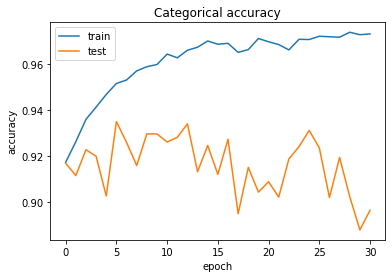

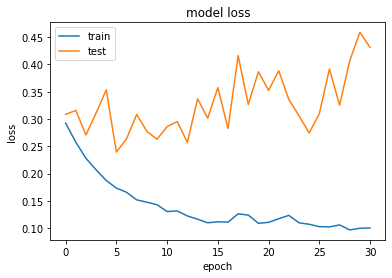

In [ ]:
#9.show results matlabpy
print(results.history)
# summarize history for categorical accuracy
plt.plot(results.history['sparse_categorical_accuracy'])
plt.plot(results.history['val_sparse_categorical_accuracy'])
plt.title('Categorical accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
#10.load best model according to cross-validation - model-attRNN
from kapre.time_frequency import Melspectrogram, Spectrogram
from kapre.utils import Normalization2D
model = load_model('model_36classesrnn.h5', custom_objects={'Melspectrogram': Melspectrogram, 'Normalization2D': Normalization2D })


In [ ]:

#11. Read test data
x_test, y_test = testRGen.__getitem__(0)




In [ ]:
#12. Results Evaluation
valEval = model.evaluate_generator(valGen, verbose=1,use_multiprocessing=True, workers=32)
trainEval = model.evaluate_generator(trainGen, verbose=1, use_multiprocessing=True, workers=32)
testEval = model.evaluate(x_test, y_test, verbose=1)
print('Evaluation scores: \nMetrics: {} \nTrain: {} \nValidation: {} \nTest: {}'.format(model.metrics_names, trainEval, valEval, testEval) )


4890/4890 [==============================] - 10s 2ms/step
Evaluation scores: 
Metrics: ['loss', 'sparse_categorical_accuracy'] 
Train: [0.13737223240799615, 0.9620019280205655] 
Validation: [0.248480967871028, 0.9358288770053476] 
Test: [1.8998058899152446, 0.8022494886062872]


In [ ]:
#13. Predication on model

y_pred = model.predict(x_test, verbose=1)


4890/4890 [==============================] - 10s 2ms/step


In [ ]:
au, cl = valGen.__getitem__(8)
set(cl)


{1, 2, 3, 5, 9, 10, 11, 12, 13, 16, 17, 18, 20, 23, 24, 25, 26, 28, 29, 30}

In [ ]:
y_pred = model.predict(au, verbose=1)

32/32 [==============================] - 0s 2ms/step


In [ ]:
au, cl = test1.__getitem__(3)
set(cl)

In [ ]:
y_pred = model.predict(au, verbose=1)

1000/1000 [==============================] - 2s 2ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(cl, np.argmax(y_pred,1))
print(set(cl))

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35}


In [ ]:
#15. setting classes for Confusion matrix

#LRcmd
classes=[ 'yes', 'no' , 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go',
                         'zero' , 'one' , 'two' , 'three' , 'four' , 'five' , 'six' , 
                         'seven' ,  'eight' , 'nine' , 'backward', 'bed', 'bird', 'cat', 'dog',
                         'follow', 'forward', 'happy', 'house', 'learn', 'marvin', 'sheila', 'tree',
                         'visual', 'wow']

Normalized confusion matrix


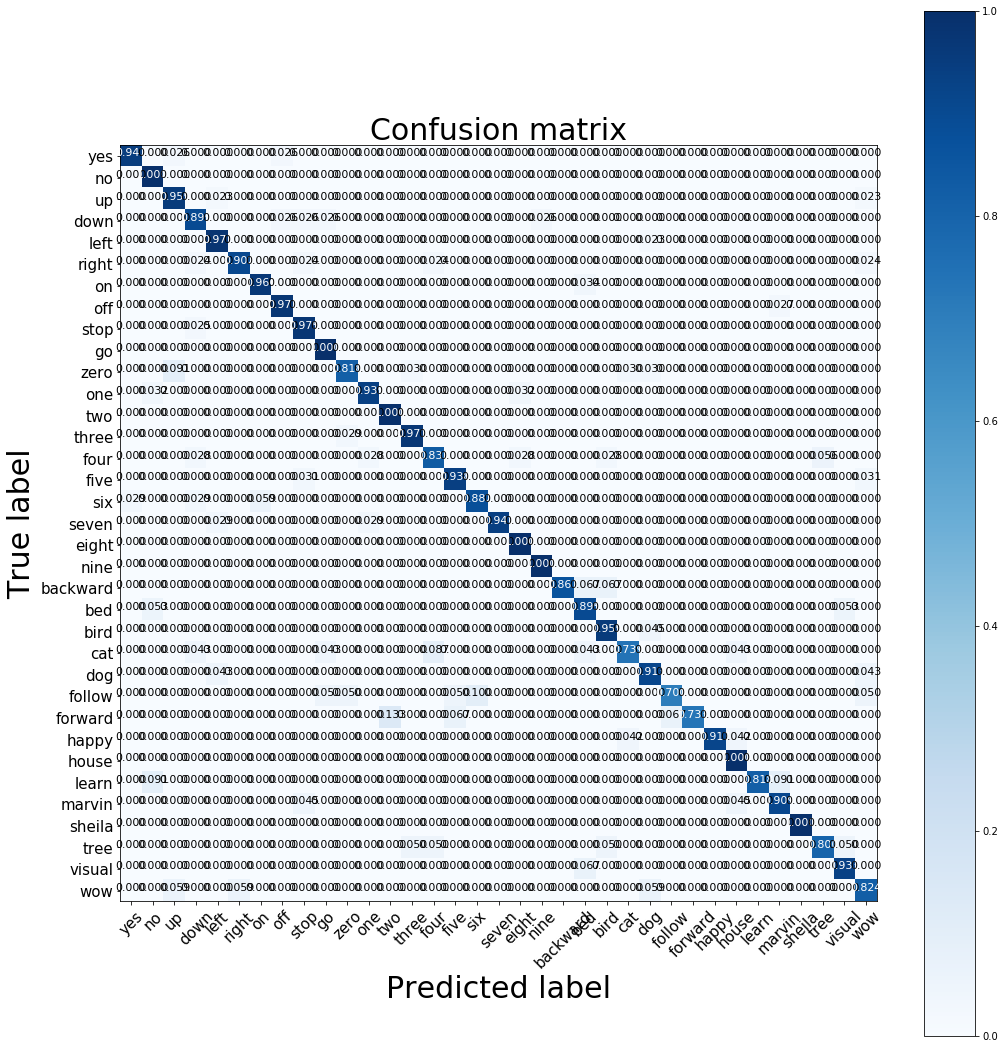

In [ ]:
#16. plot confusion matrix
import matr
matr.plot_confusion_matrix(cm,classes, normalize=True)

In [ ]:
#14. CONFUSION MATRIX

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, np.argmax(y_pred,1))
print(set(y_test))

{0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}


In [ ]:
%%writefile matr.py
import numpy as np
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.figure(figsize=(15,15))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=15)
    plt.yticks(tick_marks, classes, fontsize=15)

    fmt = '.3f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), size=11,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=30)
    plt.xlabel('Predicted label', fontsize=30)
    plt.savefig('picConfMatrix.png', dpi = 400)
    plt.tight_layout()

Overwriting matr.py


/content/drive/My Drive/sd_GSCmdV2/matr.py:14: RuntimeWarning: invalid value encountered in true_divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


Normalized confusion matrix


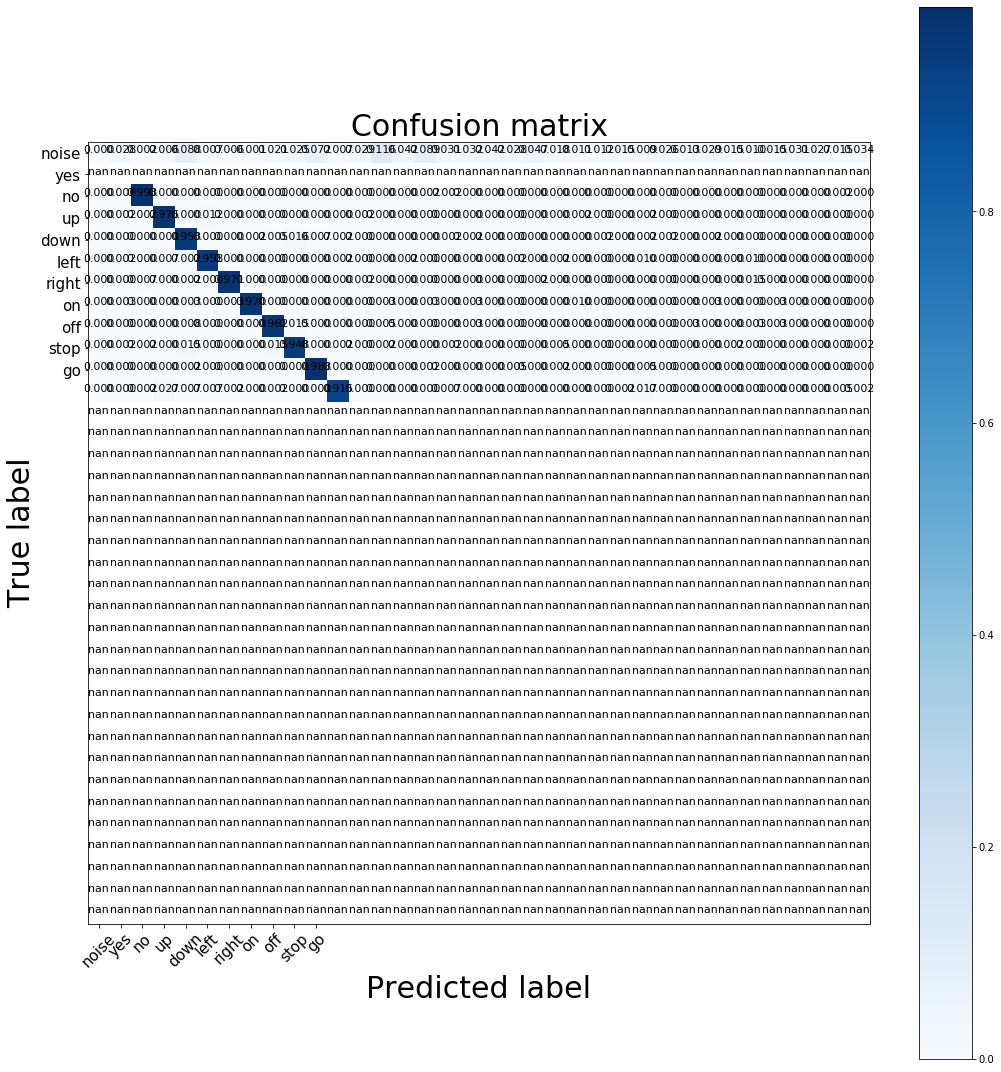

In [ ]:
#16. plot confusion matrix
import matr
matr.plot_confusion_matrix(cm,classes, normalize=True)


# LSTM with manual lrate

This LSTM have manual and dynamic Learning rate which increse its accuracy

VALIDATION ACCURACY IS 94.385 %

In [ ]:
model.save('newatt.h5')

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.001
    drop = 0.4
    epochs_drop = 5.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=9, verbose=1)
checkpointer = ModelCheckpoint('newatt.h5', monitor='val_sparse_categorical_accuracy', verbose=1, mode=min, save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen, epochs = 38, verbose=1, use_multiprocessing=True, workers=64,
callbacks=[earlystopper, checkpointer, lrate])


Epoch 1/38


/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:680: RuntimeWarning: ModelCheckpoint mode <built-in function min> is unknown, fallback to auto mode.
  RuntimeWarning)


Changing learning rate to 0.001
3112/3112 [==============================] - 448s 144ms/step - loss: 0.2665 - sparse_categorical_accuracy: 0.9250 - val_loss: 0.2862 - val_sparse_categorical_accuracy: 0.9215

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.92146, saving model to newatt.h5
Epoch 2/38
Changing learning rate to 0.001
3112/3112 [==============================] - 443s 142ms/step - loss: 0.2402 - sparse_categorical_accuracy: 0.9317 - val_loss: 0.3205 - val_sparse_categorical_accuracy: 0.9104

Epoch 00002: val_sparse_categorical_accuracy did not improve from 0.92146
Epoch 3/38
Changing learning rate to 0.001
Epoch 2/38
3112/3112 [==============================] - 445s 143ms/step - loss: 0.2156 - sparse_categorical_accuracy: 0.9381 - val_loss: 0.3274 - val_sparse_categorical_accuracy: 0.9126

Epoch 00003: val_sparse_categorical_accuracy did not improve f

Summary of epoches 5 to 26

{'val_loss': [0.2861530740053099, 0.3205003818487101, 0.32743889741838617, 0.292069313970499, 0.28960712110862774, 0.21266398248001236, 0.23724982546851597, 0.24297068267749414, 0.2300785858524007, 0.2463676349523248, 0.27398721273894483, 0.269477148091621, 0.25354317706209023, 0.23497015872551874, 0.2577572178902082, 0.2782794247474148, 0.5111446835375815, 0.4022136809448942, 0.4316972008981632, 0.25342678918293815, 0.361418029672935, 0.335266549766492, 0.3307168874181082], 'val_sparse_categorical_accuracy': [0.921457219251337, 0.910427807486631, 0.9126002673796791, 0.9174465240641712, 0.9207887700534759, 0.9426804812834224, 0.9364973262032086, 0.9415106951871658, 0.9425133689839572, 0.9415106951871658, 0.933322192513369, 0.9364973262032086, 0.9391711229946524, 0.9438502673796791, 0.9418449197860963, 0.9380013368983957, 0.8873663101604278, 0.9092580213903744, 0.9097593582887701, 0.9415106951871658, 0.922292780748663, 0.9254679144385026, 0.9259692513368984], 'loss': [0.2665033285836162

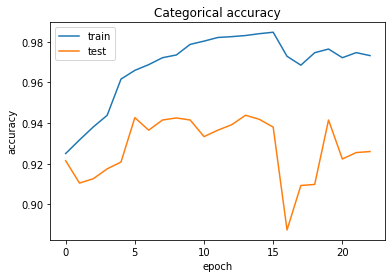

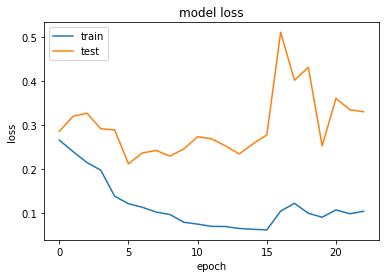

In [ ]:
#9.show results matlabpy
print(results.history)
# summarize history for categorical accuracy
plt.plot(results.history['sparse_categorical_accuracy'])
plt.plot(results.history['val_sparse_categorical_accuracy'])
plt.title('Categorical accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
x_test, y_test = testRGen.__getitem__(0)


In [ ]:
#12. Results Evaluation
valEval = model.evaluate_generator(valGen, verbose=1,use_multiprocessing=True, workers=32)
trainEval = model.evaluate_generator(trainGen, verbose=1, use_multiprocessing=True, workers=32)
testEval = model.evaluate(x_test, y_test, verbose=1)
print('Evaluation scores: \nMetrics: {} \nTrain: {} \nValidation: {} \nTest: {}'.format(model.metrics_names, trainEval, valEval, testEval) )

4890/4890 [==============================] - 10s 2ms/step
Evaluation scores: 
Metrics: ['loss', 'sparse_categorical_accuracy'] 
Train: [0.04600954892950112, 0.989426012210797] 
Validation: [0.3951528524418261, 0.914605614973262] 
Test: [1.8858953858725607, 0.8265848670756646]


In [ ]:
au, cl = test1.__getitem__(1)
set(cl)

In [ ]:
y_pred = model.predict(au, verbose=1)

3000/3000 [==============================] - 7s 2ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(cl, np.argmax(y_pred,1))
print(set(cl))

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35}


In [ ]:
#15. setting classes for Confusion matrix

#LRcmd
classes=[ 'yes', 'no' , 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go',
                         'zero' , 'one' , 'two' , 'three' , 'four' , 'five' , 'six' , 
                         'seven' ,  'eight' , 'nine' , 'backward', 'bed', 'bird', 'cat', 'dog',
                         'follow', 'forward', 'happy', 'house', 'learn', 'marvin', 'sheila', 'tree',
                         'visual', 'wow']

Normalized confusion matrix


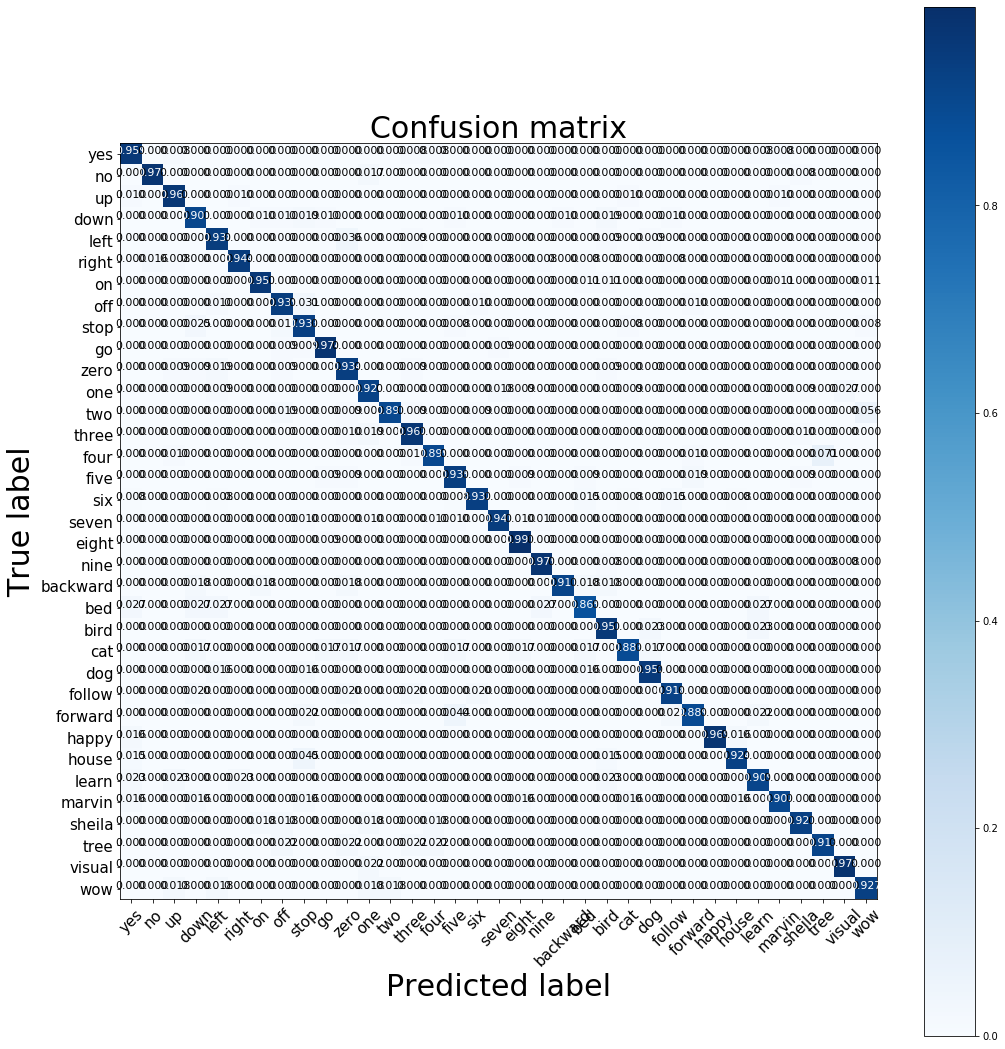

In [ ]:
#16. plot confusion matrix
import matr
matr.plot_confusion_matrix(cm,classes, normalize=True)

In [ ]:
Eval = model.evaluate(au, cl, verbose=1)
print('Evaluation scores: \nMetrics: {} \nTrain: {} \nValidation: {} \nTest: {}'.format(model.metrics_names, Eval) )

3000/3000 [==============================] - 6s 2ms/step


IndexError: ignored

# Attention Experement with 36 classes

Attention Model expirement on Audio Data set of 36 classes 


The VALIDATION accuracy of this model is 94.569 %

MODEL SUMMARY AND COMPILE

In [ ]:
#5. model imports summery and compile

from keras.models import Model, load_model
from keras.layers import Input, Activation, Concatenate, Permute, Reshape, Flatten, Lambda, Dot, Softmax
from keras.layers import Add, Dropout, BatchNormalization, Conv2D, Reshape, MaxPooling2D, Dense, LSTM, Bidirectional
from keras import backend as K
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from keras import backend as K
from keras import optimizers
import SpeechModels

from kapre.time_frequency import Melspectrogram, Spectrogram
model = SpeechModels.AttRNNSpeechModel(36, samplingrate = 16000, inputLength = 16000)
model.summary()
model.compile(optimizer='adam', loss=['sparse_categorical_crossentropy'], metrics=['sparse_categorical_accuracy'])













Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 16000)        0                                            
__________________________________________________________________________________________________
reshape_1 (Reshape)             (None, 1, 16000)     0           input[0][0]                      
__________________________________________________________________________________________________
mel_stft (Melspectrogram)       (None, 80, 125, 1)   1091664     reshape_1[0][0]                  
__________________________________________________________________________________________________
normalization2d_1 (Normalizatio (None, 80, 125, 1)   0           mel_stft[0][0]                   
________________________________________________________________________________

SAVING MODEL 

In [ ]:
#6a. saving model optional

model.save("model_36classesattention.h5")



Traning EPOCHES of the model

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.001
    drop = 0.4
    epochs_drop = 8.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=20, verbose=1)
checkpointer = ModelCheckpoint('model_36classesattention.h5', monitor='val_sparse_categorical_accuracy', verbose=1, mode=min, save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen, epochs = 50, verbose=1,  
callbacks=[earlystopper, checkpointer, lrate ])


/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:680: RuntimeWarning: ModelCheckpoint mode <built-in function min> is unknown, fallback to auto mode.
  RuntimeWarning)


Epoch 1/50
Changing learning rate to 0.001
3112/3112 [==============================] - 465s 150ms/step - loss: 0.1411 - sparse_categorical_accuracy: 0.9601 - val_loss: 0.2480 - val_sparse_categorical_accuracy: 0.9380

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.93800, saving model to model_36classesattention.h5
Epoch 2/50
Changing learning rate to 0.001
3112/3112 [==============================] - 467s 150ms/step - loss: 0.1284 - sparse_categorical_accuracy: 0.9635 - val_loss: 0.2375 - val_sparse_categorical_accuracy: 0.9392

Epoch 00002: val_sparse_categorical_accuracy improved from 0.93800 to 0.93917, saving model to model_36classesattention.h5
Epoch 3/50
Changing learning rate to 0.001
3112/3112 [==============================] - 471s 151ms/step - loss: 0.1179 - sparse_categorical_accuracy: 0.9667 - val_loss: 0.2669 - val_sparse_categorical_accuracy: 0.9276

Epoch 00003: val_sparse_categorical_accuracy did not improve from 0.93917
Epoch 4/50
Changing learni

{'val_loss': [0.24803643165539732, 0.23750211068125252, 0.2668795735166871, 0.2449978427055048, 0.2504265241445986, 0.2732305412036292, 0.24316236232208177, 0.24449262199773986, 0.24560417184946415, 0.2561572378618879, 0.25864662316018955, 0.2691161270206047, 0.2764160659032756, 0.2708138018901529, 0.2751730171063066, 0.2769758543436572, 0.2873433889175051, 0.29242611539540087, 0.2888665960746491, 0.29426589469622416, 0.29340397268287416, 0.29944418335518985, 0.30006407848589667, 0.3042959903201131, 0.29820428523615744, 0.30510866322723335, 0.311789876050073, 0.30925467574652526, 0.3158540089920435], 'val_sparse_categorical_accuracy': [0.9380013368983957, 0.9391711229946524, 0.9276403743315508, 0.9393382352941176, 0.9385026737967914, 0.9339906417112299, 0.9408422459893048, 0.9385026737967914, 0.9441844919786097, 0.9421791443850267, 0.9418449197860963, 0.9396724598930482, 0.9398395721925134, 0.9403409090909091, 0.9410093582887701, 0.9421791443850267, 0.9405080213903744, 0.94034090909090

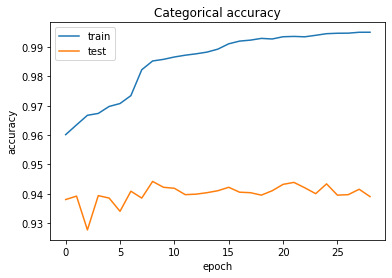

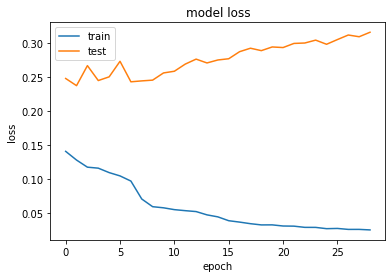

In [ ]:
#9.show results matlabpy
print(results.history)
# summarize history for categorical accuracy
plt.plot(results.history['sparse_categorical_accuracy'])
plt.plot(results.history['val_sparse_categorical_accuracy'])
plt.title('Categorical accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
au, cl = test1.__getitem__(1)
set(cl)

In [ ]:
#10.load best model according to cross-validation - model-attRNN
from kapre.time_frequency import Melspectrogram, Spectrogram
from kapre.utils import Normalization2D
model = load_model('model_36classesattention.h5', custom_objects={'Melspectrogram': Melspectrogram, 'Normalization2D': Normalization2D })

In [ ]:
valEval = model.evaluate_generator(valGen, verbose=1,use_multiprocessing=True, workers=32)
trainEval = model.evaluate_generator(trainGen, verbose=1, use_multiprocessing=True, workers=32)
testEval = model.evaluate(au, cl, verbose=1)
print('Evaluation scores: \nMetrics: {} \nTrain: {} \nValidation: {} \nTest: {}'.format(model.metrics_names, trainEval, valEval, testEval) )

3000/3000 [==============================] - 7s 2ms/step
Evaluation scores: 
Metrics: ['loss', 'sparse_categorical_accuracy'] 
Train: [0.05546724568384269, 0.9868452763496144] 
Validation: [0.23738914356118113, 0.9456885026737968] 
Test: [0.2169811966388176, 0.9456666665077209]


In [ ]:
y_pred = model.predict(au, verbose=1)

3000/3000 [==============================] - 7s 2ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(cl, np.argmax(y_pred,1))
print(set(cl))

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35}


In [ ]:
#15. setting classes for Confusion matrix

#LRcmd
classes=[ 'yes', 'no' , 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go',
                         'zero' , 'one' , 'two' , 'three' , 'four' , 'five' , 'six' , 
                         'seven' ,  'eight' , 'nine' , 'backward', 'bed', 'bird', 'cat', 'dog',
                         'follow', 'forward', 'happy', 'house', 'learn', 'marvin', 'sheila', 'tree',
                         'visual', 'wow']

Normalized confusion matrix


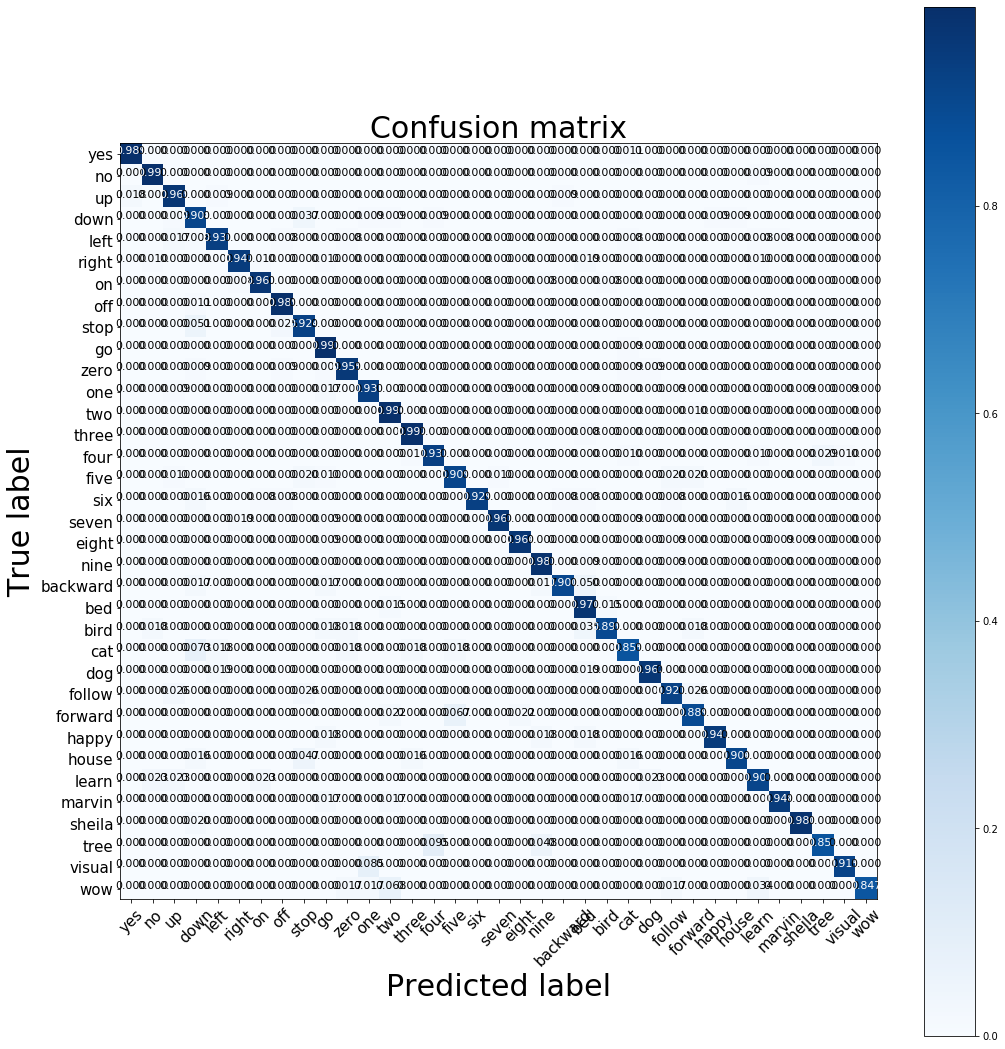

In [ ]:
#16. plot confusion matrix
import matr
matr.plot_confusion_matrix(cm,classes, normalize=True)

# Convolution 36 classes

Modified And Finetuned model "CONVOLUTION MODEL"

Validation Accuracy is 95.154% Best Results of all models..
Will try to achive better using Modified transformer

In [ ]:
#5. model imports summery and compile

from keras.models import Model, load_model
from keras.layers import Input, Activation, Concatenate, Permute, Reshape, Flatten, Lambda, Dot, Softmax
from keras.layers import Add, Dropout, BatchNormalization, Conv2D, Reshape, MaxPooling2D, Dense, LSTM, Bidirectional
from keras import backend as K
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from keras import backend as K
from keras import optimizers
import SpeechModels

from kapre.time_frequency import Melspectrogram, Spectrogram
model = SpeechModels.ConvSpeechModel(36, samplingrate = 16000, inputLength = 16000)
model.summary()
model.compile(optimizer='adam', loss=['sparse_categorical_crossentropy'], metrics=['sparse_categorical_accuracy'])














Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "ConvSpeechModel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 16000)             0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 1, 16000)          0         
_________________________________________________________________
mel_stft (Melspectrogram)    (None, 80, 125, 1)        1091664   
_________________________________________________________________
normalization2d_1 (Normaliza (None, 80, 125, 1)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 80, 125, 32)       320       
_________________________________________________________________
batch_normalization_2 (Batch (None, 80, 125, 32)       

In [ ]:
#6a. saving model optional

model.save("model_36classesconvolution1.h5")



In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.001
    drop = 0.4
    epochs_drop = 8.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=10, verbose=1)
checkpointer = ModelCheckpoint('model_36classesconvolution1.h5', monitor='val_sparse_categorical_accuracy', verbose=1, mode=min, save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 50, verbose=1,  
callbacks=[earlystopper, checkpointer, lrate ])


/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:680: RuntimeWarning: ModelCheckpoint mode <built-in function min> is unknown, fallback to auto mode.
  RuntimeWarning)


Epoch 1/50
Changing learning rate to 0.001
3112/3112 [==============================] - 347s 112ms/step - loss: 0.3654 - sparse_categorical_accuracy: 0.8982 - val_loss: 0.3482 - val_sparse_categorical_accuracy: 0.9027

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.90274, saving model to model_36classesconvolution1.h5
Epoch 2/50
Changing learning rate to 0.001
3112/3112 [==============================] - 346s 111ms/step - loss: 0.3137 - sparse_categorical_accuracy: 0.9133 - val_loss: 0.2964 - val_sparse_categorical_accuracy: 0.9176

Epoch 00002: val_sparse_categorical_accuracy improved from 0.90274 to 0.91761, saving model to model_36classesconvolution1.h5
Epoch 3/50
Changing learning rate to 0.001
3112/3112 [==============================] - 345s 111ms/step - loss: 0.2771 - sparse_categorical_accuracy: 0.9241 - val_loss: 0.2779 - val_sparse_categorical_accuracy: 0.9276

Epoch 00003: val_sparse_categorical_accuracy improved from 0.91761 to 0.92764, saving model to

{'val_loss': [0.34822622515301016, 0.2964398893801605, 0.27785897572191165, 0.2792969981586949, 0.2880834509060783, 0.25555924815125763, 0.269367645503978, 0.21413131886819267, 0.22312282699272024, 0.2004189210742174, 0.21698209390362955, 0.2276654583873213, 0.2205910471886338, 0.22242040915596026, 0.2195041519130792, 0.22345518755150198, 0.21820418423042362, 0.22118231437069574, 0.2366881611069451, 0.22633225457137934, 0.23780178312264183, 0.21324367357660265, 0.22526560136038387, 0.23020138169750015, 0.22644279948541068, 0.23875588467335498, 0.222387993887579, 0.22871746517513022, 0.22898296337515442, 0.23265946297373677, 0.2200463431707414, 0.23188901726498054], 'val_sparse_categorical_accuracy': [0.9027406417112299, 0.9176136363636364, 0.9276403743315508, 0.9266377005347594, 0.9237967914438503, 0.9339906417112299, 0.9281417112299465, 0.9435160427807486, 0.9450200534759359, 0.9473596256684492, 0.9483622994652406, 0.9451871657754011, 0.9498663101604278, 0.9483622994652406, 0.94836229

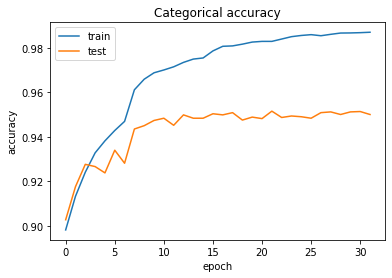

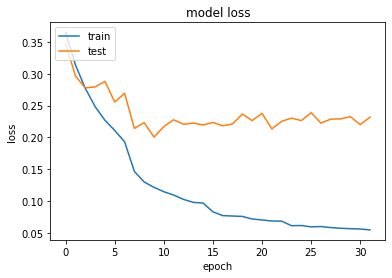

In [ ]:
#9.show results matlabpy
print(results.history)
# summarize history for categorical accuracy
plt.plot(results.history['sparse_categorical_accuracy'])
plt.plot(results.history['val_sparse_categorical_accuracy'])
plt.title('Categorical accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
au, cl = test1.__getitem__(1)
set(cl)

{1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35}

In [ ]:
#10.load best model according to cross-validation - model-attRNN
from kapre.time_frequency import Melspectrogram, Spectrogram
from kapre.utils import Normalization2D
model = load_model('model_36classesconvolution1.h5', custom_objects={'Melspectrogram': Melspectrogram, 'Normalization2D': Normalization2D })

In [ ]:
valEval = model.evaluate_generator(valGen, verbose=1,use_multiprocessing=True, workers=32)
trainEval = model.evaluate_generator(trainGen, verbose=1, use_multiprocessing=True, workers=32)
testEval = model.evaluate(au, cl, verbose=1)
print('Evaluation scores: \nMetrics: {} \nTrain: {} \nValidation: {} \nTest: {}'.format(model.metrics_names, trainEval, valEval, testEval) )

3000/3000 [==============================] - 2s 546us/step
Evaluation scores: 
Metrics: ['loss', 'sparse_categorical_accuracy'] 
Train: [0.054024158843353536, 0.9873071979434447] 
Validation: [0.2134133574230299, 0.9508689839572193] 
Test: [0.20809278535827375, 0.9476666665077209]


In [ ]:
y_pred = model.predict(au, verbose=1)

3000/3000 [==============================] - 2s 578us/step


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(cl, np.argmax(y_pred,1))
print(set(cl))

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35}


In [ ]:
#15. setting classes for Confusion matrix

#LRcmd
classes=[ 'yes', 'no' , 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go',
                         'zero' , 'one' , 'two' , 'three' , 'four' , 'five' , 'six' , 
                         'seven' ,  'eight' , 'nine' , 'backward', 'bed', 'bird', 'cat', 'dog',
                         'follow', 'forward', 'happy', 'house', 'learn', 'marvin', 'sheila', 'tree',
                         'visual', 'wow']

Normalized confusion matrix


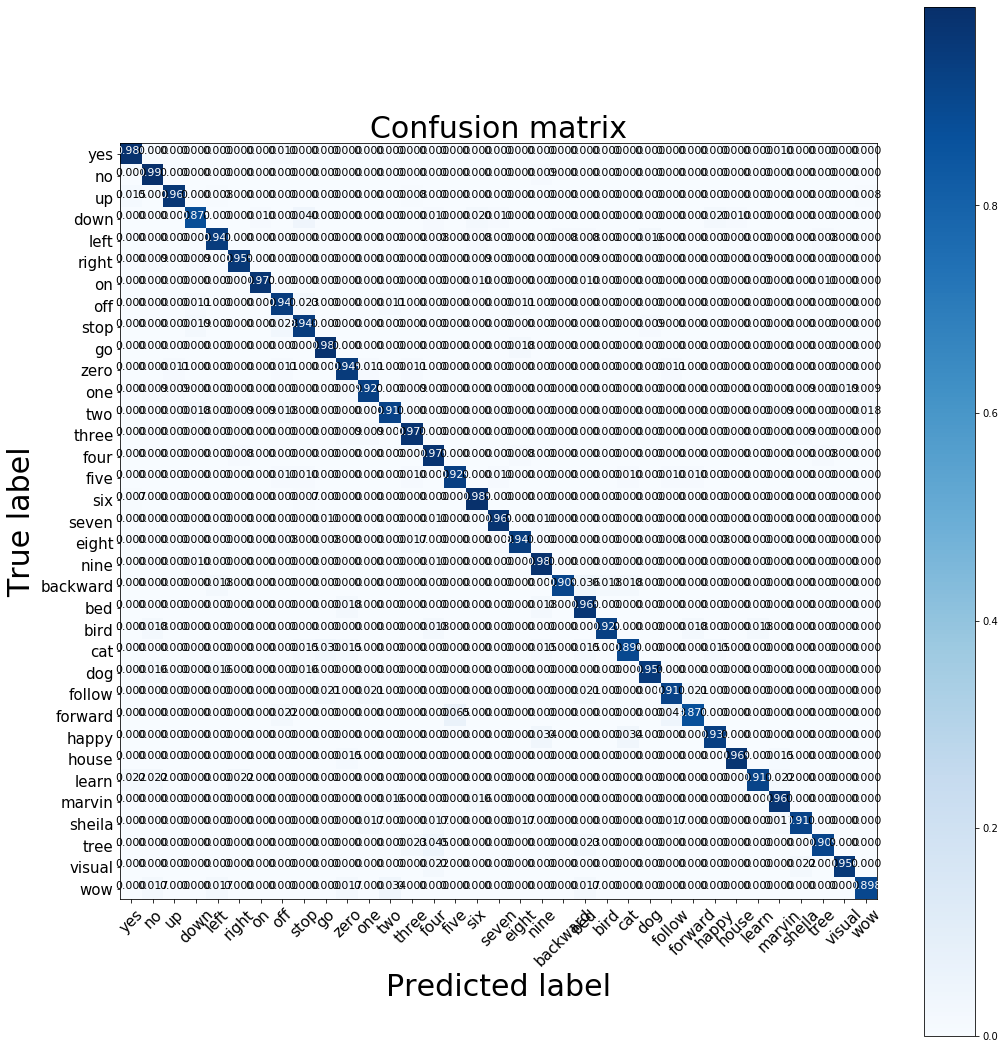

In [ ]:
#16. plot confusion matrix
import matr
matr.plot_confusion_matrix(cm,classes, normalize=True)



# Res net expirement

Resnet expirement number 4 with  best validation accuracy of Resnet models in expirement 

with VALIDATION ACCURACY OF 95.020 % 

In [ ]:
%%writefile modelll27.py

from keras.models import Model, load_model
from keras.layers import Input, Activation, Concatenate, Permute, Reshape, Flatten, Lambda, Dot, Softmax
from keras.layers import Add, Dropout, BatchNormalization, Conv2D, Reshape, MaxPooling2D, Dense, LSTM, Bidirectional
from keras import backend as K
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from keras import backend as K
from keras import optimizers
from kapre.time_frequency import Melspectrogram, Spectrogram
import keras
# Importing the important libraries
from keras.applications.resnet50 import ResNet50
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from kapre.utils import Normalization2D
def ResnetSpeechModel(nCategories, samplingrate = 16000, inputLength = 16000):
    """
    Base fully convolutional model for speech recognition
    """

    inputs = Input((inputLength,))

    x = Reshape((1, -1)) (inputs)

    x = Melspectrogram(n_dft=1024, n_hop=128, input_shape=(1, inputLength),
                             padding='same', sr=samplingrate, n_mels=80,
                             fmin=40.0, fmax=samplingrate/2, power_melgram=1.0,
                             return_decibel_melgram=True, trainable_fb=False,
                             trainable_kernel=False,
                             name='mel_stft') (x)
    
    zee = Normalization2D(int_axis=0)(x)
    
    

    
    model = keras.applications.resnet.ResNet50(include_top=True, weights=None, input_tensor=zee, input_shape=(80,125,1), pooling=None, classes=36)

    return model

Writing modelll27.py


In [ ]:
from keras.models import Model, load_model
from keras.layers import Input, Activation, Concatenate, Permute, Reshape, Flatten, Lambda, Dot, Softmax
from keras.layers import Add, Dropout, BatchNormalization, Conv2D, Reshape, MaxPooling2D, Dense, LSTM, Bidirectional
from keras import backend as K
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from keras import backend as K
from keras import optimizers
from kapre.time_frequency import Melspectrogram, Spectrogram
import modelll27
# Importing the important libraries
from keras.applications.resnet50 import ResNet50
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from kapre.utils import Normalization2D
###########################################
###########################################
model = modelll27.ResnetSpeechModel(36, samplingrate = 16000, inputLength = 16000)
model.summary()
model.compile(optimizer='adam', loss=['sparse_categorical_crossentropy'], metrics=['sparse_categorical_accuracy'])


Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           (None, 16000)        0                                            
__________________________________________________________________________________________________
reshape_15 (Reshape)            (None, 1, 16000)     0           input_15[0][0]                   
__________________________________________________________________________________________________
mel_stft (Melspectrogram)       (None, 80, 125, 1)   1091664     reshape_15[0][0]                 
__________________________________________________________________________________________________
normalization2d_15 (Normalizati (None, 80, 125, 1)   0           mel_stft[0][0]                   
___________________________________________________________________________________________

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.001
    drop = 0.4
    epochs_drop = 8.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=5, verbose=1)
checkpointer = ModelCheckpoint('model_resnetq.h5', monitor='val_sparse_categorical_accuracy', verbose=1, mode=min, save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 50, verbose=1, 
callbacks=[earlystopper, checkpointer, lrate ])


/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:680: RuntimeWarning: ModelCheckpoint mode <built-in function min> is unknown, fallback to auto mode.
  RuntimeWarning)


Epoch 1/50
Changing learning rate to 0.001
3112/3112 [==============================] - 444s 143ms/step - loss: 0.4252 - sparse_categorical_accuracy: 0.8738 - val_loss: 0.3880 - val_sparse_categorical_accuracy: 0.8862

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.88620, saving model to model_resnetq.h5
Epoch 2/50
Changing learning rate to 0.001
3112/3112 [==============================] - 443s 142ms/step - loss: 0.3279 - sparse_categorical_accuracy: 0.9042 - val_loss: 0.4139 - val_sparse_categorical_accuracy: 0.8783

Epoch 00002: val_sparse_categorical_accuracy did not improve from 0.88620
Epoch 3/50
Changing learning rate to 0.001
3112/3112 [==============================] - 443s 142ms/step - loss: 0.2618 - sparse_categorical_accuracy: 0.9233 - val_loss: 0.2888 - val_sparse_categorical_accuracy: 0.9118

Epoch 00003: val_sparse_categorical_accuracy improved from 0.88620 to 0.91176, saving model to model_resnetq.h5
Epoch 4/50
Changing learning rate to 0.001
3112/

{'val_loss': [0.38802945888775553, 0.41387727601642915, 0.28881905415907183, 0.30091214048511844, 0.2821358285251666, 0.23080142981118776, 0.22965880004156203, 0.18028142061798877, 0.19673016320641357, 0.19503821465414004, 0.18452858213487175, 0.22066878479630575, 0.19780608870146327], 'val_sparse_categorical_accuracy': [0.8861965240641712, 0.8783422459893048, 0.9117647058823529, 0.9087566844919787, 0.922292780748663, 0.9343248663101604, 0.9351604278074866, 0.9502005347593583, 0.945855614973262, 0.9476938502673797, 0.9490307486631016, 0.94451871657754, 0.9493649732620321], 'loss': [0.42515987248859033, 0.32788606212057825, 0.2618039095703067, 0.21897467261208411, 0.18686050395557602, 0.16303283847226663, 0.14263025026156143, 0.09206313915858264, 0.07800805807814318, 0.07034199271003863, 0.06673641334387577, 0.05931091411299783, 0.05683233421027896], 'sparse_categorical_accuracy': [0.8737548200514139, 0.9041512692802056, 0.923260764781491, 0.9356924807197944, 0.9447702442159382, 0.95216

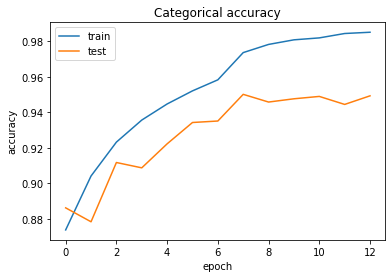

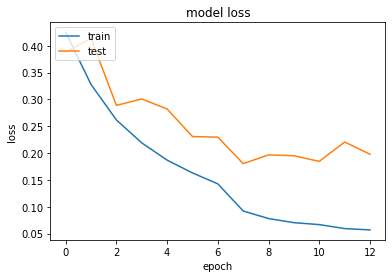

In [ ]:
#9.show results matlabpy
print(results.history)
# summarize history for categorical accuracy
plt.plot(results.history['sparse_categorical_accuracy'])
plt.plot(results.history['val_sparse_categorical_accuracy'])
plt.title('Categorical accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
from keras.models import Model, load_model
model.load_weights('model_resnetq.h5')

In [ ]:
au, cl = test1.__getitem__(1)
set(cl)

In [ ]:
valEval = model.evaluate_generator(valGen, verbose=1,use_multiprocessing=True, workers=32)
trainEval = model.evaluate_generator(trainGen, verbose=1, use_multiprocessing=True, workers=32)
testEval = model.evaluate(au, cl, verbose=1)
print('Evaluation scores: \nMetrics: {} \nTrain: {} \nValidation: {} \nTest: {}'.format(model.metrics_names, trainEval, valEval, testEval) )

3000/3000 [==============================] - 5s 2ms/step
Evaluation scores: 
Metrics: ['loss', 'sparse_categorical_accuracy'] 
Train: [0.11152907553842316, 0.9678763656812339] 
Validation: [0.30557714893487603, 0.9186163101604278] 
Test: [0.23420699200282494, 0.9346666666666666]


In [ ]:
y_pred = model.predict(au, verbose=1)

3000/3000 [==============================] - 6s 2ms/step


In [ ]:
y_pred = model.predict(au, verbose=1)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(cl, np.argmax(y_pred,1))
print(set(cl))
#15. setting classes for Confusion matrix

#LRcmd
classes=[ 'yes', 'no' , 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go',
                         'zero' , 'one' , 'two' , 'three' , 'four' , 'five' , 'six' , 
                         'seven' ,  'eight' , 'nine' , 'backward', 'bed', 'bird', 'cat', 'dog',
                         'follow', 'forward', 'happy', 'house', 'learn', 'marvin', 'sheila', 'tree',
                         'visual', 'wow']
#16. plot confusion matrix
import matr
matr.plot_confusion_matrix(cm,classes, normalize=True)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35}


In [ ]:
#15. setting classes for Confusion matrix

#LRcmd
classes=[ 'yes', 'no' , 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go',
                         'zero' , 'one' , 'two' , 'three' , 'four' , 'five' , 'six' , 
                         'seven' ,  'eight' , 'nine' , 'backward', 'bed', 'bird', 'cat', 'dog',
                         'follow', 'forward', 'happy', 'house', 'learn', 'marvin', 'sheila', 'tree',
                         'visual', 'wow']

Normalized confusion matrix


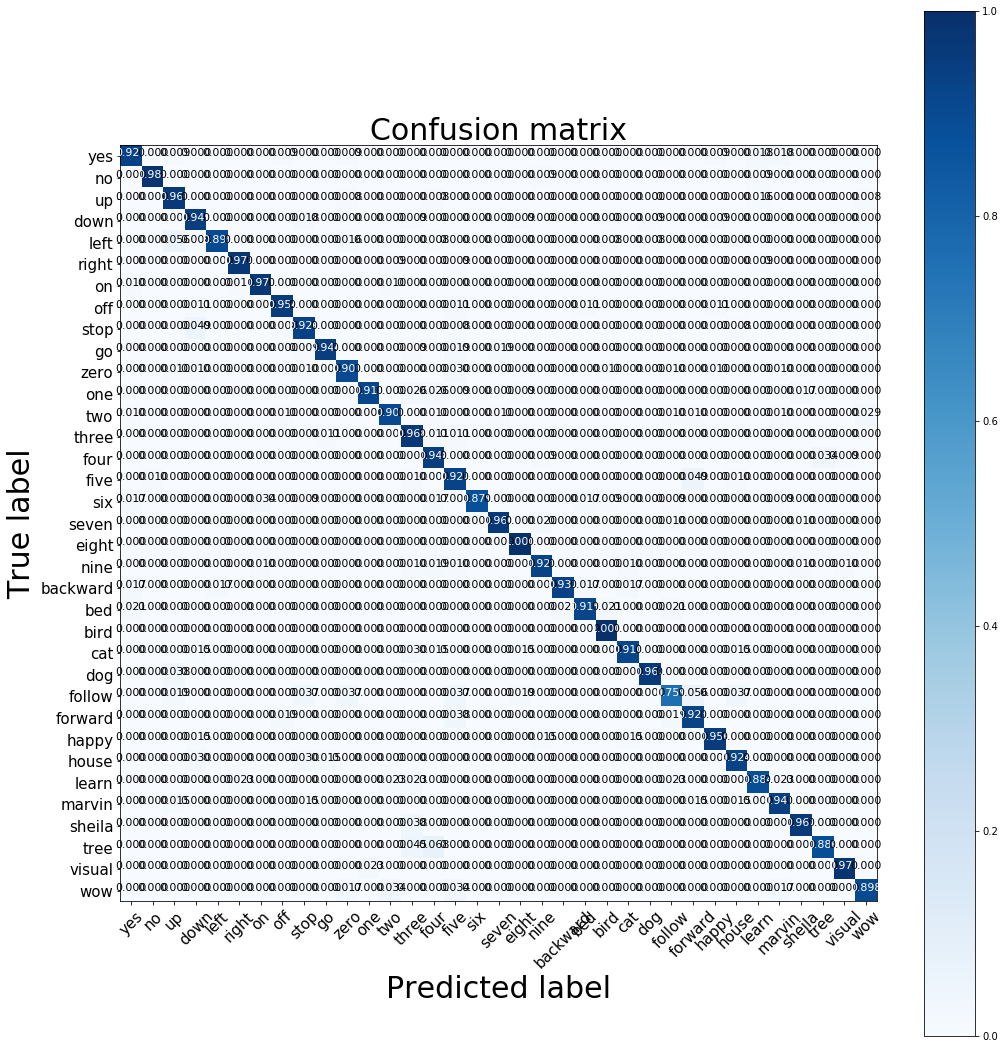

In [ ]:
#16. plot confusion matrix
import matr
matr.plot_confusion_matrix(cm,classes, normalize=True)

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.0001
    drop = 0.4
    epochs_drop = 8.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=5, verbose=1)
checkpointer = ModelCheckpoint('model_resnetq.h5', monitor='val_sparse_categorical_accuracy', verbose=1, mode=min, save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 50, verbose=1, 
callbacks=[earlystopper, checkpointer, lrate ])

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:680: RuntimeWarning: ModelCheckpoint mode <built-in function min> is unknown, fallback to auto mode.
  RuntimeWarning)


Epoch 1/50
Changing learning rate to 0.0001
3112/3112 [==============================] - 442s 142ms/step - loss: 0.0730 - sparse_categorical_accuracy: 0.9812 - val_loss: 0.1862 - val_sparse_categorical_accuracy: 0.9494

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.94936, saving model to model_resnetq.h5
Epoch 2/50
Changing learning rate to 0.0001
3112/3112 [==============================] - 441s 142ms/step - loss: 0.0478 - sparse_categorical_accuracy: 0.9881 - val_loss: 0.1863 - val_sparse_categorical_accuracy: 0.9515

Epoch 00002: val_sparse_categorical_accuracy improved from 0.94936 to 0.95154, saving model to model_resnetq.h5
Epoch 3/50
Changing learning rate to 0.0001
3112/3112 [==============================] - 442s 142ms/step - loss: 0.0402 - sparse_categorical_accuracy: 0.9902 - val_loss: 0.2003 - val_sparse_categorical_accuracy: 0.9477

Epoch 00003: val_sparse_categorical_accuracy did not improve from 0.95154
Epoch 4/50
Changing learning rate to 0.0001
3

In [ ]:
au, cl = test1.__getitem__(1)
set(cl)

In [ ]:
valEval = model.evaluate_generator(valGen, verbose=1,use_multiprocessing=True, workers=32)
trainEval = model.evaluate_generator(trainGen, verbose=1, use_multiprocessing=True, workers=32)
testEval = model.evaluate(au, cl, verbose=1)
print('Evaluation scores: \nMetrics: {} \nTrain: {} \nValidation: {} \nTest: {}'.format(model.metrics_names, trainEval, valEval, testEval) )

3000/3000 [==============================] - 4s 1ms/step
Evaluation scores: 
Metrics: ['loss', 'sparse_categorical_accuracy'] 
Train: [0.019038993607248762, 0.995591661311054] 
Validation: [0.1959685876844594, 0.9498663101604278] 
Test: [0.19289669880270957, 0.9476666666666667]


In [ ]:
y_pred = model.predict(au, verbose=1)

3000/3000 [==============================] - 4s 1ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(cl, np.argmax(y_pred,1))
print(set(cl))

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35}


In [ ]:
classes=[ 'yes', 'no' , 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go',
                         'zero' , 'one' , 'two' , 'three' , 'four' , 'five' , 'six' , 
                         'seven' ,  'eight' , 'nine' , 'backward', 'bed', 'bird', 'cat', 'dog',
                         'follow', 'forward', 'happy', 'house', 'learn', 'marvin', 'sheila', 'tree',
                         'visual', 'wow']

Normalized confusion matrix


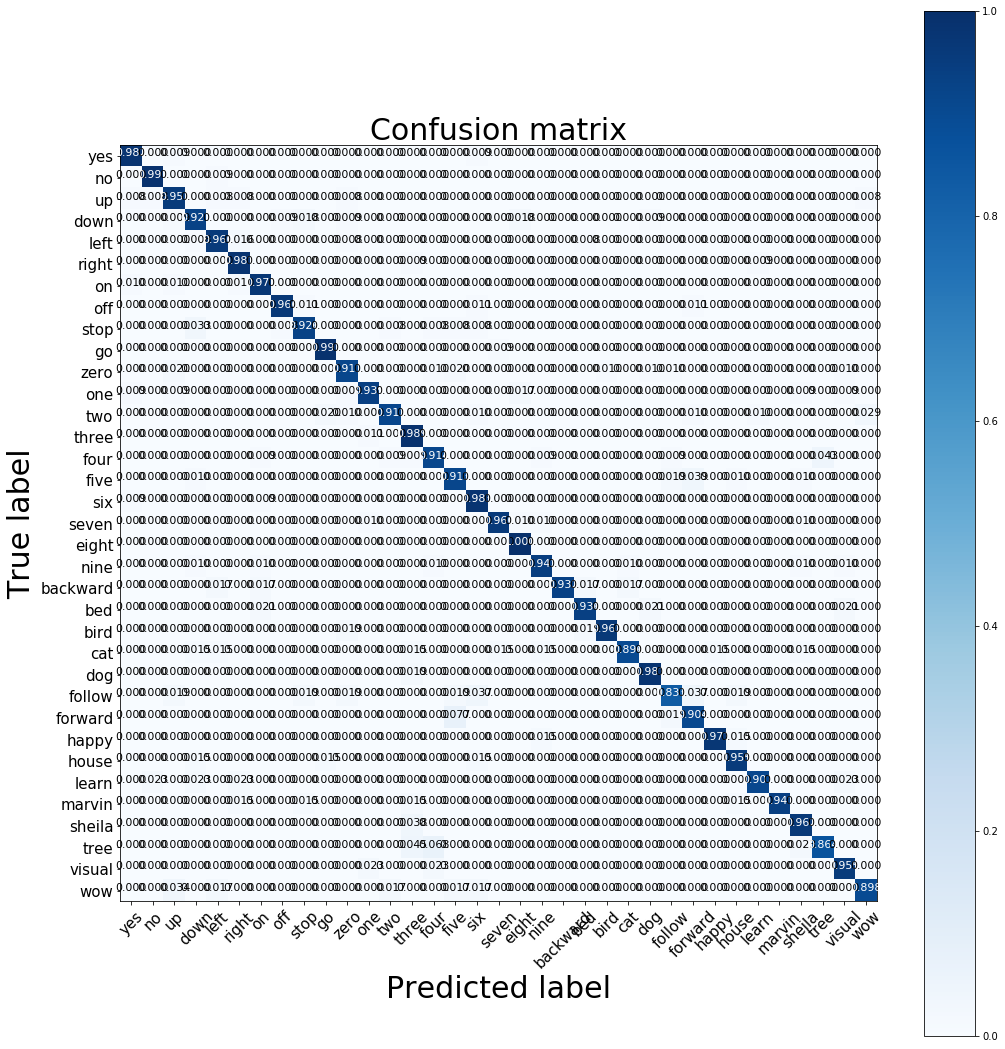

In [ ]:
#16. plot confusion matrix
import matr
matr.plot_confusion_matrix(cm,classes, normalize=True)

In [ ]:
"""
Clean and simple Keras implementation of network architectures described in:
    - (ResNet-50) [Deep Residual Learning for Image Recognition](https://arxiv.org/pdf/1512.03385.pdf).
    - (ResNeXt-50 32x4d) [Aggregated Residual Transformations for Deep Neural Networks](https://arxiv.org/pdf/1611.05431.pdf).
    
Python 3.
"""
from keras.layers import Input, Activation, Concatenate, Permute, Reshape, Flatten, Lambda, Dot, Softmax
from keras import layers
from keras import models
from kapre.time_frequency import Melspectrogram, Spectrogram
from kapre.utils import Normalization2D

#
# image dimensions
#

img_height = 224
img_width = 224
img_channels = 3

#
# network params
#

cardinality = 32
inputLength = 16000
inputs = Input((inputLength,))
def residual_network(nCategories, samplingrate = 16000, inputLength = 16000):
    """
    ResNeXt by default. For ResNet set `cardinality` = 1 above.
    
    """
    def add_common_layers(y):
        y = layers.BatchNormalization()(y)
        y = layers.LeakyReLU()(y)

        return y

    def grouped_convolution(y, nb_channels, _strides):
        # when `cardinality` == 1 this is just a standard convolution
        if cardinality == 1:
            return layers.Conv2D(nb_channels, kernel_size=(3, 3), strides=_strides, padding='same')(y)
        
        assert not nb_channels % cardinality
        _d = nb_channels // cardinality

        # in a grouped convolution layer, input and output channels are divided into `cardinality` groups,
        # and convolutions are separately performed within each group
        groups = []
        for j in range(cardinality):
            group = layers.Lambda(lambda z: z[:, :, :, j * _d:j * _d + _d])(y)
            groups.append(layers.Conv2D(_d, kernel_size=(3, 3), strides=_strides, padding='same')(group))
            
        # the grouped convolutional layer concatenates them as the outputs of the layer
        y = layers.concatenate(groups)

        return y

    def residual_block(y, nb_channels_in, nb_channels_out, _strides=(1, 1), _project_shortcut=False):
        """
        Our network consists of a stack of residual blocks. These blocks have the same topology,
        and are subject to two simple rules:
        - If producing spatial maps of the same size, the blocks share the same hyper-parameters (width and filter sizes).
        - Each time the spatial map is down-sampled by a factor of 2, the width of the blocks is multiplied by a factor of 2.
        """
        shortcut = y

        # we modify the residual building block as a bottleneck design to make the network more economical
        y = layers.Conv2D(nb_channels_in, kernel_size=(1, 1), strides=(1, 1), padding='same')(y)
        y = add_common_layers(y)

        # ResNeXt (identical to ResNet when `cardinality` == 1)
        y = grouped_convolution(y, nb_channels_in, _strides=_strides)
        y = add_common_layers(y)

        y = layers.Conv2D(nb_channels_out, kernel_size=(1, 1), strides=(1, 1), padding='same')(y)
        # batch normalization is employed after aggregating the transformations and before adding to the shortcut
        y = layers.BatchNormalization()(y)

        # identity shortcuts used directly when the input and output are of the same dimensions
        if _project_shortcut or _strides != (1, 1):
            # when the dimensions increase projection shortcut is used to match dimensions (done by 1×1 convolutions)
            # when the shortcuts go across feature maps of two sizes, they are performed with a stride of 2
            shortcut = layers.Conv2D(nb_channels_out, kernel_size=(1, 1), strides=_strides, padding='same')(shortcut)
            shortcut = layers.BatchNormalization()(shortcut)

        y = layers.add([shortcut, y])

        # relu is performed right after each batch normalization,
        # expect for the output of the block where relu is performed after the adding to the shortcut
        y = layers.LeakyReLU()(y)

        return y
    #
    

    x = Reshape((1, -1)) (inputs)

    x = Melspectrogram(n_dft=1024, n_hop=128, input_shape=(1, inputLength),
                             padding='same', sr=samplingrate, n_mels=80,
                             fmin=40.0, fmax=samplingrate/2, power_melgram=1.0,
                             return_decibel_melgram=True, trainable_fb=False,
                             trainable_kernel=False,
                             name='mel_stft') (x)
    
    x = Normalization2D(int_axis=0)(x)
    # conv1
    x = layers.Conv2D(64, kernel_size=(7, 7), strides=(2, 2), padding='same')(x)
    x = add_common_layers(x)

    # conv2
    x = layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)
    for i in range(3):
        project_shortcut = True if i == 0 else False
        x = residual_block(x, 128, 256, _project_shortcut=project_shortcut)

    # conv3
    for i in range(4):
        # down-sampling is performed by conv3_1, conv4_1, and conv5_1 with a stride of 2
        strides = (2, 2) if i == 0 else (1, 1)
        x = residual_block(x, 256, 512, _strides=strides)

    # conv4
    for i in range(6):
        strides = (2, 2) if i == 0 else (1, 1)
        x = residual_block(x, 512, 1024, _strides=strides)

    # conv5
    for i in range(3):
        strides = (2, 2) if i == 0 else (1, 1)
        x = residual_block(x, 1024, 2048, _strides=strides)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(36)(x)

    return x


network_output = residual_network(inputs)
  
model = models.Model(inputs=[inputs], outputs=[network_output])
print(model.summary())
model.compile(optimizer='adam', loss=['sparse_categorical_crossentropy'], metrics=['sparse_categorical_accuracy'])

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, 16000)        0                                            
__________________________________________________________________________________________________
reshape_7 (Reshape)             (None, 1, 16000)     0           input_8[0][0]                    
__________________________________________________________________________________________________
mel_stft (Melspectrogram)       (None, 80, 125, 1)   1091664     reshape_7[0][0]                  
__________________________________________________________________________________________________
normalization2d_5 (Normalizatio (None, 80, 125, 1)   0           mel_stft[0][0]                   
____________________________________________________________________________________________

In [ ]:
#6a. saving model optional

model.save("model_res.h5")



KeyboardInterrupt: ignored

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.001
    drop = 0.4
    epochs_drop = 8.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=10, verbose=1)
checkpointer = ModelCheckpoint('model_res.h5', monitor='val_sparse_categorical_accuracy', verbose=1, mode=min, save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 20, verbose=1, 
callbacks=[earlystopper, checkpointer, lrate ])


/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:680: RuntimeWarning: ModelCheckpoint mode <built-in function min> is unknown, fallback to auto mode.
  RuntimeWarning)


Epoch 1/20
Changing learning rate to 0.001
3112/3112 [==============================] - 1155s 371ms/step - loss: 3.5835 - sparse_categorical_accuracy: 0.0368 - val_loss: 3.5835 - val_sparse_categorical_accuracy: 0.0389

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.03894, saving model to model_res.h5
Epoch 2/20
Changing learning rate to 0.001
3112/3112 [==============================] - 1205s 387ms/step - loss: 3.5835 - sparse_categorical_accuracy: 0.0368 - val_loss: 3.5835 - val_sparse_categorical_accuracy: 0.0393

Epoch 00002: val_sparse_categorical_accuracy improved from 0.03894 to 0.03927, saving model to model_res.h5
Epoch 3/20
Changing learning rate to 0.001
3112/3112 [==============================] - 1219s 392ms/step - loss: 3.5835 - sparse_categorical_accuracy: 0.0368 - val_loss: 3.5835 - val_sparse_categorical_accuracy: 0.0389

Epoch 00003: val_sparse_categorical_accuracy did not improve from 0.03927
Epoch 4/20
Changing learning rate to 0.001
3112/3112 

KeyboardInterrupt: ignored

In [ ]:
from keras.models import Model, load_model
model.load_weights('model_res.h5')

In [ ]:
au, cl = test1.__getitem__(1)
set(cl)

In [ ]:
valEval = model.evaluate_generator(valGen, verbose=1,use_multiprocessing=True, workers=32)
trainEval = model.evaluate_generator(trainGen, verbose=1, use_multiprocessing=True, workers=32)
testEval = model.evaluate(au, cl, verbose=1)
print('Evaluation scores: \nMetrics: {} \nTrain: {} \nValidation: {} \nTest: {}'.format(model.metrics_names, trainEval, valEval, testEval) )

3000/3000 [==============================] - 9s 3ms/step
Evaluation scores: 
Metrics: ['loss', 'sparse_categorical_accuracy'] 
Train: [3.5835189819335938, 0.03676293380462725] 
Validation: [3.5835189819335938, 0.03877005347593583] 
Test: [3.5835189819335938, 0.04]


In [ ]:
y_pred = model.predict(au, verbose=1)

3000/3000 [==============================] - 19s 6ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(cl, np.argmax(y_pred,1))
print(set(cl))

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35}


In [ ]:
#15. setting classes for Confusion matrix

#LRcmd
classes=[ 'yes', 'no' , 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go',
                         'zero' , 'one' , 'two' , 'three' , 'four' , 'five' , 'six' , 
                         'seven' ,  'eight' , 'nine' , 'backward', 'bed', 'bird', 'cat', 'dog',
                         'follow', 'forward', 'happy', 'house', 'learn', 'marvin', 'sheila', 'tree',
                         'visual', 'wow']

Normalized confusion matrix


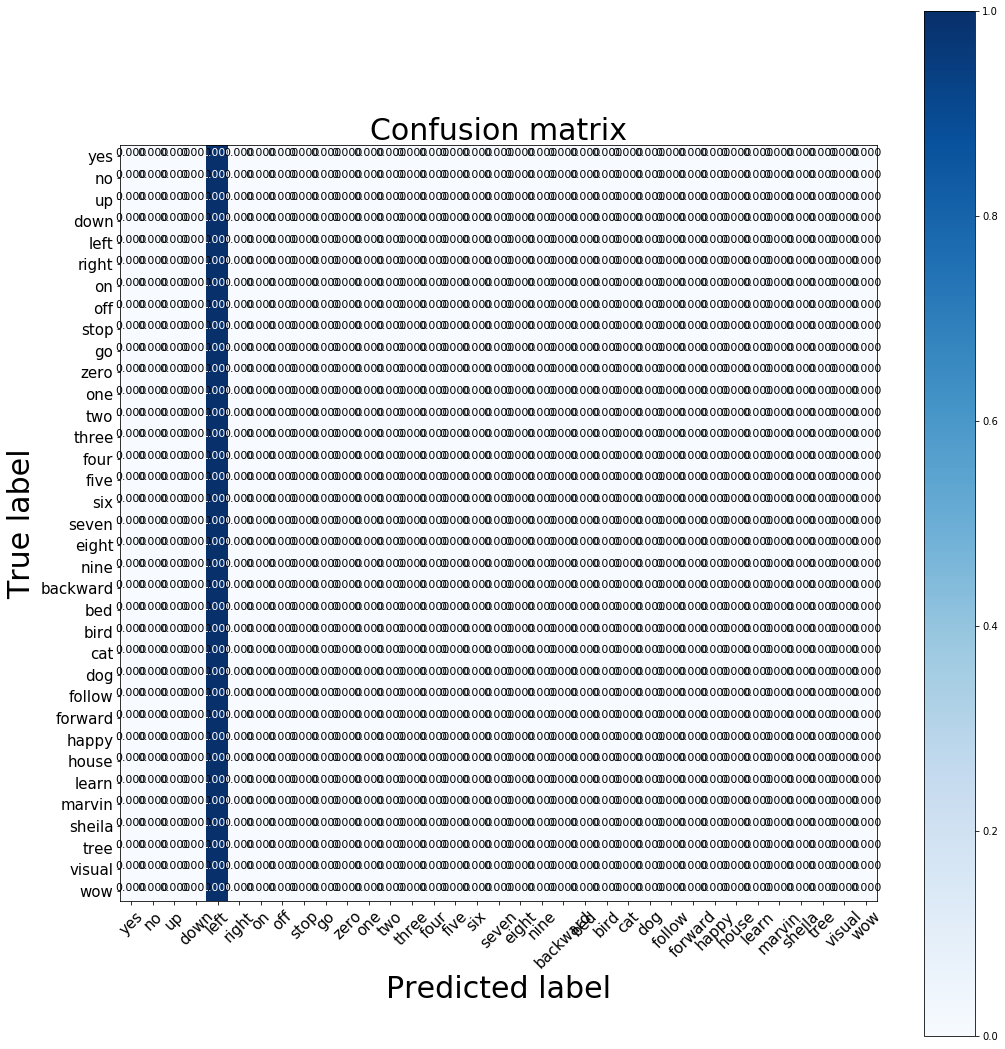

In [ ]:
#16. plot confusion matrix
import matr
matr.plot_confusion_matrix(cm,classes, normalize=True)

# Inception V3 Exp 





Inception net implemented on Audio dataset with 36 classes 

VALIDATION ACCURACY of 94.853%

In [ ]:
%%writefile modelinceptionv3a.py

from keras.models import Model, load_model
from keras.layers import Input, Activation, Concatenate, Permute, Reshape, Flatten, Lambda, Dot, Softmax
from keras.layers import Add, Dropout, BatchNormalization, Conv2D, Reshape, MaxPooling2D, Dense, LSTM, Bidirectional
from keras import backend as K
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from keras import backend as K
from keras import optimizers
from kapre.time_frequency import Melspectrogram, Spectrogram
import keras
# Importing the important libraries
from keras.applications.resnet50 import ResNet50
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from kapre.utils import Normalization2D
def Inceptionv3SpeechModel(nCategories, samplingrate = 16000, inputLength = 16000):
    """
    Base fully convolutional model for speech recognition
    """

    inputs = Input((inputLength,))

    x = Reshape((1, -1)) (inputs)

    x = Melspectrogram(n_dft=1024, n_hop=128, input_shape=(1, inputLength),
                             padding='same', sr=samplingrate, n_mels=80,
                             fmin=40.0, fmax=samplingrate/2, power_melgram=1.0,
                             return_decibel_melgram=True, trainable_fb=False,
                             trainable_kernel=False,
                             name='mel_stft') (x)
    
    zee = Normalization2D(int_axis=0)(x)
    
    model = keras.applications.inception_v3.InceptionV3(include_top=True, weights=None, input_tensor=zee, input_shape=(80,125,1), pooling=None, classes=36)

    return model

Writing modelinceptionv3a.py


In [ ]:
from keras.models import Model, load_model
from keras.layers import Input, Activation, Concatenate, Permute, Reshape, Flatten, Lambda, Dot, Softmax
from keras.layers import Add, Dropout, BatchNormalization, Conv2D, Reshape, MaxPooling2D, Dense, LSTM, Bidirectional
from keras import backend as K
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from keras import backend as K
from keras import optimizers
from kapre.time_frequency import Melspectrogram, Spectrogram
import modelinceptionv3a
# Importing the important libraries
from keras.applications.resnet50 import ResNet50
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from kapre.utils import Normalization2D
###########################################
###########################################
model = modelinceptionv3a.Inceptionv3SpeechModel(36, samplingrate = 16000, inputLength = 16000)
model.summary()
model.compile(optimizer='adam', loss=['sparse_categorical_crossentropy'], metrics=['sparse_categorical_accuracy'])
















Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 16000)        0                                            
__________________________________________________________________________________________________
reshape_1 (Reshape)             (None, 1, 16000)     0           input_1[0][0]                    
__________________________________________________________________________________________________
mel_stft (Melspectrogram)       (None, 80, 125, 1)   1091664     reshape_1[0][0]                  
__________________________________________________________________________________________________
normalization2d_1 (Normalizatio (None, 80, 125, 1)   0           mel_stft[0][0]                   
_________________________________________________________________________

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.001
    drop = 0.4
    epochs_drop = 8.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=6, verbose=1)
checkpointer = ModelCheckpoint('model_inceptionv3.h5', monitor='val_sparse_categorical_accuracy', verbose=1, mode=min, save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 45, verbose=1, 
callbacks=[earlystopper, checkpointer, lrate ])


/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:680: RuntimeWarning: ModelCheckpoint mode <built-in function min> is unknown, fallback to auto mode.
  RuntimeWarning)


Epoch 1/45
Changing learning rate to 0.001
3112/3112 [==============================] - 449s 144ms/step - loss: 1.1470 - sparse_categorical_accuracy: 0.6487 - val_loss: 1.0250 - val_sparse_categorical_accuracy: 0.6975

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.69753, saving model to model_inceptionv3.h5
Epoch 2/45
Changing learning rate to 0.001
3112/3112 [==============================] - 441s 142ms/step - loss: 0.6290 - sparse_categorical_accuracy: 0.8087 - val_loss: 0.7653 - val_sparse_categorical_accuracy: 0.7754

Epoch 00002: val_sparse_categorical_accuracy improved from 0.69753 to 0.77540, saving model to model_inceptionv3.h5
Epoch 3/45
Changing learning rate to 0.001
3112/3112 [==============================] - 444s 143ms/step - loss: 0.4473 - sparse_categorical_accuracy: 0.8669 - val_loss: 0.4831 - val_sparse_categorical_accuracy: 0.8568

Epoch 00003: val_sparse_categorical_accuracy improved from 0.77540 to 0.85678, saving model to model_inceptionv3.h

{'val_loss': [0.18624568719371412, 0.18627003499058967, 0.200303928772508, 0.17943372216914846, 0.18669776306275956, 0.18395816073230395, 0.1846564432199231, 0.1939304367177996, 0.19298812520115793, 0.19741841529333065, 0.19400324528750665], 'val_sparse_categorical_accuracy': [0.9493649732620321, 0.9515374331550802, 0.9476938502673797, 0.9547125668449198, 0.9517045454545454, 0.9550467914438503, 0.952707219251337, 0.9508689839572193, 0.952707219251337, 0.9515374331550802, 0.9510360962566845], 'loss': [0.07301999278330878, 0.04778978200144516, 0.04020797594301749, 0.03837657688453334, 0.03535618138842994, 0.03276427852410716, 0.030285014904888764, 0.028813573266594072, 0.025490568738579748, 0.029991437805699572, 0.022744574911717885], 'sparse_categorical_accuracy': [0.9812017994858612, 0.9880804145244216, 0.9902193123393316, 0.9907515263496144, 0.9916251606683805, 0.9926293380462725, 0.9927397975578406, 0.9936837242930592, 0.994456940874036, 0.9934025546272494, 0.9948586118251928], 'lr':

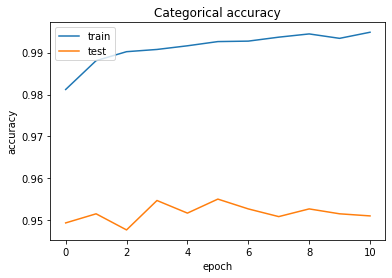

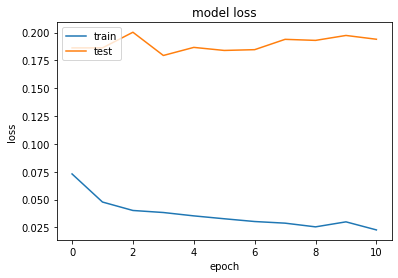

In [ ]:
#9.show results matlabpy
print(results.history)
# summarize history for categorical accuracy
plt.plot(results.history['sparse_categorical_accuracy'])
plt.plot(results.history['val_sparse_categorical_accuracy'])
plt.title('Categorical accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from keras.models import Model, load_model
model.load_weights('model_inceptionv3.h5')

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.0001
    drop = 0.4
    epochs_drop = 8.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=4, verbose=1)
checkpointer = ModelCheckpoint('model_inceptionv3.h5', monitor='val_sparse_categorical_accuracy', verbose=1, mode=min, save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 6, verbose=1, use_multiprocessing=True, workers=64,
callbacks=[earlystopper, checkpointer, lrate ])


Epoch 1/6


/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:680: RuntimeWarning: ModelCheckpoint mode <built-in function min> is unknown, fallback to auto mode.
  RuntimeWarning)


Changing learning rate to 0.0001
3111/3112 [============================>.] - ETA: 1s - loss: 0.0411 - sparse_categorical_accuracy: 0.9887Changing learning rate to 0.0001
Changing learning rate to 0.0001
3112/3112 [==============================] - 5625s 2s/step - loss: 0.0412 - sparse_categorical_accuracy: 0.9887 - val_loss: 0.2522 - val_sparse_categorical_accuracy: 0.9480

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.94803, saving model to model_inceptionv3.h5
Epoch 2/6
Changing learning rate to 0.0001
3112/3112 [==============================] - 449s 144ms/step - loss: 0.0427 - sparse_categorical_accuracy: 0.9886 - val_loss: 0.2891 - val_sparse_categorical_accuracy: 0.9365

Epoch 00002: val_sparse_categorical_accuracy did not improve from 0.94803
Epoch 3/6
Changing learning rate to 0.0001
3112/3112 [==============================] - 449s 144ms/step - loss: 0.0498 - sparse_categorical_accuracy: 0.9886 - val_loss: 0.2545 - val_sparse_categorical_accuracy: 0.946

In [ ]:
au, cl = test1.__getitem__(1)
set(cl)

In [ ]:
valEval = model.evaluate_generator(valGen, verbose=1,use_multiprocessing=True, workers=32)
trainEval = model.evaluate_generator(trainGen, verbose=1, use_multiprocessing=True, workers=32)
testEval = model.evaluate(au, cl, verbose=1)
print('Evaluation scores: \nMetrics: {} \nTrain: {} \nValidation: {} \nTest: {}'.format(model.metrics_names, trainEval, valEval, testEval) )

3000/3000 [==============================] - 4s 1ms/step
Evaluation scores: 
Metrics: ['loss', 'sparse_categorical_accuracy'] 
Train: [0.04192105959100708, 0.9912034061696658] 
Validation: [0.3126856140524443, 0.9346590909090909] 
Test: [0.2473683445993811, 0.9456666668256124]


In [ ]:
y_pred = model.predict(au, verbose=1)

3000/3000 [==============================] - 5s 2ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(cl, np.argmax(y_pred,1))
print(set(cl))

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35}


In [ ]:
#15. setting classes for Confusion matrix

#LRcmd
classes=[ 'yes', 'no' , 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go',
                         'zero' , 'one' , 'two' , 'three' , 'four' , 'five' , 'six' , 
                         'seven' ,  'eight' , 'nine' , 'backward', 'bed', 'bird', 'cat', 'dog',
                         'follow', 'forward', 'happy', 'house', 'learn', 'marvin', 'sheila', 'tree',
                         'visual', 'wow']

Normalized confusion matrix


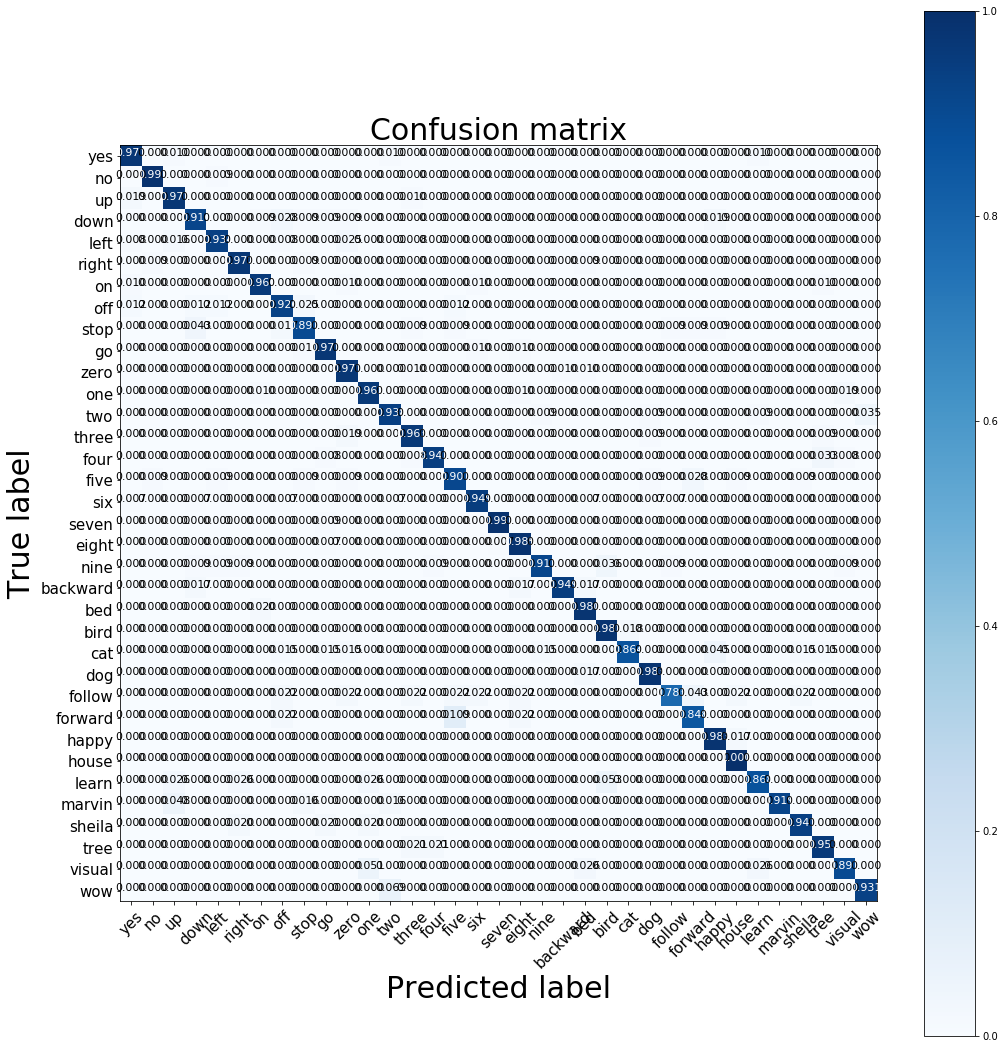

In [ ]:
#16. plot confusion matrix
import matr
matr.plot_confusion_matrix(cm,classes, normalize=True)

# New ResNET EXP

In [ ]:
"""
Clean and simple Keras implementation of network architectures described in:
    - (ResNet-50) [Deep Residual Learning for Image Recognition](https://arxiv.org/pdf/1512.03385.pdf).
    - (ResNeXt-50 32x4d) [Aggregated Residual Transformations for Deep Neural Networks](https://arxiv.org/pdf/1611.05431.pdf).
    
Python 3.
"""
from keras.layers import Input, Activation, Concatenate, Permute, Reshape, Flatten, Lambda, Dot, Softmax
from keras import layers
from keras import models
from kapre.time_frequency import Melspectrogram, Spectrogram
from kapre.utils import Normalization2D

#
# image dimensions
#

img_height = 224
img_width = 224
img_channels = 3

#
# network params
#

cardinality = 1
inputLength = 16000
inputs = Input((inputLength,))
def residual_network(nCategories, samplingrate = 16000, inputLength = 16000):
    """
    ResNeXt by default. For ResNet set `cardinality` = 1 above.
    
    """
    def add_common_layers(y):
        y = layers.BatchNormalization()(y)
        y = layers.LeakyReLU()(y)

        return y

    def grouped_convolution(y, nb_channels, _strides):
        # when `cardinality` == 1 this is just a standard convolution
        if cardinality == 1:
            return layers.Conv2D(nb_channels, kernel_size=(3, 3), strides=_strides, padding='same')(y)
        
        assert not nb_channels % cardinality
        _d = nb_channels // cardinality

        # in a grouped convolution layer, input and output channels are divided into `cardinality` groups,
        # and convolutions are separately performed within each group
        groups = []
        for j in range(cardinality):
            group = layers.Lambda(lambda z: z[:, :, :, j * _d:j * _d + _d])(y)
            groups.append(layers.Conv2D(_d, kernel_size=(3, 3), strides=_strides, padding='same')(group))
            
        # the grouped convolutional layer concatenates them as the outputs of the layer
        y = layers.concatenate(groups)

        return y

    def residual_block(y, nb_channels_in, nb_channels_out, _strides=(1, 1), _project_shortcut=False):
        """
        Our network consists of a stack of residual blocks. These blocks have the same topology,
        and are subject to two simple rules:
        - If producing spatial maps of the same size, the blocks share the same hyper-parameters (width and filter sizes).
        - Each time the spatial map is down-sampled by a factor of 2, the width of the blocks is multiplied by a factor of 2.
        """
        shortcut = y

        # we modify the residual building block as a bottleneck design to make the network more economical
        y = layers.Conv2D(nb_channels_in, kernel_size=(1, 1), strides=(1, 1), padding='same')(y)
        y = add_common_layers(y)

        # ResNeXt (identical to ResNet when `cardinality` == 1)
        y = grouped_convolution(y, nb_channels_in, _strides=_strides)
        y = add_common_layers(y)

        y = layers.Conv2D(nb_channels_out, kernel_size=(1, 1), strides=(1, 1), padding='same')(y)
        # batch normalization is employed after aggregating the transformations and before adding to the shortcut
        y = layers.BatchNormalization()(y)

        # identity shortcuts used directly when the input and output are of the same dimensions
        if _project_shortcut or _strides != (1, 1):
            # when the dimensions increase projection shortcut is used to match dimensions (done by 1×1 convolutions)
            # when the shortcuts go across feature maps of two sizes, they are performed with a stride of 2
            shortcut = layers.Conv2D(nb_channels_out, kernel_size=(1, 1), strides=_strides, padding='same')(shortcut)
            shortcut = layers.BatchNormalization()(shortcut)

        y = layers.add([shortcut, y])

        # relu is performed right after each batch normalization,
        # expect for the output of the block where relu is performed after the adding to the shortcut
        y = layers.LeakyReLU()(y)

        return y
    #
    

    x = Reshape((1, -1)) (inputs)

    x = Melspectrogram(n_dft=1024, n_hop=128, input_shape=(1, inputLength),
                             padding='same', sr=samplingrate, n_mels=80,
                             fmin=40.0, fmax=samplingrate/2, power_melgram=1.0,
                             return_decibel_melgram=True, trainable_fb=False,
                             trainable_kernel=False,
                             name='mel_stft') (x)
    
    x = Normalization2D(int_axis=0)(x)
    # conv1
    x = layers.Conv2D(64, kernel_size=(7, 7), strides=(2, 2), padding='same')(x)
    x = add_common_layers(x)

    # conv2
    x = layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)
    for i in range(2):
        project_shortcut = True if i == 0 else False
        x = residual_block(x, 64, 128, _project_shortcut=project_shortcut)

    # conv3
    for i in range(2):
        # down-sampling is performed by conv3_1, conv4_1, and conv5_1 with a stride of 2
        strides = (2, 2) if i == 0 else (1, 1)
        x = residual_block(x, 128,256,  _strides=strides)

    # conv4
    for i in range(2):
        strides = (2, 2) if i == 0 else (1, 1)
        x = residual_block(x, 256,512, _strides=strides)

    # conv5
    for i in range(2):
        strides = (2, 2) if i == 0 else (1, 1)
        x = residual_block(x, 512,1024, _strides=strides)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(36)(x)

    return x


network_output = residual_network(inputs)
  
model = models.Model(inputs=[inputs], outputs=[network_output])
print(model.summary())
model.compile(optimizer='adam', loss=['sparse_categorical_crossentropy'], metrics=['sparse_categorical_accuracy'])

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 16000)        0                                            
__________________________________________________________________________________________________
reshape_3 (Reshape)             (None, 1, 16000)     0           input_3[0][0]                    
__________________________________________________________________________________________________
mel_stft (Melspectrogram)       (None, 80, 125, 1)   1091664     reshape_3[0][0]                  
__________________________________________________________________________________________________
normalization2d_3 (Normalizatio (None, 80, 125, 1)   0           mel_stft[0][0]                   
____________________________________________________________________________________________

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.001
    drop = 0.4
    epochs_drop = 8.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=10, verbose=1)
checkpointer = ModelCheckpoint('model_resnet.h5', monitor='val_sparse_categorical_accuracy', verbose=1, mode=min, save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 20, verbose=1, 
callbacks=[earlystopper, checkpointer, lrate ])


/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:680: RuntimeWarning: ModelCheckpoint mode <built-in function min> is unknown, fallback to auto mode.
  RuntimeWarning)


Epoch 1/20
Changing learning rate to 0.001
3112/3112 [==============================] - 361s 116ms/step - loss: 3.5835 - sparse_categorical_accuracy: 0.0376 - val_loss: 3.5835 - val_sparse_categorical_accuracy: 0.0393

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.03927, saving model to model_resnet.h5
Epoch 2/20
Changing learning rate to 0.001
3112/3112 [==============================] - 360s 116ms/step - loss: 3.5835 - sparse_categorical_accuracy: 0.0388 - val_loss: 3.5835 - val_sparse_categorical_accuracy: 0.0389

Epoch 00002: val_sparse_categorical_accuracy did not improve from 0.03927
Epoch 3/20
Changing learning rate to 0.001
3112/3112 [==============================] - 359s 115ms/step - loss: 3.5835 - sparse_categorical_accuracy: 0.0375 - val_loss: 3.5835 - val_sparse_categorical_accuracy: 0.0401

Epoch 00003: val_sparse_categorical_accuracy improved from 0.03927 to 0.04011, saving model to model_resnet.h5
Epoch 4/20
Changing learning rate to 0.001
3112/31

# New Section of Resnet 
change desnse layer 

In [ ]:
"""
Clean and simple Keras implementation of network architectures described in:
    - (ResNet-50) [Deep Residual Learning for Image Recognition](https://arxiv.org/pdf/1512.03385.pdf).
    - (ResNeXt-50 32x4d) [Aggregated Residual Transformations for Deep Neural Networks](https://arxiv.org/pdf/1611.05431.pdf).
    
Python 3.
"""
from keras.layers import Input, Activation, Concatenate, Permute, Reshape, Flatten, Lambda, Dot, Softmax
from keras import layers
from keras import models
from kapre.time_frequency import Melspectrogram, Spectrogram
from kapre.utils import Normalization2D

#
# image dimensions
#

img_height = 224
img_width = 224
img_channels = 3

#
# network params
#

cardinality = 1
inputLength = 16000
inputs = Input((inputLength,))
def residual_network(nCategories, samplingrate = 16000, inputLength = 16000):
    """
    ResNeXt by default. For ResNet set `cardinality` = 1 above.
    
    """
    def add_common_layers(y):
        y = layers.BatchNormalization()(y)
        y = layers.LeakyReLU()(y)

        return y

    def grouped_convolution(y, nb_channels, _strides):
        # when `cardinality` == 1 this is just a standard convolution
        if cardinality == 1:
            return layers.Conv2D(nb_channels, kernel_size=(3, 3), strides=_strides, padding='same')(y)
        
        assert not nb_channels % cardinality
        _d = nb_channels // cardinality

        # in a grouped convolution layer, input and output channels are divided into `cardinality` groups,
        # and convolutions are separately performed within each group
        groups = []
        for j in range(cardinality):
            group = layers.Lambda(lambda z: z[:, :, :, j * _d:j * _d + _d])(y)
            groups.append(layers.Conv2D(_d, kernel_size=(3, 3), strides=_strides, padding='same')(group))
            
        # the grouped convolutional layer concatenates them as the outputs of the layer
        y = layers.concatenate(groups)

        return y

    def residual_block(y, nb_channels_in, nb_channels_out, _strides=(1, 1), _project_shortcut=False):
        """
        Our network consists of a stack of residual blocks. These blocks have the same topology,
        and are subject to two simple rules:
        - If producing spatial maps of the same size, the blocks share the same hyper-parameters (width and filter sizes).
        - Each time the spatial map is down-sampled by a factor of 2, the width of the blocks is multiplied by a factor of 2.
        """
        shortcut = y

        # we modify the residual building block as a bottleneck design to make the network more economical
        y = layers.Conv2D(nb_channels_in, kernel_size=(1, 1), strides=(1, 1), padding='same')(y)
        y = add_common_layers(y)

        # ResNeXt (identical to ResNet when `cardinality` == 1)
        y = grouped_convolution(y, nb_channels_in, _strides=_strides)
        y = add_common_layers(y)

        y = layers.Conv2D(nb_channels_out, kernel_size=(1, 1), strides=(1, 1), padding='same')(y)
        # batch normalization is employed after aggregating the transformations and before adding to the shortcut
        y = layers.BatchNormalization()(y)

        # identity shortcuts used directly when the input and output are of the same dimensions
        if _project_shortcut or _strides != (1, 1):
            # when the dimensions increase projection shortcut is used to match dimensions (done by 1×1 convolutions)
            # when the shortcuts go across feature maps of two sizes, they are performed with a stride of 2
            shortcut = layers.Conv2D(nb_channels_out, kernel_size=(1, 1), strides=_strides, padding='same')(shortcut)
            shortcut = layers.BatchNormalization()(shortcut)

        y = layers.add([shortcut, y])

        # relu is performed right after each batch normalization,
        # expect for the output of the block where relu is performed after the adding to the shortcut
        y = layers.LeakyReLU()(y)

        return y
    #
    

    x = Reshape((1, -1)) (inputs)

    x = Melspectrogram(n_dft=1024, n_hop=128, input_shape=(1, inputLength),
                             padding='same', sr=samplingrate, n_mels=80,
                             fmin=40.0, fmax=samplingrate/2, power_melgram=1.0,
                             return_decibel_melgram=True, trainable_fb=False,
                             trainable_kernel=False,
                             name='mel_stft') (x)
    
    x = Normalization2D(int_axis=0)(x)
    # conv1
    x = layers.Conv2D(32, kernel_size=(7, 7), strides=(2, 2), padding='same')(x)
    x = add_common_layers(x)

    # conv2
    x = layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)
    for i in range(2):
        project_shortcut = True if i == 0 else False
        x = residual_block(x, 64, 128, _project_shortcut=project_shortcut)

    # conv3
    for i in range(2):
        # down-sampling is performed by conv3_1, conv4_1, and conv5_1 with a stride of 2
        strides = (2, 2) if i == 0 else (1, 1)
        x = residual_block(x, 128,256,  _strides=strides)

    # conv4
    for i in range(2):
        strides = (2, 2) if i == 0 else (1, 1)
        x = residual_block(x, 256,512, _strides=strides)

    # conv5
    for i in range(2):
        strides = (2, 2) if i == 0 else (1, 1)
        x = residual_block(x, 512,256, _strides=strides)
    x = layers.Dense(128)(x)
    x = layers.GlobalAveragePooling2D()(x)
    
    x = layers.Dense(36)(x)

    return x


network_output = residual_network(inputs)
  
model = models.Model(inputs=[inputs], outputs=[network_output])
print(model.summary())
model.compile(optimizer='adam', loss=['sparse_categorical_crossentropy'], metrics=['sparse_categorical_accuracy'])

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 16000)        0                                            
__________________________________________________________________________________________________
reshape_4 (Reshape)             (None, 1, 16000)     0           input_4[0][0]                    
__________________________________________________________________________________________________
mel_stft (Melspectrogram)       (None, 80, 125, 1)   1091664     reshape_4[0][0]                  
__________________________________________________________________________________________________
normalization2d_4 (Normalizatio (None, 80, 125, 1)   0           mel_stft[0][0]                   
____________________________________________________________________________________________

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.001
    drop = 0.4
    epochs_drop = 8.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=10, verbose=1)
checkpointer = ModelCheckpoint('model_resnet1.h5', monitor='val_sparse_categorical_accuracy', verbose=1, mode=min, save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 20, verbose=1, 
callbacks=[earlystopper, checkpointer, lrate ])


/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:680: RuntimeWarning: ModelCheckpoint mode <built-in function min> is unknown, fallback to auto mode.
  RuntimeWarning)


Epoch 1/20
Changing learning rate to 0.001
3112/3112 [==============================] - 369s 119ms/step - loss: 6.4027 - sparse_categorical_accuracy: 0.0366 - val_loss: 6.3919 - val_sparse_categorical_accuracy: 0.0366

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.03660, saving model to model_resnet1.h5
Epoch 2/20
Changing learning rate to 0.001
3112/3112 [==============================] - 392s 126ms/step - loss: 6.4029 - sparse_categorical_accuracy: 0.0364 - val_loss: 6.3919 - val_sparse_categorical_accuracy: 0.0361

Epoch 00002: val_sparse_categorical_accuracy did not improve from 0.03660
Epoch 3/20
Changing learning rate to 0.001
3112/3112 [==============================] - 381s 123ms/step - loss: 6.4025 - sparse_categorical_accuracy: 0.0369 - val_loss: 6.3919 - val_sparse_categorical_accuracy: 0.0364

Epoch 00003: val_sparse_categorical_accuracy did not improve from 0.03660
Epoch 4/20
Changing learning rate to 0.001
3112/3112 [==============================] 

# Resnet 4th test

```
# Permute with shape (2,1,3) after melspectogram
```



In [ ]:
"""
Clean and simple Keras implementation of network architectures described in:
    - (ResNet-50) [Deep Residual Learning for Image Recognition](https://arxiv.org/pdf/1512.03385.pdf).
    - (ResNeXt-50 32x4d) [Aggregated Residual Transformations for Deep Neural Networks](https://arxiv.org/pdf/1611.05431.pdf).
    
Python 3.
"""
from keras.layers import Input, Activation, Concatenate, Permute, Reshape, Flatten, Lambda, Dot, Softmax
from keras import layers
from keras import models
from kapre.time_frequency import Melspectrogram, Spectrogram
from kapre.utils import Normalization2D

#
# image dimensions
#

img_height = 224
img_width = 224
img_channels = 3

#
# network params
#

cardinality = 1
inputLength = 16000
inputs = Input((inputLength,))
def residual_network(nCategories, samplingrate = 16000, inputLength = 16000):
    """
    ResNeXt by default. For ResNet set `cardinality` = 1 above.
    
    """
    def add_common_layers(y):
        y = layers.BatchNormalization()(y)
        y = layers.LeakyReLU()(y)

        return y

    def grouped_convolution(y, nb_channels, _strides):
        # when `cardinality` == 1 this is just a standard convolution
        if cardinality == 1:
            return layers.Conv2D(nb_channels, kernel_size=(3, 3), strides=_strides, padding='same')(y)
        
        assert not nb_channels % cardinality
        _d = nb_channels // cardinality

        # in a grouped convolution layer, input and output channels are divided into `cardinality` groups,
        # and convolutions are separately performed within each group
        groups = []
        for j in range(cardinality):
            group = layers.Lambda(lambda z: z[:, :, :, j * _d:j * _d + _d])(y)
            groups.append(layers.Conv2D(_d, kernel_size=(3, 3), strides=_strides, padding='same')(group))
            
        # the grouped convolutional layer concatenates them as the outputs of the layer
        y = layers.concatenate(groups)

        return y

    def residual_block(y, nb_channels_in, nb_channels_out, _strides=(1, 1), _project_shortcut=False):
        """
        Our network consists of a stack of residual blocks. These blocks have the same topology,
        and are subject to two simple rules:
        - If producing spatial maps of the same size, the blocks share the same hyper-parameters (width and filter sizes).
        - Each time the spatial map is down-sampled by a factor of 2, the width of the blocks is multiplied by a factor of 2.
        """
        shortcut = y

        # we modify the residual building block as a bottleneck design to make the network more economical
        y = layers.Conv2D(nb_channels_in, kernel_size=(1, 1), strides=(1, 1), padding='same')(y)
        y = add_common_layers(y)

        # ResNeXt (identical to ResNet when `cardinality` == 1)
        y = grouped_convolution(y, nb_channels_in, _strides=_strides)
        y = add_common_layers(y)

        y = layers.Conv2D(nb_channels_out, kernel_size=(1, 1), strides=(1, 1), padding='same')(y)
        # batch normalization is employed after aggregating the transformations and before adding to the shortcut
        y = layers.BatchNormalization()(y)

        # identity shortcuts used directly when the input and output are of the same dimensions
        if _project_shortcut or _strides != (1, 1):
            # when the dimensions increase projection shortcut is used to match dimensions (done by 1×1 convolutions)
            # when the shortcuts go across feature maps of two sizes, they are performed with a stride of 2
            shortcut = layers.Conv2D(nb_channels_out, kernel_size=(1, 1), strides=_strides, padding='same')(shortcut)
            shortcut = layers.BatchNormalization()(shortcut)

        y = layers.add([shortcut, y])

        # relu is performed right after each batch normalization,
        # expect for the output of the block where relu is performed after the adding to the shortcut
        y = layers.LeakyReLU()(y)

        return y
    #
    

    x = Reshape((1, -1)) (inputs)

    x = Melspectrogram(n_dft=1024, n_hop=128, input_shape=(1, inputLength),
                             padding='same', sr=samplingrate, n_mels=80,
                             fmin=40.0, fmax=samplingrate/2, power_melgram=1.0,
                             return_decibel_melgram=True, trainable_fb=False,
                             trainable_kernel=False,
                             name='mel_stft') (x)
    
    x = Normalization2D(int_axis=0)(x)

    x = Permute((2,1,3)) (x)
    # conv1
    x = layers.Conv2D(32, kernel_size=(7, 7), strides=(2, 2), padding='same')(x)
    x = add_common_layers(x)

    # conv2
    x = layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)
    for i in range(2):
        project_shortcut = True if i == 0 else False
        x = residual_block(x, 64, 128, _project_shortcut=project_shortcut)

    # conv3
    for i in range(2):
        # down-sampling is performed by conv3_1, conv4_1, and conv5_1 with a stride of 2
        strides = (2, 2) if i == 0 else (1, 1)
        x = residual_block(x, 128,256,  _strides=strides)

    # conv4
    for i in range(2):
        strides = (2, 2) if i == 0 else (1, 1)
        x = residual_block(x, 256,512, _strides=strides)

    # conv5
    for i in range(2):
        strides = (2, 2) if i == 0 else (1, 1)
        x = residual_block(x, 512,256, _strides=strides)
    x = layers.Dense(128)(x)
    x = layers.GlobalAveragePooling2D()(x)
    
    x = layers.Dense(36)(x)

    return x


network_output = residual_network(inputs)
  
model = models.Model(inputs=[inputs], outputs=[network_output])
print(model.summary())
model.compile(optimizer='adam', loss=['sparse_categorical_crossentropy'], metrics=['sparse_categorical_accuracy'])














Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 16000)        0                                            
__________________________________________________________________________________________________
reshape_1 (Reshape)             (None, 1, 16000)     0           input_1[0][0]                    
__________________________________________________________________________________________________
mel_stft (Melspectrogram)       (None, 80, 125, 1)   1091664     reshape_1[0][0]                  
__________________________________________________________________________________________________
normalization2d_1 (Normalizatio (None, 80, 125, 1)   0           mel_stft[0][0]                   
_______________________________________________________________________________

In [ ]:
model.save('model_resnet4.h5')

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.001
    drop = 0.4
    epochs_drop = 8.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=10, verbose=1)
checkpointer = ModelCheckpoint('model_resnet4.h5', monitor='val_sparse_categorical_accuracy', verbose=1, mode=min, save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 20, verbose=1, use_multiprocessing=True, workers=64,
callbacks=[earlystopper, checkpointer, lrate ])

Epoch 1/20
Changing learning rate to 0.001

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:680: RuntimeWarning: ModelCheckpoint mode <built-in function min> is unknown, fallback to auto mode.
  RuntimeWarning)



3112/3112 [==============================] - 3642s 1s/step - loss: 7.3493 - sparse_categorical_accuracy: 0.0366 - val_loss: 7.8244 - val_sparse_categorical_accuracy: 0.0304

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.03041, saving model to model_resnet4.h5

Epoch 2/20
Changing learning rate to 0.001
3112/3112 [==============================] - 346s 111ms/step - loss: 7.8541 - sparse_categorical_accuracy: 0.0288 - val_loss: 8.6844 - val_sparse_categorical_accuracy: 0.0150

Epoch 00002: val_sparse_categorical_accuracy did not improve from 0.03041

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.03041, saving model to model_resnet4.h5
Epoch 3/20
Changing learning rate to 0.001
3112/3112 [==============================] - 333s 107ms/step - loss: 8.7662 - sparse_categorical_accuracy: 0.0150 - val_loss: 8.6763 - val_sparse_categorical_accuracy: 0.0150

Epoch 00003: val_sparse_categorical_accuracy did not improve from 0.03041
Epoch 4/20
Changing

# Transformer Speech recogination

*Transformer Ingredients needed for model*

In [ ]:
import numpy as np
# noinspection PyPep8Naming
from keras import backend as K
from keras.engine import Layer
from keras.utils import get_custom_objects


class _BaseMultiHeadAttention(Layer):
    """
    Base class for two types of Multi-head attention layers:
    Self-attention and its more general form used in decoders (the one which
    takes values and keys from the encoder).
    """
    def __init__(self, num_heads: int, use_masking: bool,
                 dropout: float = 0.0,
                 compression_window_size: int = None,
                 **kwargs):
        """
        :param num_heads: number of attention heads
        :param use_masking: when True, forbids the attention to see the further
          elements in the sequence (particularly important in language
          modelling).
        :param dropout: dropout that should be applied to the attention
          (after the softmax).
        :param compression_window_size: an integer value >= 1 controlling
          how much we should compress the attention. For more details,
          read about memory-compressed self-attention in
          "Generating Wikipedia by summarizing long sequences"
          (https://arxiv.org/pdf/1801.10198.pdf).
        :param kwargs: any extra arguments typical for a Keras layer,
          such as name, etc.
        """
        self.num_heads = num_heads
        self.use_masking = use_masking
        self.dropout = dropout
        if (compression_window_size is not None
                and compression_window_size <= 0):
            assert ValueError(
                f"Too small compression window ({compression_window_size})")
        self.compression_window_size = compression_window_size
        super().__init__(**kwargs)

    def get_config(self):
        config = super().get_config()
        config['num_heads'] = self.num_heads
        config['use_masking'] = self.use_masking
        config['dropout'] = self.dropout
        config['compression_window_size'] = self.compression_window_size
        return config

    # noinspection PyAttributeOutsideInit
    def build_output_params(self, d_model):
        self.output_weights = self.add_weight(
            name='output_weights',
            shape=(d_model, d_model),
            initializer='glorot_uniform',
            trainable=True)
        if self.compression_window_size is not None:
            self.k_conv_kernel = self.add_weight(
                name='k_conv_kernel',
                shape=(self.compression_window_size,
                       d_model // self.num_heads,
                       d_model // self.num_heads),
                initializer='glorot_uniform',
                trainable=True)
            self.k_conv_bias = self.add_weight(
                name='k_conv_bias',
                shape=(d_model // self.num_heads,),
                initializer='zeros',
                trainable=True)
            self.v_conv_kernel = self.add_weight(
                name='v_conv_kernel',
                shape=(self.compression_window_size,
                       d_model // self.num_heads,
                       d_model // self.num_heads),
                initializer='glorot_uniform',
                trainable=True)
            self.v_conv_bias = self.add_weight(
                name='v_conv_bias',
                shape=(d_model // self.num_heads,),
                initializer='zeros',
                trainable=True)

    def validate_model_dimensionality(self, d_model: int):
        if d_model % self.num_heads != 0:
            raise ValueError(
                f'The size of the last dimension of the input '
                f'({d_model}) must be evenly divisible by the number'
                f'of the attention heads {self.num_heads}')

    def attention(self, pre_q, pre_v, pre_k, out_seq_len: int, d_model: int,
                  training=None):
        """
        Calculates the output of the attention once the affine transformations
        of the inputs are done. Here's the shapes of the arguments:
        :param pre_q: (batch_size, q_seq_len, num_heads, d_model // num_heads)
        :param pre_v: (batch_size, v_seq_len, num_heads, d_model // num_heads)
        :param pre_k: (batch_size, k_seq_len, num_heads, d_model // num_heads)
        :param out_seq_len: the length of the output sequence
        :param d_model: dimensionality of the model (by the paper)
        :param training: Passed by Keras. Should not be defined manually.
          Optional scalar tensor indicating if we're in training
          or inference phase.
        """
        # shaping Q and V into (batch_size, num_heads, seq_len, d_model//heads)
        q = K.permute_dimensions(pre_q, [0, 2, 1, 3])
        v = K.permute_dimensions(pre_v, [0, 2, 1, 3])

        if self.compression_window_size is None:
            k_transposed = K.permute_dimensions(pre_k, [0, 2, 3, 1])
        else:
            # Memory-compressed attention described in paper
            # "Generating Wikipedia by Summarizing Long Sequences"
            # (https://arxiv.org/pdf/1801.10198.pdf)
            # It compresses keys and values using 1D-convolution which reduces
            # the size of Q * K_transposed from roughly seq_len^2
            # to convoluted_seq_len^2. If we use strided convolution with
            # window size = 3 and stride = 3, memory requirements of such
            # memory-compressed attention will be 9 times smaller than
            # that of the original version.
            if self.use_masking:
                raise NotImplementedError(
                    "Masked memory-compressed attention has not "
                    "been implemented yet")
            k = K.permute_dimensions(pre_k, [0, 2, 1, 3])
            k, v = [
                K.reshape(
                    # Step 3: Return the result to its original dimensions
                    # (batch_size, num_heads, seq_len, d_model//heads)
                    K.bias_add(
                        # Step 3: ... and add bias
                        K.conv1d(
                            # Step 2: we "compress" K and V using strided conv
                            K.reshape(
                                # Step 1: we reshape K and V to
                                # (batch + num_heads,  seq_len, d_model//heads)
                                item,
                                (-1,
                                 K.int_shape(item)[-2],
                                 d_model // self.num_heads)),
                            kernel,
                            strides=self.compression_window_size,
                            padding='valid', data_format='channels_last'),
                        bias,
                        data_format='channels_last'),
                    # new shape
                    K.concatenate([
                        K.shape(item)[:2],
                        [-1, d_model // self.num_heads]]))
                for item, kernel, bias in (
                    (k, self.k_conv_kernel, self.k_conv_bias),
                    (v, self.v_conv_kernel, self.v_conv_bias))]
            k_transposed = K.permute_dimensions(k, [0, 1, 3, 2])
        # shaping K into (batch_size, num_heads, d_model//heads, seq_len)
        # for further matrix multiplication
        sqrt_d = K.constant(np.sqrt(d_model // self.num_heads),
                            dtype=K.floatx())
        q_shape = K.int_shape(q)
        k_t_shape = K.int_shape(k_transposed)
        v_shape = K.int_shape(v)
        # before performing batch_dot all tensors are being converted to 3D
        # shape (batch_size * num_heads, rows, cols) to make sure batch_dot
        # performs identically on all backends
        attention_heads = K.reshape(
            K.batch_dot(
                self.apply_dropout_if_needed(
                    K.softmax(
                        self.mask_attention_if_needed(
                            K.batch_dot(
                                K.reshape(q, (-1,) + q_shape[-2:]),
                                K.reshape(k_transposed,
                                          (-1,) + k_t_shape[-2:]))
                            / sqrt_d)),
                    training=training),
                K.reshape(v, (-1,) + v_shape[-2:])),
            (-1, self.num_heads, q_shape[-2], v_shape[-1]))
        attention_heads_merged = K.reshape(
            K.permute_dimensions(attention_heads, [0, 2, 1, 3]),
            (-1, d_model))
        attention_out = K.reshape(
            K.dot(attention_heads_merged, self.output_weights),
            (-1, out_seq_len, d_model))
        return attention_out

    def apply_dropout_if_needed(self, attention_softmax, training=None):
        if 0.0 < self.dropout < 1.0:
            def dropped_softmax():
                return K.dropout(attention_softmax, self.dropout)

            return K.in_train_phase(dropped_softmax, attention_softmax,
                                    training=training)
        return attention_softmax

    def mask_attention_if_needed(self, dot_product):
        """
        Makes sure that (when enabled) each position
        (of a decoder's self-attention) cannot attend to subsequent positions.
        This is achieved by assigning -inf (or some large negative number)
        to all invalid connections. Later softmax will turn them into zeros.
        We need this to guarantee that decoder's predictions are based
        on what has happened before the position, not after.
        The method does nothing if masking is turned off.
        :param dot_product: scaled dot-product of Q and K after reshaping them
        to 3D tensors (batch * num_heads, rows, cols)
        """
        if not self.use_masking:
            return dot_product
        last_dims = K.int_shape(dot_product)[-2:]
        low_triangle_ones = (
            np.tril(np.ones(last_dims))
            # to ensure proper broadcasting
            .reshape((1,) + last_dims))
        inverse_low_triangle = 1 - low_triangle_ones
        close_to_negative_inf = -1e9
        result = (
            K.constant(low_triangle_ones, dtype=K.floatx()) * dot_product +
            K.constant(close_to_negative_inf * inverse_low_triangle))
        return result


class MultiHeadAttention(_BaseMultiHeadAttention):
    """
    Multi-head attention which can use two inputs:
    First: from the encoder - it's used to project the keys and the values
    Second: from the decoder - used to project the queries.
    """

    # noinspection PyAttributeOutsideInit
    def build(self, input_shape):
        if not (isinstance(input_shape, list) and len(input_shape) == 2):
            raise ValueError(
                'You must call this layer passing a list of two tensors'
                '(for keys/values and queries)')
        values_dim, query_dim = input_shape[0][-1], input_shape[1][-1]
        if query_dim != values_dim:
            raise ValueError(
                f'Both keys/value and query inputs must be '
                f'of the same dimensionality, instead of '
                f'{values_dim} and {query_dim}.')
        d_model = query_dim
        self.validate_model_dimensionality(d_model)
        # These weights are concatenated matrices W_k and W_v which
        # are, in turn, concatenated W matrices of keys, and values
        # for each of the heads. So, essentially it's a concatenation of
        # W_k1, W_k2,..., W_kh, W_v1, W_v2,..., W_vh
        # for all h heads.
        self.kv_weights = self.add_weight(
            name='kv_weights', shape=(d_model, d_model * 2),
            initializer='glorot_uniform', trainable=True)
        self.q_weights = self.add_weight(
            name='q_weights', shape=(d_model, d_model),
            initializer='glorot_uniform', trainable=True)
        self.build_output_params(d_model)
        return super().build(input_shape)

    def call(self, inputs, **kwargs):
        if not (isinstance(inputs, list) and len(inputs) == 2):
            raise ValueError(
                'You can call this layer only with a list of two tensors '
                '(for keys/values and queries)')
        key_values_input, query_input = inputs
        _, value_seq_len, d_model = K.int_shape(key_values_input)
        query_seq_len = K.int_shape(inputs[1])[-2]
        # The first thing we need to do is to perform affine transformations
        # of the inputs to get the Queries, the Keys and the Values.
        kv = K.dot(K.reshape(key_values_input, [-1, d_model]), self.kv_weights)
        # splitting the keys, the values and the queries before further
        # processing
        pre_k, pre_v = [
            K.reshape(
                # K.slice(kv, (0, i * d_model), (-1, d_model)),
                kv[:, i * d_model: (i + 1) * d_model],
                (-1, value_seq_len,
                 self.num_heads, d_model // self.num_heads))
            for i in range(2)]
        pre_q = K.reshape(
            K.dot(K.reshape(query_input, [-1, d_model]), self.q_weights),
            (-1, query_seq_len, self.num_heads, d_model // self.num_heads))
        return self.attention(pre_q, pre_v, pre_k, query_seq_len, d_model,
                              training=kwargs.get('training'))


class MultiHeadSelfAttention(_BaseMultiHeadAttention):
    """
    Multi-head self-attention for both encoders and decoders.
    Uses only one input and has implementation which is better suited for
    such use case that more general MultiHeadAttention class.
    """

    # noinspection PyAttributeOutsideInit
    def build(self, input_shape):
        if not isinstance(input_shape, tuple):
            raise ValueError('Invalid input')
        d_model = input_shape[-1]
        self.validate_model_dimensionality(d_model)
        # These weights are concatenated matrices W_q, W_k and W_v which
        # are, in turn, concatenated W matrices of keys, queries and values
        # for each of the heads. So, essentially it's a concatenation of
        # W_q1, W_q2,..., W_qh, W_k1, W_k2,..., W_kh, W_v1, W_v2,..., W_vh
        # for all h heads.
        self.qkv_weights = self.add_weight(
            name='qkv_weights',
            shape=(d_model, d_model * 3),  # * 3 for q, k and v
            initializer='glorot_uniform',
            trainable=True)
        self.build_output_params(d_model)
        return super().build(input_shape)

    def call(self, inputs, **kwargs):
        if not K.is_tensor(inputs):
            raise ValueError(
                'The layer can be called only with one tensor as an argument')
        _, seq_len, d_model = K.int_shape(inputs)
        # The first thing we need to do is to perform affine transformations
        # of the inputs to get the Queries, the Keys and the Values.
        qkv = K.dot(K.reshape(inputs, [-1, d_model]), self.qkv_weights)
        # splitting the keys, the values and the queries before further
        # processing
        pre_q, pre_k, pre_v = [
            K.reshape(
                # K.slice(qkv, (0, i * d_model), (-1, d_model)),
                qkv[:, i * d_model:(i + 1) * d_model],
                (-1, seq_len, self.num_heads, d_model // self.num_heads))
            for i in range(3)]
        attention_out = self.attention(pre_q, pre_v, pre_k, seq_len, d_model,
                                       training=kwargs.get('training'))
        return attention_out

    def compute_output_shape(self, input_shape):
        return input_shape


get_custom_objects().update({
    'MultiHeadSelfAttention': MultiHeadSelfAttention,
    'MultiHeadAttention': MultiHeadAttention,
})


In [ ]:

import numpy as np
# noinspection PyPep8Naming
from keras import backend as K
from keras.engine import Layer
from keras.utils import get_custom_objects


def positional_signal(hidden_size: int, length: int,
                      min_timescale: float = 1.0, max_timescale: float = 1e4):
    """
    Helper function, constructing basic positional encoding.
    The code is partially based on implementation from Tensor2Tensor library
    https://github.com/tensorflow/tensor2tensor/blob/master/tensor2tensor/layers/common_attention.py
    """

    if hidden_size % 2 != 0:
        raise ValueError(
            f"The hidden dimension of the model must be divisible by 2."
            f"Currently it is {hidden_size}")
    position = K.arange(0, length, dtype=K.floatx())
    num_timescales = hidden_size // 2
    log_timescale_increment = K.constant(
        (np.log(float(max_timescale) / float(min_timescale)) /
         (num_timescales - 1)),
        dtype=K.floatx())
    inv_timescales = (
            min_timescale *
            K.exp(K.arange(num_timescales, dtype=K.floatx()) *
                  -log_timescale_increment))
    scaled_time = K.expand_dims(position, 1) * K.expand_dims(inv_timescales, 0)
    signal = K.concatenate([K.sin(scaled_time), K.cos(scaled_time)], axis=1)
    return K.expand_dims(signal, axis=0)


class AddPositionalEncoding(Layer):
    """
    Injects positional encoding signal described in section 3.5 of the original
    paper "Attention is all you need". Also a base class for more complex
    coordinate encoding described in "Universal Transformers".
    """

    def __init__(self, min_timescale: float = 1.0,
                 max_timescale: float = 1.0e4, **kwargs):
        self.min_timescale = min_timescale
        self.max_timescale = max_timescale
        self.signal = None
        super().__init__(**kwargs)

    def get_config(self):
        config = super().get_config()
        config['min_timescale'] = self.min_timescale
        config['max_timescale'] = self.max_timescale
        return config

    def build(self, input_shape):
        _, length, hidden_size = input_shape
        self.signal = positional_signal(
            hidden_size, length, self.min_timescale, self.max_timescale)
        return super().build(input_shape)

    def call(self, inputs, **kwargs):
        return inputs + self.signal


class AddCoordinateEncoding(AddPositionalEncoding):
    """
    Implements coordinate encoding described in section 2.1
    of "Universal Transformers" (https://arxiv.org/abs/1807.03819).
    In other words, injects two signals at once: current position in
    the sequence, and current step (vertically) in the transformer model.
    """

    def build(self, input_shape):
        super().build(input_shape)
        _, length, hidden_size = input_shape

    def call(self, inputs, step=None, **kwargs):
        if step is None:
            raise ValueError("Please, provide current Transformer's step"
                             "using 'step' keyword argument.")
        pos_encoded_added = super().call(inputs, **kwargs)
        step_signal = K.expand_dims(self.signal[:, step, :], axis=1)
        return pos_encoded_added + step_signal


class TransformerCoordinateEmbedding(Layer):
    """
    Represents trainable positional embeddings for the Transformer model:

    1. word position embeddings - one for each position in the sequence.
    2. depth embeddings - one for each block of the model

    Calling the layer with the Transformer's input will return a new input
    with those embeddings added.
    """

    def __init__(self, max_transformer_depth: int, **kwargs):
        self.max_depth = max_transformer_depth
        super().__init__(**kwargs)

    def get_config(self):
        config = super().get_config()
        config['max_transformer_depth'] = self.max_depth
        return config

    # noinspection PyAttributeOutsideInit
    def build(self, input_shape):
        sequence_length, d_model = input_shape[-2:]
        self.word_position_embeddings = self.add_weight(
            shape=(sequence_length, d_model),
            initializer='uniform',
            name='word_position_embeddings',
            trainable=True)
        self.depth_embeddings = self.add_weight(
            shape=(self.max_depth, d_model),
            initializer='uniform',
            name='depth_position_embeddings',
            trainable=True)
        super().build(input_shape)

    def call(self, inputs, **kwargs):
        depth = kwargs.get('step')
        if depth is None:
            raise ValueError("Please, provide current Transformer's step"
                             "using 'step' keyword argument.")
        result = inputs + self.word_position_embeddings
        if depth is not None:
            result = result + self.depth_embeddings[depth]
        return result


get_custom_objects().update({
    'TransformerCoordinateEmbedding': TransformerCoordinateEmbedding,
    'AddCoordinateEncoding': AddCoordinateEncoding,
    'AddPositionalEncoding': AddCoordinateEncoding,
})


In [ ]:
"""
Tools that are not necessary for the Transformer by itself, but might be
useful in building models with it.
"""
import math

from keras import activations, regularizers
# noinspection PyPep8Naming
from keras import backend as K
from keras.engine import Layer
from keras.layers import Embedding
from keras.utils import get_custom_objects


class ReusableEmbedding(Embedding):
    """
    A "reusable" form of the Embedding layer, which returns its
    full embedding matrix as one of the outputs.
    This is necessary to guarantee correct work of Keras when the matrix
    is being re-used again in TiedOutputEmbedding layer.
    """
    def call(self, inputs, **kwargs):
        result = super().call(inputs, **kwargs)
        return [result, self.embeddings]

    def compute_output_shape(self, input_shape):
        return [super().compute_output_shape(input_shape),
                K.int_shape(self.embeddings)]

    def compute_mask(self, inputs, mask=None):
        return [super().compute_mask(inputs, mask), None]


class TiedOutputEmbedding(Layer):
    """
    Allows to reuse the same word embedding matrix both for the input and
    the output layers of the network.
    This is called Weight Tying and is proven to improve performance
    of neural network language models, as well as decrease their number
    of parameters (eliminating the need for a separate huge matrix
    of output weights).

    The layers is supposed to be called with two inputs, like

        TiedOutputEmbedding()([main_input, embedding_matrix])

    where the `main_input` is the output of the previous layer (like LSTM)
    and the `embedding_matrix` coming from the `ReusableEmbedding` layer.

    https://arxiv.org/abs/1608.05859
    https://arxiv.org/abs/1611.01462
    https://blog.openai.com/language-unsupervised/
    """
    def __init__(self, activation=None,
                 add_biases=False, projection_regularizer=None,
                 projection_dropout: float = 0.0,
                 scaled_attention=False,
                 **kwargs):
        self.activation = activations.get(activation)
        self.add_biases = add_biases
        self.projection_regularizer = regularizers.get(projection_regularizer)
        self.projection_dropout = projection_dropout
        self.scaled_attention = scaled_attention
        super().__init__(**kwargs)

    def get_config(self):
        config = super().get_config()
        return dict(
            config,
            activation=activations.serialize(self.activation),
            add_biases=self.add_biases,
            projection_regularizer=regularizers.serialize(
                self.projection_regularizer),
            projection_dropout=self.projection_dropout,
            scaled_attention=self.scaled_attention)

    # noinspection PyAttributeOutsideInit
    def build(self, input_shape):
        main_input_shape, embedding_matrix_shape = input_shape
        emb_input_dim, emb_output_dim = embedding_matrix_shape
        assert len(main_input_shape) == 3
        self.projection = self.add_weight(
            name='kernel',
            shape=(main_input_shape[-1], emb_output_dim),
            initializer='glorot_uniform',
            regularizer=self.projection_regularizer,
            trainable=True)
        if self.add_biases:
            self.biases = self.add_weight(
                name='biases',
                shape=(emb_output_dim,),
                initializer='zeros',
                trainable=True)
        return super().build(input_shape)

    def call(self, inputs, **kwargs):
        main_input, embedding_matrix = inputs
        input_shape_tensor = K.shape(main_input)
        last_input_dim = K.int_shape(main_input)[-1]
        emb_input_dim, emb_output_dim = K.int_shape(embedding_matrix)
        projected = K.dot(K.reshape(main_input, (-1, last_input_dim)),
                          self.projection)
        if self.add_biases:
            projected = K.bias_add(projected, self.biases,
                                   data_format='channels_last')
        if 0 < self.projection_dropout < 1:
            projected = K.in_train_phase(
                lambda: K.dropout(projected, self.projection_dropout),
                projected,
                training=kwargs.get('training'))
        attention = K.dot(projected, K.transpose(embedding_matrix))
        if self.scaled_attention:
            # scaled dot-product attention, described in
            # "Attention is all you need" (https://arxiv.org/abs/1706.03762)
            sqrt_d = K.constant(math.sqrt(emb_output_dim), dtype=K.floatx())
            attention = attention / sqrt_d
        result = K.reshape(
            self.activation(attention),
            (input_shape_tensor[0],
             input_shape_tensor[1],
             emb_input_dim))
        return result

    def compute_output_shape(self, input_shape):
        main_input_shape, embedding_matrix_shape = input_shape
        emb_input_dim, emb_output_dim = embedding_matrix_shape
        return main_input_shape[0], main_input_shape[1], emb_input_dim


get_custom_objects().update({
    'ReusableEmbedding': ReusableEmbedding,
    'TiedOutputEmbedding': TiedOutputEmbedding,
})



In [ ]:
"""
Contains implementation of the Transformer model described in papers
"Attention is all you need" (https://arxiv.org/abs/1706.03762) and
"Universal Transformer" (https://arxiv.org/abs/1807.03819)
"""
import math
from typing import Union, Callable, Optional

from keras.layers import Layer, Add, Activation, Dropout
from keras import initializers
# noinspection PyPep8Naming
from keras import backend as K
from keras.utils import get_custom_objects



def gelu(x):
    """
    GELU activation, described in paper "Gaussian Error Linear Units (GELUs)"
    https://arxiv.org/pdf/1606.08415.pdf
    """
    c = math.sqrt(2 / math.pi)
    return 0.5 * x * (1 + K.tanh(c * (x + 0.044715 * K.pow(x, 3))))


class LayerNormalization(Layer):
    """
    Implementation of Layer Normalization (https://arxiv.org/abs/1607.06450).

    "Unlike batch normalization, layer normalization performs exactly
    the same computation at training and test times."
    """
    def __init__(self, axis=-1, **kwargs):
        self.axis = axis
        super().__init__(**kwargs)

    def get_config(self):
        config = super().get_config()
        config['axis'] = self.axis
        return config

    # noinspection PyAttributeOutsideInit
    def build(self, input_shape):
        dim = input_shape[-1]
        self.gain = self.add_weight(
            name='gain',
            shape=(dim,),
            initializer='ones',
            trainable=True)
        self.bias = self.add_weight(
            name='bias',
            shape=(dim,),
            initializer='zeros',
            trainable=True)
        return super().build(input_shape)

    def call(self, inputs, **kwargs):
        mean = K.mean(inputs, axis=self.axis, keepdims=True)
        variance = K.mean(
            K.square(inputs - mean), axis=self.axis, keepdims=True)
        epsilon = K.constant(1e-5, dtype=K.floatx())
        normalized_inputs = (inputs - mean) / K.sqrt(variance + epsilon)
        result = self.gain * normalized_inputs + self.bias
        return result


class TransformerTransition(Layer):
    """
    Transformer transition function. The same function is used both
    in classical in Universal Transformers. Except that in Universal
    Transformer it is also shared between time steps.
    """

    def __init__(self, activation: Union[str, Callable],
                 size_multiplier: int = 4, **kwargs):
        """
        :param activation: activation function. Must be a string or a callable.
        :param size_multiplier: How big the hidden dimension should be.
          Most of the implementation use transition functions having 4 times
          more hidden units than the model itself.
        :param kwargs: Keras-specific layer arguments.
        """
        self.activation = activations.get(activation)
        self.size_multiplier = size_multiplier
        super().__init__(**kwargs)

    def get_config(self):
        config = super().get_config()
        config['activation'] = activations.serialize(self.activation)
        config['size_multiplier'] = self.size_multiplier
        return config

    # noinspection PyAttributeOutsideInit
    def build(self, input_shape):
        d_model = input_shape[-1]
        self.weights1 = self.add_weight(
            name='weights1',
            shape=(d_model, self.size_multiplier * d_model),
            initializer='glorot_uniform',
            trainable=True)
        self.biases1 = self.add_weight(
            name='biases1',
            shape=(self.size_multiplier * d_model,),
            initializer='zeros',
            trainable=True)
        self.weights2 = self.add_weight(
            name='weights2',
            shape=(self.size_multiplier * d_model, d_model),
            initializer='glorot_uniform',
            trainable=True)
        self.biases2 = self.add_weight(
            name='biases2',
            shape=(d_model,),
            initializer='zeros',
            trainable=True)
        return super().build(input_shape)

    def call(self, inputs, **kwargs):
        input_shape = K.int_shape(inputs)
        d_model = input_shape[-1]
        step1 = self.activation(
            K.bias_add(
                K.dot(K.reshape(inputs, (-1, d_model)),
                      self.weights1),
                self.biases1,
                data_format='channels_last'))
        step2 = K.bias_add(
            K.dot(step1, self.weights2),
            self.biases2,
            data_format='channels_last')
        result = K.reshape(step2, (-1,) + input_shape[-2:])
        return result


class TransformerBlock:
    """
    A pseudo-layer combining together all nuts and bolts to assemble
    a complete section of both the Transformer and the Universal Transformer
    models, following description from the "Universal Transformers" paper.
    Each such block is, essentially:

    - Multi-head self-attention (masked or unmasked, with attention dropout,
      but without input dropout)
    - Residual connection,
    - Dropout
    - Layer normalization
    - Transition function
    - Residual connection
    - Dropout
    - Layer normalization

    Also check TransformerACT class if you need support for ACT (Adaptive
    Computation Time).

    IMPORTANT: The older Transformer 2017 model ("Attention is all you need")
    uses slightly different order of operations. A quote from the paper:

        "We apply dropout [33] to the output of each sub-layer,
         before it is added to the sub-layer input and normalized"

    while the Universal Transformer paper puts dropout one step *after*
    the sub-layers's output was added to its input (Figure 4 in the paper).

    In this code the order from the Universal Transformer is used, as arguably
    more reasonable. You can use classical Transformer's (2017) way of
    connecting the pieces by passing vanilla_wiring=True to the constructor.
    """
    def __init__(self, name: str, num_heads: int,
                 residual_dropout: float = 0, attention_dropout: float = 0,
                 activation: Optional[Union[str, Callable]] = 'gelu',
                 compression_window_size: int = None,
                 use_masking: bool = True,
                 vanilla_wiring=False):
        self.attention_layer = MultiHeadSelfAttention(
            num_heads, use_masking=use_masking, dropout=attention_dropout,
            compression_window_size=compression_window_size,
            name=f'{name}_self_attention')
        self.norm1_layer = LayerNormalization(name=f'{name}_normalization1')
        self.dropout_layer = (
            Dropout(residual_dropout, name=f'{name}_dropout')
            if residual_dropout > 0
            else lambda x: x)
        self.norm2_layer = LayerNormalization(name=f'{name}_normalization2')
        self.transition_layer = TransformerTransition(
            name=f'{name}_transition', activation=activation)
        self.addition_layer = Add(name=f'{name}_add')
        self.vanilla_wiring = vanilla_wiring

    def __call__(self, _input):
        output = self.attention_layer(_input)
        post_residual1 = (
            self.addition_layer([_input, self.dropout_layer(output)])
            if self.vanilla_wiring
            else self.dropout_layer(self.addition_layer([_input, output])))
        norm1_output = self.norm1_layer(post_residual1)
        output = self.transition_layer(norm1_output)
        post_residual2 = (
            self.addition_layer([norm1_output, self.dropout_layer(output)])
            if self.vanilla_wiring
            else self.dropout_layer(
                self.addition_layer([norm1_output, output])))
        output = self.norm2_layer(post_residual2)
        return output


class TransformerACT(Layer):
    """
    Implements Adaptive Computation Time (ACT) for the Transformer model
    https://arxiv.org/abs/1603.08983

    How to use:

        transformer_depth = 8
        block = TransformerBlock('Transformer', num_heads=8)
        act_layer = TransformerACT()
        next_input = input  # (batch_size, sequence_length, input_size)
        for i in range(transformer_depth):
            next_input = block(next_input, step=i)
            next_input, act_weighted_output = act_layer(next_input)
        act_layer.finalize()  # adds loss
        result = act_weighted_output

    """
    def __init__(self, halt_epsilon=0.01, time_penalty=0.01, **kwargs):
        """
        :param halt_epsilon: a small constant that allows computation to halt
            after a single update (sigmoid never reaches exactly 1.0)
        :param time_penalty: parameter that weights the relative cost
            of computation versus error. The larger it is, the less
            computational steps the network will try to make and vice versa.
            The default value of 0.01 works well for Transformer.
        :param kwargs: Any standard parameters for a layer in Keras (like name)
        """
        self.halt_epsilon = halt_epsilon
        self.time_penalty = time_penalty
        self.ponder_cost = None
        self.weighted_output = None
        self.zeros_like_input = None
        self.zeros_like_halting = None
        self.ones_like_halting = None
        self.halt_budget = None
        self.remainder = None
        self.active_steps = None
        super().__init__(**kwargs)

    def get_config(self):
        return dict(
            super().get_config(),
            halt_epsilon=self.halt_epsilon,
            time_penalty=self.time_penalty)

    # noinspection PyAttributeOutsideInit
    def build(self, input_shape):
        assert len(input_shape) == 3
        _, sequence_length, d_model = input_shape
        self.halting_kernel = self.add_weight(
            name='halting_kernel',
            shape=(d_model, 1),
            initializer='glorot_uniform',
            trainable=True)
        self.halting_biases = self.add_weight(
            name='halting_biases',
            shape=(1,),
            initializer=initializers.Constant(0.1),
            trainable=True)
        self.time_penalty_t = K.constant(self.time_penalty, dtype=K.floatx())
        return super().build(input_shape)

    def initialize_control_tensors(self, halting):
        """
        Initializes constants and some step-tracking variables
        during the first call of the layer (since for the Universal Transformer
        all the following calls are supposed to be with inputs of identical
        shapes).
        """
        self.zeros_like_halting = K.zeros_like(
            halting, name='zeros_like_halting')
        self.ones_like_halting = K.ones_like(
            halting, name='ones_like_halting')
        self.remainder = self.ones_like_halting
        self.active_steps = self.zeros_like_halting
        self.halt_budget = self.ones_like_halting - self.halt_epsilon

    def call(self, inputs, **kwargs):
        input_shape = K.int_shape(inputs)
        sequence_length, d_model = input_shape[-2:]
        # output of the "sigmoid halting unit" (not the probability yet)
        halting = K.sigmoid(
            K.reshape(
                K.bias_add(
                    K.dot(K.reshape(inputs, [-1, d_model]),
                          self.halting_kernel),
                    self.halting_biases,
                    data_format='channels_last'),
                [-1, sequence_length]))
        if self.zeros_like_halting is None:
            self.initialize_control_tensors(halting)
        # useful flags
        step_is_active = K.greater(self.halt_budget, 0)
        no_further_steps = K.less_equal(self.halt_budget - halting, 0)
        # halting probability is equal to
        # a. halting output if this isn't the last step (we have some budget)
        # b. to remainder if it is,
        # c. and zero for the steps that shouldn't be executed at all
        #    (out of budget for them)
        halting_prob = K.switch(
            step_is_active,
            K.switch(
                no_further_steps,
                self.remainder,
                halting),
            self.zeros_like_halting)
        self.active_steps += K.switch(
            step_is_active,
            self.ones_like_halting,
            self.zeros_like_halting)
        # We don't know which step is the last, so we keep updating
        # expression for the loss with each call of the layer
        self.ponder_cost = (
            self.time_penalty_t * K.mean(self.remainder + self.active_steps))
        # Updating "the remaining probability" and the halt budget
        self.remainder = K.switch(
            no_further_steps,
            self.remainder,
            self.remainder - halting)
        self.halt_budget -= halting  # OK to become negative

        # If none of the inputs are active at this step, then instead
        # of zeroing them out by multiplying to all-zeroes halting_prob,
        # we can simply use a constant tensor of zeroes, which means that
        # we won't even calculate the output of those steps, saving
        # some real computational time.
        if self.zeros_like_input is None:
            self.zeros_like_input = K.zeros_like(
                inputs, name='zeros_like_input')
        # just because K.any(step_is_active) doesn't work in PlaidML
        any_step_is_active = K.greater(
            K.sum(K.cast(step_is_active, 'int32')), 0)
        step_weighted_output = K.switch(
            any_step_is_active,
            K.expand_dims(halting_prob, -1) * inputs,
            self.zeros_like_input)
        if self.weighted_output is None:
            self.weighted_output = step_weighted_output
        else:
            self.weighted_output += step_weighted_output
        return [inputs, self.weighted_output]

    def compute_output_shape(self, input_shape):
        return [input_shape, input_shape]

    def finalize(self):
        self.add_loss(self.ponder_cost)


get_custom_objects().update({
    'LayerNormalization': LayerNormalization,
    'TransformerTransition': TransformerTransition,
    'TransformerACT': TransformerACT,
    'gelu': gelu,
})


# Exp transformer

Transformer expirement 1.. the model Start with melspectogram. from spectogrm the model sequencially takes input into transformer with 2 depth and 8 attention heads then it is converted to 1D array using lamda formula and then desce is applied which classify the input into 36 classes output.
Max Validation Accuracy is  71.023%

In [ ]:
!pip install keras-transformer

In [ ]:

from keras.models import Model, load_model
from keras.layers import Input, Activation, Concatenate, Permute, Reshape, Flatten, Lambda, Dot, Softmax
from keras.layers import Add, Dropout, BatchNormalization, Conv2D, Reshape, MaxPooling2D, Dense, LSTM, Bidirectional
from keras import backend as K
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from keras import backend as K
from keras import optimizers
from kapre.time_frequency import Melspectrogram, Spectrogram
import keras
# Importing the important libraries
from keras.applications.resnet50 import ResNet50
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from kapre.utils import Normalization2D
nCategories=36
samplingrate = 16000
inputLength = 16000
"""
Base fully convolutional model for speech recognition
"""
"""
        transformer_depth = 8
        block = TransformerBlock('Transformer', num_heads=8)
        act_layer = TransformerACT()
        next_input = input  # (batch_size, sequence_length, input_size)
        for i in range(transformer_depth):
            next_input = block(next_input, step=i)
            next_input, act_weighted_output = act_layer(next_input)
        act_layer.finalize()  # adds loss
        result = act_weighted_output
"""
inputs = Input((inputLength,))

x = Reshape((1, -1)) (inputs)

x = Melspectrogram(n_dft=1024, n_hop=128, input_shape=(1, inputLength),
                          padding='same', sr=samplingrate, n_mels=80,
                          fmin=40.0, fmax=samplingrate/2, power_melgram=1.0,
                          return_decibel_melgram=True, trainable_fb=False,
                          trainable_kernel=False,
                          name='mel_stft') (x)

x = Normalization2D(int_axis=0)(x)
x = Permute((2,1,3)) (x) #this is strange - but now we have (batch_size, sequence, vec_dim)
zee = Lambda(lambda q: K.squeeze(q, -1), name='squeeze_last_dim') (x) #keras.backend.squeeze(x, axis)


transformer_depth = 2
block = TransformerBlock('Transformer', num_heads=8)
act_layer = TransformerACT()
print((zee.shape))
next_input = zee  # (batch_size, sequence_length, input_size)
for i in range(transformer_depth):
    next_input = block(next_input )  # adds loss
x = next_input
x = Lambda(lambda q: q[:,64]) (x) 
print((x.shape))
output = Dense(nCategories, activation = 'softmax')(x)

model = Model(inputs=[inputs], outputs=[output])

model.compile(optimizer='adam', loss=['sparse_categorical_crossentropy'], metrics=['sparse_categorical_accuracy'])


In [ ]:
model.save('model_transfo.h5')

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.001
    drop = 0.4
    epochs_drop = 8.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=10, verbose=1)
checkpointer = ModelCheckpoint('model_transfo.h5', monitor='val_sparse_categorical_accuracy', verbose=1, mode=min, save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 20, verbose=1, use_multiprocessing=True, workers=64,
callbacks=[earlystopper, checkpointer, lrate ])

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:680: RuntimeWarning: ModelCheckpoint mode <built-in function min> is unknown, fallback to auto mode.
  RuntimeWarning)


Epoch 1/20
Changing learning rate to 0.001
3112/3112 [==============================] - 5310s 2s/step - loss: 1.7251 - sparse_categorical_accuracy: 0.5062 - val_loss: 1.3838 - val_sparse_categorical_accuracy: 0.5993

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.59926, saving model to model_transfo.h5
Epoch 2/20
Changing learning rate to 0.001
3112/3112 [==============================] - 336s 108ms/step - loss: 1.2899 - sparse_categorical_accuracy: 0.6256 - val_loss: 1.2662 - val_sparse_categorical_accuracy: 0.6377

Epoch 00002: val_sparse_categorical_accuracy improved from 0.59926 to 0.63770, saving model to model_transfo.h5


OSError: ignored

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.001
    drop = 0.4
    epochs_drop = 8.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=8, verbose=1)
checkpointer = ModelCheckpoint('model_transfo.h5', monitor='val_sparse_categorical_accuracy', verbose=1, mode=min, save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 45, verbose=1, 
callbacks=[earlystopper, checkpointer, lrate ])

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:680: RuntimeWarning: ModelCheckpoint mode <built-in function min> is unknown, fallback to auto mode.
  RuntimeWarning)


Epoch 1/45
Changing learning rate to 0.001
3112/3112 [==============================] - 317s 102ms/step - loss: 1.1866 - sparse_categorical_accuracy: 0.6525 - val_loss: 1.2033 - val_sparse_categorical_accuracy: 0.6556

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.65558, saving model to model_transfo.h5
Epoch 2/45
Changing learning rate to 0.001
3112/3112 [==============================] - 340s 109ms/step - loss: 1.1338 - sparse_categorical_accuracy: 0.6680 - val_loss: 1.1894 - val_sparse_categorical_accuracy: 0.6536

Epoch 00002: val_sparse_categorical_accuracy did not improve from 0.65558
Epoch 3/45
Changing learning rate to 0.001
3112/3112 [==============================] - 329s 106ms/step - loss: 1.0959 - sparse_categorical_accuracy: 0.6788 - val_loss: 1.1505 - val_sparse_categorical_accuracy: 0.6671

Epoch 00003: val_sparse_categorical_accuracy improved from 0.65558 to 0.66711, saving model to model_transfo.h5
Epoch 4/45
Changing learning rate to 0.001
3112/

{'val_loss': [1.2033428930662533, 1.1893931177848163, 1.150508550717869, 1.1668828604693082, 1.1657801855375423, 1.1309765746249234, 1.0957285596087654, 1.0519764909451021, 1.0520862543327922, 1.0681162959432857, 1.0608573347170722, 1.0574431068757002, 1.0750202412273795, 1.0715527005374113, 1.0852615152769547, 1.0642819685094498, 1.0723933302623065, 1.0742386321333004, 1.1074810132264772, 1.1025308574584716, 1.103623438168337, 1.1262849577289213, 1.1350073361779278, 1.120162491492409], 'val_sparse_categorical_accuracy': [0.6555815508021391, 0.6535762032085561, 0.6671122994652406, 0.6626002673796791, 0.6579211229946524, 0.670120320855615, 0.6823195187165776, 0.7057152406417112, 0.7000334224598931, 0.6971925133689839, 0.696524064171123, 0.7025401069518716, 0.6993649732620321, 0.6996991978609626, 0.7043783422459893, 0.7102272727272727, 0.7102272727272727, 0.7050467914438503, 0.7000334224598931, 0.702707219251337, 0.7020387700534759, 0.7002005347593583, 0.6960227272727273, 0.7015374331550

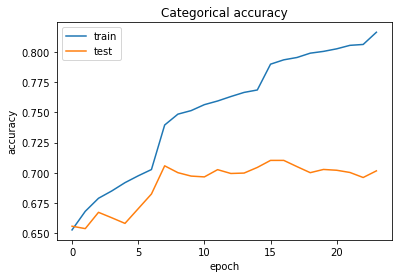

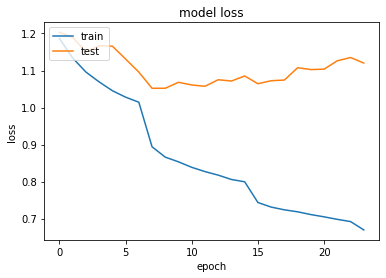

In [ ]:
#9.show results matlabpy
print(results.history)
# summarize history for categorical accuracy
plt.plot(results.history['sparse_categorical_accuracy'])
plt.plot(results.history['val_sparse_categorical_accuracy'])
plt.title('Categorical accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
from keras.models import Model, load_model
model.load_weights('model_transfo.h5')

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.001
    drop = 0.4
    epochs_drop = 8.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=25, verbose=1)
checkpointer = ModelCheckpoint('model_transfo.h5', monitor='val_sparse_categorical_accuracy', verbose=1, mode=min, save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 60, verbose=1, 
callbacks=[earlystopper, checkpointer, lrate ])

Epoch 1/60
Changing learning rate to 0.001
   1/3112 [..............................] - ETA: 8:59 - loss: 0.6066 - sparse_categorical_accuracy: 0.8438

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:680: RuntimeWarning: ModelCheckpoint mode <built-in function min> is unknown, fallback to auto mode.
  RuntimeWarning)


3112/3112 [==============================] - 335s 108ms/step - loss: 0.9560 - sparse_categorical_accuracy: 0.7167 - val_loss: 1.1716 - val_sparse_categorical_accuracy: 0.6683

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.66828, saving model to model_transfo.h5
Epoch 2/60
Changing learning rate to 0.001
3112/3112 [==============================] - 351s 113ms/step - loss: 0.9361 - sparse_categorical_accuracy: 0.7243 - val_loss: 1.1188 - val_sparse_categorical_accuracy: 0.6808

Epoch 00002: val_sparse_categorical_accuracy improved from 0.66828 to 0.68082, saving model to model_transfo.h5
Epoch 3/60
Changing learning rate to 0.001
3112/3112 [==============================] - 338s 109ms/step - loss: 0.9323 - sparse_categorical_accuracy: 0.7256 - val_loss: 1.1196 - val_sparse_categorical_accuracy: 0.6837

Epoch 00003: val_sparse_categorical_accuracy improved from 0.68082 to 0.68366, saving model to model_transfo.h5
Epoch 4/60
Changing learning rate to 0.001
 713/3112 

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:680: RuntimeWarning: ModelCheckpoint mode <built-in function min> is unknown, fallback to auto mode.
  RuntimeWarning)


3112/3112 [==============================] - 335s 108ms/step - loss: 0.9560 - sparse_categorical_accuracy: 0.7167 - val_loss: 1.1716 - val_sparse_categorical_accuracy: 0.6683

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.66828, saving model to model_transfo.h5
Epoch 2/60
Changing learning rate to 0.001
3112/3112 [==============================] - 351s 113ms/step - loss: 0.9361 - sparse_categorical_accuracy: 0.7243 - val_loss: 1.1188 - val_sparse_categorical_accuracy: 0.6808

Epoch 00002: val_sparse_categorical_accuracy improved from 0.66828 to 0.68082, saving model to model_transfo.h5
Epoch 3/60
Changing learning rate to 0.001
3112/3112 [==============================] - 338s 109ms/step - loss: 0.9323 - sparse_categorical_accuracy: 0.7256 - val_loss: 1.1196 - val_sparse_categorical_accuracy: 0.6837

Epoch 00003: val_sparse_categorical_accuracy improved from 0.68082 to 0.68366, saving model to model_transfo.h5
Epoch 4/60
Changing learning rate to 0.001
3112/3112 

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.0001
    drop = 0.4
    epochs_drop = 5.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=10, verbose=1)
checkpointer = ModelCheckpoint('model_transfo.h5', monitor='val_sparse_categorical_accuracy', verbose=1, mode=min, save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 30, verbose=1, 
callbacks=[earlystopper, checkpointer, lrate ])

Epoch 1/30
Changing learning rate to 0.0001
   1/3112 [..............................] - ETA: 6:46 - loss: 0.4843 - sparse_categorical_accuracy: 0.8750

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:680: RuntimeWarning: ModelCheckpoint mode <built-in function min> is unknown, fallback to auto mode.
  RuntimeWarning)


3112/3112 [==============================] - 325s 104ms/step - loss: 0.7097 - sparse_categorical_accuracy: 0.7995 - val_loss: 1.0859 - val_sparse_categorical_accuracy: 0.7067

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.70672, saving model to model_transfo.h5
Epoch 2/30
Changing learning rate to 0.0001
3112/3112 [==============================] - 332s 107ms/step - loss: 0.6660 - sparse_categorical_accuracy: 0.8142 - val_loss: 1.1192 - val_sparse_categorical_accuracy: 0.7037

Epoch 00002: val_sparse_categorical_accuracy did not improve from 0.70672
Epoch 3/30
Changing learning rate to 0.0001
3112/3112 [==============================] - 332s 107ms/step - loss: 0.6504 - sparse_categorical_accuracy: 0.8198 - val_loss: 1.1176 - val_sparse_categorical_accuracy: 0.7035

Epoch 00003: val_sparse_categorical_accuracy did not improve from 0.70672
Epoch 4/30
Changing learning rate to 0.0001
3112/3112 [==============================] - 335s 108ms/step - loss: 0.6401 - spars

KeyboardInterrupt: ignored

***Changing lrate Expirements***




In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.0002
    drop = 0.4
    epochs_drop = 16.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=10, verbose=1)
checkpointer = ModelCheckpoint('model_transfo.h5', monitor='val_sparse_categorical_accuracy', verbose=1, mode=min, save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 30, verbose=1, 
callbacks=[earlystopper, checkpointer, lrate ])

Epoch 1/30
Changing learning rate to 0.0002
   1/3112 [..............................] - ETA: 7:09 - loss: 0.4588 - sparse_categorical_accuracy: 0.8750

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:680: RuntimeWarning: ModelCheckpoint mode <built-in function min> is unknown, fallback to auto mode.
  RuntimeWarning)


3112/3112 [==============================] - 331s 106ms/step - loss: 0.6353 - sparse_categorical_accuracy: 0.8242 - val_loss: 1.1593 - val_sparse_categorical_accuracy: 0.7017

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.70170, saving model to model_transfo.h5
Epoch 2/30
Changing learning rate to 0.0002
3112/3112 [==============================] - 335s 108ms/step - loss: 0.6268 - sparse_categorical_accuracy: 0.8280 - val_loss: 1.1796 - val_sparse_categorical_accuracy: 0.7035

Epoch 00002: val_sparse_categorical_accuracy improved from 0.70170 to 0.70354, saving model to model_transfo.h5
Epoch 3/30
Changing learning rate to 0.0002
3112/3112 [==============================] - 332s 107ms/step - loss: 0.6216 - sparse_categorical_accuracy: 0.8287 - val_loss: 1.2112 - val_sparse_categorical_accuracy: 0.6997

Epoch 00003: val_sparse_categorical_accuracy did not improve from 0.70354
Epoch 4/30
Changing learning rate to 0.0002
3112/3112 [==============================] - 

KeyboardInterrupt: ignored

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.0001
    drop = 0.4
    epochs_drop = 16.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=10, verbose=1)
checkpointer = ModelCheckpoint('model_transfo.h5', monitor='val_sparse_categorical_accuracy', verbose=1, mode=min, save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 30, verbose=1, 
callbacks=[earlystopper, checkpointer, lrate ])

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:680: RuntimeWarning: ModelCheckpoint mode <built-in function min> is unknown, fallback to auto mode.
  RuntimeWarning)


Epoch 1/30
Changing learning rate to 0.0001
3112/3112 [==============================] - 325s 105ms/step - loss: 0.5771 - sparse_categorical_accuracy: 0.8461 - val_loss: 1.2498 - val_sparse_categorical_accuracy: 0.7005

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.70053, saving model to model_transfo.h5
Epoch 2/30
Changing learning rate to 0.0001
3112/3112 [==============================] - 336s 108ms/step - loss: 0.5698 - sparse_categorical_accuracy: 0.8487 - val_loss: 1.2731 - val_sparse_categorical_accuracy: 0.6997

Epoch 00002: val_sparse_categorical_accuracy did not improve from 0.70053
Epoch 3/30
Changing learning rate to 0.0001
3112/3112 [==============================] - 342s 110ms/step - loss: 0.5710 - sparse_categorical_accuracy: 0.8494 - val_loss: 1.2936 - val_sparse_categorical_accuracy: 0.6912

Epoch 00003: val_sparse_categorical_accuracy did not improve from 0.70053
Epoch 4/30
Changing learning rate to 0.0001
 594/3112 [====>.......................

KeyboardInterrupt: ignored

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.00005
    drop = 0.4
    epochs_drop = 16.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=10, verbose=1)
checkpointer = ModelCheckpoint('model_transfo.h5', monitor='val_sparse_categorical_accuracy', verbose=1, mode=min, save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 30, verbose=1, 
callbacks=[earlystopper, checkpointer, lrate ])

Epoch 1/30
Changing learning rate to 5e-05
   1/3112 [..............................] - ETA: 5:01 - loss: 0.5822 - sparse_categorical_accuracy: 0.8438

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:680: RuntimeWarning: ModelCheckpoint mode <built-in function min> is unknown, fallback to auto mode.
  RuntimeWarning)


3112/3112 [==============================] - 327s 105ms/step - loss: 0.5516 - sparse_categorical_accuracy: 0.8547 - val_loss: 1.2794 - val_sparse_categorical_accuracy: 0.7004

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.70037, saving model to model_transfo.h5
Epoch 2/30
Changing learning rate to 5e-05
2225/3112 [====================>.........] - ETA: 1:29 - loss: 0.5535 - sparse_categorical_accuracy: 0.8551

KeyboardInterrupt: ignored

# EXP2

Transformer expirement 2 with changes of dense layer and number of head with no improvement in the validation accuracy




In [ ]:

from keras.models import Model, load_model
from keras.layers import Input, Activation, Concatenate, Permute, Reshape, Flatten, Lambda, Dot, Softmax
from keras.layers import Add, Dropout, BatchNormalization, Conv2D, Reshape, MaxPooling2D, Dense, LSTM, Bidirectional
from keras import backend as K
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from keras import backend as K
from keras import optimizers
from kapre.time_frequency import Melspectrogram, Spectrogram
import keras
# Importing the important libraries
from keras.applications.resnet50 import ResNet50
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from kapre.utils import Normalization2D
nCategories=36
samplingrate = 16000
inputLength = 16000
"""
Base fully convolutional model for speech recognition
"""
"""
        transformer_depth = 8
        block = TransformerBlock('Transformer', num_heads=8)
        act_layer = TransformerACT()
        next_input = input  # (batch_size, sequence_length, input_size)
        for i in range(transformer_depth):
            next_input = block(next_input, step=i)
            next_input, act_weighted_output = act_layer(next_input)
        act_layer.finalize()  # adds loss
        result = act_weighted_output
"""
inputs = Input((inputLength,))

x = Reshape((1, -1)) (inputs)

x = Melspectrogram(n_dft=1024, n_hop=128, input_shape=(1, inputLength),
                          padding='same', sr=samplingrate, n_mels=80,
                          fmin=40.0, fmax=samplingrate/2, power_melgram=1.0,
                          return_decibel_melgram=True, trainable_fb=False,
                          trainable_kernel=False,
                          name='mel_stft') (x)

x = Normalization2D(int_axis=0)(x)
x = Permute((2,1,3)) (x) #this is strange - but now we have (batch_size, sequence, vec_dim)
zee = Lambda(lambda q: K.squeeze(q, -1), name='squeeze_last_dim') (x) #keras.backend.squeeze(x, axis)


transformer_depth = 4
block = TransformerBlock('Transformer', num_heads=2)
act_layer = TransformerACT()
print((zee.shape))
next_input = zee  # (batch_size, sequence_length, input_size)
for i in range(transformer_depth):
    next_input = block(next_input,)  # adds loss
    next_input, act_weighted_output = act_layer(next_input)
act_layer.finalize()  # adds loss
result = act_weighted_output
x = result
x = Lambda(lambda q: q[:,64]) (x) 
x= Dense(128)(x)
print((x.shape))
output = Dense(nCategories, activation = 'softmax')(x)

model = Model(inputs=[inputs], outputs=[output])

model.compile(optimizer='adam', loss=['sparse_categorical_crossentropy'], metrics=['sparse_categorical_accuracy'])





(?, ?, 80)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
(?, 128)



In [ ]:
model.save('model_transformer.h5')

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.001
    drop = 0.4
    epochs_drop = 10.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=15, verbose=1)
checkpointer = ModelCheckpoint('model_transformer.h5', monitor='val_sparse_categorical_accuracy', verbose=1, mode=min, save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 48, verbose=1, use_multiprocessing=True, workers=64,
callbacks=[earlystopper, checkpointer, lrate ])

Epoch 1/48


/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:680: RuntimeWarning: ModelCheckpoint mode <built-in function min> is unknown, fallback to auto mode.
  RuntimeWarning)


Changing learning rate to 0.001
3112/3112 [==============================] - 3726s 1s/step - loss: 1.8511 - sparse_categorical_accuracy: 0.4795 - val_loss: 1.4815 - val_sparse_categorical_accuracy: 0.5899

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.58991, saving model to model_transformer.h5
Changing learning rate to 0.001
Epoch 2/48
Changing learning rate to 0.001
3112/3112 [==============================] - 341s 110ms/step - loss: 1.4318 - sparse_categorical_accuracy: 0.5946 - val_loss: 1.4351 - val_sparse_categorical_accuracy: 0.5944

Epoch 00002: val_sparse_categorical_accuracy improved from 0.58991 to 0.59442, saving model to model_transformer.h5


OSError: ignored

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.0001
    drop = 0.2
    epochs_drop = 22.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=15, verbose=1)
checkpointer = ModelCheckpoint('model_transformer.h5', monitor='val_sparse_categorical_accuracy', verbose=1, mode=min, save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 65, verbose=1, 
callbacks=[earlystopper, checkpointer, lrate ])

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:680: RuntimeWarning: ModelCheckpoint mode <built-in function min> is unknown, fallback to auto mode.
  RuntimeWarning)


Epoch 1/65
Changing learning rate to 0.0001
3112/3112 [==============================] - 351s 113ms/step - loss: 1.1730 - sparse_categorical_accuracy: 0.6690 - val_loss: 1.2143 - val_sparse_categorical_accuracy: 0.6571

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.65709, saving model to model_transformer.h5
Epoch 2/65
Changing learning rate to 0.0001
3112/3112 [==============================] - 355s 114ms/step - loss: 1.1262 - sparse_categorical_accuracy: 0.6828 - val_loss: 1.1980 - val_sparse_categorical_accuracy: 0.6669

Epoch 00002: val_sparse_categorical_accuracy improved from 0.65709 to 0.66695, saving model to model_transformer.h5
Epoch 3/65
Changing learning rate to 0.0001
3112/3112 [==============================] - 356s 115ms/step - loss: 1.1001 - sparse_categorical_accuracy: 0.6906 - val_loss: 1.1854 - val_sparse_categorical_accuracy: 0.6690

Epoch 00003: val_sparse_categorical_accuracy improved from 0.66695 to 0.66895, saving model to model_transforme

{'val_loss': [1.214279113925077, 1.1979839879879977, 1.185402388719314, 1.1779070706928478, 1.167415138234429, 1.1566265332188836, 1.14622897642819, 1.1481758276409006, 1.1461331743926289, 1.1467753592978187, 1.1386372265331248, 1.1404960894967144, 1.1397540126254853, 1.1402884619758729, 1.1391758993666439, 1.134890805272495, 1.1414053416188388, 1.1597520602259406, 1.14756856229216, 1.1550530678129451, 1.1509096281413727, 1.1493363984447111, 1.1596509796731613, 1.1657124592021186, 1.1575310045385105, 1.1531724042114726, 1.1752447010999056, 1.1714867302440704, 1.1856620005745302, 1.182795668668288, 1.1720229913206661, 1.1911179115746748, 1.1899616128620616, 1.1985136885694003, 1.1901310661578561], 'val_sparse_categorical_accuracy': [0.6570855614973262, 0.6669451871657754, 0.6689505347593583, 0.6734625668449198, 0.6751336898395722, 0.679144385026738, 0.6809826203208557, 0.679144385026738, 0.6813168449197861, 0.6876671122994652, 0.6841577540106952, 0.6838235294117647, 0.6864973262032086, 

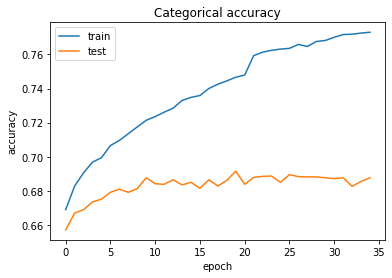

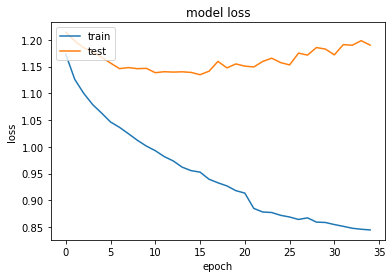

In [ ]:
#9.show results matlabpy
print(results.history)
# summarize history for categorical accuracy
plt.plot(results.history['sparse_categorical_accuracy'])
plt.plot(results.history['val_sparse_categorical_accuracy'])
plt.title('Categorical accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.001
    drop = 0.2
    epochs_drop = 10.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=11, verbose=1)
checkpointer = ModelCheckpoint('model_transformer.h5', monitor='val_sparse_categorical_accuracy', verbose=1, mode=min, save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 65, verbose=1, 
callbacks=[earlystopper, checkpointer, lrate ])

# EXP 3

Transformer Expirement 3 with changes to include ACT in transformer and added flatten instead of 1D array conversion with Max validation accuracy of 92.731 % the Accuracy increased in Expriment 8 with better implementation of model.

In [ ]:

from keras.models import Model, load_model
from keras.layers import Input, Activation, Concatenate, Permute, Reshape, Flatten, Lambda, Dot, Softmax
from keras.layers import Add, Dropout, BatchNormalization, Conv2D, Reshape, MaxPooling2D, Dense, LSTM, Bidirectional
from keras import backend as K
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from keras import backend as K
from keras import optimizers
from kapre.time_frequency import Melspectrogram, Spectrogram
import keras
# Importing the important libraries
from keras.applications.resnet50 import ResNet50
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from kapre.utils import Normalization2D
nCategories=36
samplingrate = 16000
inputLength = 16000
"""
Base fully convolutional model for speech recognition
"""
"""
        transformer_depth = 8
        block = TransformerBlock('Transformer', num_heads=8)
        act_layer = TransformerACT()
        next_input = input  # (batch_size, sequence_length, input_size)
        for i in range(transformer_depth):
            next_input = block(next_input, step=i)
            next_input, act_weighted_output = act_layer(next_input)
        act_layer.finalize()  # adds loss
        result = act_weighted_output
"""
inputs = Input((inputLength,))

x = Reshape((1, -1)) (inputs)

x = Melspectrogram(n_dft=1024, n_hop=128, input_shape=(1, inputLength),
                          padding='same', sr=samplingrate, n_mels=80,
                          fmin=40.0, fmax=samplingrate/2, power_melgram=1.0,
                          return_decibel_melgram=True, trainable_fb=False,
                          trainable_kernel=False,
                          name='mel_stft') (x)

x = Normalization2D(int_axis=0)(x)
x = Permute((2,1,3)) (x) #this is strange - but now we have (batch_size, sequence, vec_dim)
zee = Lambda(lambda q: K.squeeze(q, -1), name='squeeze_last_dim') (x) #keras.backend.squeeze(x, axis)


transformer_depth = 4
block = TransformerBlock('Transformer', num_heads=2)
act_layer = TransformerACT()
print((zee.shape))
next_input = zee  # (batch_size, sequence_length, input_size)
for i in range(transformer_depth):
    next_input = block(next_input,)  # adds loss
    print((next_input.shape))
    next_input, act_weighted_output = act_layer(next_input)
act_layer.finalize()  # adds loss
result = act_weighted_output
x = result
print((x.shape))
#x = Lambda(lambda q: q[:,64]) (x) 
x= Flatten()(x)
x= Dense(128)(x)
print((x.shape))
output = Dense(nCategories, activation = 'softmax')(x)

model = Model(inputs=[inputs], outputs=[output])

model.compile(optimizer='adam', loss=['sparse_categorical_crossentropy'], metrics=['sparse_categorical_accuracy'])





(?, ?, 80)

(?, 125, 80)
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
(?, 125, 80)
(?, 125, 80)
(?, 125, 80)
(?, 125, 80)
(?, 128)



In [ ]:
model.save('model_transformer1.h5')

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.001
    drop = 0.4
    epochs_drop = 10.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=12, verbose=1)
checkpointer = ModelCheckpoint('model_transformer1.h5', monitor='val_sparse_categorical_accuracy', verbose=1, mode=min, save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 50, verbose=1, use_multiprocessing=True, workers=64,
callbacks=[earlystopper, checkpointer, lrate ])

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:680: RuntimeWarning: ModelCheckpoint mode <built-in function min> is unknown, fallback to auto mode.
  RuntimeWarning)




Epoch 1/50
Changing learning rate to 0.001
3112/3112 [==============================] - 3615s 1s/step - loss: 1.3319 - sparse_categorical_accuracy: 0.6479 - val_loss: 0.7412 - val_sparse_categorical_accuracy: 0.8055

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.80548, saving model to model_transformer1.h5
Epoch 2/50
Changing learning rate to 0.001
3112/3112 [==============================] - 350s 112ms/step - loss: 0.6234 - sparse_categorical_accuracy: 0.8364 - val_loss: 0.6149 - val_sparse_categorical_accuracy: 0.8407

Epoch 00002: val_sparse_categorical_accuracy improved from 0.80548 to 0.84074, saving model to model_transformer1.h5
Epoch 2/50

OSError: ignored

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.001
    drop = 0.4
    epochs_drop = 12.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=14, verbose=1)
checkpointer = ModelCheckpoint('model_transformer1.h5', monitor='val_sparse_categorical_accuracy', verbose=1, mode=min, save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 55, verbose=1, 
callbacks=[earlystopper, checkpointer, lrate ])

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:680: RuntimeWarning: ModelCheckpoint mode <built-in function min> is unknown, fallback to auto mode.
  RuntimeWarning)


Epoch 1/55
Changing learning rate to 0.001
3112/3112 [==============================] - 383s 123ms/step - loss: 0.5149 - sparse_categorical_accuracy: 0.8676 - val_loss: 0.6196 - val_sparse_categorical_accuracy: 0.8620

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.86197, saving model to model_transformer1.h5
Epoch 2/55
Changing learning rate to 0.001
3112/3112 [==============================] - 388s 125ms/step - loss: 0.4628 - sparse_categorical_accuracy: 0.8827 - val_loss: 0.5135 - val_sparse_categorical_accuracy: 0.8747

Epoch 00002: val_sparse_categorical_accuracy improved from 0.86197 to 0.87467, saving model to model_transformer1.h5
Epoch 3/55
Changing learning rate to 0.001
3112/3112 [==============================] - 390s 125ms/step - loss: 0.4198 - sparse_categorical_accuracy: 0.8945 - val_loss: 0.4899 - val_sparse_categorical_accuracy: 0.8770

Epoch 00003: val_sparse_categorical_accuracy improved from 0.87467 to 0.87701, saving model to model_transformer

{'val_loss': [0.6195595679595509, 0.5135183562250698, 0.48985203845615694, 0.46748928406978035, 0.4361549604305609, 0.4831357973622766, 0.4423017291860147, 0.40640156453146653, 0.4181235650962687, 0.4144112789495425, 0.4295017763294957, 0.34255220509946027, 0.35263893488336373, 0.3370491135168203, 0.36640835174902237, 0.3655179891197439, 0.360393021574473, 0.37367221643341414, 0.35492210709713995, 0.3700218723419516, 0.3810250593578433, 0.3715040490907781, 0.3835755489607227, 0.37660944310420336, 0.3816535833047673, 0.3814766523751983, 0.3867532329205523, 0.42521744665694744, 0.38727582901477176, 0.3733608607541431, 0.38128137202027007, 0.3943934043580517, 0.39512510982187676, 0.40121628118947866, 0.3850970928841096, 0.39658548427934953, 0.3960581559707774, 0.4262190262742221, 0.405851010950332, 0.4053107129539398, 0.41337487093586334, 0.3973325245122221, 0.3989948525945133, 0.4139683100788351, 0.40640361736563435, 0.40476217373886847, 0.42844633762052353, 0.40744150416019126, 0.415812

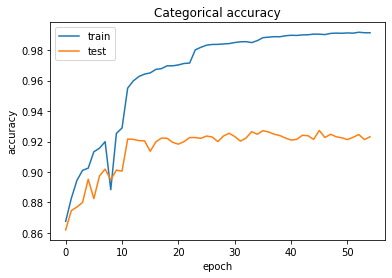

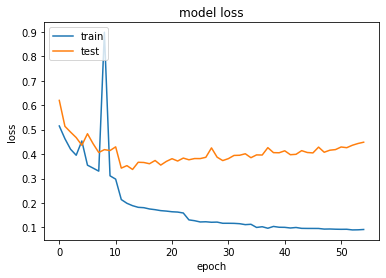

In [ ]:
#9.show results matlabpy
print(results.history)
# summarize history for categorical accuracy
plt.plot(results.history['sparse_categorical_accuracy'])
plt.plot(results.history['val_sparse_categorical_accuracy'])
plt.title('Categorical accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
au, cl = test1.__getitem__(1)

In [ ]:
#10.load best model according to cross-validation - model-attRNN
from kapre.time_frequency import Melspectrogram, Spectrogram
from kapre.utils import Normalization2D
model = load_model('model_transformer1.h5')

ValueError: ignored

In [ ]:
valEval = model.evaluate_generator(valGen, verbose=1,use_multiprocessing=True, workers=32)
trainEval = model.evaluate_generator(trainGen, verbose=1, use_multiprocessing=True, workers=32)
testEval = model.evaluate(au, cl, verbose=1)
print('Evaluation scores: \nMetrics: {} \nTrain: {} \nValidation: {} \nTest: {}'.format(model.metrics_names, trainEval, valEval, testEval) )

3000/3000 [==============================] - 2s 756us/step
Evaluation scores: 
Metrics: ['loss', 'sparse_categorical_accuracy'] 
Train: [0.10868776397382156, 0.9904803984575835] 
Validation: [0.43727584021853255, 0.9212901069518716] 
Test: [0.443146444439888, 0.9223333334922791]


In [ ]:
y_pred = model.predict(au, verbose=1)

3000/3000 [==============================] - 2s 744us/step


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(cl, np.argmax(y_pred,1))
print(set(cl))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35}


In [ ]:
#15. setting classes for Confusion matrix

#LRcmd
classes=[ 'yes', 'no' , 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go',
                         'zero' , 'one' , 'two' , 'three' , 'four' , 'five' , 'six' , 
                         'seven' ,  'eight' , 'nine' , 'backward', 'bed', 'bird', 'cat', 'dog',
                         'follow', 'forward', 'happy', 'house', 'learn', 'marvin', 'sheila', 'tree',
                         'visual', 'wow']

Normalized confusion matrix


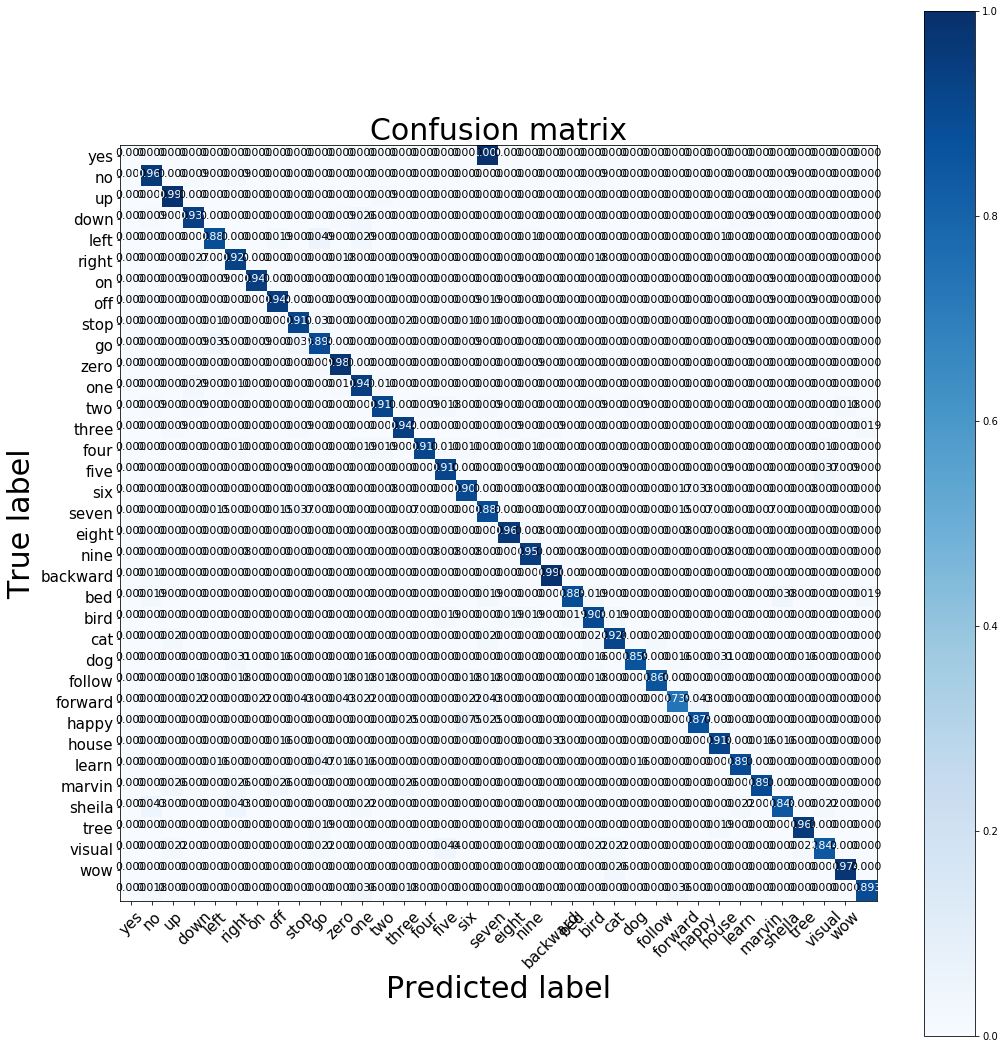

In [ ]:
#16. plot confusion matrix
import matr
matr.plot_confusion_matrix(cm,classes, normalize=True)

Next epoches

In [ ]:
#10.load best model according to cross-validation - model-attRNN
from kapre.time_frequency import Melspectrogram, Spectrogram
from kapre.utils import Normalization2D
model = load_model('model_transformer1.h5', custom_objects={'Melspectrogram': Melspectrogram, 'Normalization2D': Normalization2D })

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.001
    drop = 0.4
    epochs_drop = 6.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=9, verbose=1)
checkpointer = ModelCheckpoint('model_transformer1.h5', monitor='val_sparse_categorical_accuracy', verbose=1, mode=min, save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 49, verbose=1, use_multiprocessing=True, workers=64,
callbacks=[earlystopper, checkpointer, lrate ])

Epoch 1/49
Changing learning rate to 0.001


/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:680: RuntimeWarning: ModelCheckpoint mode <built-in function min> is unknown, fallback to auto mode.
  RuntimeWarning)


3112/3112 [==============================] - 3572s 1s/step - loss: 0.2255 - sparse_categorical_accuracy: 0.9354 - val_loss: 0.3621 - val_sparse_categorical_accuracy: 0.8992

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.89923, saving model to model_transformer1.h5
Epoch 2/49
Changing learning rate to 0.001
3112/3112 [==============================] - 382s 123ms/step - loss: 0.2218 - sparse_categorical_accuracy: 0.9422 - val_loss: 0.4511 - val_sparse_categorical_accuracy: 0.9001

Epoch 00002: val_sparse_categorical_accuracy improved from 0.89923 to 0.90007, saving model to model_transformer1.h5



OSError: ignored

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.001
    drop = 0.4
    epochs_drop = 7.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=15, verbose=1)
checkpointer = ModelCheckpoint('model_transformer1.h5', monitor='val_sparse_categorical_accuracy', verbose=1, mode=min, save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 65, verbose=1,
callbacks=[earlystopper, checkpointer, lrate ])

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:680: RuntimeWarning: ModelCheckpoint mode <built-in function min> is unknown, fallback to auto mode.
  RuntimeWarning)


Epoch 1/65
Changing learning rate to 0.001
3112/3112 [==============================] - 352s 113ms/step - loss: 0.1945 - sparse_categorical_accuracy: 0.9436 - val_loss: 0.3610 - val_sparse_categorical_accuracy: 0.9037

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.90374, saving model to model_transformer1.h5
Epoch 2/65
Changing learning rate to 0.001
3112/3112 [==============================] - 353s 113ms/step - loss: 0.1894 - sparse_categorical_accuracy: 0.9460 - val_loss: 0.3584 - val_sparse_categorical_accuracy: 0.9046

Epoch 00002: val_sparse_categorical_accuracy improved from 0.90374 to 0.90458, saving model to model_transformer1.h5
Epoch 3/65
Changing learning rate to 0.001
3112/3112 [==============================] - 358s 115ms/step - loss: 0.1873 - sparse_categorical_accuracy: 0.9467 - val_loss: 0.3719 - val_sparse_categorical_accuracy: 0.9012

Epoch 00003: val_sparse_categorical_accuracy did not improve from 0.90458
Epoch 4/65
Changing learning rate to 0

In [ ]:
au, cl = test1.__getitem__(1)

{'val_loss': [0.3609686885377701, 0.3583945519325727, 0.3719355411538705, 0.3657068393546789, 0.33870483875115287, 0.35291813757957863, 0.30317368613117757, 0.31592109476659386, 0.32962788258247167, 0.323080564898882, 0.32073631071869063, 0.35359241883021425, 0.36232071414833916, 0.3282512166900909, 0.3246905902104283, 0.33401069525233346, 0.3426269047313375, 0.33534522960553903, 0.3355891712403353, 0.34540602033332185, 0.33862199258796355, 0.33729014837775717, 0.35842798177630986, 0.33550410518963714, 0.359907422669202, 0.3401954198031397, 0.35533054101649414, 0.33913025626088467, 0.35825255199103306], 'val_sparse_categorical_accuracy': [0.9037433155080213, 0.9045788770053476, 0.9012366310160428, 0.9077540106951871, 0.9099264705882353, 0.9079211229946524, 0.9231283422459893, 0.9244652406417112, 0.922292780748663, 0.9181149732620321, 0.919451871657754, 0.9217914438502673, 0.9226270053475936, 0.9306483957219251, 0.9281417112299465, 0.9288101604278075, 0.9268048128342246, 0.9263034759358

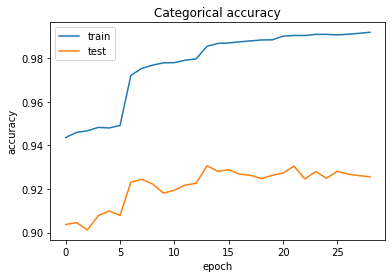

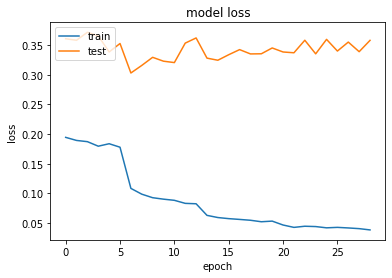

In [ ]:
#9.show results matlabpy
print(results.history)
# summarize history for categorical accuracy
plt.plot(results.history['sparse_categorical_accuracy'])
plt.plot(results.history['val_sparse_categorical_accuracy'])
plt.title('Categorical accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.0004
    drop = 0.4
    epochs_drop = 15.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=15, verbose=1)
checkpointer = ModelCheckpoint('model_transformer1.h5', monitor='val_sparse_categorical_accuracy', verbose=1, mode=min, save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 39, verbose=1,
callbacks=[earlystopper, checkpointer, lrate ])

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:680: RuntimeWarning: ModelCheckpoint mode <built-in function min> is unknown, fallback to auto mode.
  RuntimeWarning)


Epoch 1/39
Changing learning rate to 0.0004
3112/3112 [==============================] - 365s 117ms/step - loss: 0.0746 - sparse_categorical_accuracy: 0.9811 - val_loss: 0.3542 - val_sparse_categorical_accuracy: 0.9154

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.91544, saving model to model_transformer1.h5
Epoch 2/39
Changing learning rate to 0.0004
3112/3112 [==============================] - 364s 117ms/step - loss: 0.0741 - sparse_categorical_accuracy: 0.9816 - val_loss: 0.3607 - val_sparse_categorical_accuracy: 0.9228

Epoch 00002: val_sparse_categorical_accuracy improved from 0.91544 to 0.92279, saving model to model_transformer1.h5
Epoch 3/39
Changing learning rate to 0.0004
3112/3112 [==============================] - 361s 116ms/step - loss: 0.0760 - sparse_categorical_accuracy: 0.9816 - val_loss: 0.3510 - val_sparse_categorical_accuracy: 0.9238

Epoch 00003: val_sparse_categorical_accuracy improved from 0.92279 to 0.92380, saving model to model_transfor

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.00016
    drop = 0.4
    epochs_drop = 17.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=17, verbose=1)
checkpointer = ModelCheckpoint('model_transformer1.h5', monitor='val_sparse_categorical_accuracy', verbose=1, mode=min, save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 39, verbose=1,
callbacks=[earlystopper, checkpointer, lrate ])

Epoch 1/39
Changing learning rate to 0.00016
   1/3112 [..............................] - ETA: 9:38 - loss: 6.1429e-04 - sparse_categorical_accuracy: 1.0000

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:680: RuntimeWarning: ModelCheckpoint mode <built-in function min> is unknown, fallback to auto mode.
  RuntimeWarning)


3112/3112 [==============================] - 364s 117ms/step - loss: 0.0415 - sparse_categorical_accuracy: 0.9907 - val_loss: 0.3422 - val_sparse_categorical_accuracy: 0.9271

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.92714, saving model to model_transformer1.h5
Epoch 2/39
Changing learning rate to 0.00016
3112/3112 [==============================] - 373s 120ms/step - loss: 0.0425 - sparse_categorical_accuracy: 0.9910 - val_loss: 0.3446 - val_sparse_categorical_accuracy: 0.9246

Epoch 00002: val_sparse_categorical_accuracy did not improve from 0.92714
Epoch 3/39
Changing learning rate to 0.00016
3112/3112 [==============================] - 379s 122ms/step - loss: 0.0392 - sparse_categorical_accuracy: 0.9912 - val_loss: 0.3919 - val_sparse_categorical_accuracy: 0.9238

Epoch 00003: val_sparse_categorical_accuracy did not improve from 0.92714
Epoch 4/39
Changing learning rate to 0.00016
3112/3112 [==============================] - 382s 123ms/step - loss: 0.0395

In [ ]:
#9.show results matlabpy
print(results.history)
# summarize history for categorical accuracy
plt.plot(results.history['sparse_categorical_accuracy'])
plt.plot(results.history['val_sparse_categorical_accuracy'])
plt.title('Categorical accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# EXP 4

In [ ]:

from keras.models import Model, load_model
from keras.layers import Input, Activation, Concatenate, Permute, Reshape, Flatten, Lambda, Dot, Softmax
from keras.layers import Add, Dropout, BatchNormalization, Conv2D, Reshape, MaxPooling2D, Dense, LSTM, Bidirectional
from keras import backend as K
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from keras import backend as K
from keras import optimizers
from kapre.time_frequency import Melspectrogram, Spectrogram
import keras
# Importing the important libraries
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from kapre.utils import Normalization2D
nCategories=36
samplingrate = 16000
inputLength = 16000
"""
Base fully convolutional model for speech recognition
"""
"""
        transformer_depth = 8
        block = TransformerBlock('Transformer', num_heads=8)
        act_layer = TransformerACT()
        next_input = input  # (batch_size, sequence_length, input_size)
        for i in range(transformer_depth):
            next_input = block(next_input, step=i)
            next_input, act_weighted_output = act_layer(next_input)
        act_layer.finalize()  # adds loss
        result = act_weighted_output
"""
inputs = Input((inputLength,))

x = Reshape((1, -1)) (inputs)

x = Melspectrogram(n_dft=1024, n_hop=128, input_shape=(1, inputLength),
                          padding='same', sr=samplingrate, n_mels=80,
                          fmin=40.0, fmax=samplingrate/2, power_melgram=1.0,
                          return_decibel_melgram=True, trainable_fb=False,
                          trainable_kernel=False,
                          name='mel_stft') (x)

x = Normalization2D(int_axis=0)(x)
x = Permute((2,1,3)) (x) #this is strange - but now we have (batch_size, sequence, vec_dim)
print((x.shape))
zee = Lambda(lambda q: K.squeeze(q, -1), name='squeeze_last_dim') (x) #keras.backend.squeeze(x, axis)


transformer_depth = 6
block = TransformerBlock('Transformer', num_heads=4)
act_layer = TransformerACT()
print((zee.shape))
next_input = zee  # (batch_size, sequence_length, input_size)
for i in range(transformer_depth):
    next_input = block(next_input,)  # adds loss
    print((next_input.shape))
    next_input, act_weighted_output = act_layer(next_input)
act_layer.finalize()  # adds loss
result = act_weighted_output
x = result
print((x.shape))
#x = Lambda(lambda q: q[:,64]) (x) 
x= Flatten()(x)
print((x.shape))
output = Dense(nCategories, activation = 'softmax')(x)

model = Model(inputs=[inputs], outputs=[output])

model.compile(optimizer='adam', loss=['sparse_categorical_crossentropy'], metrics=['sparse_categorical_accuracy'])


(?, ?, 80, 1)
(?, ?, 80)
(?, 125, 80)
(?, 125, 80)
(?, 125, 80)
(?, 125, 80)
(?, 125, 80)
(?, 125, 80)
(?, 125, 80)
(?, ?)


In [ ]:
model.save('model_transformer2.h5')

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.001
    drop = 0.4
    epochs_drop = 10.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=12, verbose=1)
checkpointer = ModelCheckpoint('model_transformer2.h5', monitor='val_sparse_categorical_accuracy', verbose=1, mode=min, save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 50, verbose=1, use_multiprocessing=True, workers=64,
callbacks=[earlystopper, checkpointer, lrate ])

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:680: RuntimeWarning: ModelCheckpoint mode <built-in function min> is unknown, fallback to auto mode.
  RuntimeWarning)




Epoch 1/50
Changing learning rate to 0.001
3112/3112 [==============================] - 3695s 1s/step - loss: 1.2470 - sparse_categorical_accuracy: 0.6705 - val_loss: 0.8276 - val_sparse_categorical_accuracy: 0.7833

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.78326, saving model to model_transformer2.h5
Epoch 2/50
Changing learning rate to 0.001
3112/3112 [==============================] - 347s 111ms/step - loss: 0.6753 - sparse_categorical_accuracy: 0.8293 - val_loss: 0.6663 - val_sparse_categorical_accuracy: 0.8354

Epoch 00002: val_sparse_categorical_accuracy improved from 0.78326 to 0.83539, saving model to model_transformer2.h5


OSError: ignored

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.001
    drop = 0.4
    epochs_drop = 10.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=15, verbose=1)
checkpointer = ModelCheckpoint('model_transformer2.h5', monitor='val_sparse_categorical_accuracy', verbose=1, mode=min, save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 55, verbose=1,
callbacks=[earlystopper, checkpointer, lrate ])

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:680: RuntimeWarning: ModelCheckpoint mode <built-in function min> is unknown, fallback to auto mode.
  RuntimeWarning)


Epoch 1/55
Changing learning rate to 0.001
3112/3112 [==============================] - 357s 115ms/step - loss: 0.5352 - sparse_categorical_accuracy: 0.8680 - val_loss: 0.5540 - val_sparse_categorical_accuracy: 0.8658

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.86581, saving model to model_transformer2.h5
Epoch 2/55
Changing learning rate to 0.001
3112/3112 [==============================] - 360s 116ms/step - loss: 0.4652 - sparse_categorical_accuracy: 0.8881 - val_loss: 0.5226 - val_sparse_categorical_accuracy: 0.8743

Epoch 00002: val_sparse_categorical_accuracy improved from 0.86581 to 0.87433, saving model to model_transformer2.h5
Epoch 3/55
Changing learning rate to 0.001
3112/3112 [==============================] - 362s 116ms/step - loss: 0.4210 - sparse_categorical_accuracy: 0.9007 - val_loss: 0.5131 - val_sparse_categorical_accuracy: 0.8732

Epoch 00003: val_sparse_categorical_accuracy did not improve from 0.87433
Epoch 4/55
Changing learning rate to 0

{'val_loss': [0.5540261255866066, 0.5225733703470485, 0.5131215288996059, 0.4709639195452399, 0.48046476166834806, 0.4271299950579271, 0.42949971429166944, 0.44442246870242336, 0.43373087813509975, 0.3698507883650734, 0.37633415271732257, 0.37983850728381763, 0.400403845158809, 0.38163184510035947, 0.37431679104260585, 0.39184857227585534, 0.39116730915511994, 0.37369819523338327, 0.39801986898011704, 0.37369646586198857, 0.39566320834312846, 0.37581028490461765, 0.3588004447320566, 0.37683784642959023, 0.38705427737478265, 0.369226010964516, 0.37988062402143835, 0.4141302162552262, 0.40481624457447285, 0.36776655203199643, 0.3796163907344329, 0.389020638032393, 0.3852358502659568, 0.38931897059481413, 0.3954464443386557], 'val_sparse_categorical_accuracy': [0.8658088235294118, 0.8743315508021391, 0.8731617647058824, 0.8878676470588235, 0.8952205882352942, 0.8970588235294118, 0.9005681818181818, 0.9012366310160428, 0.9005681818181818, 0.9234625668449198, 0.920120320855615, 0.9179478609

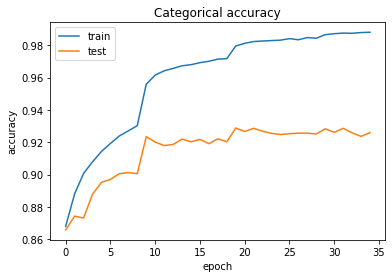

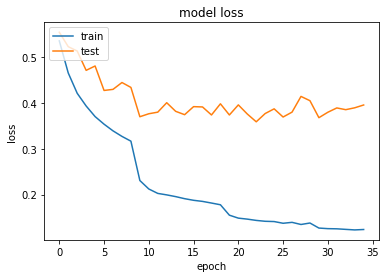

In [ ]:
#9.show results matlabpy
print(results.history)
# summarize history for categorical accuracy
plt.plot(results.history['sparse_categorical_accuracy'])
plt.plot(results.history['val_sparse_categorical_accuracy'])
plt.title('Categorical accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
au, cl = test1.__getitem__(1)

In [ ]:
valEval = model.evaluate_generator(valGen, verbose=1,use_multiprocessing=True, workers=32)
trainEval = model.evaluate_generator(trainGen, verbose=1, use_multiprocessing=True, workers=32)
testEval = model.evaluate(au, cl, verbose=1)
print('Evaluation scores: \nMetrics: {} \nTrain: {} \nValidation: {} \nTest: {}'.format(model.metrics_names, trainEval, valEval, testEval) )

3000/3000 [==============================] - 2s 797us/step
Evaluation scores: 
Metrics: ['loss', 'sparse_categorical_accuracy'] 
Train: [0.11982610926108679, 0.9885825032133676] 
Validation: [0.3852056199535329, 0.9263034759358288] 
Test: [0.4147226637999217, 0.9196666668256124]


In [ ]:
y_pred = model.predict(au, verbose=1)

3000/3000 [==============================] - 3s 913us/step


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(cl, np.argmax(y_pred,1))
print(set(cl))

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35}


In [ ]:
#15. setting classes for Confusion matrix

#LRcmd
classes=[ 'yes', 'no' , 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go',
                         'zero' , 'one' , 'two' , 'three' , 'four' , 'five' , 'six' , 
                         'seven' ,  'eight' , 'nine' , 'backward', 'bed', 'bird', 'cat', 'dog',
                         'follow', 'forward', 'happy', 'house', 'learn', 'marvin', 'sheila', 'tree',
                         'visual', 'wow']

Normalized confusion matrix


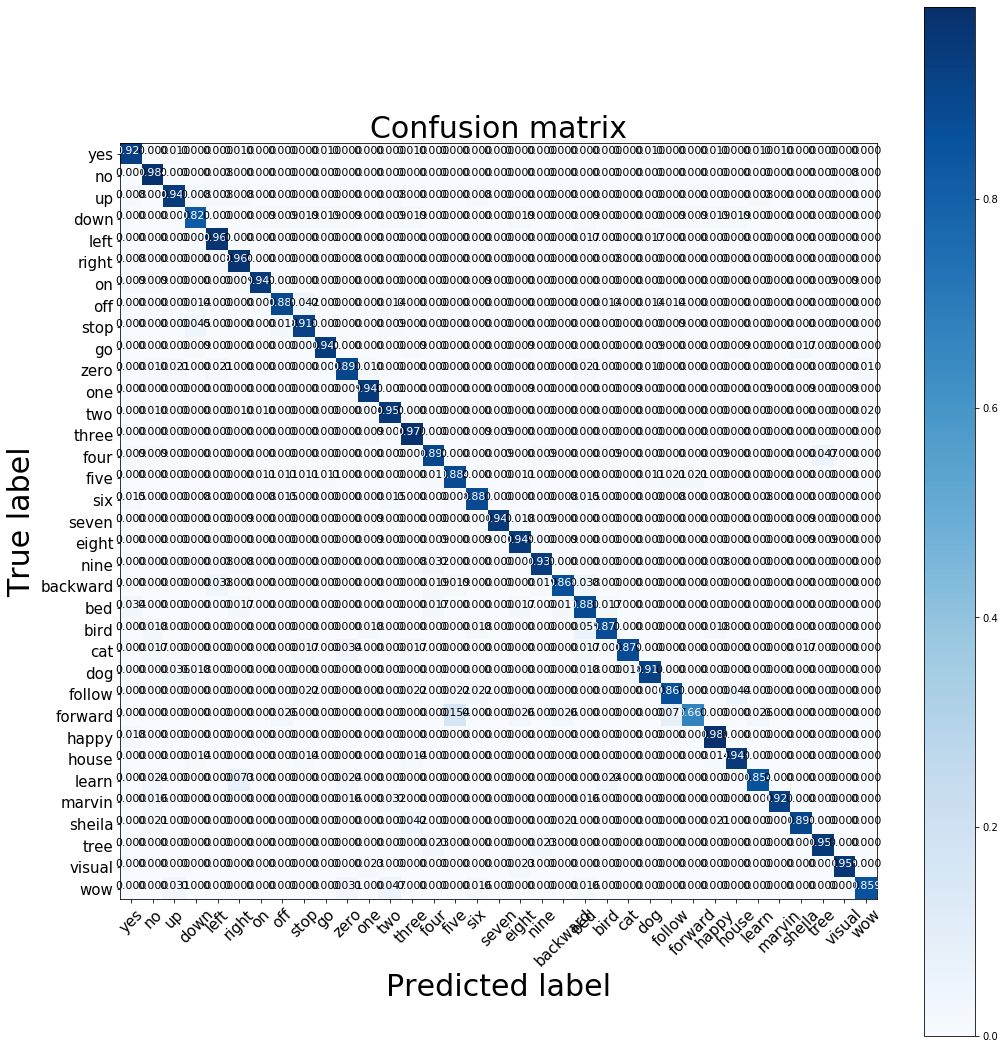

In [ ]:
#16. plot confusion matrix
import matr
matr.plot_confusion_matrix(cm,classes, normalize=True)

# EXP 5

In [ ]:

from keras.models import Model, load_model
from keras.layers import Input, Activation, Concatenate, Permute, Reshape, Flatten, Lambda, Dot, Softmax
from keras.layers import Add, Dropout, BatchNormalization, Conv2D, Reshape, MaxPooling2D, Dense, LSTM, Bidirectional
from keras import backend as K
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from keras import backend as K
from keras import optimizers
from kapre.time_frequency import Melspectrogram, Spectrogram
import keras
# Importing the important libraries
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from kapre.utils import Normalization2D
nCategories=36
samplingrate = 16000
inputLength = 16000
"""
Base fully convolutional model for speech recognition
"""
"""
        transformer_depth = 8
        block = TransformerBlock('Transformer', num_heads=8)
        act_layer = TransformerACT()
        next_input = input  # (batch_size, sequence_length, input_size)
        for i in range(transformer_depth):
            next_input = block(next_input, step=i)
            next_input, act_weighted_output = act_layer(next_input)
        act_layer.finalize()  # adds loss
        result = act_weighted_output
"""
inputs = Input((16000,))

x = Reshape((1, -1)) (inputs)

x = Melspectrogram(n_dft=1024, n_hop=128, input_shape=(1, 16000),
                          padding='same', sr=samplingrate, n_mels=80,
                          fmin=40.0, fmax=samplingrate/2, power_melgram=1.0,
                          return_decibel_melgram=True, trainable_fb=False,
                          trainable_kernel=False,
                          name='mel_stft') (x)

x = Normalization2D(int_axis=0)(x)
x = Permute((2,1,3)) (x) #this is strange - but now we have (batch_size, sequence, vec_dim)
print((x.shape))
zee = Lambda(lambda q: K.squeeze(q, -1), name='squeeze_last_dim') (x) #keras.backend.squeeze(x, axis)


transformer_depth = 6
block = TransformerBlock('Transformer', num_heads=4)
act_layer = TransformerACT()
print((zee.shape))
next_input = zee  # (batch_size, sequence_length, input_size)
for i in range(transformer_depth):
    next_input = block(next_input,)  # adds loss
    print((next_input.shape))
    next_input = Dropout(0.15)(next_input)
    print((next_input.shape))
    next_input, act_weighted_output = act_layer(next_input)
act_layer.finalize()  # adds loss
result = act_weighted_output
x = result
print((x.shape))
#x = Lambda(lambda q: q[:,64]) (x) 
x= Flatten()(x)
print((x.shape))
output = Dense(36, activation = 'softmax')(x)

model = Model(inputs=[inputs], outputs=[output])

model.compile(optimizer='adam', loss=['sparse_categorical_crossentropy'], metrics=['sparse_categorical_accuracy'])


(?, ?, 80, 1)
(?, ?, 80)
(?, 125, 80)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
(?, 125, 80)
(?, 125, 80)
(?, 125, 80)
(?, 125, 80)
(?, 125, 80)
(?, 125, 80)
(?, 125, 80)
(?, 125, 80)
(?, 125, 80)
(?, 125, 80)
(?, 125, 80)
(?, 125, 80)
(?, ?)


In [ ]:
model.save('model_transformer5.h5')

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.001
    drop = 0.4
    epochs_drop = 10.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=12, verbose=1)
checkpointer = ModelCheckpoint('model_transformer5.h5', monitor='val_sparse_categorical_accuracy', verbose=1, mode=min, save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 50, verbose=1, use_multiprocessing=True, workers=64,
callbacks=[earlystopper, checkpointer, lrate ])

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:680: RuntimeWarning: ModelCheckpoint mode <built-in function min> is unknown, fallback to auto mode.
  RuntimeWarning)




Epoch 1/50
Changing learning rate to 0.001
3112/3112 [==============================] - 3564s 1s/step - loss: 1.1526 - sparse_categorical_accuracy: 0.6939 - val_loss: 0.6782 - val_sparse_categorical_accuracy: 0.8284

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.82838, saving model to model_transformer5.h5
Epoch 2/50
Changing learning rate to 0.001
3112/3112 [==============================] - 355s 114ms/step - loss: 0.6313 - sparse_categorical_accuracy: 0.8407 - val_loss: 0.5501 - val_sparse_categorical_accuracy: 0.8581

Epoch 00002: val_sparse_categorical_accuracy improved from 0.82838 to 0.85812, saving model to model_transformer5.h5



OSError: ignored

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.001
    drop = 0.4
    epochs_drop = 8.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=12, verbose=1)
checkpointer = ModelCheckpoint('model_transformer5.h5', monitor='val_sparse_categorical_accuracy', verbose=1, mode=min, save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 50, verbose=1, 
callbacks=[earlystopper, checkpointer, lrate ])

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:680: RuntimeWarning: ModelCheckpoint mode <built-in function min> is unknown, fallback to auto mode.
  RuntimeWarning)


Epoch 1/50
Changing learning rate to 0.001
3112/3112 [==============================] - 359s 115ms/step - loss: 0.5315 - sparse_categorical_accuracy: 0.8686 - val_loss: 0.5153 - val_sparse_categorical_accuracy: 0.8673

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.86731, saving model to model_transformer5.h5
Epoch 2/50
Changing learning rate to 0.001
3112/3112 [==============================] - 347s 111ms/step - loss: 0.4755 - sparse_categorical_accuracy: 0.8841 - val_loss: 0.5049 - val_sparse_categorical_accuracy: 0.8745

Epoch 00002: val_sparse_categorical_accuracy improved from 0.86731 to 0.87450, saving model to model_transformer5.h5
Epoch 3/50
Changing learning rate to 0.001
3112/3112 [==============================] - 352s 113ms/step - loss: 0.4405 - sparse_categorical_accuracy: 0.8936 - val_loss: 0.4954 - val_sparse_categorical_accuracy: 0.8757

Epoch 00003: val_sparse_categorical_accuracy improved from 0.87450 to 0.87567, saving model to model_transformer

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.0001
    drop = 0.4
    epochs_drop = 9.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=12, verbose=1)
checkpointer = ModelCheckpoint('model_transformer5.h5', monitor='val_sparse_categorical_accuracy', verbose=1, mode=min, save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 50, verbose=1, 
callbacks=[earlystopper, checkpointer, lrate ])

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:680: RuntimeWarning: ModelCheckpoint mode <built-in function min> is unknown, fallback to auto mode.
  RuntimeWarning)


Epoch 1/50
Changing learning rate to 0.0001
3112/3112 [==============================] - 356s 114ms/step - loss: 0.1514 - sparse_categorical_accuracy: 0.9797 - val_loss: 0.4114 - val_sparse_categorical_accuracy: 0.9276

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.92764, saving model to model_transformer5.h5
Epoch 2/50
Changing learning rate to 0.0001
3112/3112 [==============================] - 355s 114ms/step - loss: 0.1528 - sparse_categorical_accuracy: 0.9792 - val_loss: 0.3917 - val_sparse_categorical_accuracy: 0.9285

Epoch 00002: val_sparse_categorical_accuracy improved from 0.92764 to 0.92848, saving model to model_transformer5.h5
Epoch 3/50
Changing learning rate to 0.0001
3112/3112 [==============================] - 353s 113ms/step - loss: 0.1498 - sparse_categorical_accuracy: 0.9793 - val_loss: 0.4230 - val_sparse_categorical_accuracy: 0.9268

Epoch 00003: val_sparse_categorical_accuracy did not improve from 0.92848
Epoch 4/50
Changing learning rate t

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.01
    drop = 0.4
    epochs_drop = 1.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=12, verbose=1)
checkpointer = ModelCheckpoint('model_transformer5.h5', monitor='val_sparse_categorical_accuracy', verbose=1, mode=min, save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 50, verbose=1, 
callbacks=[earlystopper, checkpointer, lrate ])

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:680: RuntimeWarning: ModelCheckpoint mode <built-in function min> is unknown, fallback to auto mode.
  RuntimeWarning)


Epoch 1/50
Changing learning rate to 0.004
3112/3112 [==============================] - 369s 118ms/step - loss: 0.9909 - sparse_categorical_accuracy: 0.7383 - val_loss: 0.7127 - val_sparse_categorical_accuracy: 0.8234

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.82336, saving model to model_transformer5.h5
Epoch 2/50
Changing learning rate to 0.0016000000000000003
3112/3112 [==============================] - 361s 116ms/step - loss: 0.4916 - sparse_categorical_accuracy: 0.8783 - val_loss: 0.5117 - val_sparse_categorical_accuracy: 0.8772

Epoch 00002: val_sparse_categorical_accuracy improved from 0.82336 to 0.87717, saving model to model_transformer5.h5
Epoch 3/50
Changing learning rate to 0.0006400000000000002
3112/3112 [==============================] - 359s 115ms/step - loss: 0.3522 - sparse_categorical_accuracy: 0.9196 - val_loss: 0.4181 - val_sparse_categorical_accuracy: 0.9044

Epoch 00003: val_sparse_categorical_accuracy improved from 0.87717 to 0.90441, s

# EXP 6

In [ ]:

from keras.models import Model, load_model
from keras.layers import Input, Activation, Concatenate, Permute, Reshape, Flatten, Lambda, Dot, Softmax
from keras.layers import Add, Dropout, BatchNormalization, Conv2D, Reshape, MaxPooling2D, Dense, LSTM, Bidirectional
from keras import backend as K
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from keras import backend as K
from keras import optimizers
from kapre.time_frequency import Melspectrogram, Spectrogram
import keras
# Importing the important libraries
from keras.layers import Dense, GlobalAveragePooling2D, GlobalAveragePooling1D
from keras.models import Model
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from kapre.utils import Normalization2D
nCategories=36
samplingrate = 16000
inputLength = 16000
"""
Base fully convolutional model for speech recognition
"""
"""
        transformer_depth = 8
        block = TransformerBlock('Transformer', num_heads=8)
        act_layer = TransformerACT()
        next_input = input  # (batch_size, sequence_length, input_size)
        for i in range(transformer_depth):
            next_input = block(next_input, step=i)
            next_input, act_weighted_output = act_layer(next_input)
        act_layer.finalize()  # adds loss
        result = act_weighted_output
"""
inputs = Input((16000,))

x = Reshape((1, -1)) (inputs)

x = Melspectrogram(n_dft=1024, n_hop=128, input_shape=(1, 16000),
                          padding='same', sr=samplingrate, n_mels=80,
                          fmin=40.0, fmax=samplingrate/2, power_melgram=1.0,
                          return_decibel_melgram=True, trainable_fb=False,
                          trainable_kernel=False,
                          name='mel_stft') (x)

x = Normalization2D(int_axis=0)(x)
x = Permute((2,1,3)) (x) #this is strange - but now we have (batch_size, sequence, vec_dim)
print((x.shape))
zee = Lambda(lambda q: K.squeeze(q, -1), name='squeeze_last_dim') (x) #keras.backend.squeeze(x, axis)


transformer_depth = 6
block = TransformerBlock('Transformer', num_heads=4)
act_layer = TransformerACT()
print((zee.shape))
next_input = zee  # (batch_size, sequence_length, input_size)
for i in range(transformer_depth):
    next_input = block(next_input,)  # adds loss
    print((next_input.shape))
    next_input = Dropout(0.25)(next_input)
    next_input, act_weighted_output = act_layer(next_input)
    print((next_input.shape),'1')
    print((act_weighted_output.shape),'2')
act_layer.finalize()  # adds loss
result = act_weighted_output
x = result
print((x.shape))
#x = Lambda(lambda q: q[:,64]) (x) 
x= GlobalAveragePooling1D()(x)
print((x.shape))
output = Dense(36, activation = 'softmax')(x)
print((output.shape))
model = Model(inputs=[inputs], outputs=[output])

model.compile(optimizer='adam', loss=['sparse_categorical_crossentropy'], metrics=['sparse_categorical_accuracy'])


(?, ?, 80, 1)
(?, ?, 80)
(?, 125, 80)
(?, 125, 80) 1
(?, 125, 80) 2
(?, 125, 80)
(?, 125, 80) 1
(?, 125, 80) 2
(?, 125, 80)
(?, 125, 80) 1
(?, 125, 80) 2
(?, 125, 80)
(?, 125, 80) 1
(?, 125, 80) 2
(?, 125, 80)
(?, 125, 80) 1
(?, 125, 80) 2
(?, 125, 80)
(?, 125, 80) 1
(?, 125, 80) 2
(?, 125, 80)
(?, 80)
(?, 36)


In [ ]:
model.save('model_transformer7.h5')

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.001
    drop = 0.4
    epochs_drop = 7.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=15, verbose=1)
checkpointer = ModelCheckpoint('model_transformer7.h5', monitor='val_sparse_categorical_accuracy', verbose=1, mode=min, save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 48, verbose=1, use_multiprocessing=True, workers=64,
callbacks=[earlystopper, checkpointer, lrate ])

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:680: RuntimeWarning: ModelCheckpoint mode <built-in function min> is unknown, fallback to auto mode.
  RuntimeWarning)




Epoch 1/48
Changing learning rate to 0.001
3112/3112 [==============================] - 3575s 1s/step - loss: 1.2217 - sparse_categorical_accuracy: 0.6798 - val_loss: 0.7378 - val_sparse_categorical_accuracy: 0.8123

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.81233, saving model to model_transformer7.h5
Epoch 1/48
Epoch 2/48
Changing learning rate to 0.001
3112/3112 [==============================] - 345s 111ms/step - loss: 0.6543 - sparse_categorical_accuracy: 0.8303 - val_loss: 0.6185 - val_sparse_categorical_accuracy: 0.8446

Epoch 00002: val_sparse_categorical_accuracy improved from 0.81233 to 0.84459, saving model to model_transformer7.h5


OSError: ignored

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.001
    drop = 0.4
    epochs_drop = 8.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=13, verbose=1)
checkpointer = ModelCheckpoint('model_transformer7.h5', monitor='val_sparse_categorical_accuracy', verbose=1, mode=min, save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 55, verbose=1, 
callbacks=[earlystopper, checkpointer, lrate ])

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:680: RuntimeWarning: ModelCheckpoint mode <built-in function min> is unknown, fallback to auto mode.
  RuntimeWarning)


Epoch 1/55
Changing learning rate to 0.001
3112/3112 [==============================] - 398s 128ms/step - loss: 0.5543 - sparse_categorical_accuracy: 0.8580 - val_loss: 0.5742 - val_sparse_categorical_accuracy: 0.8556

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.85561, saving model to model_transformer7.h5
Epoch 2/55
Changing learning rate to 0.001
3112/3112 [==============================] - 382s 123ms/step - loss: 0.5045 - sparse_categorical_accuracy: 0.8710 - val_loss: 0.5260 - val_sparse_categorical_accuracy: 0.8686

Epoch 00002: val_sparse_categorical_accuracy improved from 0.85561 to 0.86865, saving model to model_transformer7.h5
Epoch 3/55
Changing learning rate to 0.001
3112/3112 [==============================] - 378s 121ms/step - loss: 0.4829 - sparse_categorical_accuracy: 0.8776 - val_loss: 0.5130 - val_sparse_categorical_accuracy: 0.8730

Epoch 00003: val_sparse_categorical_accuracy improved from 0.86865 to 0.87299, saving model to model_transformer

# EXP 7

In [ ]:

from keras.models import Model, load_model
from keras.layers import Input, Activation, Concatenate, Permute, Reshape, Flatten, Lambda, Dot, Softmax
from keras.layers import Add, Dropout, BatchNormalization, Conv2D, Reshape, MaxPooling2D, Dense, LSTM, Bidirectional
from keras import backend as K
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from keras import backend as K
from keras import optimizers
from kapre.time_frequency import Melspectrogram, Spectrogram
import keras
# Importing the important libraries
from keras.layers import Dense, GlobalAveragePooling2D, GlobalAveragePooling1D
from keras.models import Model
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from kapre.utils import Normalization2D
nCategories=36
samplingrate = 16000
inputLength = 16000
"""
Base fully convolutional model for speech recognition
"""
"""
        transformer_depth = 8
        block = TransformerBlock('Transformer', num_heads=8)
        act_layer = TransformerACT()
        next_input = input  # (batch_size, sequence_length, input_size)
        for i in range(transformer_depth):
            next_input = block(next_input, step=i)
            next_input, act_weighted_output = act_layer(next_input)
        act_layer.finalize()  # adds loss
        result = act_weighted_output
"""
inputs = Input((16000,))

x = Reshape((1, -1)) (inputs)

x = Melspectrogram(n_dft=1024, n_hop=128, input_shape=(1, 16000),
                          padding='same', sr=samplingrate, n_mels=80,
                          fmin=40.0, fmax=samplingrate/2, power_melgram=1.0,
                          return_decibel_melgram=True, trainable_fb=False,
                          trainable_kernel=False,
                          name='mel_stft') (x)

x = Normalization2D(int_axis=0)(x)
x = Conv2D(1, (3,3) ,  padding='same') (x)
x = BatchNormalization() (x)
x= Activation('relu')(x)
x = Permute((2,1,3)) (x) #this is strange - but now we have (batch_size, sequence, vec_dim)
print((x.shape))
zee = Lambda(lambda q: K.squeeze(q, -1), name='squeeze_last_dim') (x) #keras.backend.squeeze(x, axis)


transformer_depth = 6
block = TransformerBlock('Transformer', num_heads=4)
act_layer = TransformerACT()
print((zee.shape))
next_input = zee  # (batch_size, sequence_length, input_size)
for i in range(transformer_depth):
    next_input = block(next_input,)  # adds loss
    print((next_input.shape))
    next_input = Dropout(0.25)(next_input)
    next_input, act_weighted_output = act_layer(next_input)
    print((next_input.shape),'1')
    print((act_weighted_output.shape),'2')
act_layer.finalize()  # adds loss
result = act_weighted_output
x = result
print((x.shape))
#x = Lambda(lambda q: q[:,64]) (x) 
x= GlobalAveragePooling1D()(x)
print((x.shape))
output = Dense(36, activation = 'softmax')(x)
print((output.shape))
model = Model(inputs=[inputs], outputs=[output])

model.compile(optimizer='adam', loss=['sparse_categorical_crossentropy'], metrics=['sparse_categorical_accuracy'])


(?, ?, 80, 1)
(?, ?, 80)
(?, 125, 80)
(?, 125, 80) 1
(?, 125, 80) 2
(?, 125, 80)
(?, 125, 80) 1
(?, 125, 80) 2
(?, 125, 80)
(?, 125, 80) 1
(?, 125, 80) 2
(?, 125, 80)
(?, 125, 80) 1
(?, 125, 80) 2
(?, 125, 80)
(?, 125, 80) 1
(?, 125, 80) 2
(?, 125, 80)
(?, 125, 80) 1
(?, 125, 80) 2
(?, 125, 80)
(?, 80)
(?, 36)


In [ ]:
model.save('model_transformer8.h5')

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.001
    drop = 0.4
    epochs_drop = 7.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=15, verbose=1)
checkpointer = ModelCheckpoint('model_transformer8.h5', monitor='val_sparse_categorical_accuracy', verbose=1, mode=min, save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 48, verbose=1, use_multiprocessing=True, workers=64,
callbacks=[earlystopper, checkpointer, lrate ])

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:680: RuntimeWarning: ModelCheckpoint mode <built-in function min> is unknown, fallback to auto mode.
  RuntimeWarning)


Epoch 1/48
Changing learning rate to 0.001
3112/3112 [==============================] - 390s 125ms/step - loss: 1.8464 - sparse_categorical_accuracy: 0.5000 - val_loss: 0.9048 - val_sparse_categorical_accuracy: 0.7617

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.76170, saving model to model_transformer8.h5
Epoch 2/48
Changing learning rate to 0.001
3112/3112 [==============================] - 401s 129ms/step - loss: 0.8304 - sparse_categorical_accuracy: 0.7820 - val_loss: 0.7923 - val_sparse_categorical_accuracy: 0.7891

Epoch 00002: val_sparse_categorical_accuracy improved from 0.76170 to 0.78910, saving model to model_transformer8.h5


OSError: ignored

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.001
    drop = 0.4
    epochs_drop = 7.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=12, verbose=1)
checkpointer = ModelCheckpoint('model_transformer8.h5', monitor='val_sparse_categorical_accuracy', verbose=1, mode=min, save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 55, verbose=1,
callbacks=[earlystopper, checkpointer, lrate ])

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:680: RuntimeWarning: ModelCheckpoint mode <built-in function min> is unknown, fallback to auto mode.
  RuntimeWarning)


Epoch 1/55
Changing learning rate to 0.001
3112/3112 [==============================] - 429s 138ms/step - loss: 0.6191 - sparse_categorical_accuracy: 0.8382 - val_loss: 0.5704 - val_sparse_categorical_accuracy: 0.8526

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.85261, saving model to model_transformer8.h5
Epoch 2/55
Changing learning rate to 0.001
3112/3112 [==============================] - 438s 141ms/step - loss: 0.5446 - sparse_categorical_accuracy: 0.8601 - val_loss: 0.5123 - val_sparse_categorical_accuracy: 0.8693

Epoch 00002: val_sparse_categorical_accuracy improved from 0.85261 to 0.86932, saving model to model_transformer8.h5
Epoch 3/55
Changing learning rate to 0.001
3112/3112 [==============================] - 429s 138ms/step - loss: 0.5146 - sparse_categorical_accuracy: 0.8673 - val_loss: 0.5666 - val_sparse_categorical_accuracy: 0.8524

Epoch 00003: val_sparse_categorical_accuracy did not improve from 0.86932
Epoch 4/55
Changing learning rate to 0

In [ ]:
from keras.models import Model, load_model
#10.load best model according to cross-validation - model-attRNN
from kapre.time_frequency import Melspectrogram, Spectrogram
from kapre.utils import Normalization2D
model = load_model('model_transformer8.h5', custom_objects={'Melspectrogram': Melspectrogram, 'Normalization2D': Normalization2D })












Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where





# EXP 8

Transformer experiment on audio 37 classes data set with starting layers of melspectogram and three convolutions layers. Then Transformer is applied with depth 6 and  4 attentions heads between each block of transformer 25 % dropout is applied. then a global Average 1d pooling is applied instead of flatting and then dense layer of 36 classes is applied ..... then traning is done with variable(Dynamic) learning rate from 0.001 to 4 e-5.  on differnet settings of epoches... 

Maximum Validation Accuracy of this model is 0.93834 shown in the expirement.

In [ ]:

from keras.models import Model, load_model
from keras.layers import Input, Activation, Concatenate, Permute, Reshape, Flatten, Lambda, Dot, Softmax
from keras.layers import Add, Dropout, BatchNormalization, Conv2D, Reshape, MaxPooling2D, Dense, LSTM, Bidirectional
from keras import backend as K
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from keras import backend as K
from keras import optimizers
from kapre.time_frequency import Melspectrogram, Spectrogram
import keras
# Importing the important libraries
from keras.layers import Dense, GlobalAveragePooling2D, GlobalAveragePooling1D
from keras.models import Model
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from kapre.utils import Normalization2D
nCategories=36
samplingrate = 16000
inputLength = 16000
"""
Base fully convolutional model for speech recognition
"""
"""
        %%%%%%%%%%%%%%%%transformer_depth = 8
        block = TransformerBlock('Transformer', num_heads=8)
        act_layer = TransformerACT()
        next_input = input  # (batch_size, sequence_length, input_size)
        for i in range(transformer_depth):
            next_input = block(next_input, step=i)
            next_input, act_weighted_output = act_layer(next_input)
        act_layer.finalize()  # adds loss
        result = act_weighted_output
"""
inputs = Input((16000,))

x = Reshape((1, -1)) (inputs)

x = Melspectrogram(n_dft=1024, n_hop=128, input_shape=(1, 16000),
                          padding='same', sr=samplingrate, n_mels=80,
                          fmin=40.0, fmax=samplingrate/2, power_melgram=1.0,
                          return_decibel_melgram=True, trainable_fb=False,
                          trainable_kernel=False,
                          name='mel_stft') (x)

x = Normalization2D(int_axis=0)(x)
x = Conv2D(32, (3,3) ,  padding='same') (x)
x = BatchNormalization() (x)
x= Activation('relu')(x)
x = Conv2D(64, (3,3) ,  padding='same') (x)
x = BatchNormalization() (x)
x= Activation('relu')(x)
x = Conv2D(1, (3,3) ,  padding='same') (x)
x = BatchNormalization() (x)
x= Activation('relu')(x)
x = Permute((2,1,3)) (x) #this is strange - but now we have (batch_size, sequence, vec_dim)
print((x.shape))
zee = Lambda(lambda q: K.squeeze(q, -1), name='squeeze_last_dim') (x) #keras.backend.squeeze(x, axis)


transformer_depth = 6
block = TransformerBlock('Transformer', num_heads=4)
act_layer = TransformerACT()
print((zee.shape))
next_input = zee  # (batch_size, sequence_length, input_size)
for i in range(transformer_depth):
    next_input = block(next_input,)  # adds loss
    print((next_input.shape))
    next_input = Dropout(0.25)(next_input)
    next_input, act_weighted_output = act_layer(next_input)
    print((next_input.shape),'1')
    print((act_weighted_output.shape),'2')
act_layer.finalize()  # adds loss
result = act_weighted_output
x = result
print((x.shape))
#x = Lambda(lambda q: q[:,64]) (x) 
x= GlobalAveragePooling1D()(x)
print((x.shape))
output = Dense(36, activation = 'softmax')(x)
print((output.shape))
model = Model(inputs=[inputs], outputs=[output])

model.compile(optimizer='adam', loss=['sparse_categorical_crossentropy'], metrics=['sparse_categorical_accuracy'])














(?, ?, 80, 1)
(?, ?, 80)
(?, 125, 80)
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
(?, 125, 80) 1
(?, 125, 80) 2
(?, 125, 80)
(?, 125, 80) 1
(?, 125, 80) 2
(?, 125, 80)
(?, 125, 80) 1
(?, 125, 80) 2
(?, 125, 80)
(?, 125, 80) 1
(?, 125, 80) 2
(?, 125, 80)
(?, 125, 80) 1
(?, 125, 80) 2
(?, 125, 80)
(?, 125, 80) 1
(?, 125, 80) 2
(?, 125, 80)
(?, 80)
(?, 36)



In [ ]:
model.save('model_transformer9.h5')

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.001
    drop = 0.4
    epochs_drop = 7.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=10, verbose=1)
checkpointer = ModelCheckpoint('model_transformer9.h5', monitor='val_sparse_categorical_accuracy', verbose=1, mode=min, save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 35, verbose=1,   use_multiprocessing=True, workers=64,
callbacks=[earlystopper, checkpointer, lrate ])

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:680: RuntimeWarning: ModelCheckpoint mode <built-in function min> is unknown, fallback to auto mode.
  RuntimeWarning)




Epoch 1/35
Changing learning rate to 0.001
3112/3112 [==============================] - 3659s 1s/step - loss: 1.1684 - sparse_categorical_accuracy: 0.6948 - val_loss: 0.7212 - val_sparse_categorical_accuracy: 0.8133

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.81334, saving model to model_transformer9.h5
Epoch 2/35
Changing learning rate to 0.001
3112/3112 [==============================] - 410s 132ms/step - loss: 0.6126 - sparse_categorical_accuracy: 0.8430 - val_loss: 0.5413 - val_sparse_categorical_accuracy: 0.8598

Epoch 00002: val_sparse_categorical_accuracy improved from 0.81334 to 0.85979, saving model to model_transformer9.h5


OSError: ignored

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.001
    drop = 0.4
    epochs_drop = 7.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=12, verbose=1)
checkpointer = ModelCheckpoint('model_transformer9.h5', monitor='val_sparse_categorical_accuracy', verbose=1, mode=min, save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 50, verbose=1,   
callbacks=[earlystopper, checkpointer, lrate ])

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:680: RuntimeWarning: ModelCheckpoint mode <built-in function min> is unknown, fallback to auto mode.
  RuntimeWarning)


Epoch 1/50
Changing learning rate to 0.001
3112/3112 [==============================] - 361s 116ms/step - loss: 0.6214 - sparse_categorical_accuracy: 0.8419 - val_loss: 0.5367 - val_sparse_categorical_accuracy: 0.8668

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.86681, saving model to model_transformer9.h5
Epoch 2/50
Changing learning rate to 0.001
3112/3112 [==============================] - 355s 114ms/step - loss: 0.4669 - sparse_categorical_accuracy: 0.8819 - val_loss: 0.4955 - val_sparse_categorical_accuracy: 0.8737

Epoch 00002: val_sparse_categorical_accuracy improved from 0.86681 to 0.87366, saving model to model_transformer9.h5
Epoch 3/50
Changing learning rate to 0.001
3112/3112 [==============================] - 359s 115ms/step - loss: 0.4283 - sparse_categorical_accuracy: 0.8923 - val_loss: 0.4888 - val_sparse_categorical_accuracy: 0.8765

Epoch 00003: val_sparse_categorical_accuracy improved from 0.87366 to 0.87650, saving model to model_transformer

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.0001
    drop = 0.2
    epochs_drop = 7.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=12, verbose=1)
checkpointer = ModelCheckpoint('model_transformer9.h5', monitor='val_sparse_categorical_accuracy', verbose=1, mode=min, save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 50, verbose=1,   
callbacks=[earlystopper, checkpointer, lrate ])

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:680: RuntimeWarning: ModelCheckpoint mode <built-in function min> is unknown, fallback to auto mode.
  RuntimeWarning)


Epoch 1/50
Changing learning rate to 0.0001
3112/3112 [==============================] - 364s 117ms/step - loss: 0.2711 - sparse_categorical_accuracy: 0.9377 - val_loss: 0.3300 - val_sparse_categorical_accuracy: 0.9305

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.93048, saving model to model_transformer9.h5
Epoch 2/50
Changing learning rate to 0.0001
3112/3112 [==============================] - 365s 117ms/step - loss: 0.1693 - sparse_categorical_accuracy: 0.9658 - val_loss: 0.3042 - val_sparse_categorical_accuracy: 0.9337

Epoch 00002: val_sparse_categorical_accuracy improved from 0.93048 to 0.93366, saving model to model_transformer9.h5
Epoch 3/50
Changing learning rate to 0.0001
3112/3112 [==============================] - 362s 116ms/step - loss: 0.1619 - sparse_categorical_accuracy: 0.9678 - val_loss: 0.3068 - val_sparse_categorical_accuracy: 0.9352

Epoch 00003: val_sparse_categorical_accuracy improved from 0.93366 to 0.93516, saving model to model_transfor

{'val_loss': [0.33002613960979454, 0.30421351486030107, 0.3068051696381467, 0.3006572113198074, 0.2930092085850111, 0.2930407365136605, 0.2894446327684716, 0.30039189853531156, 0.2872142753499077, 0.29844331740336943, 0.29786634025846254, 0.295795377224365, 0.29688384927769396, 0.30055807609569263, 0.290251023160981, 0.283307701030517, 0.29188126375410645, 0.30474858405317534, 0.2993857668722696, 0.29532137745244297, 0.29201545151956576], 'val_sparse_categorical_accuracy': [0.93048128342246, 0.9336564171122995, 0.9351604278074866, 0.9373328877005348, 0.9336564171122995, 0.9343248663101604, 0.9354946524064172, 0.9353275401069518, 0.9381684491978609, 0.9351604278074866, 0.9338235294117647, 0.9358288770053476, 0.9354946524064172, 0.9346590909090909, 0.9381684491978609, 0.9371657754010695, 0.9339906417112299, 0.9329879679144385, 0.9353275401069518, 0.9363302139037433, 0.9349933155080213], 'loss': [0.2710966022725871, 0.16930423865985403, 0.16194705208667715, 0.15780645742255878, 0.15452425

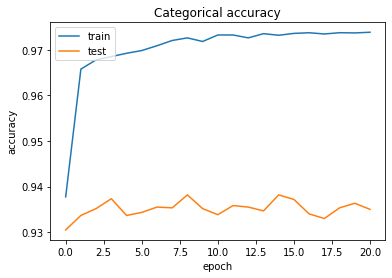

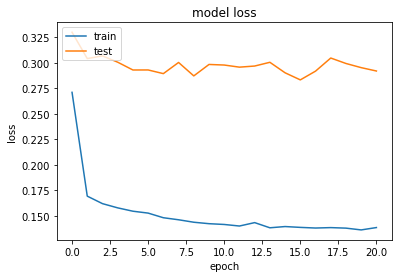

In [ ]:
#9.show results matlabpy
print(results.history)
# summarize history for categorical accuracy
plt.plot(results.history['sparse_categorical_accuracy'])
plt.plot(results.history['val_sparse_categorical_accuracy'])
plt.title('Categorical accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
au, cl = test1.__getitem__(1)

In [ ]:
valEval = model.evaluate_generator(valGen, verbose=1,use_multiprocessing=True, workers=32)
trainEval = model.evaluate_generator(trainGen, verbose=1, use_multiprocessing=True, workers=32)
testEval = model.evaluate(au, cl, verbose=1)
print('Evaluation scores: \nMetrics: {} \nTrain: {} \nValidation: {} \nTest: {}'.format(model.metrics_names, trainEval, valEval, testEval) )

3000/3000 [==============================] - 4s 1ms/step
Evaluation scores: 
Metrics: ['loss', 'sparse_categorical_accuracy'] 
Train: [0.12496358503415166, 0.9781189749357326] 
Validation: [0.2872198685943921, 0.9346590909090909] 
Test: [0.29944126973549523, 0.9266666665077209]


In [ ]:
y_pred = model.predict(au, verbose=1)

3000/3000 [==============================] - 4s 1ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(cl, np.argmax(y_pred,1))
print(set(cl))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35}


In [ ]:
#15. setting classes for Confusion matrix

#LRcmd
classes=[ 'yes', 'no' , 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go',
                         'zero' , 'one' , 'two' , 'three' , 'four' , 'five' , 'six' , 
                         'seven' ,  'eight' , 'nine' , 'backward', 'bed', 'bird', 'cat', 'dog',
                         'follow', 'forward', 'happy', 'house', 'learn', 'marvin', 'sheila', 'tree',
                         'visual', 'wow']

Normalized confusion matrix


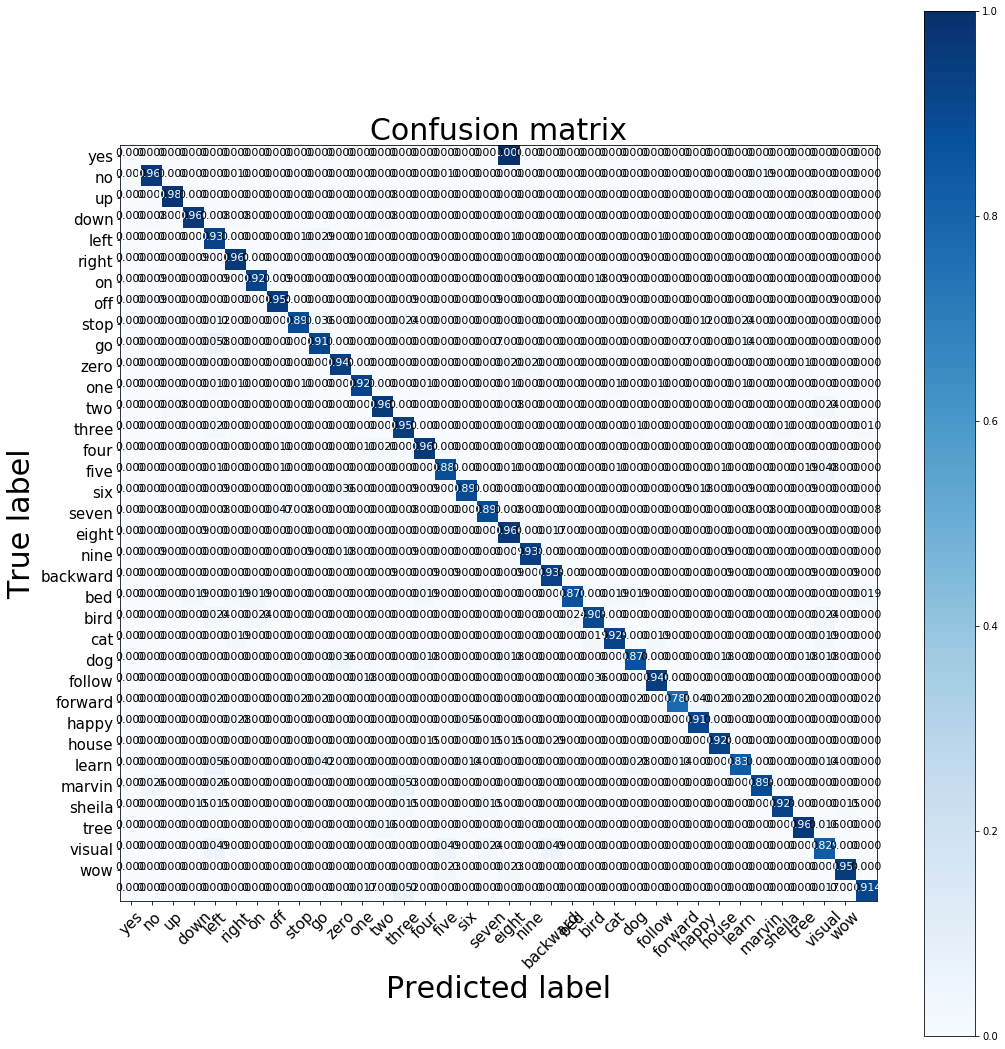

In [ ]:
#16. plot confusion matrix
import matr
matr.plot_confusion_matrix(cm,classes, normalize=True)

# Batch size 64

In [ ]:

from keras.models import Model, load_model
from keras.layers import Input, Activation, Concatenate, Permute, Reshape, Flatten, Lambda, Dot, Softmax
from keras.layers import Add, Dropout, BatchNormalization, Conv2D, Reshape, MaxPooling2D, Dense, LSTM, Bidirectional
from keras import backend as K
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from keras import backend as K
from keras import optimizers
from kapre.time_frequency import Melspectrogram, Spectrogram
import keras
# Importing the important libraries
from keras.layers import Dense, GlobalAveragePooling2D, GlobalAveragePooling1D
from keras.models import Model
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from kapre.utils import Normalization2D
nCategories=36
samplingrate = 16000
inputLength = 16000
"""
Base fully convolutional model for speech recognition
"""
"""
        %%%%%%%%%%%%%%%%transformer_depth = 8
        block = TransformerBlock('Transformer', num_heads=8)
        act_layer = TransformerACT()
        next_input = input  # (batch_size, sequence_length, input_size)
        for i in range(transformer_depth):
            next_input = block(next_input, step=i)
            next_input, act_weighted_output = act_layer(next_input)
        act_layer.finalize()  # adds loss
        result = act_weighted_output
"""
inputs = Input((16000,))

x = Reshape((1, -1)) (inputs)

x = Melspectrogram(n_dft=1024, n_hop=128, input_shape=(1, 16000),
                          padding='same', sr=samplingrate, n_mels=80,
                          fmin=40.0, fmax=samplingrate/2, power_melgram=1.0,
                          return_decibel_melgram=True, trainable_fb=False,
                          trainable_kernel=False,
                          name='mel_stft') (x)

x = Normalization2D(int_axis=0)(x)
x = Conv2D(32, (3,3) ,  padding='same') (x)
x = BatchNormalization() (x)
x= Activation('relu')(x)
x = Conv2D(64, (3,3) ,  padding='same') (x)
x = BatchNormalization() (x)
x= Activation('relu')(x)
x = Conv2D(1, (3,3) ,  padding='same') (x)
x = BatchNormalization() (x)
x= Activation('relu')(x)
x = Permute((2,1,3)) (x) #this is strange - but now we have (batch_size, sequence, vec_dim)
print((x.shape))
zee = Lambda(lambda q: K.squeeze(q, -1), name='squeeze_last_dim') (x) #keras.backend.squeeze(x, axis)


transformer_depth = 6
block = TransformerBlock('Transformer', num_heads=4)
act_layer = TransformerACT()
print((zee.shape))
next_input = zee  # (batch_size, sequence_length, input_size)
for i in range(transformer_depth):
    next_input = block(next_input,)  # adds loss
    print((next_input.shape))
    next_input = Dropout(0.25)(next_input)
    next_input, act_weighted_output = act_layer(next_input)
    print((next_input.shape),'1')
    print((act_weighted_output.shape),'2')
act_layer.finalize()  # adds loss
result = act_weighted_output
x = result
print((x.shape))
#x = Lambda(lambda q: q[:,64]) (x) 
x= GlobalAveragePooling1D()(x)
print((x.shape))
output = Dense(36, activation = 'softmax')(x)
print((output.shape))
model = Model(inputs=[inputs], outputs=[output])

model.compile(optimizer='adam', loss=['sparse_categorical_crossentropy'], metrics=['sparse_categorical_accuracy'])














(?, ?, 80, 1)
(?, ?, 80)
(?, 125, 80)
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
(?, 125, 80) 1
(?, 125, 80) 2
(?, 125, 80)
(?, 125, 80) 1
(?, 125, 80) 2
(?, 125, 80)
(?, 125, 80) 1
(?, 125, 80) 2
(?, 125, 80)
(?, 125, 80) 1
(?, 125, 80) 2
(?, 125, 80)
(?, 125, 80) 1
(?, 125, 80) 2
(?, 125, 80)
(?, 125, 80) 1
(?, 125, 80) 2
(?, 125, 80)
(?, 80)
(?, 36)



In [ ]:
model.save('model_transformer11.h5')

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.001
    drop = 0.4
    epochs_drop = 7.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=10, verbose=1)
checkpointer = ModelCheckpoint('model_transformer11.h5', monitor='val_sparse_categorical_accuracy', verbose=1, mode=min, save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 35, verbose=1,   use_multiprocessing=True, workers=64,
callbacks=[earlystopper, checkpointer, lrate ])

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:680: RuntimeWarning: ModelCheckpoint mode <built-in function min> is unknown, fallback to auto mode.
  RuntimeWarning)


Epoch 1/35
Changing learning rate to 0.001
6224/6224 [==============================] - 4287s 689ms/step - loss: 1.0650 - sparse_categorical_accuracy: 0.7196 - val_loss: 0.6911 - val_sparse_categorical_accuracy: 0.8233

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.82333, saving model to model_transformer11.h5
Epoch 2/35
Changing learning rate to 0.001
6224/6224 [==============================] - 435s 70ms/step - loss: 0.6042 - sparse_categorical_accuracy: 0.8449 - val_loss: 0.5420 - val_sparse_categorical_accuracy: 0.8627

Epoch 00002: val_sparse_categorical_accuracy improved from 0.82333 to 0.86267, saving model to model_transformer11.h5


OSError: ignored

In [ ]:

model.load_weights('model_transformer11.h5')

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.001
    drop = 0.4
    epochs_drop = 7.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=10, verbose=1)
checkpointer = ModelCheckpoint('model_transformer11.h5', monitor='val_sparse_categorical_accuracy', verbose=1, mode=min, save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 35, verbose=1,   use_multiprocessing=True, workers=64,
callbacks=[earlystopper, checkpointer, lrate ])

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:680: RuntimeWarning: ModelCheckpoint mode <built-in function min> is unknown, fallback to auto mode.
  RuntimeWarning)




Epoch 1/35
Changing learning rate to 0.001
6224/6224 [==============================] - 6684s 1s/step - loss: 1.0852 - sparse_categorical_accuracy: 0.7123 - val_loss: 0.7482 - val_sparse_categorical_accuracy: 0.7947

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.79467, saving model to model_transformer11.h5
Epoch 2/35
Changing learning rate to 0.001
6224/6224 [==============================] - 437s 70ms/step - loss: 0.5951 - sparse_categorical_accuracy: 0.8458 - val_loss: 0.5970 - val_sparse_categorical_accuracy: 0.8470

Epoch 00002: val_sparse_categorical_accuracy improved from 0.79467 to 0.84700, saving model to model_transformer11.h5


OSError: ignored

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.001
    drop = 0.4
    epochs_drop = 7.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=12, verbose=1)
checkpointer = ModelCheckpoint('model_transformer11.h5', monitor='val_sparse_categorical_accuracy', verbose=1, mode=min, save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 50, verbose=1,  
callbacks=[earlystopper, checkpointer, lrate ])

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:680: RuntimeWarning: ModelCheckpoint mode <built-in function min> is unknown, fallback to auto mode.
  RuntimeWarning)


Epoch 1/50
Changing learning rate to 0.001
6224/6224 [==============================] - 429s 69ms/step - loss: 0.5127 - sparse_categorical_accuracy: 0.8682 - val_loss: 0.5553 - val_sparse_categorical_accuracy: 0.8585

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.85850, saving model to model_transformer11.h5
Epoch 2/50
Changing learning rate to 0.001
6224/6224 [==============================] - 436s 70ms/step - loss: 0.4719 - sparse_categorical_accuracy: 0.8797 - val_loss: 0.5385 - val_sparse_categorical_accuracy: 0.8645

Epoch 00002: val_sparse_categorical_accuracy improved from 0.85850 to 0.86450, saving model to model_transformer11.h5
Epoch 3/50
Changing learning rate to 0.001
6224/6224 [==============================] - 437s 70ms/step - loss: 0.4443 - sparse_categorical_accuracy: 0.8884 - val_loss: 0.5484 - val_sparse_categorical_accuracy: 0.8642

Epoch 00003: val_sparse_categorical_accuracy did not improve from 0.86450
Epoch 4/50
Changing learning rate to 0.

{'val_loss': [0.5553402144014835, 0.5384720433950424, 0.5484314449032148, 0.507886906782786, 0.8324199349880218, 0.47862689185142515, 0.4203771205941836, 0.4020455556809902, 0.42242456407348317, 0.3883228800793489, 0.3990154715180397, 0.3943186164697011, 0.4072539424200853, 0.3658593554198742, 0.38718483487764993, 0.36324602445960047, 0.37331651068727173, 0.3625785332818826, 0.36847556245326996, 0.3817439298033714, 0.3636244426568349, 0.3670341879626115, 0.35811475217342376, 0.3565133840938409, 0.36384684130549433, 0.3591037239730358, 0.36431913655996323, 0.3595971739689509, 0.3705812338888645, 0.3647510058383147, 0.3727035505771637, 0.3549157532354196, 0.3731852838198344, 0.35917925586303073, 0.3652664274473985, 0.3669482399324576, 0.3796123402218024, 0.3679116027355194, 0.37165241029858587, 0.3656831724842389, 0.3840848802924156, 0.3646718226969242, 0.3666112605035305, 0.36260741846760114, 0.36899819632371267, 0.3790476880967617, 0.38262450018525124, 0.3770505031347275, 0.36358754836

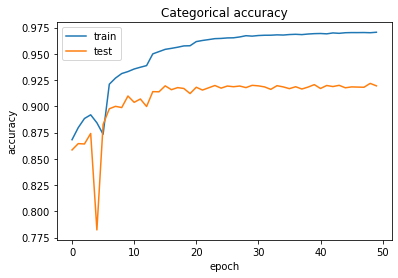

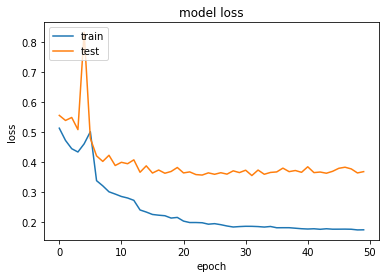

In [ ]:
#9.show results matlabpy
print(results.history)
# summarize history for categorical accuracy
plt.plot(results.history['sparse_categorical_accuracy'])
plt.plot(results.history['val_sparse_categorical_accuracy'])
plt.title('Categorical accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
au, cl = test1.__getitem__(1)

In [ ]:
valEval = model.evaluate_generator(valGen, verbose=1,use_multiprocessing=True, workers=32)
trainEval = model.evaluate_generator(trainGen, verbose=1, use_multiprocessing=True, workers=32)
testEval = model.evaluate(au, cl, verbose=1)
print('Evaluation scores: \nMetrics: {} \nTrain: {} \nValidation: {} \nTest: {}'.format(model.metrics_names, trainEval, valEval, testEval) )

3000/3000 [==============================] - 5s 2ms/step
Evaluation scores: 
Metrics: ['loss', 'sparse_categorical_accuracy'] 
Train: [0.167386244916642, 0.9727365841902313] 
Validation: [0.37916897937655447, 0.9193333333333333] 
Test: [0.3483083084026972, 0.92]


3000/3000 [==============================] - 5s 2ms/step
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35}
Normalized confusion matrix


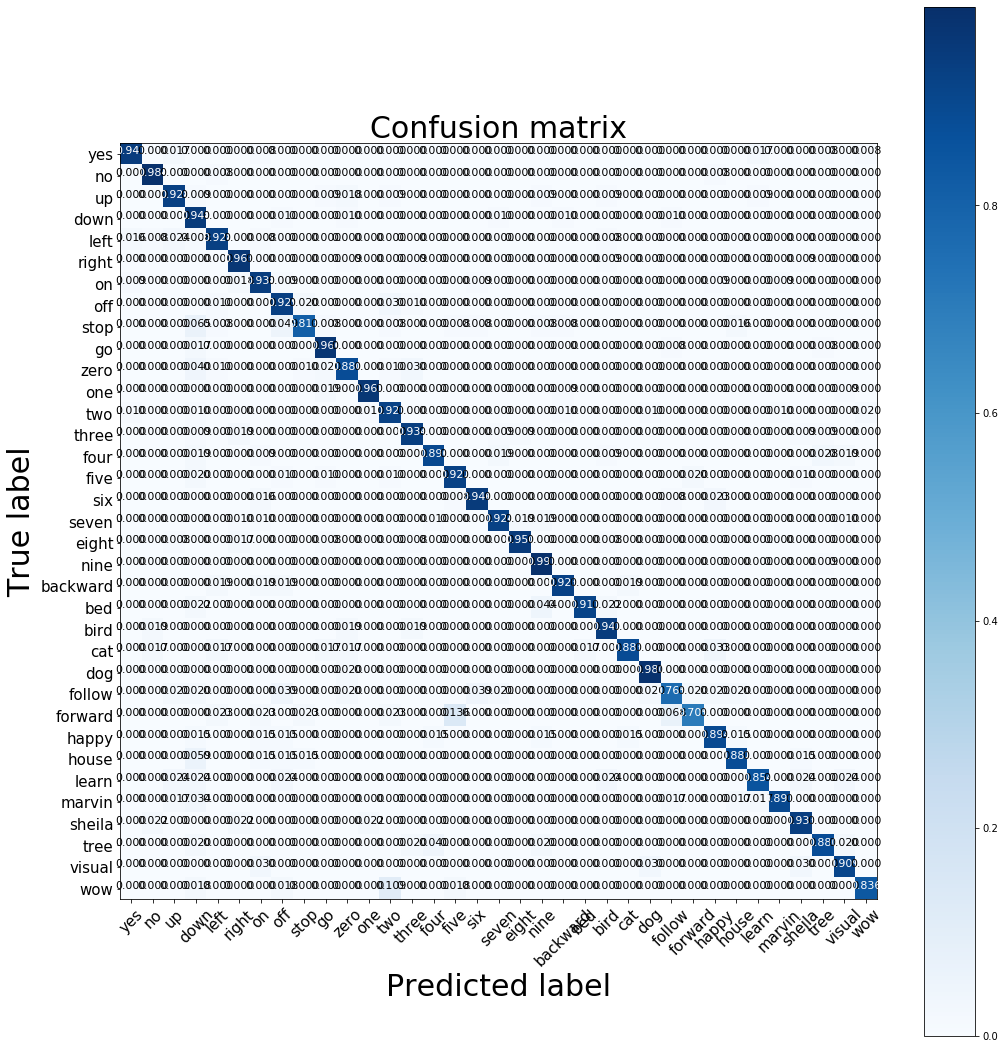

In [ ]:
y_pred = model.predict(au, verbose=1)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(cl, np.argmax(y_pred,1))
print(set(cl))
#15. setting classes for Confusion matrix

#LRcmd
classes=[ 'yes', 'no' , 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go',
                         'zero' , 'one' , 'two' , 'three' , 'four' , 'five' , 'six' , 
                         'seven' ,  'eight' , 'nine' , 'backward', 'bed', 'bird', 'cat', 'dog',
                         'follow', 'forward', 'happy', 'house', 'learn', 'marvin', 'sheila', 'tree',
                         'visual', 'wow']
#16. plot confusion matrix
import matr
matr.plot_confusion_matrix(cm,classes, normalize=True)

# EXP 10

In [ ]:

from keras.models import Model, load_model
from keras.layers import Input, Activation, Concatenate, Permute, Reshape, Flatten, Lambda, Dot, Softmax
from keras.layers import Add, Dropout, BatchNormalization, Conv2D, Reshape, MaxPooling2D, MaxPooling1D, Dense, LSTM, Bidirectional
from keras import backend as K
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from keras import backend as K
from keras import optimizers
from kapre.time_frequency import Melspectrogram, Spectrogram
import keras
# Importing the important libraries
from keras.layers import Dense, GlobalAveragePooling2D, GlobalAveragePooling1D
from keras.models import Model
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from kapre.utils import Normalization2D
nCategories=36
samplingrate = 16000
inputLength = 16000
"""
Base fully convolutional model for speech recognition
"""
"""
        %%%%%%%%%%%%%%%%transformer_depth = 8
        block = TransformerBlock('Transformer', num_heads=8)
        act_layer = TransformerACT()
        next_input = input  # (batch_size, sequence_length, input_size)
        for i in range(transformer_depth):
            next_input = block(next_input, step=i)
            next_input, act_weighted_output = act_layer(next_input)
        act_layer.finalize()  # adds loss
        result = act_weighted_output
"""
inputs = Input((16000,))

x = Reshape((1, -1)) (inputs)

x = Melspectrogram(n_dft=1024, n_hop=128, input_shape=(1, 16000),
                          padding='same', sr=samplingrate, n_mels=80,
                          fmin=40.0, fmax=samplingrate/2, power_melgram=1.0,
                          return_decibel_melgram=True, trainable_fb=False,
                          trainable_kernel=False,
                          name='mel_stft') (x)

x = Normalization2D(int_axis=0)(x)
x = Conv2D(32, (3,3) ,  padding='same') (x)
x = BatchNormalization() (x)
x= Activation('relu')(x)
x = Conv2D(64, (3,3) ,  padding='same') (x)
x = BatchNormalization() (x)
x= Activation('relu')(x)
x = Conv2D(1, (3,3) ,  padding='same') (x)
x = BatchNormalization() (x)
x= Activation('relu')(x)
x = Permute((2,1,3)) (x) #this is strange - but now we have (batch_size, sequence, vec_dim)
print((x.shape))
zee = Lambda(lambda q: K.squeeze(q, -1), name='squeeze_last_dim') (x) #keras.backend.squeeze(x, axis)


transformer_depth = 2
block = TransformerBlock('Transformer', num_heads=4)
act_layer = TransformerACT()
print((zee.shape))
next_input = zee  # (batch_size, sequence_length, input_size)
for i in range(transformer_depth):
    next_input = block(next_input,)  # adds loss
    print((next_input.shape))
    next_input = Dropout(0.25)(next_input)
    next_input = MaxPooling1D (2,2)(next_input)
    #next_input, act_weighted_output = act_layer(next_input)
    print((next_input.shape),'1')
    print((act_weighted_output.shape),'2')
act_layer.finalize()  # adds loss
result = next_input
x = result
print((x.shape))
#x = Lambda(lambda q: q[:,64]) (x) 
x= Flatten()(x)
print((x.shape))

output = Dense(36, activation = 'softmax')(x)
print((output.shape))
model = Model(inputs=[inputs], outputs=[output])

model.compile(optimizer='adam', loss=['sparse_categorical_crossentropy'], metrics=['sparse_categorical_accuracy'])


(?, ?, 80, 1)
(?, ?, 80)
(?, 125, 80)
(?, 62, 80) 1
(?, 62, 80) 2
(?, 62, 80)
(?, 31, 80) 1
(?, 62, 80) 2
(?, 31, 80)
(?, ?)
(?, 36)


In [ ]:
model.save('model_transformer15.h5')

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.001
    drop = 0.4
    epochs_drop = 7.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=12, verbose=1)
checkpointer = ModelCheckpoint('model_transformer15.h5', monitor='val_sparse_categorical_accuracy', verbose=1, mode=min, save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 50, verbose=1,  use_multiprocessing=True, workers=64,
callbacks=[earlystopper, checkpointer, lrate ])

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:680: RuntimeWarning: ModelCheckpoint mode <built-in function min> is unknown, fallback to auto mode.
  RuntimeWarning)


Epoch 1/50
Changing learning rate to 0.001
4149/4149 [==============================] - 3602s 868ms/step - loss: 1.0126 - sparse_categorical_accuracy: 0.7183 - val_loss: 0.7918 - val_sparse_categorical_accuracy: 0.7668

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.76683, saving model to model_transformer15.h5
Epoch 2/50
Changing learning rate to 0.001
4149/4149 [==============================] - 385s 93ms/step - loss: 0.5372 - sparse_categorical_accuracy: 0.8451 - val_loss: 0.5391 - val_sparse_categorical_accuracy: 0.8445

Epoch 00002: val_sparse_categorical_accuracy improved from 0.76683 to 0.84450, saving model to model_transformer15.h5


OSError: ignored

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.001
    drop = 0.4
    epochs_drop = 6.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=12, verbose=1)
checkpointer = ModelCheckpoint('model_transformer13.h5', monitor='val_sparse_categorical_accuracy', verbose=1, mode=min, save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 50, verbose=1, 
callbacks=[earlystopper, checkpointer, lrate ])

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:680: RuntimeWarning: ModelCheckpoint mode <built-in function min> is unknown, fallback to auto mode.
  RuntimeWarning)


Epoch 1/50
Changing learning rate to 0.001
4149/4149 [==============================] - 372s 90ms/step - loss: 0.4459 - sparse_categorical_accuracy: 0.8720 - val_loss: 0.5162 - val_sparse_categorical_accuracy: 0.8472

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.84717, saving model to model_transformer13.h5
Epoch 2/50
Changing learning rate to 0.001
4149/4149 [==============================] - 387s 93ms/step - loss: 0.3948 - sparse_categorical_accuracy: 0.8870 - val_loss: 0.4265 - val_sparse_categorical_accuracy: 0.8760

Epoch 00002: val_sparse_categorical_accuracy improved from 0.84717 to 0.87600, saving model to model_transformer13.h5
Epoch 3/50
Changing learning rate to 0.001
4149/4149 [==============================] - 393s 95ms/step - loss: 0.3610 - sparse_categorical_accuracy: 0.8975 - val_loss: 0.3933 - val_sparse_categorical_accuracy: 0.8887

Epoch 00003: val_sparse_categorical_accuracy improved from 0.87600 to 0.88867, saving model to model_transformer1

# EXP 11

In [ ]:

from keras.models import Model, load_model
from keras.layers import Input, Activation, Concatenate, Permute, Reshape, Flatten, Lambda, Dot, Softmax
from keras.layers import Add, Dropout, BatchNormalization, Conv2D, Reshape, MaxPooling2D, Dense, LSTM, Bidirectional
from keras import backend as K
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from keras import backend as K
from keras import optimizers
from kapre.time_frequency import Melspectrogram, Spectrogram
import keras
# Importing the important libraries
from keras.layers import Dense, GlobalAveragePooling2D, GlobalAveragePooling1D
from keras.models import Model
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from kapre.utils import Normalization2D
nCategories=36
samplingrate = 16000
inputLength = 16000
"""
Base fully convolutional model for speech recognition
"""
"""
        %%%%%%%%%%%%%%%%transformer_depth = 8
        block = TransformerBlock('Transformer', num_heads=8)
        act_layer = TransformerACT()
        next_input = input  # (batch_size, sequence_length, input_size)
        for i in range(transformer_depth):
            next_input = block(next_input, step=i)
            next_input, act_weighted_output = act_layer(next_input)
        act_layer.finalize()  # adds loss
        result = act_weighted_output
"""
inputs = Input((16000,))

x = Reshape((1, -1)) (inputs)

x = Melspectrogram(n_dft=1024, n_hop=128, input_shape=(1, 16000),
                          padding='same', sr=samplingrate, n_mels=80,
                          fmin=40.0, fmax=samplingrate/2, power_melgram=1.0,
                          return_decibel_melgram=True, trainable_fb=False,
                          trainable_kernel=False,
                          name='mel_stft') (x)

x = Normalization2D(int_axis=0)(x)
x = Conv2D(32, (3,3) ,  padding='same') (x)
x = BatchNormalization() (x)
x= Activation('relu')(x)
x = Conv2D(64, (3,3) ,  padding='same') (x)
x = BatchNormalization() (x)
x= Activation('relu')(x)
x = Conv2D(1, (3,3) ,  padding='same') (x)
x = BatchNormalization() (x)
x= Activation('relu')(x)
x = Permute((2,1,3)) (x) #this is strange - but now we have (batch_size, sequence, vec_dim)
print((x.shape))
zee = Lambda(lambda q: K.squeeze(q, -1), name='squeeze_last_dim') (x) #keras.backend.squeeze(x, axis)


transformer_depth = 6
block = TransformerBlock('Transformer', num_heads=4)
act_layer = TransformerACT()
print((zee.shape))
next_input = zee  # (batch_size, sequence_length, input_size)
for i in range(transformer_depth):
    next_input = block(next_input,)  # adds loss
    print((next_input.shape))
    next_input = Dropout(0.25)(next_input)
    next_input, act_weighted_output = act_layer(next_input)
    print((next_input.shape),'1')
    print((act_weighted_output.shape),'2')
act_layer.finalize()  # adds loss
result = act_weighted_output
x = result
print((x.shape))
#x = Lambda(lambda q: q[:,64]) (x) 
x= GlobalAveragePooling1D()(x)
print((x.shape))
output = Dense(36, activation = 'softmax')(x)
print((output.shape))
model = Model(inputs=[inputs], outputs=[output])

model.compile(optimizer='adam', loss=['sparse_categorical_crossentropy'], metrics=['sparse_categorical_accuracy'])














(?, ?, 80, 1)
(?, ?, 80)
(?, 125, 80)
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
(?, 125, 80) 1
(?, 125, 80) 2
(?, 125, 80)
(?, 125, 80) 1
(?, 125, 80) 2
(?, 125, 80)
(?, 125, 80) 1
(?, 125, 80) 2
(?, 125, 80)
(?, 125, 80) 1
(?, 125, 80) 2
(?, 125, 80)
(?, 125, 80) 1
(?, 125, 80) 2
(?, 125, 80)
(?, 125, 80) 1
(?, 125, 80) 2
(?, 125, 80)
(?, 80)
(?, 36)



In [ ]:
model.save('model_Audiotransformer.h5')

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.001
    drop = 0.4
    epochs_drop = 7.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=10, verbose=1)
checkpointer = ModelCheckpoint('model_transformer9.h5', monitor='val_sparse_categorical_accuracy', verbose=1, mode=min, save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 35, verbose=1,   use_multiprocessing=True, workers=64,
callbacks=[earlystopper, checkpointer, lrate ])

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:680: RuntimeWarning: ModelCheckpoint mode <built-in function min> is unknown, fallback to auto mode.
  RuntimeWarning)




Epoch 1/35
Changing learning rate to 0.001
4232/4233 [============================>.] - ETA: 0s - loss: 1.0533 - sparse_categorical_accuracy: 0.7184

4233/4233 [==============================] - 4256s 1s/step - loss: 1.0531 - sparse_categorical_accuracy: 0.7184 - val_loss: 0.6153 - val_sparse_categorical_accuracy: 0.8333

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.83333, saving model to model_transformer9.h5
Epoch 2/35
Changing learning rate to 0.001
4231/4233 [============================>.] - ETA: 0s - loss: 0.5606 - sparse_categorical_accuracy: 0.8512
Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.83333, saving model to model_transformer9.h5
4233/4233 [==============================] - 326s 77ms/step - loss: 0.5605 - sparse_categorical_accuracy: 0.8512 - val_loss: 0.6683 - val_sparse_categorical_accuracy: 0.8512

Epoch 00002: val_sparse_categorical_accuracy improved from 0.83333 to 0.85115, saving model to model_transformer9.h5
Epoch

Process ForkPoolWorker-352:
Process ForkPoolWorker-322:
Process ForkPoolWorker-338:
Process ForkPoolWorker-381:
Process ForkPoolWorker-351:
Process ForkPoolWorker-356:
Process ForkPoolWorker-263:
Process ForkPoolWorker-275:
Process ForkPoolWorker-365:
Process ForkPoolWorker-300:
Process ForkPoolWorker-360:
Process ForkPoolWorker-276:
Process ForkPoolWorker-354:
Process ForkPoolWorker-264:
Process ForkPoolWorker-296:
Process ForkPoolWorker-370:
Process ForkPoolWorker-339:
Process ForkPoolWorker-377:
Process ForkPoolWorker-374:
Process ForkPoolWorker-298:
Process ForkPoolWorker-366:
Process ForkPoolWorker-258:
Process ForkPoolWorker-312:
Process ForkPoolWorker-262:
Process ForkPoolWorker-280:
Process ForkPoolWorker-278:
Process ForkPoolWorker-324:
Process ForkPoolWorker-279:
Process ForkPoolWorker-271:
Process ForkPoolWorker-270:
Process ForkPoolWorker-272:
Process ForkPoolWorker-357:
Process ForkPoolWorker-344:
Process ForkPoolWorker-297:
Process ForkPoolWorker-306:
Process ForkPoolWork


Epoch 00002: val_sparse_categorical_accuracy improved from 0.83333 to 0.85115, saving model to model_transformer9.h5


KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
  File "/usr/lib/python3.6/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 334, in get
    with self._rlock:
KeyboardInterrupt
  File "/usr/lib/python3.6/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
  File "/usr/lib/python3.6/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
KeyboardInterrupt
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most rece

KeyboardInterrupt: ignored

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.001
    drop = 0.4
    epochs_drop = 7.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=12, verbose=1)
checkpointer = ModelCheckpoint('model_Audiotransformer.h5', monitor='val_sparse_categorical_accuracy', verbose=1, mode=min, save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 50, verbose=1,   
callbacks=[earlystopper, checkpointer, lrate ])

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:680: RuntimeWarning: ModelCheckpoint mode <built-in function min> is unknown, fallback to auto mode.
  RuntimeWarning)


Epoch 1/50
Changing learning rate to 0.001
4233/4233 [==============================] - 389s 92ms/step - loss: 0.4165 - sparse_categorical_accuracy: 0.8896 - val_loss: 0.3882 - val_sparse_categorical_accuracy: 0.8946

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.89458, saving model to model_Audiotransformer.h5
Epoch 2/50
Changing learning rate to 0.001
4233/4233 [==============================] - 392s 92ms/step - loss: 0.3843 - sparse_categorical_accuracy: 0.8993 - val_loss: 0.3821 - val_sparse_categorical_accuracy: 0.9004

Epoch 00002: val_sparse_categorical_accuracy improved from 0.89458 to 0.90035, saving model to model_Audiotransformer.h5
Epoch 3/50
Changing learning rate to 0.001
4233/4233 [==============================] - 387s 91ms/step - loss: 0.3652 - sparse_categorical_accuracy: 0.9037 - val_loss: 0.3587 - val_sparse_categorical_accuracy: 0.9084

Epoch 00003: val_sparse_categorical_accuracy improved from 0.90035 to 0.90838, saving model to model_Audiot

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.00016000000000000004
    drop = 0.4
    epochs_drop = 6.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=12, verbose=1)
checkpointer = ModelCheckpoint('model_Audiotransformer.h5', monitor='val_sparse_categorical_accuracy', verbose=1, mode=min, save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 50, verbose=1,   
callbacks=[earlystopper, checkpointer, lrate ])

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:680: RuntimeWarning: ModelCheckpoint mode <built-in function min> is unknown, fallback to auto mode.
  RuntimeWarning)


Epoch 1/50
Changing learning rate to 0.00016000000000000004
4233/4233 [==============================] - 394s 93ms/step - loss: 0.1633 - sparse_categorical_accuracy: 0.9641 - val_loss: 0.2612 - val_sparse_categorical_accuracy: 0.9395

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.93951, saving model to model_Audiotransformer.h5
Epoch 2/50
Changing learning rate to 0.00016000000000000004
4233/4233 [==============================] - 390s 92ms/step - loss: 0.1589 - sparse_categorical_accuracy: 0.9651 - val_loss: 0.2645 - val_sparse_categorical_accuracy: 0.9378

Epoch 00002: val_sparse_categorical_accuracy did not improve from 0.93951
Epoch 3/50
Changing learning rate to 0.00016000000000000004
4233/4233 [==============================] - 388s 92ms/step - loss: 0.1588 - sparse_categorical_accuracy: 0.9646 - val_loss: 0.2692 - val_sparse_categorical_accuracy: 0.9350

Epoch 00003: val_sparse_categorical_accuracy did not improve from 0.93951
Epoch 4/50
Changing learning 

# best result transformer below

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.0004
    drop = 0.4
    epochs_drop = 6.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=12, verbose=1)
checkpointer = ModelCheckpoint('model_Audiotransformer.h5', monitor='val_sparse_categorical_accuracy', verbose=1, mode=min, save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 50, verbose=1,   
callbacks=[earlystopper, checkpointer, lrate ])

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:680: RuntimeWarning: ModelCheckpoint mode <built-in function min> is unknown, fallback to auto mode.
  RuntimeWarning)




Epoch 1/50
ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Tensor'>):
<tf.Tensor 'IsVariableInitialized_142:0' shape=() dtype=bool>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/usr/local/lib/python3.6/dist-packages/keras/callbacks.py", line 924, in on_epoch_begin
    lr = float(K.get_value(self.model.optimizer.lr))  File "/usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py", line 2669, in get_value
    return x.eval(session=get_session())  File "/usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py", line 216, in get_session
    [tf.is_variable_initialized(v) for v in candidate_vars])  File "/usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py", line 216, in <listcomp>
    [tf.is_variable_initialized(v) for v in candidate_vars])  File "/usr/local/lib/python3.6/dist-packages/tensorflow_core/p

KeyboardInterrupt: ignored

{'val_loss': [0.29790247892624283, 0.29317056218229504, 0.3044226131996656, 0.2805388691352613, 0.2988331836749272, 0.26818085522447005, 0.2761601277301649, 0.2775197667013629, 0.2905332660078105, 0.2767178960683116, 0.2747643734384553, 0.28284772791821194, 0.2684333296941526, 0.2746650768578591, 0.2922361850603876, 0.28545916405876715, 0.3001752348998225, 0.27669497468250703, 0.280972717408405, 0.28685135527861766, 0.2960593765938138, 0.29546229857726986, 0.2881459346916302, 0.3230981938877558, 0.30002018468207625], 'val_sparse_categorical_accuracy': [0.9324799190802746, 0.929718872509807, 0.9277108430144299, 0.935240961701037, 0.9334839349051556, 0.9385040118751755, 0.9380020061171198, 0.9367469850792942, 0.9327309214207063, 0.941265057727515, 0.9385040115161114, 0.9380020050399275, 0.9442771041249655, 0.9412650598818997, 0.9412650602409639, 0.9385040136704962, 0.9367469836430378, 0.9390060208648084, 0.9410140535917627, 0.9425200758928276, 0.9362449771668537, 0.9390060215829367, 0.93

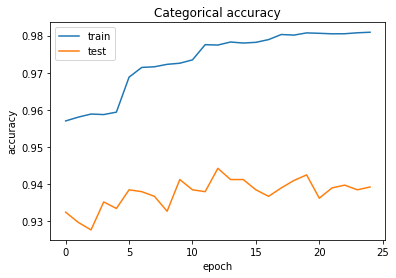

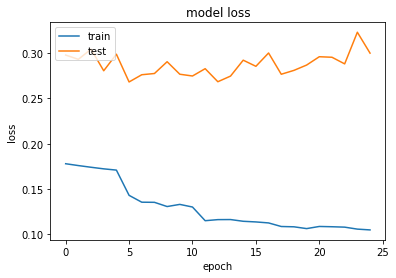

In [ ]:
#9.show results matlabpy
print(results.history)
# summarize history for categorical accuracy
plt.plot(results.history['sparse_categorical_accuracy'])
plt.plot(results.history['val_sparse_categorical_accuracy'])
plt.title('Categorical accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
au, cl = test1.__getitem__(1)
valEval = model.evaluate_generator(valGen, verbose=1,use_multiprocessing=True, workers=32)
trainEval = model.evaluate_generator(trainGen, verbose=1, use_multiprocessing=True, workers=32)
testEval = model.evaluate(au, cl, verbose=1)
print('Evaluation scores: \nMetrics: {} \nTrain: {} \nValidation: {} \nTest: {}'.format(model.metrics_names, trainEval, valEval, testEval) )
y_pred = model.predict(au, verbose=1)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(cl, np.argmax(y_pred,1))
print(set(cl))
#15. setting classes for Confusion matrix

#LRcmd
classes=[ 'yes', 'no' , 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go',
                         'zero' , 'one' , 'two' , 'three' , 'four' , 'five' , 'six' , 
                         'seven' ,  'eight' , 'nine' , 'backward', 'bed', 'bird', 'cat', 'dog',
                         'follow', 'forward', 'happy', 'house', 'learn', 'marvin', 'sheila', 'tree',
                         'visual', 'wow']
#16. plot confusion matrix
import matr
matr.plot_confusion_matrix(cm,classes, normalize=True)



Normalized confusion matrix


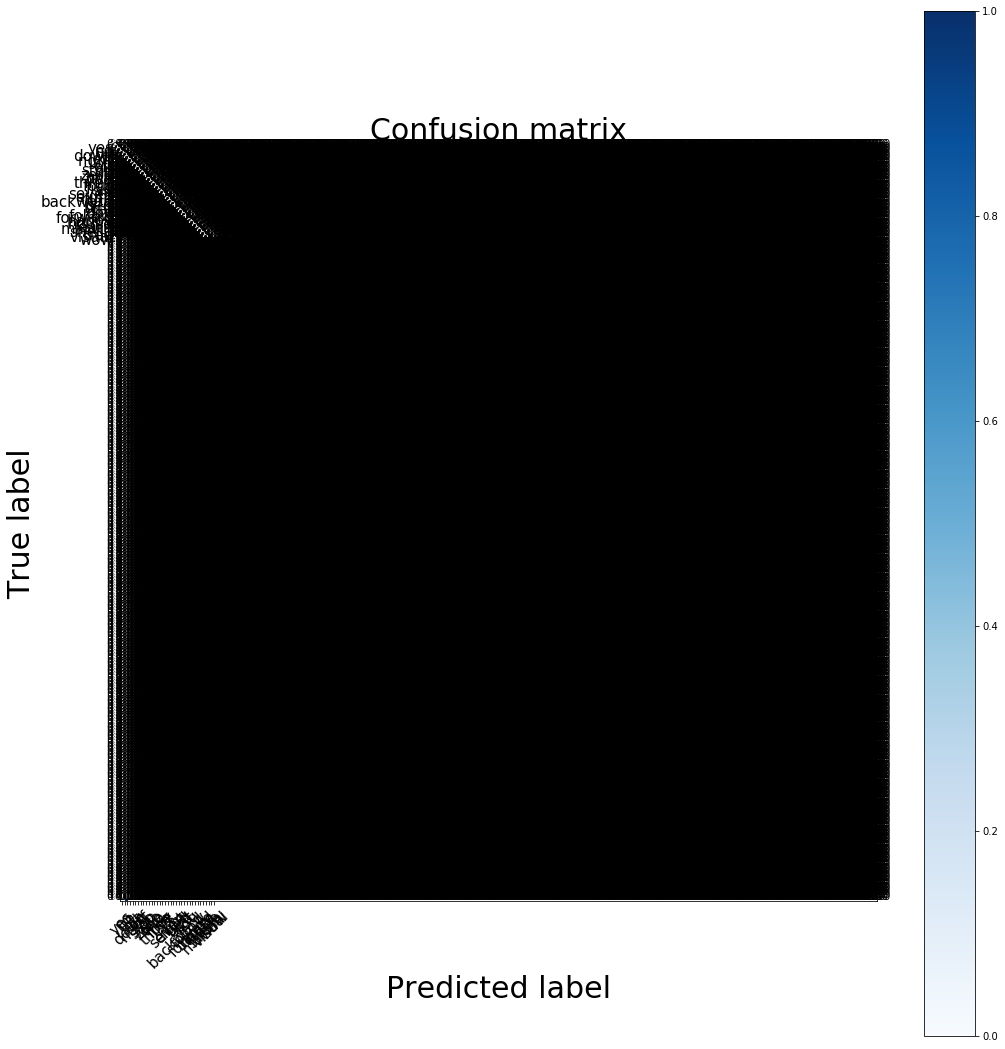

In [ ]:
import matr
matr.plot_confusion_matrix(cm,classes, normalize=True)

# EXP 13

In [ ]:

from keras.models import Model, load_model
from keras.layers import Input, Activation, Concatenate, Permute, Reshape, Flatten, Lambda, Dot, Softmax
from keras.layers import Add, Dropout, BatchNormalization, Conv2D, Reshape, MaxPooling2D, Dense, LSTM, Bidirectional
from keras import backend as K
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from keras import backend as K
from keras import optimizers
from kapre.time_frequency import Melspectrogram, Spectrogram
import keras
from librosa.feature import chroma_stft
# Importing the important libraries
from keras.layers import Dense, GlobalAveragePooling2D, GlobalAveragePooling1D
from keras.models import Model
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from kapre.utils import Normalization2D
nCategories=36
samplingrate = 16000
inputLength = 16000
"""
Base fully convolutional model for speech recognition
"""
"""
        %%%%%%%%%%%%%%%%transformer_depth = 8
        block = TransformerBlock('Transformer', num_heads=8)
        act_layer = TransformerACT()
        next_input = input  # (batch_size, sequence_length, input_size)
        for i in range(transformer_depth):
            next_input = block(next_input, step=i)
            next_input, act_weighted_output = act_layer(next_input)
        act_layer.finalize()  # adds loss
        result = act_weighted_output
"""
inputs = Input((16000,))

x = Reshape((1, -1)) (inputs)

x = Melspectrogram(n_dft=1024, n_hop=128, input_shape=(1, 16000),
                          padding='same', sr=samplingrate, n_mels=80,
                          fmin=40.0, fmax=samplingrate/2, power_melgram=1.0,
                          return_decibel_melgram=True, trainable_fb=False,
                          trainable_kernel=False,
                          name='mel_stft') (x)
print((x.shape), 'Melspectogram')
x = Normalization2D(int_axis=0)(x)
print((x.shape), 'Normalized2d')

x = Permute((2,1,3)) (x) #this is strange - but now we have (batch_size, sequence, vec_dim)
print((x.shape), 'permute')


x = Conv2D(32, (3,3) , activation='relu', padding='same') (x)
c1 = BatchNormalization() (x)
print((c1.shape), '1stconv')
c1 = Conv2D(32, (3,3) , activation='relu', padding='same') (x)
c1 = BatchNormalization() (c1)
c2 = Conv2D(64, (3,3) , activation='relu', padding='same') (c1)
c2 = BatchNormalization() (c2)
c1 = Conv2D(64, (3,3) , activation='relu', padding='same') (x)
c1 = BatchNormalization() (c1)
print((c1.shape), '3rdconv')
p2 = Dropout(0.15) (c1)
c3 = Conv2D(128, (3,3) , activation='relu', padding='same') (p2)
c3 = BatchNormalization() (c3)
p3 = Dropout(0.15) (c3)
c4 = Conv2D(256, (3,3) , activation='relu', padding='same') (p3)
c4 = BatchNormalization() (c4)
p4 = Dropout(0.15) (c4)
c5 = Conv2D(512, (3,3) , activation='relu', padding='same') (p4)
x = BatchNormalization() (c5)
print((x.shape), '2ndlastconv')

x = Conv2D(1, (3,3) ,  padding='same') (x)
x = BatchNormalization() (x)
x= Activation('relu')(x)
print((x.shape), 'lastconv')

zee = Lambda(lambda q: K.squeeze(q, -1), name='squeeze_last_dim') (x) #keras.backend.squeeze(x, axis)


transformer_depth = 6
block = TransformerBlock('Transformer', num_heads=4)
act_layer = TransformerACT()
print((zee.shape), 'after squeez last dimention')
next_input = zee  # (batch_size, sequence_length, input_size)
for i in range(transformer_depth):
    next_input = block(next_input,)  # adds loss
    print((next_input.shape))
    next_input = Dropout(0.25)(next_input)
    next_input, act_weighted_output = act_layer(next_input)
    print((next_input.shape),'1')
    print((act_weighted_output.shape),'2')
act_layer.finalize()  # adds loss
result = act_weighted_output
x = result
print((x.shape), 'actweightedoutput')
#x = Lambda(lambda q: q[:,64]) (x) 
x= GlobalAveragePooling1D()(x)
print((x.shape), 'Global_AP')
x = Dense(64, activation = 'relu')(x)
print((x.shape), 'dense64')
output = Dense(36, activation = 'softmax')(x)
print((output.shape))
model = Model(inputs=[inputs], outputs=[output])

model.compile(optimizer='adam', loss=['sparse_categorical_crossentropy'], metrics=['sparse_categorical_accuracy'])





(?, 80, ?, 1) Melspectogram
(?, 80, ?, 1) Normalized2d
(?, ?, 80, 1) permute









(?, ?, 80, 32) 1stconv
(?, ?, 80, 64) 3rdconv
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
(?, ?, 80, 512) 2ndlastconv
(?, ?, 80, 1) lastconv
(?, ?, 80) after squeez last dimention
(?, 125, 80)
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
(?, 125, 80) 1
(?, 125, 80) 2
(?, 125, 80)
(?, 125, 80) 1
(?, 125, 80) 2
(?, 125, 80)
(?, 125, 80) 1
(?, 125, 80) 2
(?, 125, 80)
(?, 125, 80) 1
(?, 125, 80) 2
(?, 125, 80)
(?, 125, 80) 1
(?, 125, 80) 2
(?, 125, 80)
(?, 125, 80) 1
(?, 125, 80) 2
(?, 125, 80) actweightedoutput
(?, 80) Global_AP
(?, 64) dense64
(?, 36)



In [ ]:
model.load_weights('model_Audiotransformerqq.h5')

In [ ]:
model.save('model_Audiotransformerqq.h5')

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.001
    drop = 0.4
    epochs_drop = 7.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=10, verbose=1)
checkpointer = ModelCheckpoint('model_Audiotransformerqq.h5', monitor='val_sparse_categorical_accuracy', verbose=1, mode=min, save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 35, verbose=1,   use_multiprocessing=True, workers=64,
callbacks=[earlystopper, checkpointer, lrate ])

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:680: RuntimeWarning: ModelCheckpoint mode <built-in function min> is unknown, fallback to auto mode.
  RuntimeWarning)




Epoch 1/35
Changing learning rate to 0.001
4245/4245 [==============================] - 3688s 869ms/step - loss: 1.1156 - sparse_categorical_accuracy: 0.6979 - val_loss: 0.7470 - val_sparse_categorical_accuracy: 0.8076

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.80763, saving model to model_Audiotransformerqq.h5
Epoch 2/35
Changing learning rate to 0.001
4245/4245 [==============================] - 1967s 463ms/step - loss: 0.5788 - sparse_categorical_accuracy: 0.8490 - val_loss: 0.6082 - val_sparse_categorical_accuracy: 0.8479

Epoch 00002: val_sparse_categorical_accuracy improved from 0.80763 to 0.84794, saving model to model_Audiotransformerqq.h5


OSError: ignored

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.001
    drop = 0.4
    epochs_drop = 6.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=12, verbose=1)
checkpointer = ModelCheckpoint('model_Audiotransformerqq.h5', monitor='val_sparse_categorical_accuracy', verbose=1, mode=min, save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 50, verbose=1,   use_multiprocessing=True, workers=64,
callbacks=[earlystopper, checkpointer, lrate ])

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:680: RuntimeWarning: ModelCheckpoint mode <built-in function min> is unknown, fallback to auto mode.
  RuntimeWarning)


Epoch 1/50
Changing learning rate to 0.001
4245/4245 [==============================] - 1978s 466ms/step - loss: 0.4910 - sparse_categorical_accuracy: 0.8738 - val_loss: 0.5097 - val_sparse_categorical_accuracy: 0.8696

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.86959, saving model to model_Audiotransformerqq.h5
Epoch 2/50
Changing learning rate to 0.001
4245/4245 [==============================] - 1974s 465ms/step - loss: 0.4357 - sparse_categorical_accuracy: 0.8905 - val_loss: 0.4975 - val_sparse_categorical_accuracy: 0.8747

Epoch 00002: val_sparse_categorical_accuracy improved from 0.86959 to 0.87473, saving model to model_Audiotransformerqq.h5
Changing learning rate to 0.001

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.86959, saving model to model_Audiotransformerqq.h5
Epoch 3/50
Changing learning rate to 0.001
4245/4245 [==============================] - 1976s 466ms/step - loss: 0.4051 - sparse_categorical_accuracy: 0.9004 - val_

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.00016000000000000004
    drop = 0.4
    epochs_drop = 7.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=12, verbose=1)
checkpointer = ModelCheckpoint('model_Audiotransformerqq.h5', monitor='val_sparse_categorical_accuracy', verbose=1, mode=min, save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 50, verbose=1,   use_multiprocessing=True, workers=64,
callbacks=[earlystopper, checkpointer, lrate ])

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:680: RuntimeWarning: ModelCheckpoint mode <built-in function min> is unknown, fallback to auto mode.
  RuntimeWarning)




Epoch 1/50
Changing learning rate to 0.00016000000000000004
4245/4245 [==============================] - 4411s 1s/step - loss: 0.2010 - sparse_categorical_accuracy: 0.9595 - val_loss: 0.2862 - val_sparse_categorical_accuracy: 0.9334

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.93344, saving model to model_Audiotransformerqq.h5
Epoch 2/50
Changing learning rate to 0.00016000000000000004
4245/4245 [==============================] - 2820s 664ms/step - loss: 0.1956 - sparse_categorical_accuracy: 0.9609 - val_loss: 0.2931 - val_sparse_categorical_accuracy: 0.9370

Epoch 00002: val_sparse_categorical_accuracy improved from 0.93344 to 0.93696, saving model to model_Audiotransformerqq.h5
Epoch 3/50
Changing learning rate to 0.00016000000000000004
4245/4245 [==============================] - 2819s 664ms/step - loss: 0.2018 - sparse_categorical_accuracy: 0.9591 - val_loss: 0.2899 - val_sparse_categorical_accuracy: 0.9351
Changing learning rate to 0.00016000000000000004

# EXP 18

In [ ]:

from keras.models import Model, load_model
from keras.layers import Input, Activation, Concatenate, Permute, Reshape, Flatten, Lambda, Dot, Softmax
from keras.layers import Add, Dropout, BatchNormalization, Conv2D, Reshape, MaxPooling2D, Dense, LSTM, Bidirectional
from keras import backend as K
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from keras import backend as K
from keras import optimizers
from kapre.time_frequency import Melspectrogram, Spectrogram
import keras
from librosa.feature import chroma_stft
# Importing the important libraries
from keras.layers import Dense, GlobalAveragePooling2D, GlobalAveragePooling1D
from keras.models import Model
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from kapre.utils import Normalization2D
nCategories=36
samplingrate = 16000
inputLength = 16000
"""
Base fully convolutional model for speech recognition
"""
"""
        %%%%%%%%%%%%%%%%transformer_depth = 8
        block = TransformerBlock('Transformer', num_heads=8)
        act_layer = TransformerACT()
        next_input = input  # (batch_size, sequence_length, input_size)
        for i in range(transformer_depth):
            next_input = block(next_input, step=i)
            next_input, act_weighted_output = act_layer(next_input)
        act_layer.finalize()  # adds loss
        result = act_weighted_output
"""
inputs = Input((16000,))

x = Reshape((1, -1)) (inputs)

x = Melspectrogram(n_dft=1024, n_hop=128, input_shape=(1, 16000),
                          padding='same', sr=samplingrate, n_mels=80,
                          fmin=40.0, fmax=samplingrate/2, power_melgram=1.0,
                          return_decibel_melgram=True, trainable_fb=False,
                          trainable_kernel=False,
                          name='mel_stft') (x)
print((x.shape), 'Melspectogram')
x = Normalization2D(int_axis=0)(x)
print((x.shape), 'Normalized2d')

x = Permute((2,1,3)) (x) #this is strange - but now we have (batch_size, sequence, vec_dim)
print((x.shape), 'permute')


x = Conv2D(32, (3,3) , activation='relu', padding='same') (x)
c1 = BatchNormalization() (x)
print((c1.shape), '1stconv')
c1 = Conv2D(64, (3,3) , activation='relu', padding='same') (x)
c1 = BatchNormalization() (c1)
print((c1.shape), '2ndconv')
c2 = Conv2D(32, (3,3) , activation='relu', padding='same') (c1)
x = BatchNormalization() (c2)

print((x.shape), '2ndlastconv')
x = Conv2D(1, (3,3) ,  padding='same') (x)
x = BatchNormalization() (x)
x= Activation('relu')(x)
print((x.shape), 'lastconv')

zee = Lambda(lambda q: K.squeeze(q, -1), name='squeeze_last_dim') (x) #keras.backend.squeeze(x, axis)


transformer_depth = 6
block = TransformerBlock('Transformer', num_heads=4)
act_layer = TransformerACT()
print((zee.shape), 'after squeez last dimention')
next_input = zee  # (batch_size, sequence_length, input_size)
for i in range(transformer_depth):
    next_input = block(next_input,)  # adds loss
    print((next_input.shape))
    next_input = Dropout(0.25)(next_input)
    next_input, act_weighted_output = act_layer(next_input)
    print((next_input.shape),'1')
    print((act_weighted_output.shape),'2')
act_layer.finalize()  # adds loss
result = act_weighted_output
x = result
print((x.shape), 'actweightedoutput')
#x = Lambda(lambda q: q[:,64]) (x) 
x= GlobalAveragePooling1D()(x)
print((x.shape), 'Global_AP')
x = Dense(64, activation = 'relu')(x)
print((x.shape), 'dense64')
output = Dense(36, activation = 'softmax')(x)
print((output.shape))
model = Model(inputs=[inputs], outputs=[output])

model.compile(optimizer='adam', loss=['sparse_categorical_crossentropy'], metrics=['sparse_categorical_accuracy'])





(?, 80, ?, 1) Melspectogram
(?, 80, ?, 1) Normalized2d
(?, ?, 80, 1) permute









(?, ?, 80, 32) 1stconv
(?, ?, 80, 64) 2ndconv
(?, ?, 80, 32) 2ndlastconv
(?, ?, 80, 1) lastconv
(?, ?, 80) after squeez last dimention
(?, 125, 80)
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
(?, 125, 80) 1
(?, 125, 80) 2
(?, 125, 80)
(?, 125, 80) 1
(?, 125, 80) 2
(?, 125, 80)
(?, 125, 80) 1
(?, 125, 80) 2
(?, 125, 80)
(?, 125, 80) 1
(?, 125, 80) 2
(?, 125, 80)
(?, 125, 80) 1
(?, 125, 80) 2
(?, 125, 80)
(?, 125, 80) 1
(?, 125, 80) 2
(?, 125, 80) actweightedoutput
(?, 80) Global_AP
(?, 64) dense64
(?, 36)



In [ ]:
model.load_weights('model_Audiotransformer18.h5')

In [ ]:
model.save('model_Audiotransformer18.h5')

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.001
    drop = 0.4
    epochs_drop = 7.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=10, verbose=1)
checkpointer = ModelCheckpoint('model_Audiotransformer18.h5', monitor='val_sparse_categorical_accuracy', verbose=1,  save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 35, verbose=1,   use_multiprocessing=True, workers= 120,
callbacks=[earlystopper, checkpointer, lrate ])



Epoch 1/35
Changing learning rate to 0.001
5094/5094 [==============================] - 4339s 852ms/step - loss: 1.1947 - sparse_categorical_accuracy: 0.6729 - val_loss: 0.6870 - val_sparse_categorical_accuracy: 0.8200

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.82000, saving model to model_Audiotransformer18.h5
Epoch 2/35
Changing learning rate to 0.001
5094/5094 [==============================] - 384s 75ms/step - loss: 0.5744 - sparse_categorical_accuracy: 0.8505 - val_loss: 0.5785 - val_sparse_categorical_accuracy: 0.8538

Epoch 00002: val_sparse_categorical_accuracy improved from 0.82000 to 0.85378, saving model to model_Audiotransformer18.h5


OSError: ignored

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.001
    drop = 0.4
    epochs_drop = 7.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=12, verbose=1)
checkpointer = ModelCheckpoint('model_Audiotransformer18.h5', monitor='val_sparse_categorical_accuracy', verbose=1,  save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 45, verbose=1, 
callbacks=[earlystopper, checkpointer, lrate ])

Epoch 1/45
Changing learning rate to 0.001
5094/5094 [==============================] - 390s 77ms/step - loss: 0.5040 - sparse_categorical_accuracy: 0.8701 - val_loss: 0.5062 - val_sparse_categorical_accuracy: 0.8697

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.86973, saving model to model_Audiotransformer18.h5
Epoch 2/45
Changing learning rate to 0.001
5094/5094 [==============================] - 381s 75ms/step - loss: 0.4319 - sparse_categorical_accuracy: 0.8925 - val_loss: 0.4352 - val_sparse_categorical_accuracy: 0.8930

Epoch 00002: val_sparse_categorical_accuracy improved from 0.86973 to 0.89297, saving model to model_Audiotransformer18.h5
Epoch 3/45
Changing learning rate to 0.001
5094/5094 [==============================] - 383s 75ms/step - loss: 0.3952 - sparse_categorical_accuracy: 0.9022 - val_loss: 0.4259 - val_sparse_categorical_accuracy: 0.9003

Epoch 00003: val_sparse_categorical_accuracy improved from 0.89297 to 0.90027, saving model to model_Au

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.0004
    drop = 0.4
    epochs_drop = 7.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=12, verbose=1)
checkpointer = ModelCheckpoint('model_Audiotransformer18.h5', monitor='val_sparse_categorical_accuracy', verbose=1,  save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 45, verbose=1, 
callbacks=[earlystopper, checkpointer, lrate ])

Epoch 1/45
Changing learning rate to 0.0004
5094/5094 [==============================] - 389s 76ms/step - loss: 0.1941 - sparse_categorical_accuracy: 0.9601 - val_loss: 0.3101 - val_sparse_categorical_accuracy: 0.9332

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.93324, saving model to model_Audiotransformer18.h5
Epoch 2/45
Changing learning rate to 0.0004
5094/5094 [==============================] - 396s 78ms/step - loss: 0.1925 - sparse_categorical_accuracy: 0.9606 - val_loss: 0.2913 - val_sparse_categorical_accuracy: 0.9351

Epoch 00002: val_sparse_categorical_accuracy improved from 0.93324 to 0.93514, saving model to model_Audiotransformer18.h5
Epoch 3/45
Changing learning rate to 0.0004
5094/5094 [==============================] - 400s 78ms/step - loss: 0.1916 - sparse_categorical_accuracy: 0.9605 - val_loss: 0.3158 - val_sparse_categorical_accuracy: 0.9319

Epoch 00003: val_sparse_categorical_accuracy did not improve from 0.93514
Epoch 4/45
Changing learni

{'val_loss': [0.3100806597318198, 0.291276531888021, 0.3158449186666592, 0.2988368421792984, 0.30484379898454694, 0.3159601983186361, 0.27366799396034835, 0.28232672395738395, 0.2968683020488636, 0.2993398111011531, 0.2906099082448998, 0.3081826700954824, 0.29289496452421754, 0.2903586216875025, 0.29076930397265666, 0.2945386247457685, 0.2987875047769095, 0.29815956577658653, 0.28091618519377065, 0.30969221833589916, 0.29315995787446564, 0.29327706231458767, 0.2914958142750972, 0.2910114958680965, 0.292698240783569, 0.2914201871567481, 0.30035831690640064, 0.2925120017013034, 0.29320625584270504, 0.2861638348448921, 0.28831114819323694, 0.2956490373691997, 0.30252929809125695, 0.29399438244668213, 0.29055394185958683, 0.291944913123105, 0.29969405507719193, 0.2895480843613277, 0.29240504241472964, 0.2860554246080888, 0.28252980648665815, 0.2893425487988704], 'val_sparse_categorical_accuracy': [0.933243233126563, 0.9351351283692025, 0.9318918837083353, 0.9332432357040612, 0.935675669682

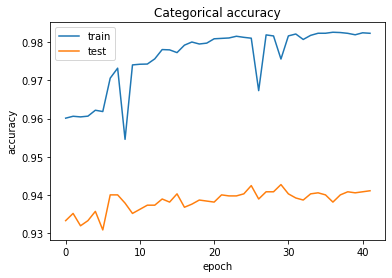

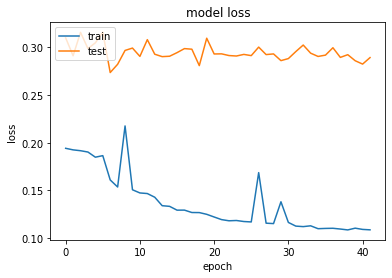

In [ ]:
#9.show results matlabpy
print(results.history)
# summarize history for categorical accuracy
plt.plot(results.history['sparse_categorical_accuracy'])
plt.plot(results.history['val_sparse_categorical_accuracy'])
plt.title('Categorical accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.00016
    drop = 0.4
    epochs_drop = 7.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=12, verbose=1)
checkpointer = ModelCheckpoint('model_Audiotransformer18.h5', monitor='val_sparse_categorical_accuracy', verbose=1,  save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 45, verbose=1, 
callbacks=[earlystopper, checkpointer, lrate ])

Epoch 1/45
Changing learning rate to 0.00016
5094/5094 [==============================] - 391s 77ms/step - loss: 0.1284 - sparse_categorical_accuracy: 0.9771 - val_loss: 0.3048 - val_sparse_categorical_accuracy: 0.9359

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.93595, saving model to model_Audiotransformer18.h5
Epoch 2/45
Changing learning rate to 0.00016
5094/5094 [==============================] - 398s 78ms/step - loss: 0.1301 - sparse_categorical_accuracy: 0.9768 - val_loss: 0.3015 - val_sparse_categorical_accuracy: 0.9384

Epoch 00002: val_sparse_categorical_accuracy improved from 0.93595 to 0.93838, saving model to model_Audiotransformer18.h5
Epoch 3/45
Changing learning rate to 0.00016
5094/5094 [==============================] - 400s 79ms/step - loss: 0.1256 - sparse_categorical_accuracy: 0.9773 - val_loss: 0.2920 - val_sparse_categorical_accuracy: 0.9373

Epoch 00003: val_sparse_categorical_accuracy did not improve from 0.93838
Epoch 4/45
Changing lea

this one

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 6.400000000000001e-05
    drop = 0.4
    epochs_drop = 14.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=16, verbose=1)
checkpointer = ModelCheckpoint('model_Audiotransformer18.h5', monitor='val_sparse_categorical_accuracy', verbose=1,  save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 45, verbose=1,  use_multiprocessing=True, workers= 120,
callbacks=[earlystopper, checkpointer, lrate ])



Epoch 1/45
Changing learning rate to 6.400000000000001e-05
5094/5094 [==============================] - 3871s 760ms/step - loss: 0.0999 - sparse_categorical_accuracy: 0.9824 - val_loss: 0.2764 - val_sparse_categorical_accuracy: 0.9397

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.93973, saving model to model_Audiotransformer18.h5
Epoch 2/45
Changing learning rate to 6.400000000000001e-05
5094/5094 [==============================] - 413s 81ms/step - loss: 0.1042 - sparse_categorical_accuracy: 0.9811 - val_loss: 0.3296 - val_sparse_categorical_accuracy: 0.9278

Epoch 00002: val_sparse_categorical_accuracy did not improve from 0.93973
Epoch 3/45
Changing learning rate to 6.400000000000001e-05
5094/5094 [==============================] - 419s 82ms/step - loss: 0.1059 - sparse_categorical_accuracy: 0.9807 - val_loss: 0.2923 - val_sparse_categorical_accuracy: 0.9376

Epoch 00003: val_sparse_categorical_accuracy did not improve from 0.93973
Epoch 4/45
Changing learni

# Exp 17

In [ ]:

from keras.models import Model, load_model
from keras.layers import Input, Activation, Concatenate, Permute, Reshape, Flatten, Lambda, Dot, Softmax
from keras.layers import Add, Dropout, BatchNormalization, Conv2D, Reshape, MaxPooling2D, Dense, LSTM, Bidirectional, Concatenate
from keras import backend as K
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from keras import backend as K
from keras import optimizers
from kapre.time_frequency import Melspectrogram, Spectrogram
import keras
from librosa.feature import chroma_stft
# Importing the important libraries
from keras.layers import Dense, GlobalAveragePooling2D, GlobalAveragePooling1D
from keras.models import Model
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from kapre.utils import Normalization2D
nCategories=36
samplingrate = 16000
inputLength = 16000
"""
Base fully convolutional model for speech recognition
"""
"""
        %%%%%%%%%%%%%%%%transformer_depth = 8
        block = TransformerBlock('Transformer', num_heads=8)
        act_layer = TransformerACT()
        next_input = input  # (batch_size, sequence_length, input_size)
        for i in range(transformer_depth):
            next_input = block(next_input, step=i)
            next_input, act_weighted_output = act_layer(next_input)
        act_layer.finalize()  # adds loss
        result = act_weighted_output
"""
inputs = Input((16000,))

y = Reshape((1, -1)) (inputs)

x = Melspectrogram(n_dft=1024, n_hop=128, input_shape=(1, 16000),
                          padding='same', sr=samplingrate, n_mels=80,
                          fmin=40.0, fmax=samplingrate/2, power_melgram=1.0,
                          return_decibel_melgram=True, trainable_fb=False,
                          trainable_kernel=False,
                          name='mel_stft') (y)
print((x.shape), 'Melspectogram')
z= Melspectrogram(n_dft=1024, n_hop=128, input_shape=(1, 16000),
                          padding='same', sr=samplingrate, n_mels=80,
                          fmin=40.0, fmax=samplingrate/2, power_melgram=1.0,
                          return_decibel_melgram=True, trainable_fb=False,
                          trainable_kernel=False,
                          name='mel_stft') (y)
print((z.shape), 'Spectrogram')
z = Normalization2D(int_axis=0)(z)
z = Permute((2,1,3)) (z) #this is strange - but now we have (batch_size, sequence, vec_dim)
print((z.shape), 'zpermute')



x = Normalization2D(int_axis=0)(x)
print((x.shape), 'Normalized2d')
x = Permute((2,1,3)) (x) #this is strange - but now we have (batch_size, sequence, vec_dim)
print((x.shape), 'permute')




x = Conv2D(32, (3,3) , activation='relu', padding='same') (x)
x = BatchNormalization() (x)
print((x.shape), '1stconv')
x = Dropout(0.25)(x)
print((x.shape), 'drop25')
x = Conv2D(1, (3,3) ,  padding='same') (x)
x = BatchNormalization() (x)
x= Activation('relu')(x)
print((x.shape), 'lastconv')
x = Dropout(0.15)(x)
print((x.shape), 'drop15')



z = Conv2D(64, (3,3) , activation='relu', padding='same') (z)
z = BatchNormalization() (z)
print((z.shape), 'spect_1stconv')
z = Dropout(0.25)(z)
print((z.shape), 'drop25')
z = Conv2D(1, (3,3) ,  padding='same') (z)
z = BatchNormalization()(z)
z= Activation('relu')(z)
print((z.shape), 'spect_lastconv')
z = Dropout(0.15)(z)
print((z.shape), 'drop15')


zee = Lambda(lambda q: K.squeeze(q, -1), name='squeeze_last_dim') (x) #keras.backend.squeeze(x, axis)
print((zee.shape), 'after squeez last dimention mel')
zey =zee = Lambda(lambda q: K.squeeze(q, -1), name='squeeze_last_dim') (z)
print((zey.shape), 'after squeez last dimention spec')

zee = Concatenate(axis=-1)([zey, zee])
print((zee.shape), 'concotinate')




transformer_depth = 6
block = TransformerBlock('Transformer', num_heads=8)
act_layer = TransformerACT()

next_input = zee  # (batch_size, sequence_length, input_size)
for i in range(transformer_depth):
    next_input = block(next_input,)  # adds loss
    print((next_input.shape))
    next_input = Dropout(0.25)(next_input)
    next_input, act_weighted_output = act_layer(next_input)
    print((next_input.shape),'1')
    print((act_weighted_output.shape),'2')
act_layer.finalize()  # adds loss
result = act_weighted_output
x = result
print((x.shape), 'actweightedoutput')
#x = Lambda(lambda q: q[:,64]) (x) 
x= GlobalAveragePooling1D()(x)
print((x.shape), 'Global_AP')
x = Dense(128, activation = 'relu')(x)
print((x.shape), 'dense64')
output = Dense(36, activation = 'softmax')(x)
print((output.shape))
model = Model(inputs=[inputs], outputs=[output])

model.compile(optimizer='adam', loss=['sparse_categorical_crossentropy'], metrics=['sparse_categorical_accuracy'])


(?, 80, ?, 1) Melspectogram
(?, 80, ?, 1) Spectrogram
(?, ?, 80, 1) zpermute
(?, 80, ?, 1) Normalized2d
(?, ?, 80, 1) permute
(?, ?, 80, 32) 1stconv
(?, ?, 80, 32) drop25
(?, ?, 80, 1) lastconv
(?, ?, 80, 1) drop15
(?, ?, 80, 64) spect_1stconv
(?, ?, 80, 64) drop25
(?, ?, 80, 1) spect_lastconv
(?, ?, 80, 1) drop15
(?, ?, 80) after squeez last dimention mel
(?, ?, 80) after squeez last dimention spec
(?, ?, 160) concotinate
(?, 125, 160)
(?, 125, 160) 1
(?, 125, 160) 2
(?, 125, 160)
(?, 125, 160) 1
(?, 125, 160) 2
(?, 125, 160)
(?, 125, 160) 1
(?, 125, 160) 2
(?, 125, 160)
(?, 125, 160) 1
(?, 125, 160) 2
(?, 125, 160)
(?, 125, 160) 1
(?, 125, 160) 2
(?, 125, 160)
(?, 125, 160) 1
(?, 125, 160) 2
(?, 125, 160) actweightedoutput
(?, 160) Global_AP
(?, 128) dense64
(?, 36)


In [ ]:
model.save('model_Audiotransformer26.h5')

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.001
    drop = 0.4
    epochs_drop = 7.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=10, verbose=1)
checkpointer = ModelCheckpoint('model_Audiotransformer26.h5', monitor='val_sparse_categorical_accuracy', verbose=1,  save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 35, verbose=1,   use_multiprocessing=True, workers= 120,
callbacks=[earlystopper, checkpointer, lrate ])

Epoch 1/35
Changing learning rate to 0.001
5094/5094 [==============================] - 376s 74ms/step - loss: 1.3717 - sparse_categorical_accuracy: 0.6101 - val_loss: 0.9780 - val_sparse_categorical_accuracy: 0.7189

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.71892, saving model to model_Audiotransformer26.h5
Epoch 2/35
Changing learning rate to 0.001
5094/5094 [==============================] - 386s 76ms/step - loss: 0.8712 - sparse_categorical_accuracy: 0.7565 - val_loss: 0.7701 - val_sparse_categorical_accuracy: 0.7854

Epoch 00002: val_sparse_categorical_accuracy improved from 0.71892 to 0.78541, saving model to model_Audiotransformer26.h5


OSError: ignored

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.0004
    drop = 0.4
    epochs_drop = 7.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=10, verbose=1)
checkpointer = ModelCheckpoint('model_Audiotransformer26.h5', monitor='val_sparse_categorical_accuracy', verbose=1,  save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 45, verbose=1,  
callbacks=[earlystopper, checkpointer, lrate ])

Epoch 1/45
Changing learning rate to 0.0004
5094/5094 [==============================] - 376s 74ms/step - loss: 0.5657 - sparse_categorical_accuracy: 0.8407 - val_loss: 0.6058 - val_sparse_categorical_accuracy: 0.8368

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.83676, saving model to model_Audiotransformer26.h5
Epoch 2/45
Changing learning rate to 0.0004
5094/5094 [==============================] - 381s 75ms/step - loss: 0.5062 - sparse_categorical_accuracy: 0.8578 - val_loss: 0.5617 - val_sparse_categorical_accuracy: 0.8424

Epoch 00002: val_sparse_categorical_accuracy improved from 0.83676 to 0.84243, saving model to model_Audiotransformer26.h5
Epoch 3/45
Changing learning rate to 0.0004
5094/5094 [==============================] - 377s 74ms/step - loss: 0.4723 - sparse_categorical_accuracy: 0.8668 - val_loss: 0.5796 - val_sparse_categorical_accuracy: 0.8368

Epoch 00003: val_sparse_categorical_accuracy did not improve from 0.84243
Epoch 4/45
Changing learni

In [ ]:
model.load_weights('model_Audiotranformer25.h5')

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.00016
    drop = 0.4
    epochs_drop = 5.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=10, verbose=1)
checkpointer = ModelCheckpoint('model_Audiotransformer25.h5', monitor='val_sparse_categorical_accuracy', verbose=1,  save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 45, verbose=1,  
callbacks=[earlystopper, checkpointer, lrate ])

Epoch 1/45
Changing learning rate to 0.00016
5094/5094 [==============================] - 371s 73ms/step - loss: 0.1623 - sparse_categorical_accuracy: 0.9632 - val_loss: 0.4212 - val_sparse_categorical_accuracy: 0.9016

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.90162, saving model to model_Audiotransformer25.h5
Epoch 2/45
Changing learning rate to 0.00016
5094/5094 [==============================] - 366s 72ms/step - loss: 0.1633 - sparse_categorical_accuracy: 0.9630 - val_loss: 0.3896 - val_sparse_categorical_accuracy: 0.9078

Epoch 00002: val_sparse_categorical_accuracy improved from 0.90162 to 0.90784, saving model to model_Audiotransformer25.h5
Epoch 3/45
Changing learning rate to 0.00016
5094/5094 [==============================] - 367s 72ms/step - loss: 0.1608 - sparse_categorical_accuracy: 0.9639 - val_loss: 0.3969 - val_sparse_categorical_accuracy: 0.9108

Epoch 00003: val_sparse_categorical_accuracy improved from 0.90784 to 0.91081, saving model to mo

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate =  6.400000000000001e-05
    drop = 0.4
    epochs_drop = 7.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=10, verbose=1)
checkpointer = ModelCheckpoint('model_Audiotransformer25.h5', monitor='val_sparse_categorical_accuracy', verbose=1,  save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 45, verbose=1,  
callbacks=[earlystopper, checkpointer, lrate ])

Epoch 1/45
Changing learning rate to 6.400000000000001e-05
5094/5094 [==============================] - 389s 76ms/step - loss: 0.1241 - sparse_categorical_accuracy: 0.9760 - val_loss: 0.3920 - val_sparse_categorical_accuracy: 0.9146

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.91459, saving model to model_Audiotransformer25.h5
Epoch 2/45
Changing learning rate to 6.400000000000001e-05
5094/5094 [==============================] - 379s 74ms/step - loss: 0.1234 - sparse_categorical_accuracy: 0.9760 - val_loss: 0.3920 - val_sparse_categorical_accuracy: 0.9132

Epoch 00002: val_sparse_categorical_accuracy did not improve from 0.91459
Epoch 3/45
Changing learning rate to 6.400000000000001e-05
5094/5094 [==============================] - 381s 75ms/step - loss: 0.1222 - sparse_categorical_accuracy: 0.9767 - val_loss: 0.3996 - val_sparse_categorical_accuracy: 0.9111

Epoch 00003: val_sparse_categorical_accuracy did not improve from 0.91459
Epoch 4/45
Changing learning r

KeyboardInterrupt: ignored

In [ ]:
kapre.time_frequency.Spectrogram(n_dft=512, n_hop=None, padding='same',
                                 power_spectrogram=2.0, return_decibel_spectrogram=False,
                                 trainable_kernel=False, image_data_format='default',
                                 **kwargs)

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.001
    drop = 0.4
    epochs_drop = 7.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=10, verbose=1)
checkpointer = ModelCheckpoint('model_Audiotransformer17.h5', monitor='val_sparse_categorical_accuracy', verbose=1,  save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 35, verbose=1,  
callbacks=[earlystopper, checkpointer, lrate ])

Epoch 1/35
Changing learning rate to 0.001
4245/4245 [==============================] - 440s 104ms/step - loss: 1.6731 - sparse_categorical_accuracy: 0.5194 - val_loss: 1.5578 - val_sparse_categorical_accuracy: 0.5657

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.56575, saving model to model_Audiotransformer17.h5
Epoch 2/35
Changing learning rate to 0.001
4245/4245 [==============================] - 388s 91ms/step - loss: 1.3664 - sparse_categorical_accuracy: 0.6206 - val_loss: 1.2774 - val_sparse_categorical_accuracy: 0.6537

Epoch 00002: val_sparse_categorical_accuracy improved from 0.56575 to 0.65368, saving model to model_Audiotransformer17.h5
Epoch 3/35
Changing learning rate to 0.001
4245/4245 [==============================] - 383s 90ms/step - loss: 1.1049 - sparse_categorical_accuracy: 0.6978 - val_loss: 1.1544 - val_sparse_categorical_accuracy: 0.7040

Epoch 00003: val_sparse_categorical_accuracy improved from 0.65368 to 0.70400, saving model to model_A

KeyboardInterrupt: ignored

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.00012
    drop = 0.4
    epochs_drop = 10.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=14, verbose=1)
checkpointer = ModelCheckpoint('model_Audiotransformer17.h5', monitor='val_sparse_categorical_accuracy', verbose=1,  save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 47, verbose=1,  
callbacks=[earlystopper, checkpointer, lrate ])

Epoch 1/47
Changing learning rate to 0.00012
4245/4245 [==============================] - 445s 105ms/step - loss: 0.3691 - sparse_categorical_accuracy: 0.9083 - val_loss: 0.5897 - val_sparse_categorical_accuracy: 0.8547

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.85471, saving model to model_Audiotransformer17.h5
Epoch 2/47
Changing learning rate to 0.00012
4245/4245 [==============================] - 440s 104ms/step - loss: 0.3629 - sparse_categorical_accuracy: 0.9089 - val_loss: 0.6113 - val_sparse_categorical_accuracy: 0.8523

Epoch 00002: val_sparse_categorical_accuracy did not improve from 0.85471
Epoch 3/47
Changing learning rate to 0.00012
4245/4245 [==============================] - 435s 103ms/step - loss: 0.3572 - sparse_categorical_accuracy: 0.9085 - val_loss: 0.5883 - val_sparse_categorical_accuracy: 0.8566

Epoch 00003: val_sparse_categorical_accuracy improved from 0.85471 to 0.85660, saving model to model_Audiotransformer17.h5
Epoch 4/47
Changing 

# EXP 30

In [ ]:
from librosa.feature import mfcc

In [ ]:

from keras.models import Model, load_model
from keras.layers import Input, Activation, Concatenate, Permute, Reshape, Flatten, Lambda, Dot, Softmax
from keras.layers import Add, Dropout, BatchNormalization, Conv2D, Reshape, MaxPooling2D, Dense, LSTM, Bidirectional, Concatenate
from keras import backend as K
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from keras import backend as K
from keras import optimizers
from kapre.time_frequency import Melspectrogram, Spectrogram
from kapre.augmentation import AdditiveNoise
import keras
from librosa.feature import chroma_stft
# Importing the important libraries
from keras.layers import Dense, GlobalAveragePooling2D, GlobalAveragePooling1D
from keras.models import Model
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from kapre.utils import Normalization2D
nCategories=36
samplingrate = 16000
inputLength = 16000
"""
Base fully convolutional model for speech recognition
"""
"""
        %%%%%%%%%%%%%%%%transformer_depth = 8
        block = TransformerBlock('Transformer', num_heads=8)
        act_layer = TransformerACT()
        next_input = input  # (batch_size, sequence_length, input_size)
        for i in range(transformer_depth):
            next_input = block(next_input, step=i)
            next_input, act_weighted_output = act_layer(next_input)
        act_layer.finalize()  # adds loss
        result = act_weighted_output
"""
inputs = Input((16000,))

y = Reshape((1, -1)) (inputs)

x = Melspectrogram(n_dft=1024, n_hop=128, input_shape=(1, 16000),
                          padding='same', sr=samplingrate, n_mels=80,
                          fmin=40.0, fmax=samplingrate/2, power_melgram=1.0,
                          return_decibel_melgram=True, trainable_fb=False,
                          trainable_kernel=False,
                          name='mel_stft') (y)
print((x.shape), 'Melspectogram')
#z = mfcc(y=y, sr=22050, S=None, n_mfcc=20, dct_type=2, norm='ortho', lifter=0 )

z = Melspectrogram(n_dft=1024, n_hop=128, input_shape=(1, 16000),
                          padding='same', sr=samplingrate, n_mels=80,
                          fmin=40.0, fmax=samplingrate/2, power_melgram=1.0,
                          return_decibel_melgram=True, trainable_fb=False,
                          trainable_kernel=False,
                          name='mel_stft') (y)
z = AdditiveNoise()(z)
print((z.shape), 'Spectrogram')

z = Normalization2D(int_axis=0)(z)
z = Permute((2,1,3)) (z) #this is strange - but now we have (batch_size, sequence, vec_dim)
print((z.shape), 'zpermute')
#z = rms(S=z, frame_length=1024, hop_length=512, center=True, pad_mode='reflect')
#print((z.shape), 'rms')



x = Normalization2D(int_axis=0)(x)
print((x.shape), 'Normalized2d')
x = Permute((2,1,3)) (x) #this is strange - but now we have (batch_size, sequence, vec_dim)
print((x.shape), 'permute')




x = Conv2D(32, (3,3) , activation='relu', padding='same') (x)
x = BatchNormalization() (x)
print((x.shape), '1stconv')

x = Conv2D(1, (3,3) ,  padding='same') (x)
x = BatchNormalization() (x)
x= Activation('relu')(x)
print((x.shape), 'lastconv')




z = Conv2D(64, (3,3) , activation='relu', padding='same') (z)
z = BatchNormalization() (z)
print((z.shape), 'spect_1stconv')

z = Conv2D(1, (3,3) ,  padding='same') (z)
z = BatchNormalization()(z)
z= Activation('relu')(z)
print((z.shape), 'spect_lastconv')



zee = Lambda(lambda q: K.squeeze(q, -1), name='squeeze_last_dim') (x) #keras.backend.squeeze(x, axis)
print((zee.shape), 'after squeez last dimention mel')
zey =zee = Lambda(lambda q: K.squeeze(q, -1), name='squeeze_last_dim') (z)
print((zey.shape), 'after squeez last dimention spec')

zee = Concatenate(axis=-1)([zey, zee])
print((zee.shape), 'concotinate')




transformer_depth = 6
block = TransformerBlock('Transformer', num_heads=8)
act_layer = TransformerACT()

next_input = zee  # (batch_size, sequence_length, input_size)
for i in range(transformer_depth):
    next_input = block(next_input,)  # adds loss
    print((next_input.shape))
    next_input = Dropout(0.25)(next_input)
    next_input, act_weighted_output = act_layer(next_input)
    print((next_input.shape),'1')
    print((act_weighted_output.shape),'2')
act_layer.finalize()  # adds loss
result = act_weighted_output
x = result
x = LayerNormalization()(x)
print((x.shape), 'LayerNormalization')
print((x.shape), 'actweightedoutput')
#x = Lambda(lambda q: q[:,64]) (x) 
x= GlobalAveragePooling1D()(x)
print((x.shape), 'Global_AP')
x = Dense(128, activation = 'relu')(x)
print((x.shape), 'dense64')
output = Dense(36, activation = 'softmax')(x)
print((output.shape))
model = Model(inputs=[inputs], outputs=[output])

model.compile(optimizer='adam', loss=['sparse_categorical_crossentropy'], metrics=['sparse_categorical_accuracy'])





(?, 80, ?, 1) Melspectogram


(?, 80, ?, 1) Spectrogram
(?, ?, 80, 1) zpermute
(?, 80, ?, 1) Normalized2d
(?, ?, 80, 1) permute








(?, ?, 80, 32) 1stconv
(?, ?, 80, 1) lastconv
(?, ?, 80, 64) spect_1stconv
(?, ?, 80, 1) spect_lastconv
(?, ?, 80) after squeez last dimention mel
(?, ?, 80) after squeez last dimention spec
(?, ?, 160) concotinate
(?, 125, 160)
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
(?, 125, 160) 1
(?, 125, 160) 2
(?, 125, 160)
(?, 125, 160) 1
(?, 125, 160) 2
(?, 125, 160)
(?, 125, 160) 1
(?, 125, 160) 2
(?, 125, 160)
(?, 125, 160) 1
(?, 125, 160) 2
(?, 125, 160)
(?, 125, 160) 1
(?, 125, 160) 2
(?, 125, 160)
(?, 125, 160) 1
(?, 125, 160) 2
(?, 125, 160) LayerNormalization
(?, 125, 160) actweightedoutput
(?, 160) Global_AP
(?, 128) dense64
(?, 36)



Transformer model implementation:
0. we provide an input of 16,000 values of wave signal to the model 
1. Firstly we apply mel-spectogrm layer which convert the signal to mel scale time-frequency spectogram where important features of the speech are extracted to two 2d image from the input with x axises showing frequencies and y axises represent time stap and the intencity of frequency determine the color of frequencies.
2. We add noise to one output of mel-spectogram while the other is direcretly proceed without the addetive noise, the Additive noise is used for augmentation of data.
3. The outputs are then seperatley computed over convolution layer of 32 layers and then 1 layer for noise free output and the noisey images are computed through 64 layes and the one layer.
4. Then we squeeze the last layer from of both values and conconiate both matxixes to one matrix.
5. After both matrixes are combined then transformer is applied with eight attention heads where transformer depth is 6. having 3 encording and 3 decording layers.
6. Then we apply layer normalization on the weighted output.
7. The output is the passed through global average pooling with one dimention.
8. Lastly we pass the array to dence layer of 120 then 36 which is the actual number of classes and output is calculated this way.


In [ ]:
model.save('model_Audiotransformer30.h5')

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.001
    drop = 0.4
    epochs_drop = 7.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=10, verbose=1)
checkpointer = ModelCheckpoint('model_Audiotransformer30.h5', monitor='val_sparse_categorical_accuracy', verbose=1,  save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 35, verbose=1,   use_multiprocessing=True, workers= 120,
callbacks=[earlystopper, checkpointer, lrate ])



Epoch 1/35
Changing learning rate to 0.001
5094/5094 [==============================] - 4191s 823ms/step - loss: 1.3367 - sparse_categorical_accuracy: 0.6244 - val_loss: 0.8973 - val_sparse_categorical_accuracy: 0.7427

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.74270, saving model to model_Audiotransformer30.h5
Epoch 2/35
Changing learning rate to 0.001
5094/5094 [==============================] - 744s 146ms/step - loss: 0.7450 - sparse_categorical_accuracy: 0.7915 - val_loss: 0.7829 - val_sparse_categorical_accuracy: 0.7916

Epoch 00002: val_sparse_categorical_accuracy improved from 0.74270 to 0.79162, saving model to model_Audiotransformer30.h5


OSError: ignored

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.001
    drop = 0.2
    epochs_drop = 7.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=15, verbose=1)
checkpointer = ModelCheckpoint('model_Audiotransformer30.h5', monitor='val_sparse_categorical_accuracy', verbose=1,  save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 45, verbose=1, 
callbacks=[earlystopper, checkpointer, lrate ])

Epoch 1/45
Changing learning rate to 0.001
5094/5094 [==============================] - 722s 142ms/step - loss: 0.6253 - sparse_categorical_accuracy: 0.8259 - val_loss: 0.6463 - val_sparse_categorical_accuracy: 0.8211

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.82108, saving model to model_Audiotransformer30.h5
Epoch 2/45
Changing learning rate to 0.001
5094/5094 [==============================] - 723s 142ms/step - loss: 0.5607 - sparse_categorical_accuracy: 0.8440 - val_loss: 0.7090 - val_sparse_categorical_accuracy: 0.7989

Epoch 00002: val_sparse_categorical_accuracy did not improve from 0.82108
Epoch 3/45
Changing learning rate to 0.001
5094/5094 [==============================] - 723s 142ms/step - loss: 0.5179 - sparse_categorical_accuracy: 0.8560 - val_loss: 0.5689 - val_sparse_categorical_accuracy: 0.8454

Epoch 00003: val_sparse_categorical_accuracy improved from 0.82108 to 0.84541, saving model to model_Audiotransformer30.h5
Epoch 4/45
Changing learni

In [ ]:
model.load_weights('model_Audiotransformer30.h5')

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.0008
    drop = 0.8
    epochs_drop = 4.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=16, verbose=1)
checkpointer = ModelCheckpoint('model_Audiotransformer30.h5', monitor='val_sparse_categorical_accuracy', verbose=1,  save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 50, verbose=1,  
callbacks=[earlystopper, checkpointer, lrate ])

Epoch 1/50
Changing learning rate to 0.0008
5094/5094 [==============================] - 723s 142ms/step - loss: 0.4428 - sparse_categorical_accuracy: 0.8798 - val_loss: 0.5513 - val_sparse_categorical_accuracy: 0.8608

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.86081, saving model to model_Audiotransformer30.h5
Epoch 2/50
Changing learning rate to 0.0008
5094/5094 [==============================] - 723s 142ms/step - loss: 0.4040 - sparse_categorical_accuracy: 0.8916 - val_loss: 0.4735 - val_sparse_categorical_accuracy: 0.8724

Epoch 00002: val_sparse_categorical_accuracy improved from 0.86081 to 0.87243, saving model to model_Audiotransformer30.h5
Epoch 3/50
Changing learning rate to 0.0008
5094/5094 [==============================] - 723s 142ms/step - loss: 0.3767 - sparse_categorical_accuracy: 0.8981 - val_loss: 0.4765 - val_sparse_categorical_accuracy: 0.8730

Epoch 00003: val_sparse_categorical_accuracy improved from 0.87243 to 0.87297, saving model to mo

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.00032768000000000006
    drop = 0.8
    epochs_drop = 3.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=16, verbose=1)
checkpointer = ModelCheckpoint('model_Audiotransformer30.h5', monitor='val_sparse_categorical_accuracy', verbose=1,  save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 50, verbose=1,  use_multiprocessing=True, workers= 120,
callbacks=[earlystopper, checkpointer, lrate ])



Epoch 1/50
Changing learning rate to 0.00032768000000000006
5094/5094 [==============================] - 4472s 878ms/step - loss: 0.1584 - sparse_categorical_accuracy: 0.9625 - val_loss: 0.3775 - val_sparse_categorical_accuracy: 0.9176

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.91757, saving model to model_Audiotransformer30.h5
Epoch 2/50
Changing learning rate to 0.00032768000000000006
5093/5094 [============================>.] - ETA: 0s - loss: 0.1559 - sparse_categorical_accuracy: 0.9628
Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.91757, saving model to model_Audiotransformer30.h5
5094/5094 [==============================] - 484s 95ms/step - loss: 0.1559 - sparse_categorical_accuracy: 0.9628 - val_loss: 0.3858 - val_sparse_categorical_accuracy: 0.9122

Epoch 00002: val_sparse_categorical_accuracy did not improve from 0.91757
Epoch 3/50
Changing learning rate to 0.00026214400000000007
5094/5094 [==============================] - 4

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.00012800000000000002
    drop = 0.8
    epochs_drop = 5.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fit model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=16, verbose=1)
checkpointer = ModelCheckpoint('model_Audiotransformer30.h5', monitor='val_sparse_categorical_accuracy', verbose=1,  save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 50, verbose=1,  
callbacks=[earlystopper, checkpointer, lrate ])

Epoch 1/50
Changing learning rate to 0.0002
5094/5094 [==============================] - 464s 91ms/step - loss: 0.0981 - sparse_categorical_accuracy: 0.9805 - val_loss: 0.4027 - val_sparse_categorical_accuracy: 0.9232

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.92324, saving model to model_Audiotransformer30.h5
Epoch 2/50
Changing learning rate to 0.0002
5094/5094 [==============================] - 477s 94ms/step - loss: 0.1011 - sparse_categorical_accuracy: 0.9799 - val_loss: 0.3994 - val_sparse_categorical_accuracy: 0.9241

Epoch 00002: val_sparse_categorical_accuracy improved from 0.92324 to 0.92405, saving model to model_Audiotransformer30.h5
Epoch 3/50
Changing learning rate to 0.0002
5094/5094 [==============================] - 482s 95ms/step - loss: 0.1005 - sparse_categorical_accuracy: 0.9802 - val_loss: 0.3970 - val_sparse_categorical_accuracy: 0.9211

Epoch 00003: val_sparse_categorical_accuracy did not improve from 0.92405
Epoch 4/50
Changing learni

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.00012
    drop = 0.8
    epochs_drop = 5.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fit model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=16, verbose=1)
checkpointer = ModelCheckpoint('model_Audiotransformer30.h5', monitor='val_sparse_categorical_accuracy', verbose=1,  save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 50, verbose=1,  
callbacks=[earlystopper, checkpointer, lrate ])

Epoch 1/50
Changing learning rate to 0.00012
5094/5094 [==============================] - 456s 90ms/step - loss: 0.0729 - sparse_categorical_accuracy: 0.9876 - val_loss: 0.4485 - val_sparse_categorical_accuracy: 0.9238

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.92378, saving model to model_Audiotransformer30.h5
Epoch 2/50
Changing learning rate to 0.00012
5094/5094 [==============================] - 460s 90ms/step - loss: 0.0757 - sparse_categorical_accuracy: 0.9876 - val_loss: 0.4422 - val_sparse_categorical_accuracy: 0.9262

Epoch 00002: val_sparse_categorical_accuracy improved from 0.92378 to 0.92622, saving model to model_Audiotransformer30.h5
Epoch 3/50
Changing learning rate to 0.00012
5094/5094 [==============================] - 460s 90ms/step - loss: 0.0749 - sparse_categorical_accuracy: 0.9878 - val_loss: 0.4237 - val_sparse_categorical_accuracy: 0.9257

Epoch 00003: val_sparse_categorical_accuracy did not improve from 0.92622
Epoch 4/50
Changing lea

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 7.680000000000002e-05
    drop = 0.8
    epochs_drop = 5.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fit model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=16, verbose=1)
checkpointer = ModelCheckpoint('model_Audiotransformer30.h5', monitor='val_sparse_categorical_accuracy', verbose=1,  save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 50, verbose=1,  
callbacks=[earlystopper, checkpointer, lrate ])

Epoch 1/50
Changing learning rate to 7.680000000000002e-05
5094/5094 [==============================] - 473s 93ms/step - loss: 0.0650 - sparse_categorical_accuracy: 0.9905 - val_loss: 0.4366 - val_sparse_categorical_accuracy: 0.9276

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.92757, saving model to model_Audiotransformer30.h5
Epoch 2/50
Changing learning rate to 7.680000000000002e-05
5094/5094 [==============================] - 477s 94ms/step - loss: 0.0652 - sparse_categorical_accuracy: 0.9906 - val_loss: 0.4448 - val_sparse_categorical_accuracy: 0.9211

Epoch 00002: val_sparse_categorical_accuracy did not improve from 0.92757
Epoch 3/50
Changing learning rate to 7.680000000000002e-05
5094/5094 [==============================] - 482s 95ms/step - loss: 0.0635 - sparse_categorical_accuracy: 0.9908 - val_loss: 0.4427 - val_sparse_categorical_accuracy: 0.9246

Epoch 00003: val_sparse_categorical_accuracy did not improve from 0.92757
Epoch 4/50
Changing learning r

# EXP 31

In [ ]:

from keras.models import Model, load_model
from keras.layers import Input, Activation, Concatenate, Permute, Reshape, Flatten, Lambda, Dot, Softmax
from keras.layers import Add, Dropout, BatchNormalization, Conv2D, Reshape, MaxPooling2D, Dense, LSTM, Bidirectional, Concatenate
from keras import backend as K
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from keras import backend as K
from keras import optimizers
from kapre.time_frequency import Melspectrogram, Spectrogram
from kapre.augmentation import AdditiveNoise
import keras
from librosa.feature import chroma_stft
# Importing the important libraries
from keras.layers import Dense, GlobalAveragePooling2D, GlobalAveragePooling1D
from keras.models import Model
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from kapre.utils import Normalization2D
nCategories=36
samplingrate = 16000
inputLength = 16000
"""
Base fully convolutional model for speech recognition
"""
"""
        %%%%%%%%%%%%%%%%transformer_depth = 8
        block = TransformerBlock('Transformer', num_heads=8)
        act_layer = TransformerACT()
        next_input = input  # (batch_size, sequence_length, input_size)
        for i in range(transformer_depth):
            next_input = block(next_input, step=i)
            next_input, act_weighted_output = act_layer(next_input)
        act_layer.finalize()  # adds loss
        result = act_weighted_output
"""
inputs = Input((16000,))

y = Reshape((1, -1)) (inputs)

x = Melspectrogram(n_dft=1024, n_hop=128, input_shape=(1, 16000),
                          padding='same', sr=samplingrate, n_mels=80,
                          fmin=40.0, fmax=samplingrate/2, power_melgram=1.0,
                          return_decibel_melgram=True, trainable_fb=False,
                          trainable_kernel=False,
                          name='mel_stft1') (y)
print((x.shape), 'Melspectogram')
#z = mfcc(y=y, sr=22050, S=None, n_mfcc=20, dct_type=2, norm='ortho', lifter=0 )

z = Melspectrogram(n_dft=1024, n_hop=128, input_shape=(1, 16000),
                          padding='same', sr=samplingrate, n_mels=80,
                          fmin=40.0, fmax=samplingrate/2, power_melgram=1.0,
                          return_decibel_melgram=True, trainable_fb=False,
                          trainable_kernel=False,
                          name='mel_stft') (y)
z = AdditiveNoise()(z)
print((z.shape), 'Spectrogram')

z = Normalization2D(int_axis=0)(z)
z = Permute((2,1,3)) (z) #this is strange - but now we have (batch_size, sequence, vec_dim)
print((z.shape), 'zpermute')
#z = rms(S=z, frame_length=1024, hop_length=512, center=True, pad_mode='reflect')
#print((z.shape), 'rms')



x = Normalization2D(int_axis=0)(x)
print((x.shape), 'Normalized2d')
x = Permute((2,1,3)) (x) #this is strange - but now we have (batch_size, sequence, vec_dim)
print((x.shape), 'permute')




x = Conv2D(32, (3,3) , activation='relu', padding='same') (x)
x = BatchNormalization() (x)
print((x.shape), '1stconv')

x = Conv2D(64, (3,3) , activation='relu', padding='same') (x)
x = BatchNormalization() (x)
print((x.shape), '1stconv')

x = Conv2D(1, (3,3) ,  padding='same') (x)
x = BatchNormalization() (x)
x= Activation('relu')(x)
print((x.shape), 'lastconv')




z = Conv2D(32, (3,3) , activation='relu', padding='same') (z)
z = BatchNormalization() (z)
print((z.shape), 'spect_1stconv')
z = Conv2D(64, (3,3) , activation='relu', padding='same') (z)
z = BatchNormalization() (z)
print((z.shape), 'spect_1stconv')


z = Conv2D(1, (3,3) ,  padding='same') (z)
z = BatchNormalization()(z)
z= Activation('relu')(z)
print((z.shape), 'spect_lastconv')



zee = Lambda(lambda q: K.squeeze(q, -1), name='squeeze_last_dim1') (x) #keras.backend.squeeze(x, axis)
print((zee.shape), 'after squeez last dimention mel')
zey = Lambda(lambda q: K.squeeze(q, -1), name='squeeze_last_dim') (z)
print((zey.shape), 'after squeez last dimention spec')

zee = Concatenate(axis=-1)([zey, zee])
print((zee.shape), 'concotinate')




transformer_depth = 4
block = TransformerBlock('Transformer', num_heads=4)
act_layer = TransformerACT()

next_input = zee  # (batch_size, sequence_length, input_size)
for i in range(transformer_depth):
    next_input = block(next_input,)  # adds loss
    print((next_input.shape))  #
    next_input = LayerNormalization()(next_input)
    next_input, act_weighted_output = act_layer(next_input)
    print((next_input.shape),'1')   #
    print((act_weighted_output.shape),'2')   #
act_layer.finalize()  # adds loss
result = act_weighted_output
x = result
print((x.shape), 'actweightedoutput')
#x = Lambda(lambda q: q[:,64]) (x) 
x= GlobalAveragePooling1D()(x)
print((x.shape), 'Global_AP')
x = Dense(128, activation = 'relu')(x)
print((x.shape), 'dense64')
output = Dense(36, activation = 'softmax')(x)
print((output.shape))
model = Model(inputs=[inputs], outputs=[output])

model.compile(optimizer='adam', loss=['sparse_categorical_crossentropy'], metrics=['sparse_categorical_accuracy'])
keras.utils.print_summary(model, line_length=None, positions=None, print_fn=None)




(?, 80, ?, 1) Melspectogram


(?, 80, ?, 1) Spectrogram
(?, ?, 80, 1) zpermute
(?, 80, ?, 1) Normalized2d
(?, ?, 80, 1) permute








(?, ?, 80, 32) 1stconv
(?, ?, 80, 64) 1stconv
(?, ?, 80, 1) lastconv
(?, ?, 80, 32) spect_1stconv
(?, ?, 80, 64) spect_1stconv
(?, ?, 80, 1) spect_lastconv
(?, ?, 80) after squeez last dimention mel
(?, ?, 80) after squeez last dimention spec
(?, ?, 160) concotinate
(?, 125, 160)
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
(?, 125, 160) 1
(?, 125, 160) 2
(?, 125, 160)
(?, 125, 160) 1
(?, 125, 160) 2
(?, 125, 160)
(?, 125, 160) 1
(?, 125, 160) 2
(?, 125, 160)
(?, 125, 160) 1
(?, 125, 160) 2
(?, 125, 160) actweightedoutput
(?, 160) Global_AP
(?, 128) dense64
(?, 36)

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)    

In [ ]:
model.save('model_Audiotransformer31.h5')

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.001
    drop = 0.8
    epochs_drop = 5.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=10, verbose=1)
checkpointer = ModelCheckpoint('model_Audiotransformer31.h5', monitor='val_sparse_categorical_accuracy', verbose=1,  save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 35, verbose=1,   use_multiprocessing=True, workers= 120,
callbacks=[earlystopper, checkpointer, lrate ])

Epoch 1/35
Changing learning rate to 0.001


/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:610: UserWarning: The input 1331 could not be retrieved. It could be because a worker has died.
  UserWarning)


3184/3184 [==============================] - 6752s 2s/step - loss: 0.7281 - sparse_categorical_accuracy: 0.8043 - val_loss: 0.6141 - val_sparse_categorical_accuracy: 0.8315

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.83152, saving model to model_Audiotransformer31.h5
Epoch 2/35
Changing learning rate to 0.001


Process ForkPoolWorker-485:
Process ForkPoolWorker-481:
Process ForkPoolWorker-537:
Process ForkPoolWorker-431:
Process ForkPoolWorker-517:
Process ForkPoolWorker-552:
Process ForkPoolWorker-507:
Process ForkPoolWorker-699:
Process ForkPoolWorker-480:
Process ForkPoolWorker-416:
Process ForkPoolWorker-654:
Process ForkPoolWorker-576:
Process ForkPoolWorker-653:
Process ForkPoolWorker-365:
Process ForkPoolWorker-490:
Process ForkPoolWorker-585:
Process ForkPoolWorker-643:
Process ForkPoolWorker-638:
Process ForkPoolWorker-543:
Process ForkPoolWorker-364:
Process ForkPoolWorker-708:
Process ForkPoolWorker-689:
Process ForkPoolWorker-683:
Process ForkPoolWorker-636:
Process ForkPoolWorker-536:
Process ForkPoolWorker-591:
Process ForkPoolWorker-549:
Process ForkPoolWorker-675:
Process ForkPoolWorker-616:
Process ForkPoolWorker-412:
Process ForkPoolWorker-664:
Process ForkPoolWorker-545:
Process ForkPoolWorker-554:
Process ForkPoolWorker-609:
Process ForkPoolWorker-403:
Process ForkPoolWork

KeyboardInterrupt: ignored

Process ForkPoolWorker-633:
Process ForkPoolWorker-710:
Process ForkPoolWorker-622:
Process ForkPoolWorker-393:
Process ForkPoolWorker-375:
Process ForkPoolWorker-362:
Process ForkPoolWorker-712:
Process ForkPoolWorker-618:
Process ForkPoolWorker-409:
Process ForkPoolWorker-369:
Process ForkPoolWorker-530:
Process ForkPoolWorker-686:
Process ForkPoolWorker-551:
Process ForkPoolWorker-426:
Process ForkPoolWorker-587:
Process ForkPoolWorker-627:
Process ForkPoolWorker-608:
Process ForkPoolWorker-389:
Process ForkPoolWorker-707:
Process ForkPoolWorker-634:
Process ForkPoolWorker-452:
Process ForkPoolWorker-422:
Process ForkPoolWorker-617:
Process ForkPoolWorker-642:
Process ForkPoolWorker-611:
Process ForkPoolWorker-498:
Process ForkPoolWorker-433:
Process ForkPoolWorker-440:
Process ForkPoolWorker-547:
Process ForkPoolWorker-662:
Process ForkPoolWorker-492:
Process ForkPoolWorker-414:
Process ForkPoolWorker-717:
Process ForkPoolWorker-659:
Process ForkPoolWorker-688:
Process ForkPoolWork

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.001
    drop = 0.8
    epochs_drop = 5.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=10, verbose=1)
checkpointer = ModelCheckpoint('model_Audiotransformer31.h5', monitor='val_sparse_categorical_accuracy', verbose=1,  save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 45, verbose=1,  
callbacks=[earlystopper, checkpointer, lrate ])

Epoch 1/45
Changing learning rate to 0.001
3184/3184 [==============================] - 541s 170ms/step - loss: 0.4801 - sparse_categorical_accuracy: 0.8739 - val_loss: 0.5058 - val_sparse_categorical_accuracy: 0.8707

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.87065, saving model to model_Audiotransformer31.h5
Epoch 2/45
Changing learning rate to 0.001
3184/3184 [==============================] - 524s 165ms/step - loss: 0.4094 - sparse_categorical_accuracy: 0.8939 - val_loss: 0.4498 - val_sparse_categorical_accuracy: 0.8815

Epoch 00002: val_sparse_categorical_accuracy improved from 0.87065 to 0.88152, saving model to model_Audiotransformer31.h5
Epoch 3/45
Changing learning rate to 0.001
3184/3184 [==============================] - 524s 164ms/step - loss: 0.3675 - sparse_categorical_accuracy: 0.9062 - val_loss: 0.4303 - val_sparse_categorical_accuracy: 0.8891

Epoch 00003: val_sparse_categorical_accuracy improved from 0.88152 to 0.88913, saving model to model

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.0006
    drop = 0.6
    epochs_drop = 6.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=15, verbose=1)
checkpointer = ModelCheckpoint('model_Audiotransformer31.h5', monitor='val_sparse_categorical_accuracy', verbose=1,  save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 45, verbose=1,  use_multiprocessing=True, workers=120,
callbacks=[earlystopper, checkpointer, lrate ])



Epoch 1/45
Changing learning rate to 0.0006


/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:610: UserWarning: The input 3052 could not be retrieved. It could be because a worker has died.
  UserWarning)


3184/3184 [==============================] - 6151s 2s/step - loss: 0.1598 - sparse_categorical_accuracy: 0.9675 - val_loss: 0.3746 - val_sparse_categorical_accuracy: 0.9128

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.91277, saving model to model_Audiotransformer31.h5
Epoch 2/45
Changing learning rate to 0.0006


Process ForkPoolWorker-240:
Process ForkPoolWorker-145:
Process ForkPoolWorker-23:
Process ForkPoolWorker-111:
Process ForkPoolWorker-39:
Process ForkPoolWorker-42:
Process ForkPoolWorker-67:
Process ForkPoolWorker-179:
Process ForkPoolWorker-32:
Process ForkPoolWorker-127:
Process ForkPoolWorker-153:
Process ForkPoolWorker-114:
Process ForkPoolWorker-46:
Process ForkPoolWorker-170:
Process ForkPoolWorker-308:
Process ForkPoolWorker-191:
Process ForkPoolWorker-228:
Process ForkPoolWorker-163:
Process ForkPoolWorker-331:
Process ForkPoolWorker-106:
Process ForkPoolWorker-139:
Process ForkPoolWorker-99:
Process ForkPoolWorker-78:
Process ForkPoolWorker-233:
Process ForkPoolWorker-175:
Process ForkPoolWorker-348:
Process ForkPoolWorker-131:
Process ForkPoolWorker-304:
Process ForkPoolWorker-165:
Process ForkPoolWorker-306:
Process ForkPoolWorker-211:
Process ForkPoolWorker-143:
Process ForkPoolWorker-291:
Process ForkPoolWorker-104:
Process ForkPoolWorker-126:
Process ForkPoolWorker-238:


Epoch 1/45

  File "/usr/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 334, in get
    with self._rlock:
  File "/usr/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
KeyboardInterrupt
  File "/usr/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/usr/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 334, in get
    with self._rlock:
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 334, in get
    with self._rlock:
KeyboardInterrupt
  File "/usr/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 334, in get
    with self._rlock:
  File "/usr/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
KeyboardInterrupt
KeyboardInterrupt
KeyboardInte

KeyboardInterrupt: ignored

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.0006
    drop = 0.6
    epochs_drop = 6.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=15, verbose=1)
checkpointer = ModelCheckpoint('model_Audiotransformer31.h5', monitor='val_sparse_categorical_accuracy', verbose=1,  save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 45, verbose=1,  
callbacks=[earlystopper, checkpointer, lrate ])

Epoch 1/45
Changing learning rate to 0.0006
3184/3184 [==============================] - 446s 140ms/step - loss: 0.1573 - sparse_categorical_accuracy: 0.9689 - val_loss: 0.3554 - val_sparse_categorical_accuracy: 0.9193

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.91929, saving model to model_Audiotransformer31.h5
Epoch 2/45
Changing learning rate to 0.0006
3184/3184 [==============================] - 441s 138ms/step - loss: 0.1534 - sparse_categorical_accuracy: 0.9690 - val_loss: 0.4067 - val_sparse_categorical_accuracy: 0.9125

Epoch 00002: val_sparse_categorical_accuracy did not improve from 0.91929
Epoch 3/45
Changing learning rate to 0.0006
3184/3184 [==============================] - 438s 137ms/step - loss: 0.1519 - sparse_categorical_accuracy: 0.9699 - val_loss: 0.3985 - val_sparse_categorical_accuracy: 0.9141

Epoch 00003: val_sparse_categorical_accuracy did not improve from 0.91929
Epoch 4/45
Changing learning rate to 0.0006
3184/3184 [=================

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 6.0e-05
    drop = 0.6
    epochs_drop = 6.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=20, verbose=1)
checkpointer = ModelCheckpoint('model_Audiotransformer31.h5', monitor='val_sparse_categorical_accuracy', verbose=1,  save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 45, verbose=1,  
callbacks=[earlystopper, checkpointer, lrate ])

Epoch 1/45
Changing learning rate to 6e-05
3184/3184 [==============================] - 444s 140ms/step - loss: 0.0652 - sparse_categorical_accuracy: 0.9900 - val_loss: 0.5587 - val_sparse_categorical_accuracy: 0.8970

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.89701, saving model to model_Audiotransformer31.h5
Epoch 2/45
Changing learning rate to 6e-05
3184/3184 [==============================] - 440s 138ms/step - loss: 0.0496 - sparse_categorical_accuracy: 0.9938 - val_loss: 0.4331 - val_sparse_categorical_accuracy: 0.9187

Epoch 00002: val_sparse_categorical_accuracy improved from 0.89701 to 0.91875, saving model to model_Audiotransformer31.h5
Epoch 3/45
Changing learning rate to 6e-05
3184/3184 [==============================] - 442s 139ms/step - loss: 0.0489 - sparse_categorical_accuracy: 0.9942 - val_loss: 0.4300 - val_sparse_categorical_accuracy: 0.9212

Epoch 00003: val_sparse_categorical_accuracy improved from 0.91875 to 0.92120, saving model to model

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 6.0e-05
    drop = 0.6
    epochs_drop = 6.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 6.0e-05):
        lrate = 6.0e-05
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=20, verbose=1)
checkpointer = ModelCheckpoint('model_Audiotransformer31.h5', monitor='val_sparse_categorical_accuracy', verbose=1,  save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 45, verbose=1,  
callbacks=[earlystopper, checkpointer, lrate ])

{'val_loss': [0.3554380250689776, 0.40665424206982487, 0.3985276159384976, 0.38729881893681445, 0.3768759845391564, 0.3685694586971532, 0.3728270047708698, 0.38772214249424314, 0.38009787221317703, 0.38076638825561687, 0.3802042857460354, 0.3809635836469091, 0.3960150880982047, 0.37701130865708643, 0.4008969551195269, 0.41613461721850475, 0.4161163944103148, 0.40559228904869243, 0.3939365102545075, 0.4294459654261237, 0.40087293276320335, 0.4357784460258225, 0.4083674885818492, 0.4139706651639679, 0.4220069340551677, 0.43455002534648646], 'val_sparse_categorical_accuracy': [0.9192934782608696, 0.9125, 0.9141304347826087, 0.9127717391304347, 0.9182065217391304, 0.9198369565217391, 0.9198369565217391, 0.9184782608695652, 0.9198369565217391, 0.9184782608695652, 0.9258152173913043, 0.9198369565217391, 0.9214673913043478, 0.9206521739130434, 0.9230978260869566, 0.9206521739130434, 0.9190217391304348, 0.9206521739130434, 0.9222826086956522, 0.9222826086956522, 0.9198369565217391, 0.922554347

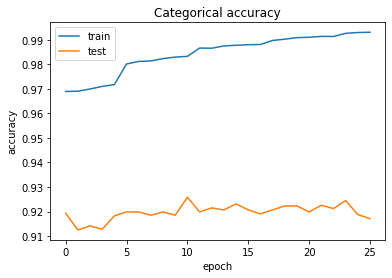

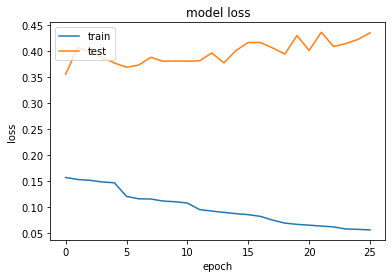

In [ ]:
#9.show results matlabpy
print(results.history)
# summarize history for categorical accuracy
plt.plot(results.history['sparse_categorical_accuracy'])
plt.plot(results.history['val_sparse_categorical_accuracy'])
plt.title('Categorical accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
au, cl = test1.__getitem__(1)
valEval = model.evaluate_generator(valGen, verbose=1,use_multiprocessing=True, workers=32)
trainEval = model.evaluate_generator(trainGen, verbose=1, use_multiprocessing=True, workers=32)
testEval = model.evaluate(au, cl, verbose=1)
print('Evaluation scores: \nMetrics: {} \nTrain: {} \nValidation: {} \nTest: {}'.format(model.metrics_names, trainEval, valEval, testEval) )
y_pred = model.predict(au, verbose=1)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(cl, np.argmax(y_pred,1))
print(set(cl))
#15. setting classes for Confusion matrix




3000/3000 [==============================] - 4s 1ms/step
Evaluation scores: 
Metrics: ['loss', 'sparse_categorical_accuracy'] 
Train: [0.06660769439838246, 0.9913434359296482] 
Validation: [0.43698782169300576, 0.9165760869565217] 
Test: [nan, 0.209]
3000/3000 [==============================] - 4s 1ms/step
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 4295001088, 542, 545, 546, 547, 249108129024, 257698063616, 261993030912, 274877929984, 270582965504, 274877932800, 518, 279172897280, 283467864576, 287762831872, 292057799168, 296352766464, 300647733760, 520, 521, 522, 525, 606, 608, 609, 610, 309237670912, 326417540096, 613, 343597409280, 360777278464, 631, 634, 635, 636, 1149, 690, 692, 693, 694, 697, 236223226880, 240518194176, 244813161472, 249108128768, 253403096064, 257698063360, 261993030656, 266287997952, 270582965248, 274877932544, 33792, 713, 716, 717, 718, 244813158912, 231928257024, 23622

Normalized confusion matrix


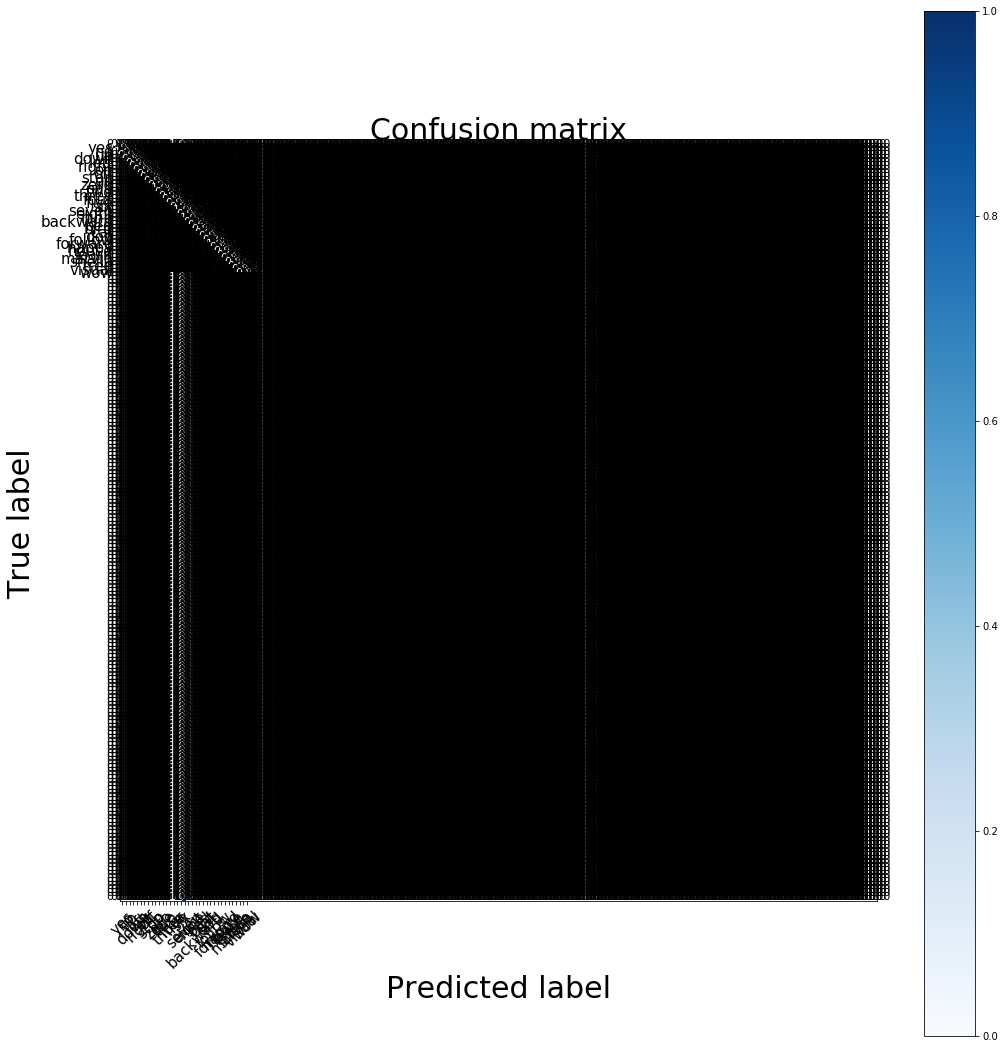

In [ ]:
#LRcmd
classes=[ 'yes', 'no' , 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go',
                         'zero' , 'one' , 'two' , 'three' , 'four' , 'five' , 'six' , 
                         'seven' ,  'eight' , 'nine' , 'backward', 'bed', 'bird', 'cat', 'dog',
                         'follow', 'forward', 'happy', 'house', 'learn', 'marvin', 'sheila', 'tree',
                         'visual', 'wow']



Normalized confusion matrix


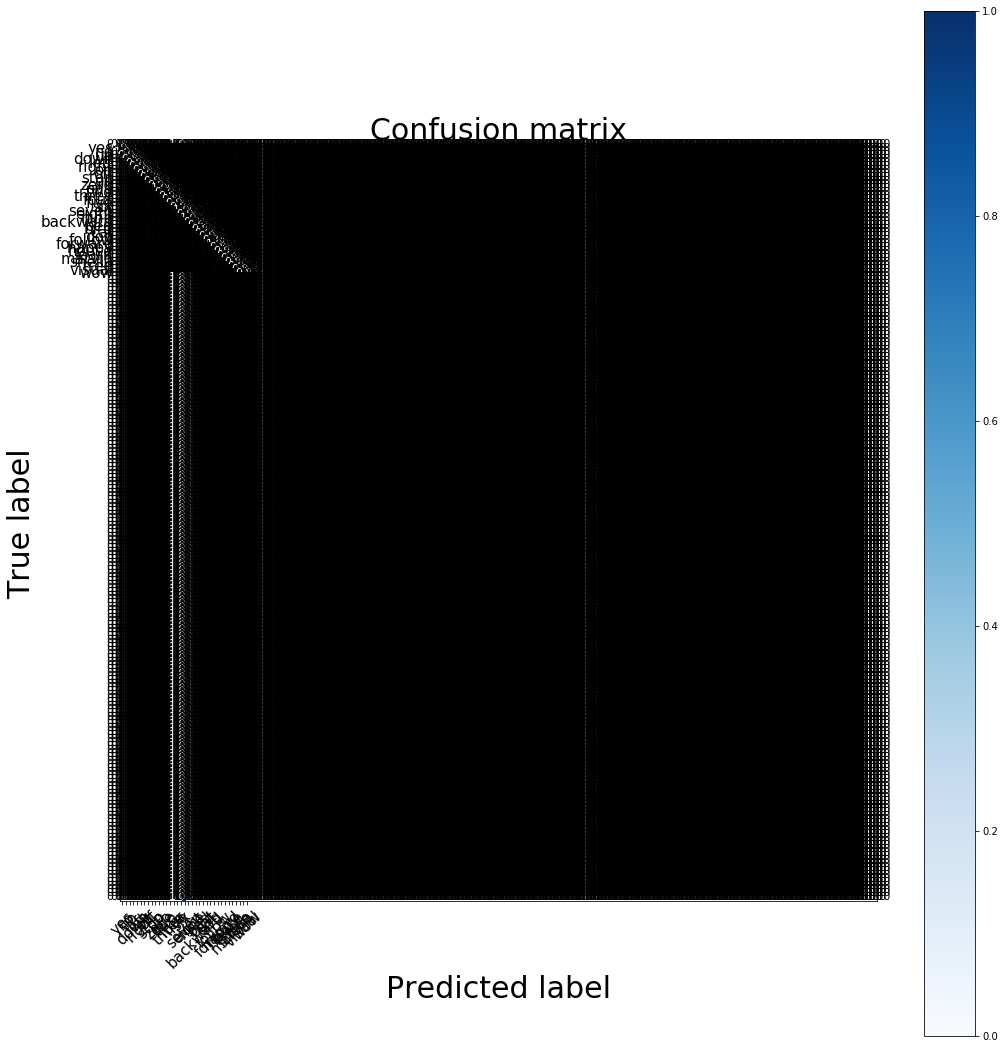

In [ ]:
#16. plot confusion matrix
import matr
matr.plot_confusion_matrix(cm,classes, normalize=True)

In [ ]:
keras.utils.plot_model(model, to_file='model.png', show_shapes=False, show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96)


# exp 32

In [ ]:

from keras.models import Model, load_model
from keras.layers import Input, Activation, Concatenate, Permute, Reshape, Flatten, Lambda, Dot, Softmax
from keras.layers import Add, Dropout, BatchNormalization, Conv2D, Reshape, MaxPooling2D, Dense, LSTM, Bidirectional, Concatenate, CuDNNLSTM
from keras import backend as K
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from keras import backend as K
from keras import optimizers
from kapre.time_frequency import Melspectrogram, Spectrogram
from kapre.augmentation import AdditiveNoise
import keras
from librosa.feature import chroma_stft
# Importing the important libraries
from keras.layers import Dense, GlobalAveragePooling2D, GlobalAveragePooling1D
from keras.models import Model
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from kapre.utils import Normalization2D
import tensorflow as tf

from tensorflow.keras.metrics import TruePositives, FalsePositives, TrueNegatives, FalseNegatives, Precision, Recall, AUC

METRICS = [
      TruePositives(name='tp'),
      FalsePositives(name='fp'),
      TrueNegatives(name='tn'),
      FalseNegatives(name='fn'), 
      Precision(name='precision'),
      Recall(name='recall'),
      AUC(name='auc'),
      
]
metrics = METRICS



nCategories=36
samplingrate = 16000
inputLength = 16000
"""
Base fully convolutional model for speech recognition
"""
"""
        %%%%%%%%%%%%%%%%transformer_depth = 8
        block = TransformerBlock('Transformer', num_heads=8)
        act_layer = TransformerACT()
        next_input = input  # (batch_size, sequence_length, input_size)
        for i in range(transformer_depth):
            next_input = block(next_input, step=i)
            next_input, act_weighted_output = act_layer(next_input)
        act_layer.finalize()  # adds loss
        result = act_weighted_output
"""
inputs = Input((16000,))

y = Reshape((1, -1)) (inputs)

x = Melspectrogram(n_dft=1024, n_hop=128, input_shape=(1, 16000),
                          padding='same', sr=samplingrate, n_mels=80,
                          fmin=40.0, fmax=samplingrate/2, power_melgram=1.0,
                          return_decibel_melgram=True, trainable_fb=False,
                          trainable_kernel=False,
                          name='mel_stft1') (y)
print((x.shape), 'Melspectogram')
#z = mfcc(y=y, sr=22050, S=None, n_mfcc=20, dct_type=2, norm='ortho', lifter=0 )

z = x
z = AdditiveNoise()(z)
print((z.shape), 'Spectrogram')

z = Normalization2D(int_axis=0)(z)
z = Permute((2,1,3)) (z) #this is strange - but now we have (batch_size, sequence, vec_dim)
print((z.shape), 'zpermute')
#z = rms(S=z, frame_length=1024, hop_length=512, center=True, pad_mode='reflect')
#print((z.shape), 'rms')



x = Normalization2D(int_axis=0)(x)
print((x.shape), 'Normalized2d')
x = Permute((2,1,3)) (x) #this is strange - but now we have (batch_size, sequence, vec_dim)
print((x.shape), 'permute')




x = Conv2D(32, (3,3) , activation='relu', padding='same') (x)
x = BatchNormalization() (x)
print((x.shape), '1stconv')

x = Conv2D(64, (3,3) , activation='relu', padding='same') (x)
x = BatchNormalization() (x)
print((x.shape), '1stconv')

x = Conv2D(1, (3,3) ,  padding='same') (x)
x = BatchNormalization() (x)
x= Activation('relu')(x)
print((x.shape), 'lastconv')




z = Conv2D(32, (3,3) , activation='relu', padding='same') (z)
z = BatchNormalization() (z)
print((z.shape), 'spect_1stconv')
z = Conv2D(64, (3,3) , activation='relu', padding='same') (z)
z = BatchNormalization() (z)
print((z.shape), 'spect_1stconv')


z = Conv2D(1, (3,3) ,  padding='same') (z)
z = BatchNormalization()(z)
z= Activation('relu')(z)
print((z.shape), 'spect_lastconv')



zee = Lambda(lambda q: K.squeeze(q, -1), name='squeeze_last_dim1') (x) #keras.backend.squeeze(x, axis)
print((zee.shape), 'after squeez last dimention mel')
zey = Lambda(lambda q: K.squeeze(q, -1), name='squeeze_last_dim') (z)
print((zey.shape), 'after squeez last dimention spec')

zee = Concatenate(axis=-1)([zee, zey])
print((zee.shape), 'concotinate')




transformer_depth = 4
block = TransformerBlock('Transformer', num_heads=2)
act_layer = TransformerACT()

next_input = zee  # (batch_size, sequence_length, input_size)
for i in range(transformer_depth):
    next_input = block(next_input,  )  # adds loss
    print((next_input.shape))  #
    next_input = LayerNormalization()(next_input)
    next_input, act_weighted_output = act_layer(next_input)
    print((next_input.shape),'1')   #
    print((act_weighted_output.shape),'2')   #
act_layer.finalize()  # adds loss
result = act_weighted_output
x = result
print((x.shape), 'actweightedoutput')
#x = Lambda(lambda q: q[:,64]) (x) 
x= GlobalAveragePooling1D()(x)
print((x.shape), 'Global_AP')
x = Dense(128, activation = 'relu')(x)
print((x.shape), 'dense64')
output = Dense(36, activation = 'softmax')(x)
print((output.shape))
model = Model(inputs=[inputs], outputs=[output])

model.compile(optimizer='adam', loss=['sparse_categorical_crossentropy'], metrics=['sparse_categorical_accuracy'])
#model.compile(optimizer='adam', loss=['sparse_categorical_crossentropy'], metrics=metrics)
keras.utils.print_summary(model, line_length=None, positions=None, print_fn=None)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



(?, 80, ?, 1) Melspectogram


(?, 80, ?, 1) Spectrogram
(?, ?, 80, 1) zpermute
(?, 80, ?, 1) Normalized2d
(?, ?, 80, 1) permute








(?, ?, 80, 32) 1stconv
(?, ?, 80, 64) 1stconv
(?, ?, 80, 1) lastconv
(?, ?, 80, 32) spect_1stconv
(?, ?, 80, 64) spect_1stconv
(?, ?, 80, 1) spect_lastconv
(?, ?, 80) after squeez last dimention mel
(?, ?, 80) after squeez last dimention spec
(?, ?, 160) concotinate
(?, 125, 160)
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
(?, 125, 160) 1
(?, 125, 160) 2
(?, 125, 160)
(?, 125, 160) 1
(?, 125, 160) 2
(?, 125, 160)
(?, 125, 160) 1
(?, 125, 160) 2
(?, 125, 160)
(?, 125, 160) 1
(?, 125, 160) 2
(?, 125, 160) actweightedoutput
(?, 160) Global_AP
(?, 128) dense64
(?, 36)

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Sha

In [ ]:
model.load_weights('model_Audiotransformer34.h5')


In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.001
    drop = 0.8
    epochs_drop = 5.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=10, verbose=1)
checkpointer = ModelCheckpoint('model_Audiotransformer34.h5', monitor='val_sparse_categorical_accuracy', verbose=1,  save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 35, verbose=1,   use_multiprocessing=True, workers= 120,
callbacks=[earlystopper, checkpointer, lrate ])

Epoch 1/35
Changing learning rate to 0.001
3184/3184 [==============================] - 3811s 1s/step - loss: 0.8607 - sparse_categorical_accuracy: 0.7612 - val_loss: 0.5926 - val_sparse_categorical_accuracy: 0.8315

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.83152, saving model to model_Audiotransformer34.h5
Epoch 2/35
Changing learning rate to 0.001
3184/3184 [==============================] - 762s 239ms/step - loss: 0.4799 - sparse_categorical_accuracy: 0.8704 - val_loss: 0.4966 - val_sparse_categorical_accuracy: 0.8704

Epoch 00002: val_sparse_categorical_accuracy improved from 0.83152 to 0.87038, saving model to model_Audiotransformer34.h5

Epoch 00002: val_sparse_categorical_accuracy improved from 0.83152 to 0.87038, saving model to model_Audiotransformer34.h5


OSError: ignored

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.0006
    drop = 0.8
    epochs_drop = 7.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=25, verbose=1)
checkpointer = ModelCheckpoint('model_Audiotransformer34.h5', monitor='val_sparse_categorical_accuracy', verbose=1,  save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 45, verbose=1, 
callbacks=[earlystopper, checkpointer, lrate ])

Epoch 1/45
Changing learning rate to 0.0006
3184/3184 [==============================] - 752s 236ms/step - loss: 0.3331 - sparse_categorical_accuracy: 0.9125 - val_loss: 0.3682 - val_sparse_categorical_accuracy: 0.8978

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.89783, saving model to model_Audiotransformer34.h5
Epoch 2/45
Changing learning rate to 0.0006
3184/3184 [==============================] - 754s 237ms/step - loss: 0.2963 - sparse_categorical_accuracy: 0.9217 - val_loss: 0.4020 - val_sparse_categorical_accuracy: 0.8938

Epoch 00002: val_sparse_categorical_accuracy did not improve from 0.89783
Epoch 3/45
Changing learning rate to 0.0006
3184/3184 [==============================] - 750s 236ms/step - loss: 0.2734 - sparse_categorical_accuracy: 0.9288 - val_loss: 0.3509 - val_sparse_categorical_accuracy: 0.9073

Epoch 00003: val_sparse_categorical_accuracy improved from 0.89783 to 0.90734, saving model to model_Audiotransformer34.h5
Epoch 4/45
Changing lea

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.0003
    drop = 0.8
    epochs_drop = 7.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=25, verbose=1)
checkpointer = ModelCheckpoint('model_Audiotransformer34.h5', monitor='val_sparse_categorical_accuracy', verbose=1,  save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 50, verbose=1,   use_multiprocessing=True, workers= 120,
callbacks=[earlystopper, checkpointer, lrate ])



Epoch 1/50
Changing learning rate to 0.0003
3184/3184 [==============================] - 3700s 1s/step - loss: 0.0949 - sparse_categorical_accuracy: 0.9811 - val_loss: 0.3311 - val_sparse_categorical_accuracy: 0.9302

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.93016, saving model to model_Audiotransformer34.h5
Epoch 2/50
Changing learning rate to 0.0003
3184/3184 [==============================] - 723s 227ms/step - loss: 0.1080 - sparse_categorical_accuracy: 0.9781 - val_loss: 0.3552 - val_sparse_categorical_accuracy: 0.9223

Epoch 00002: val_sparse_categorical_accuracy did not improve from 0.93016
3184/3184 [==============================]Epoch 3/50
Changing learning rate to 0.0003
3183/3184 [============================>.] - ETA: 0s - loss: 0.1031 - sparse_categorical_accuracy: 0.9788
Epoch 00002: val_sparse_categorical_accuracy did not improve from 0.93016
3184/3184 [==============================] - 730s 229ms/step - loss: 0.1032 - sparse_categorical_acc

OSError: ignored

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.0002
    drop = 0.8
    epochs_drop = 7.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=25, verbose=1)
checkpointer = ModelCheckpoint('model_Audiotransformer34.h5', monitor='val_sparse_categorical_accuracy', verbose=1,  save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 50, verbose=1,  
callbacks=[earlystopper, checkpointer, lrate ])

Epoch 1/50
Changing learning rate to 0.0002
3184/3184 [==============================] - 711s 223ms/step - loss: 0.0757 - sparse_categorical_accuracy: 0.9874 - val_loss: 0.3376 - val_sparse_categorical_accuracy: 0.9356

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.93560, saving model to model_Audiotransformer34.h5
Epoch 2/50
Changing learning rate to 0.0002
3184/3184 [==============================] - 710s 223ms/step - loss: 0.0752 - sparse_categorical_accuracy: 0.9872 - val_loss: 0.3030 - val_sparse_categorical_accuracy: 0.9345

Epoch 00002: val_sparse_categorical_accuracy did not improve from 0.93560
Epoch 3/50
Changing learning rate to 0.0002
3184/3184 [==============================] - 711s 223ms/step - loss: 0.0729 - sparse_categorical_accuracy: 0.9882 - val_loss: 0.3206 - val_sparse_categorical_accuracy: 0.9310

Epoch 00003: val_sparse_categorical_accuracy did not improve from 0.93560
Epoch 4/50
Changing learning rate to 0.0002
3184/3184 [=================

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.0001
    drop = 0.8
    epochs_drop = 6.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 3e-5):
        lrate = 3e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=25, verbose=1)
checkpointer = ModelCheckpoint('model_Audiotransformer34.h5', monitor='val_sparse_categorical_accuracy', verbose=1)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 50, verbose=1,  
callbacks=[earlystopper, checkpointer, lrate ])

Epoch 1/50
Changing learning rate to 0.0001
3184/3184 [==============================] - 427s 134ms/step - loss: 0.0439 - sparse_categorical_accuracy: 0.9955 - val_loss: 0.3981 - val_sparse_categorical_accuracy: 0.9408

Epoch 00001: saving model to model_Audiotransformer34.h5
Epoch 2/50
Changing learning rate to 0.0001
3184/3184 [==============================] - 424s 133ms/step - loss: 0.0429 - sparse_categorical_accuracy: 0.9956 - val_loss: 0.4039 - val_sparse_categorical_accuracy: 0.9315

Epoch 00002: saving model to model_Audiotransformer34.h5
Epoch 3/50
Changing learning rate to 0.0001
3184/3184 [==============================] - 426s 134ms/step - loss: 0.0416 - sparse_categorical_accuracy: 0.9960 - val_loss: 0.3871 - val_sparse_categorical_accuracy: 0.9364

Epoch 00003: saving model to model_Audiotransformer34.h5
Epoch 4/50
Changing learning rate to 0.0001
3184/3184 [==============================] - 426s 134ms/step - loss: 0.0430 - sparse_categorical_accuracy: 0.9957 - val_loss:

KeyboardInterrupt: ignored

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

Process ForkPoolWorker-1081:
Process ForkPoolWorker-1082:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 334, in get
    with self._rlock:
  File "/usr/lib/python3.6/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/usr/lib/python3.6/multiproce

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-16-1c7158e4dda4>", line 23, in <module>
    callbacks=[earlystopper, checkpointer, lrate ])
  File "/usr/local/lib/python3.6/dist-packages/keras/legacy/interfaces.py", line 91, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/keras/engine/training.py", line 1658, in fit_generator
    initial_epoch=initial_epoch)
  File "/usr/local/lib/python3.6/dist-packages/keras/engine/training_generator.py", line 215, in fit_generator
    class_weight=class_weight)
  File "/usr/local/lib/python3.6/dist-packages/keras/engine/training.py", line 1449, in train_on_batch
    outputs = self.train_function(ins)
  File "/usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py", line 2979, in __call__
    return self._call(inputs)
  Fil

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.0004
    drop = 0.5
    epochs_drop = 12.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 3e-5):
        lrate = 3e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=25, verbose=1)
checkpointer = ModelCheckpoint('model_Audiotransformer34.h5', monitor='val_sparse_categorical_accuracy', verbose=1, save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 50, verbose=1,  
callbacks=[earlystopper, checkpointer, lrate ])

Epoch 1/50
Changing learning rate to 0.0004
3184/3184 [==============================] - 444s 140ms/step - loss: 0.1053 - sparse_categorical_accuracy: 0.9764 - val_loss: 0.3777 - val_sparse_categorical_accuracy: 0.9334

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.93342, saving model to model_Audiotransformer34.h5
Epoch 2/50
Changing learning rate to 0.0004
3184/3184 [==============================] - 456s 143ms/step - loss: 0.0849 - sparse_categorical_accuracy: 0.9824 - val_loss: 0.3871 - val_sparse_categorical_accuracy: 0.9174

Epoch 00002: val_sparse_categorical_accuracy did not improve from 0.93342
Epoch 3/50
Changing learning rate to 0.0004
3184/3184 [==============================] - 449s 141ms/step - loss: 0.0847 - sparse_categorical_accuracy: 0.9823 - val_loss: 0.3804 - val_sparse_categorical_accuracy: 0.9247

Epoch 00003: val_sparse_categorical_accuracy did not improve from 0.93342
Epoch 4/50
Changing learning rate to 0.0004
3184/3184 [=================

{'val_loss': [0.377713012031239, 0.38707585334777833, 0.38035999849114727, 0.3887724111261575, 0.39775239457578765, 0.3548802094615024, 0.36526349267881847, 0.3798193502685298, 0.4086332533994447, 0.3677137615078169, 0.36416967279561185, 0.34685632732251415, 0.34392829446688944, 0.38876628065886704, 0.38207250081974525, 0.3835669159565283, 0.36648024657498235, 0.3677776665629252, 0.3683770658691292, 0.36151390828840113, 0.4006523561704418, 0.42619825123768784, 0.415291896932151, 0.40253548231785713, 0.3948579098219457, 0.3948036527180153, 0.37995858890530854, 0.40430467493184236, 0.409489008055433, 0.4038511553860229, 0.4063182795987181, 0.3973483166778865, 0.4043648849200943, 0.40344968221109845, 0.39366266801953315, 0.39342579150005524, 0.3834199187548264, 0.3999480860388797, 0.3973770475419967, 0.400929840411181, 0.40929009287577606, 0.39325358529129756, 0.40302780532966487, 0.414792851763575, 0.40024362834899324, 0.4216201101794191, 0.39380011241073193, 0.420567578887162, 0.4131104

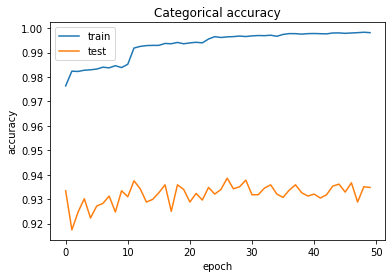

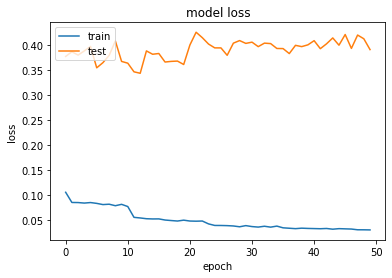

In [ ]:
#9.show results matlabpy
print(results.history)
# summarize history for categorical accuracy
plt.plot(results.history['sparse_categorical_accuracy'])
plt.plot(results.history['val_sparse_categorical_accuracy'])
plt.title('Categorical accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
au, cl = test1.__getitem__(1)
valEval = model.evaluate_generator(valGen, verbose=1,use_multiprocessing=True, workers=32)
trainEval = model.evaluate_generator(trainGen, verbose=1, use_multiprocessing=True, workers=32)
testEval = model.evaluate(au, cl, verbose=1)
print('Evaluation scores: \nMetrics: {} \nTrain: {} \nValidation: {} \nTest: {}'.format(model.metrics_names, trainEval, valEval, testEval) )
y_pred = model.predict(au, verbose=1)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(cl, np.argmax(y_pred,1))
print(set(cl))
#15. setting classes for Confusion matrix




3000/3000 [==============================] - 5s 2ms/step
Evaluation scores: 
Metrics: ['loss', 'sparse_categorical_accuracy'] 
Train: [0.037541811208207924, 0.9969574434673367] 
Validation: [0.40097583467545717, 0.9347826086956522] 
Test: [nan, 0.21266666666666667]
3000/3000 [==============================] - 5s 2ms/step
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 7145864995579708516, 7666943479562064974, 77, 3979301086300432242, 7586710991641211952, 7802853872144695631, 3703465737412818486, 6297835947627802485, 4771393798470587502, 5281403178015013224, 7239362074603700490, 6509162928349606984, 8589333465345258570, 5650666731502256433, 6139056339876405554, 6140449654607339827, 5274933706878443828, 3689939420479766836, 7869599884387893555, 3911484369195974964, 4716241058505638199, 5279707962732142900, 5000740753587257657, 3776639154894094649, 5994698255258236493, 5580937727955845428, 7539155658029

In [ ]:
#LRcmd
classes=[ 'yes', 'no' , 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go',
                         'zero' , 'one' , 'two' , 'three' , 'four' , 'five' , 'six' , 
                         'seven' ,  'eight' , 'nine' , 'backward', 'bed', 'bird', 'cat', 'dog',
                         'follow', 'forward', 'happy', 'house', 'learn', 'marvin', 'sheila', 'tree',
                         'visual', 'wow']



In [ ]:
#16. plot confusion matrix
import matr
matr.plot_confusion_matrix(cm,classes, normalize=True)

Normalized confusion matrix


# exp 35

In [ ]:

from keras.models import Model, load_model
from keras.layers import Input, Activation, Concatenate, Permute, Reshape, Flatten, Lambda, Dot, Softmax
from keras.layers import Add, Dropout, BatchNormalization, Conv2D, Reshape, MaxPooling2D, Dense, LSTM, Bidirectional, Concatenate, CuDNNLSTM
from keras import backend as K
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from keras import backend as K
from keras import optimizers
from kapre.time_frequency import Melspectrogram, Spectrogram
from kapre.augmentation import AdditiveNoise
import keras
from librosa.feature import chroma_stft
# Importing the important libraries
from keras.layers import Dense, GlobalAveragePooling2D, GlobalAveragePooling1D
from keras.models import Model
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from kapre.utils import Normalization2D
import tensorflow as tf

from tensorflow.keras.metrics import TruePositives, FalsePositives, TrueNegatives, FalseNegatives, Precision, Recall, AUC

METRICS = [
      TruePositives(name='tp'),
      FalsePositives(name='fp'),
      TrueNegatives(name='tn'),
      FalseNegatives(name='fn'), 
      Precision(name='precision'),
      Recall(name='recall'),
      AUC(name='auc'),
      
]
metrics = METRICS



nCategories=36
samplingrate = 16000
inputLength = 16000
"""
Base fully convolutional model for speech recognition
"""
"""
        %%%%%%%%%%%%%%%%transformer_depth = 8
        block = TransformerBlock('Transformer', num_heads=8)
        act_layer = TransformerACT()
        next_input = input  # (batch_size, sequence_length, input_size)
        for i in range(transformer_depth):
            next_input = block(next_input, step=i)
            next_input, act_weighted_output = act_layer(next_input)
        act_layer.finalize()  # adds loss
        result = act_weighted_output
"""
inputs = Input((16000,))

y = Reshape((1, -1)) (inputs)

x = Melspectrogram(n_dft=1024, n_hop=128, input_shape=(1, 16000),
                          padding='same', sr=samplingrate, n_mels=80,
                          fmin=40.0, fmax=samplingrate/2, power_melgram=1.0,
                          return_decibel_melgram=True, trainable_fb=False,
                          trainable_kernel=False,
                          name='mel_stft1') (y)
print((x.shape), 'Melspectogram')
#z = mfcc(y=y, sr=22050, S=None, n_mfcc=20, dct_type=2, norm='ortho', lifter=0 )

z = x
z = AdditiveNoise()(z)
print((z.shape), 'Spectrogram')

z = Normalization2D(int_axis=0)(z)
z = Permute((2,1,3)) (z) #this is strange - but now we have (batch_size, sequence, vec_dim)
print((z.shape), 'zpermute')
#z = rms(S=z, frame_length=1024, hop_length=512, center=True, pad_mode='reflect')
#print((z.shape), 'rms')



x = Normalization2D(int_axis=0)(x)
print((x.shape), 'Normalized2d')
x = Permute((2,1,3)) (x) #this is strange - but now we have (batch_size, sequence, vec_dim)
print((x.shape), 'permute')

x = Lambda(lambda q: K.squeeze(q, -1), name='squeeze_last_dim1') (x) #keras.backend.squeeze(x, axis)
print((x.shape), 'after squeez last dimention mel')
z = Lambda(lambda q: K.squeeze(q, -1), name='squeeze_last_dim') (z)
print((z.shape), 'after squeez last dimention spec')



zee = Concatenate(axis=-1)([x, z])
print((zee.shape), 'concotinate')




transformer_depth = 4
block = TransformerBlock('Transformer', num_heads=2)
act_layer = TransformerACT()

next_input = zee  # (batch_size, sequence_length, input_size)
for i in range(transformer_depth):
    next_input = block(next_input,  )  # adds loss
    print((next_input.shape))  #
    next_input = LayerNormalization()(next_input)
    next_input, act_weighted_output = act_layer(next_input)
    print((next_input.shape),'1')   #
    print((act_weighted_output.shape),'2')   #
act_layer.finalize()  # adds loss
result = act_weighted_output
x = result
print((x.shape), 'actweightedoutput')
#x = Lambda(lambda q: q[:,64]) (x) 
x= GlobalAveragePooling1D()(x)
print((x.shape), 'Global_AP')
x = Dense(128, activation = 'relu')(x)
print((x.shape), 'dense64')
output = Dense(36, activation = 'softmax')(x)
print((output.shape))
model = Model(inputs=[inputs], outputs=[output])

model.compile(optimizer='adam', loss=['sparse_categorical_crossentropy'], metrics=['sparse_categorical_accuracy'])
#model.compile(optimizer='adam', loss=['sparse_categorical_crossentropy'], metrics=metrics)
keras.utils.print_summary(model, line_length=None, positions=None, print_fn=None)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



(?, 80, ?, 1) Melspectogram


(?, 80, ?, 1) Spectrogram
(?, ?, 80, 1) zpermute
(?, 80, ?, 1) Normalized2d
(?, ?, 80, 1) permute
(?, ?, 80) after squeez last dimention mel
(?, ?, 80) after squeez last dimention spec
(?, ?, 160) concotinate

(?, 125, 160)
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
(?, 125, 160) 1
(?, 125, 160) 2
(?, 125, 160)
(?, 125, 160) 1
(?, 125, 160) 2
(?, 125, 160)
(?, 125, 160) 1
(?, 125, 160) 2
(?, 125, 160)
(?, 125, 160) 1
(?, 125, 160) 2
(?, 125, 160) actweightedoutput
(?, 160) Global_AP
(?, 128) dense64
(?, 36)

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 16000)        0                                            
_______

In [ ]:
model.save('model_Audiotransformer35.h5')

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.001
    drop = 0.8
    epochs_drop = 5.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=10, verbose=1)
checkpointer = ModelCheckpoint('model_Audiotransformer35.h5', monitor='val_sparse_categorical_accuracy', verbose=1,  save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 35, verbose=1,   use_multiprocessing=True, workers= 120,
callbacks=[earlystopper, checkpointer, lrate ])



Epoch 1/35
Changing learning rate to 0.001
3184/3184 [==============================] - 3998s 1s/step - loss: 1.1585 - sparse_categorical_accuracy: 0.6801 - val_loss: 0.8036 - val_sparse_categorical_accuracy: 0.7856

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.78560, saving model to model_Audiotransformer35.h5
Epoch 1/35Epoch 2/35
Changing learning rate to 0.001
3183/3184 [============================>.] - ETA: 0s - loss: 0.6602 - sparse_categorical_accuracy: 0.8184
Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.78560, saving model to model_Audiotransformer35.h5
3184/3184 [==============================] - 407s 128ms/step - loss: 0.6602 - sparse_categorical_accuracy: 0.8184 - val_loss: 0.6330 - val_sparse_categorical_accuracy: 0.8288

Epoch 00002: val_sparse_categorical_accuracy improved from 0.78560 to 0.82880, saving model to model_Audiotransformer35.h5

Epoch 00002: val_sparse_categorical_accuracy improved from 0.78560 to 0.82880, sav

OSError: ignored

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.0008
    drop = 0.8
    epochs_drop = 6.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=25, verbose=1)
checkpointer = ModelCheckpoint('model_Audiotransformer35.h5', monitor='val_sparse_categorical_accuracy', verbose=1,  save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 55, verbose=1, 
callbacks=[earlystopper, checkpointer, lrate ])

Epoch 1/55
Changing learning rate to 0.0008
3184/3184 [==============================] - 348s 109ms/step - loss: 0.5132 - sparse_categorical_accuracy: 0.8601 - val_loss: 0.5578 - val_sparse_categorical_accuracy: 0.8533

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.85326, saving model to model_Audiotransformer35.h5
Epoch 2/55
Changing learning rate to 0.0008
3184/3184 [==============================] - 341s 107ms/step - loss: 0.4730 - sparse_categorical_accuracy: 0.8706 - val_loss: 0.4976 - val_sparse_categorical_accuracy: 0.8611

Epoch 00002: val_sparse_categorical_accuracy improved from 0.85326 to 0.86114, saving model to model_Audiotransformer35.h5
Epoch 3/55
Changing learning rate to 0.0008
3184/3184 [==============================] - 342s 108ms/step - loss: 0.4362 - sparse_categorical_accuracy: 0.8831 - val_loss: 0.5128 - val_sparse_categorical_accuracy: 0.8652

Epoch 00003: val_sparse_categorical_accuracy improved from 0.86114 to 0.86522, saving model to mo

{'val_loss': [0.5577728192443433, 0.49760504358488583, 0.5127749825301378, 0.5072063776461975, 0.4571875189309535, 0.43270092807386235, 0.41617974088243814, 0.42736948773912764, 0.3936046252756015, 0.413124722695869, 0.4189791679382324, 0.3779290231025737, 0.3700312271390272, 0.3873244104825932, 0.39248351571352585, 0.39423197650391123, 0.37606408557166227, 0.3488850004323151, 0.3527061661300452, 0.3479943687501161, 0.3719976445255072, 0.34048986907886425, 0.367991594646288, 0.3198120810415434, 0.3607533526809319, 0.3601782027470029, 0.360657191146975, 0.35128055914588596, 0.3502580730325502, 0.366096176692973, 0.34780925366541615, 0.3607842751171278, 0.36950348541140554, 0.3600073705548825, 0.3653595349710921, 0.36004361183099126, 0.3803883555142776, 0.3592760541192863, 0.36063350064922933, 0.3666772676064916, 0.3680025872005069, 0.3733887353507073, 0.35999733342424683, 0.3596085215716258, 0.3658776806100555, 0.3817642801805683, 0.37855056919481445, 0.3991571367920741, 0.3835679534498

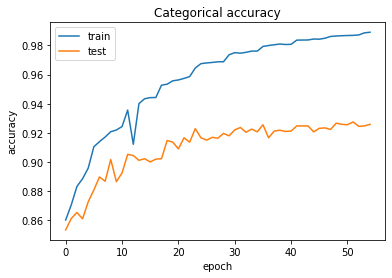

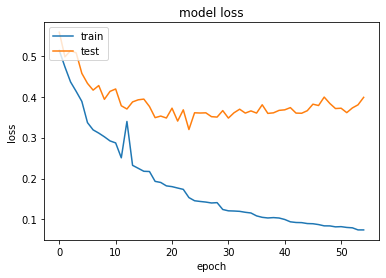

In [ ]:
#9.show results matlabpy
print(results.history)
# summarize history for categorical accuracy
plt.plot(results.history['sparse_categorical_accuracy'])
plt.plot(results.history['val_sparse_categorical_accuracy'])
plt.title('Categorical accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.load_weights('model_Audiotransformer35.h5')

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.0001
    drop = 0.8
    epochs_drop = 6.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=25, verbose=1)
checkpointer = ModelCheckpoint('model_Audiotransformer35.h5', monitor='val_sparse_categorical_accuracy', verbose=1,  save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 40, verbose=1,  use_multiprocessing=True, workers= 20,
callbacks=[earlystopper, checkpointer, lrate ])

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.00016
    drop = 0.8
    epochs_drop = 6.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=25, verbose=1)
checkpointer = ModelCheckpoint('model_Audiotransformer35.h5', monitor='val_sparse_categorical_accuracy', verbose=1,  save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 40, verbose=1,  
callbacks=[earlystopper, checkpointer, lrate ])

Epoch 1/40
Changing learning rate to 0.00016
3184/3184 [==============================] - 4378s 1s/step - loss: 0.0902 - sparse_categorical_accuracy: 0.9842 - val_loss: 0.4916 - val_sparse_categorical_accuracy: 0.8986

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.89864, saving model to model_Audiotransformer35.h5
Epoch 2/40
Changing learning rate to 0.00016
3184/3184 [==============================] - 4443s 1s/step - loss: 0.1063 - sparse_categorical_accuracy: 0.9806 - val_loss: 0.4575 - val_sparse_categorical_accuracy: 0.9030

Epoch 00002: val_sparse_categorical_accuracy improved from 0.89864 to 0.90299, saving model to model_Audiotransformer35.h5
Epoch 3/40
Changing learning rate to 0.00016
1045/3184 [========>.....................] - ETA: 49:15 - loss: 0.1314 - sparse_categorical_accuracy: 0.9746

# New Section

In [ ]:

from keras.models import Model, load_model
from keras.layers import Input, Activation, Concatenate, Permute, Reshape, Flatten, Lambda, Dot, Softmax
from keras.layers import Add, Dropout, BatchNormalization, Conv2D, Reshape, MaxPooling2D, Dense, LSTM, Bidirectional, Concatenate, CuDNNLSTM
from keras import backend as K
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from keras import backend as K
from keras import optimizers
from kapre.time_frequency import Melspectrogram, Spectrogram
from kapre.augmentation import AdditiveNoise
import keras
from librosa.feature import chroma_stft
# Importing the important libraries
from keras.layers import Dense, GlobalAveragePooling2D, GlobalAveragePooling1D
from keras.models import Model
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from kapre.utils import Normalization2D
import tensorflow as tf

from tensorflow.keras.metrics import TruePositives, FalsePositives, TrueNegatives, FalseNegatives, Precision, Recall, AUC

METRICS = [
      TruePositives(name='tp'),
      FalsePositives(name='fp'),
      TrueNegatives(name='tn'),
      FalseNegatives(name='fn'), 
      Precision(name='precision'),
      Recall(name='recall'),
      AUC(name='auc'),
      
]
metrics = METRICS



nCategories=36
samplingrate = 16000
inputLength = 16000
"""
Base fully convolutional model for speech recognition
"""
"""
        %%%%%%%%%%%%%%%%transformer_depth = 8
        block = TransformerBlock('Transformer', num_heads=8)
        act_layer = TransformerACT()
        next_input = input  # (batch_size, sequence_length, input_size)
        for i in range(transformer_depth):
            next_input = block(next_input, step=i)
            next_input, act_weighted_output = act_layer(next_input)
        act_layer.finalize()  # adds loss
        result = act_weighted_output
"""
inputs = Input((16000,))

y = Reshape((1, -1)) (inputs)

x = Melspectrogram(n_dft=1024, n_hop=128, input_shape=(1, 16000),
                          padding='same', sr=samplingrate, n_mels=80,
                          fmin=40.0, fmax=samplingrate/2, power_melgram=1.0,
                          return_decibel_melgram=True, trainable_fb=False,
                          trainable_kernel=False,
                          name='mel_stft1') (y)
print((x.shape), 'Melspectogram')
#z = mfcc(y=y, sr=22050, S=None, n_mfcc=20, dct_type=2, norm='ortho', lifter=0 )

z = x
z = AdditiveNoise()(z)
print((z.shape), 'Spectrogram')

z = Normalization2D(int_axis=0)(z)
z = Permute((2,1,3)) (z) #this is strange - but now we have (batch_size, sequence, vec_dim)
print((z.shape), 'zpermute')
#z = rms(S=z, frame_length=1024, hop_length=512, center=True, pad_mode='reflect')
#print((z.shape), 'rms')



x = Normalization2D(int_axis=0)(x)
print((x.shape), 'Normalized2d')
x = Permute((2,1,3)) (x) #this is strange - but now we have (batch_size, sequence, vec_dim)
print((x.shape), 'permute')

x = Lambda(lambda q: K.squeeze(q, -1), name='squeeze_last_dim1') (x) #keras.backend.squeeze(x, axis)
print((x.shape), 'after squeez last dimention mel')
z = Lambda(lambda q: K.squeeze(q, -1), name='squeeze_last_dim') (z)
print((z.shape), 'after squeez last dimention spec')



zee = Concatenate(axis=-1)([x, z])
print((zee.shape), 'concotinate')




transformer_depth = 4
block = TransformerBlock('Transformer', num_heads=2)
act_layer = TransformerACT()

next_input = zee  # (batch_size, sequence_length, input_size)
for i in range(transformer_depth):
    next_input = block(next_input,  )  # adds loss
    print((next_input.shape))  #
    next_input = LayerNormalization()(next_input)
    next_input, act_weighted_output = act_layer(next_input)
    print((next_input.shape),'1')   #
    print((act_weighted_output.shape),'2')   #
act_layer.finalize()  # adds loss
result = act_weighted_output
x = result
print((x.shape), 'actweightedoutput')

#x = tf.keras.backend.expand_dims(x, axis=-1)
x =  Lambda(lambda a: K.expand_dims(a[::], -1))(x)               #Lambda(lambda q: q[:,64]) (x) 

print((x.shape), 'lambda')


x = Conv2D(32, (3,3) , activation='relu', padding='same') (x)
x = BatchNormalization() (x)
print((x.shape), '1stconv')
x = Conv2D(64, (3,3) , activation='relu', padding='same') (x)
x = BatchNormalization() (x)
print((x.shape), '1stconv')


x= GlobalAveragePooling2D()(x)
print((x.shape), 'Global_AP')
x = Dense(128, activation = 'relu')(x)
print((x.shape), 'dense64')
output = Dense(36, activation = 'softmax')(x)
print((output.shape))
model = Model(inputs=[inputs], outputs=[output])

model.compile(optimizer='adam', loss=['sparse_categorical_crossentropy'], metrics=['sparse_categorical_accuracy'])
#model.compile(optimizer='adam', loss=['sparse_categorical_crossentropy'], metrics=metrics)
keras.utils.print_summary(model, line_length=None, positions=None, print_fn=None)

(?, 80, ?, 1) Melspectogram
(?, 80, ?, 1) Spectrogram
(?, ?, 80, 1) zpermute
(?, 80, ?, 1) Normalized2d
(?, ?, 80, 1) permute
(?, ?, 80) after squeez last dimention mel
(?, ?, 80) after squeez last dimention spec
(?, ?, 160) concotinate
(?, 125, 160)
(?, 125, 160) 1
(?, 125, 160) 2
(?, 125, 160)
(?, 125, 160) 1
(?, 125, 160) 2
(?, 125, 160)
(?, 125, 160) 1
(?, 125, 160) 2
(?, 125, 160)
(?, 125, 160) 1
(?, 125, 160) 2
(?, 125, 160) actweightedoutput
(?, 125, 160, 1) lambda
(?, 125, 160, 32) 1stconv
(?, 125, 160, 64) 1stconv
(?, 64) Global_AP
(?, 128) dense64
(?, 36)
Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_22 (InputLayer)           (None, 16000)        0                                            
__________________________________________________________________________________________________
reshape_23 (Res

In [ ]:
model.save('model_Audiotransformer36.h5')

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.001
    drop = 0.8
    epochs_drop = 5.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=10, verbose=1)
checkpointer = ModelCheckpoint('model_Audiotransformer36.h5', monitor='val_sparse_categorical_accuracy', verbose=1,  save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 35, verbose=1,   use_multiprocessing=True, workers= 120,
callbacks=[earlystopper, checkpointer, lrate ])

Epoch 1/35
Changing learning rate to 0.001
 845/3184 [======>.......................] - ETA: 51:13 - loss: 2.5408 - sparse_categorical_accuracy: 0.2762

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:610: UserWarning: The input 1677 could not be retrieved. It could be because a worker has died.
  UserWarning)


3184/3184 [==============================] - 4410s 1s/step - loss: 1.7359 - sparse_categorical_accuracy: 0.5032 - val_loss: 1.9644 - val_sparse_categorical_accuracy: 0.5149

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.51495, saving model to model_Audiotransformer36.h5
Epoch 1/35
Epoch 2/35
Changing learning rate to 0.001


Process ForkPoolWorker-676:
Process ForkPoolWorker-382:
Process ForkPoolWorker-698:
Process ForkPoolWorker-446:
Process ForkPoolWorker-466:
Process ForkPoolWorker-651:
Process ForkPoolWorker-460:
Process ForkPoolWorker-406:
Process ForkPoolWorker-457:
Process ForkPoolWorker-396:
Process ForkPoolWorker-596:
Process ForkPoolWorker-528:
Process ForkPoolWorker-424:
Process ForkPoolWorker-536:
Process ForkPoolWorker-597:
Process ForkPoolWorker-707:
Process ForkPoolWorker-638:
Process ForkPoolWorker-598:
Process ForkPoolWorker-544:
Process ForkPoolWorker-657:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most rece

KeyboardInterrupt: ignored

Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.001
    drop = 0.6
    epochs_drop = 6.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=20, verbose=1)
checkpointer = ModelCheckpoint('model_Audiotransformer37.h5', monitor='val_sparse_categorical_accuracy', verbose=1,  save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 50, verbose=1,
callbacks=[earlystopper, checkpointer, lrate ])

Epoch 1/50
Changing learning rate to 0.001
3184/3184 [==============================] - 473s 149ms/step - loss: 0.6352 - sparse_categorical_accuracy: 0.8250 - val_loss: 0.8444 - val_sparse_categorical_accuracy: 0.7693

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.76929, saving model to model_Audiotransformer37.h5
Epoch 2/50
Changing learning rate to 0.001
3184/3184 [==============================] - 470s 148ms/step - loss: 0.5692 - sparse_categorical_accuracy: 0.8431 - val_loss: 0.8376 - val_sparse_categorical_accuracy: 0.7655

Epoch 00002: val_sparse_categorical_accuracy did not improve from 0.76929
Epoch 3/50
Changing learning rate to 0.001
3184/3184 [==============================] - 469s 147ms/step - loss: 0.5271 - sparse_categorical_accuracy: 0.8556 - val_loss: 0.8360 - val_sparse_categorical_accuracy: 0.7649

Epoch 00003: val_sparse_categorical_accuracy did not improve from 0.76929
Epoch 4/50
Changing learning rate to 0.001
3184/3184 [=====================

# EXP 38

In [ ]:

from keras.models import Model, load_model
from keras.layers import Input, Activation, Concatenate, Permute, Reshape, Flatten, Lambda, Dot, Softmax
from keras.layers import Add, Dropout, BatchNormalization, Conv2D, Reshape, MaxPooling2D, Dense, LSTM, Bidirectional, Concatenate, CuDNNLSTM
from keras import backend as K
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from keras import backend as K
from keras import optimizers
from kapre.time_frequency import Melspectrogram, Spectrogram
from kapre.augmentation import AdditiveNoise
import keras
from librosa.feature import chroma_stft
# Importing the important libraries
from keras.layers import Dense, GlobalAveragePooling2D, GlobalAveragePooling1D
from keras.models import Model
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from kapre.utils import Normalization2D
import tensorflow as tf

from tensorflow.keras.metrics import TruePositives, FalsePositives, TrueNegatives, FalseNegatives, Precision, Recall, AUC

METRICS = [
      TruePositives(name='tp'),
      FalsePositives(name='fp'),
      TrueNegatives(name='tn'),
      FalseNegatives(name='fn'), 
      Precision(name='precision'),
      Recall(name='recall'),
      AUC(name='auc'),
      
]
metrics = METRICS



nCategories=36
samplingrate = 16000
inputLength = 16000
"""
Base fully convolutional model for speech recognition
"""
"""
        %%%%%%%%%%%%%%%%transformer_depth = 8
        block = TransformerBlock('Transformer', num_heads=8)
        act_layer = TransformerACT()
        next_input = input  # (batch_size, sequence_length, input_size)
        for i in range(transformer_depth):
            next_input = block(next_input, step=i)
            next_input, act_weighted_output = act_layer(next_input)
        act_layer.finalize()  # adds loss
        result = act_weighted_output
"""
inputs = Input((16000,))

y = Reshape((1, -1)) (inputs)

x = Melspectrogram(n_dft=1024, n_hop=128, input_shape=(1, 16000),
                          padding='same', sr=samplingrate, n_mels=128,
                          fmin=60.0, fmax=6000, power_melgram=1.0,
                          return_decibel_melgram=True, trainable_fb=False,
                          trainable_kernel=False,
                          name='mel_stft1') (y)
print((x.shape), 'Melspectogram')
#z = mfcc(y=y, sr=22050, S=None, n_mfcc=20, dct_type=2, norm='ortho', lifter=0 )

z = x
z = AdditiveNoise()(z)
print((z.shape), 'Spectrogram')

z = Normalization2D(int_axis=0)(z)
z = Permute((2,1,3)) (z) #this is strange - but now we have (batch_size, sequence, vec_dim)
print((z.shape), 'zpermute')
#z = rms(S=z, frame_length=1024, hop_length=512, center=True, pad_mode='reflect')
#print((z.shape), 'rms')



x = Normalization2D(int_axis=0)(x)
print((x.shape), 'Normalized2d')
x = Permute((2,1,3)) (x) #this is strange - but now we have (batch_size, sequence, vec_dim)
print((x.shape), 'permute')




x = Conv2D(32, (3,3) , activation='relu', padding='same') (x)
x = BatchNormalization() (x)
print((x.shape), '1stconv')

x = Conv2D(64, (3,3) , activation='relu', padding='same') (x)
x = BatchNormalization() (x)
print((x.shape), '1stconv')

x = Conv2D(1, (3,3) ,  padding='same') (x)
x = BatchNormalization() (x)
x= Activation('relu')(x)
print((x.shape), 'lastconv')




z = Conv2D(32, (3,3) , activation='relu', padding='same') (z)
z = BatchNormalization() (z)
print((z.shape), 'spect_1stconv')
z = Conv2D(64, (3,3) , activation='relu', padding='same') (z)
z = BatchNormalization() (z)
print((z.shape), 'spect_1stconv')


z = Conv2D(1, (3,3) ,  padding='same') (z)
z = BatchNormalization()(z)
z= Activation('relu')(z)
print((z.shape), 'spect_lastconv')



zee = Lambda(lambda q: K.squeeze(q, -1), name='squeeze_last_dim1') (x) #keras.backend.squeeze(x, axis)
print((zee.shape), 'after squeez last dimention mel')
zey = Lambda(lambda q: K.squeeze(q, -1), name='squeeze_last_dim') (z)
print((zey.shape), 'after squeez last dimention spec')

zee = Concatenate(axis=-1)([zee, zey])
print((zee.shape), 'concotinate')




transformer_depth = 4
block = TransformerBlock('Transformer', num_heads=2)
act_layer = TransformerACT()

next_input = zee  # (batch_size, sequence_length, input_size)
for i in range(transformer_depth):
    next_input = block(next_input,  )  # adds loss
    print((next_input.shape))  #
    next_input = LayerNormalization()(next_input)
    next_input, act_weighted_output = act_layer(next_input)
    print((next_input.shape),'1')   #
    print((act_weighted_output.shape),'2')   #
act_layer.finalize()  # adds loss
result = act_weighted_output
x = result
print((x.shape), 'actweightedoutput')
#x = Lambda(lambda q: q[:,64]) (x) 
x= GlobalAveragePooling1D()(x)
print((x.shape), 'Global_AP')
x = Dense(128, activation = 'relu')(x)
print((x.shape), 'dense64')
output = Dense(36, activation = 'softmax')(x)
print((output.shape))
model = Model(inputs=[inputs], outputs=[output])

model.compile(optimizer='adam', loss=['sparse_categorical_crossentropy'], metrics=['sparse_categorical_accuracy'])
#model.compile(optimizer='adam', loss=['sparse_categorical_crossentropy'], metrics=metrics)
keras.utils.print_summary(model, line_length=None, positions=None, print_fn=None)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



(?, 128, ?, 1) Melspectogram


(?, 128, ?, 1) Spectrogram
(?, ?, 128, 1) zpermute
(?, 128, ?, 1) Normalized2d
(?, ?, 128, 1) permute








(?, ?, 128, 32) 1stconv
(?, ?, 128, 64) 1stconv
(?, ?, 128, 1) lastconv
(?, ?, 128, 32) spect_1stconv
(?, ?, 128, 64) spect_1stconv
(?, ?, 128, 1) spect_lastconv
(?, ?, 128) after squeez last dimention mel
(?, ?, 128) after squeez last dimention spec
(?, ?, 256) concotinate
(?, 125, 256)
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
(?, 125, 256) 1
(?, 125, 256) 2
(?, 125, 256)
(?, 125, 256) 1
(?, 125, 256) 2
(?, 125, 256)
(?, 125, 256) 1
(?, 125, 256) 2
(?, 125, 256)
(?, 125, 256) 1
(?, 125, 256) 2
(?, 125, 256) actweightedoutput
(?, 256) Global_AP
(?, 128) dense64
(?, 36)

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                 

In [ ]:
model.save('model_Audiotransformer38.h5')

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.001
    drop = 0.8
    epochs_drop = 5.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=10, verbose=1)
checkpointer = ModelCheckpoint('model_Audiotransformer38.h5', monitor='val_sparse_categorical_accuracy', verbose=1,  save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 35, verbose=1,   use_multiprocessing=True, workers= 120,
callbacks=[earlystopper, checkpointer, lrate ])



Epoch 1/35
Changing learning rate to 0.001
3184/3184 [==============================] - 3580s 1s/step - loss: 0.9051 - sparse_categorical_accuracy: 0.7508 - val_loss: 0.6744 - val_sparse_categorical_accuracy: 0.8168

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.81685, saving model to model_Audiotransformer38.h5
Epoch 2/35
Changing learning rate to 0.001
3184/3184 [==============================] - 750s 235ms/step - loss: 0.5629 - sparse_categorical_accuracy: 0.8498 - val_loss: 0.5697 - val_sparse_categorical_accuracy: 0.8511

Epoch 00002: val_sparse_categorical_accuracy improved from 0.81685 to 0.85109, saving model to model_Audiotransformer38.h5


OSError: ignored

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.001
    drop = 0.8
    epochs_drop = 5.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=10, verbose=1)
checkpointer = ModelCheckpoint('model_Audiotransformer38.h5', monitor='val_sparse_categorical_accuracy', verbose=1,  save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 35, verbose=1,   
callbacks=[earlystopper, checkpointer, lrate ])

Epoch 1/35
Changing learning rate to 0.001
3184/3184 [==============================] - 743s 233ms/step - loss: 0.4575 - sparse_categorical_accuracy: 0.8796 - val_loss: 0.5154 - val_sparse_categorical_accuracy: 0.8660

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.86603, saving model to model_Audiotransformer38.h5
Epoch 2/35
Changing learning rate to 0.001
3184/3184 [==============================] - 743s 233ms/step - loss: 0.4078 - sparse_categorical_accuracy: 0.8946 - val_loss: 0.4658 - val_sparse_categorical_accuracy: 0.8761

Epoch 00002: val_sparse_categorical_accuracy improved from 0.86603 to 0.87609, saving model to model_Audiotransformer38.h5
Epoch 3/35
Changing learning rate to 0.001
3184/3184 [==============================] - 743s 233ms/step - loss: 0.3643 - sparse_categorical_accuracy: 0.9076 - val_loss: 0.4661 - val_sparse_categorical_accuracy: 0.8864

Epoch 00003: val_sparse_categorical_accuracy improved from 0.87609 to 0.88641, saving model to model

{'val_loss': [0.5153721828823504, 0.46575382986794345, 0.4661262827075046, 0.46495357414950494, 0.42785797274631004, 0.4342888666883759, 0.40137915481691777, 0.3935518760396087, 0.4187458111864069, 0.41380420145781144, 0.4100330104970414, 0.4148444894215335, 0.42350535224313324, 0.46903357434531917, 0.4563008110484351, 0.4197597982766836, 0.44798514655102856, 0.4461019042717374, 0.43173800188562145, 0.447127254695996, 0.4244411691699339, 0.44903145030788755, 0.4536645235574764, 0.47562904934520306, 0.42336421884272407, 0.46285113300318304, 0.47537413501869075, 0.42245209515094756, 0.45043263373815495, 0.4491183264423972, 0.4531329194488733], 'val_sparse_categorical_accuracy': [0.8660326086956521, 0.8760869565217392, 0.8864130434782609, 0.8790760869565217, 0.8915760869565217, 0.9021739130434783, 0.9010869565217391, 0.9005434782608696, 0.9070652173913043, 0.9084239130434782, 0.903804347826087, 0.9116847826086957, 0.907608695652174, 0.8861413043478261, 0.9021739130434783, 0.90760869565217

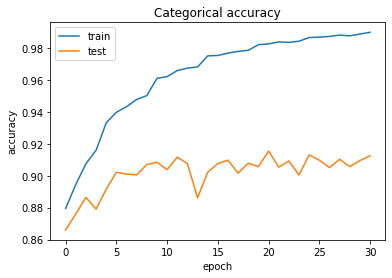

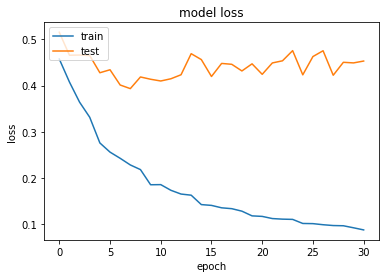

In [ ]:
#9.show results matlabpy
print(results.history)
# summarize history for categorical accuracy
plt.plot(results.history['sparse_categorical_accuracy'])
plt.plot(results.history['val_sparse_categorical_accuracy'])
plt.title('Categorical accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.0002
    drop = 0.8
    epochs_drop = 5.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=12, verbose=1)
checkpointer = ModelCheckpoint('model_Audiotransformer38.h5', monitor='val_sparse_categorical_accuracy', verbose=1,  save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 35, verbose=1,   
callbacks=[earlystopper, checkpointer, lrate ])

Epoch 1/35
Changing learning rate to 0.0002
3184/3184 [==============================] - 744s 234ms/step - loss: 0.0841 - sparse_categorical_accuracy: 0.9915 - val_loss: 0.4468 - val_sparse_categorical_accuracy: 0.9095

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.90951, saving model to model_Audiotransformer38.h5
Epoch 2/35
Changing learning rate to 0.0002
3184/3184 [==============================] - 746s 234ms/step - loss: 0.0813 - sparse_categorical_accuracy: 0.9918 - val_loss: 0.4588 - val_sparse_categorical_accuracy: 0.9076

Epoch 00002: val_sparse_categorical_accuracy did not improve from 0.90951
Epoch 3/35
Changing learning rate to 0.0002
3184/3184 [==============================] - 749s 235ms/step - loss: 0.0807 - sparse_categorical_accuracy: 0.9920 - val_loss: 0.4588 - val_sparse_categorical_accuracy: 0.9098

Epoch 00003: val_sparse_categorical_accuracy improved from 0.90951 to 0.90978, saving model to model_Audiotransformer38.h5
Epoch 4/35
Changing lea

In [ ]:
model.load_weights('model_Audiotransformer38.h5')

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.00014
    drop = 0.8
    epochs_drop = 5.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=12, verbose=1)
checkpointer = ModelCheckpoint('model_Audiotransformer38.h5', monitor='val_sparse_categorical_accuracy', verbose=1,  save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 35, verbose=1,   use_multiprocessing=True, workers= 120,
callbacks=[earlystopper, checkpointer, lrate ])

Epoch 1/35
Changing learning rate to 0.00014
3184/3184 [==============================] - 4069s 1s/step - loss: 0.0787 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.4711 - val_sparse_categorical_accuracy: 0.9106

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.91060, saving model to model_Audiotransformer38.h5

Changing learning rate to 0.00014
Epoch 2/35
Changing learning rate to 0.00014
3184/3184 [==============================] - 419s 132ms/step - loss: 0.0786 - sparse_categorical_accuracy: 0.9920 - val_loss: 0.9236 - val_sparse_categorical_accuracy: 0.7807

Epoch 00002: val_sparse_categorical_accuracy did not improve from 0.91060
Epoch 3/35
Changing learning rate to 0.00014
3184/3184 [==============================] - 435s 137ms/step - loss: 0.0875 - sparse_categorical_accuracy: 0.9894 - val_loss: 0.5471 - val_sparse_categorical_accuracy: 0.8837

Epoch 00003: val_sparse_categorical_accuracy did not improve from 0.91060

Epoch 00002: val_sparse_categorical

Process ForkPoolWorker-1294:
Process ForkPoolWorker-1263:
Process ForkPoolWorker-1353:
Process ForkPoolWorker-1217:
Process ForkPoolWorker-1212:
Process ForkPoolWorker-1393:
Process ForkPoolWorker-1367:
Process ForkPoolWorker-1376:
Process ForkPoolWorker-1303:
Process ForkPoolWorker-1310:
Process ForkPoolWorker-1253:
Process ForkPoolWorker-1361:
Process ForkPoolWorker-1324:
Process ForkPoolWorker-1226:
Process ForkPoolWorker-1238:
Process ForkPoolWorker-1305:
Process ForkPoolWorker-1206:
Process ForkPoolWorker-1209:
Process ForkPoolWorker-1273:
Process ForkPoolWorker-1201:
Process ForkPoolWorker-1219:
Process ForkPoolWorker-1242:
Process ForkPoolWorker-1261:
Process ForkPoolWorker-1295:
Process ForkPoolWorker-1202:
Process ForkPoolWorker-1207:
Process ForkPoolWorker-1216:
Process ForkPoolWorker-1309:
Process ForkPoolWorker-1213:
Process ForkPoolWorker-1239:
Process ForkPoolWorker-1287:
Process ForkPoolWorker-1306:
Process ForkPoolWorker-1277:
Process ForkPoolWorker-1211:
Process ForkPo

KeyboardInterrupt: ignored

  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, 

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.000112
    drop = 0.8
    epochs_drop = 5.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=16, verbose=1)
checkpointer = ModelCheckpoint('model_Audiotransformer38.h5', monitor='val_sparse_categorical_accuracy', verbose=1,  save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 44, verbose=1,  
callbacks=[earlystopper, checkpointer, lrate ])

Epoch 1/44
Changing learning rate to 0.000112
3184/3184 [==============================] - 380s 119ms/step - loss: 0.0701 - sparse_categorical_accuracy: 0.9945 - val_loss: 0.4611 - val_sparse_categorical_accuracy: 0.9049

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.90489, saving model to model_Audiotransformer38.h5
Epoch 2/44
Changing learning rate to 0.000112
3184/3184 [==============================] - 380s 119ms/step - loss: 0.0699 - sparse_categorical_accuracy: 0.9946 - val_loss: 0.5038 - val_sparse_categorical_accuracy: 0.9092

Epoch 00002: val_sparse_categorical_accuracy improved from 0.90489 to 0.90924, saving model to model_Audiotransformer38.h5
Epoch 3/44
Changing learning rate to 0.000112
3184/3184 [==============================] - 381s 120ms/step - loss: 0.0668 - sparse_categorical_accuracy: 0.9952 - val_loss: 0.5227 - val_sparse_categorical_accuracy: 0.9000

Epoch 00003: val_sparse_categorical_accuracy did not improve from 0.90924
Epoch 4/44
Changi

{'val_loss': [0.461133365009142, 0.5038069696530052, 0.5227204021552335, 0.5381735405196314, 0.5101056169880474, 0.4907180046581704, 0.5116238067979398, 0.49631892138201256, 0.5109544401907402, 0.4970911908732808, 0.5340926266234854, 0.526765690031259, 0.5350558500251045, 0.5086336296861587, 0.534771195669537, 0.5270305593052637, 0.5329937889524128, 0.529905019376589, 0.5452350418528785, 0.5578659788421962, 0.5361683760324251, 0.5478159973154897, 0.5158348440152147, 0.5495150815857494, 0.5603970308018767, 0.5846347510814667], 'val_sparse_categorical_accuracy': [0.904891304347826, 0.9092391304347827, 0.9, 0.8972826086956521, 0.9116847826086957, 0.9040760869565218, 0.9043478260869565, 0.9054347826086957, 0.9021739130434783, 0.9157608695652174, 0.9054347826086957, 0.9032608695652173, 0.9078804347826087, 0.9070652173913043, 0.9073369565217392, 0.9065217391304348, 0.907608695652174, 0.9073369565217392, 0.9097826086956522, 0.904891304347826, 0.9059782608695652, 0.9054347826086957, 0.90760869

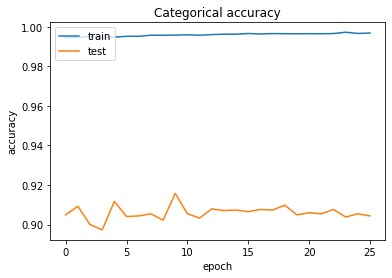

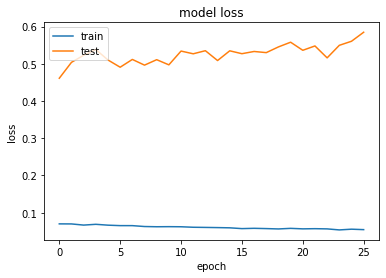

In [ ]:
#9.show results matlabpy
print(results.history)
# summarize history for categorical accuracy
plt.plot(results.history['sparse_categorical_accuracy'])
plt.plot(results.history['val_sparse_categorical_accuracy'])
plt.title('Categorical accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# New Section

In [ ]:

from keras.models import Model, load_model
from keras.layers import Input, Activation, Concatenate, Permute, Reshape, Flatten, Lambda, Dot, Softmax
from keras.layers import Add, Dropout, BatchNormalization, Conv2D, Reshape, MaxPooling2D, Dense, LSTM, Bidirectional, Concatenate, CuDNNLSTM
from keras import backend as K
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from keras import backend as K
from keras import optimizers
from kapre.time_frequency import Melspectrogram, Spectrogram
from kapre.augmentation import AdditiveNoise
import keras
from librosa.feature import chroma_stft
# Importing the important libraries
from keras.layers import Dense, GlobalAveragePooling2D, GlobalAveragePooling1D
from keras.models import Model
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from kapre.utils import Normalization2D
import tensorflow as tf

from tensorflow.keras.metrics import TruePositives, FalsePositives, TrueNegatives, FalseNegatives, Precision, Recall, AUC

METRICS = [
      TruePositives(name='tp'),
      FalsePositives(name='fp'),
      TrueNegatives(name='tn'),
      FalseNegatives(name='fn'), 
      Precision(name='precision'),
      Recall(name='recall'),
      AUC(name='auc'),
      
]
metrics = METRICS



nCategories=36
samplingrate = 16000
inputLength = 16000
"""
Base fully convolutional model for speech recognition
"""
"""
        %%%%%%%%%%%%%%%%transformer_depth = 8
        block = TransformerBlock('Transformer', num_heads=8)
        act_layer = TransformerACT()
        next_input = input  # (batch_size, sequence_length, input_size)
        for i in range(transformer_depth):
            next_input = block(next_input, step=i)
            next_input, act_weighted_output = act_layer(next_input)
        act_layer.finalize()  # adds loss
        result = act_weighted_output
"""
inputs = Input((16000,))

y = Reshape((1, -1)) (inputs)

x = Melspectrogram(n_dft=1024, n_hop=128, input_shape=(1, 16000),
                          padding='same', sr=samplingrate, n_mels=128,
                          fmin=200.0, fmax=6500, power_melgram=1.0,
                          return_decibel_melgram=True, trainable_fb=False,
                          trainable_kernel=False,
                          name='mel_stft1') (y)
print((x.shape), 'Melspectogram')
#z = mfcc(y=y, sr=22050, S=None, n_mfcc=20, dct_type=2, norm='ortho', lifter=0 )

z = x
z = AdditiveNoise()(z)
print((z.shape), 'Spectrogram')

z = Normalization2D(int_axis=0)(z)
z = Permute((2,1,3)) (z) #this is strange - but now we have (batch_size, sequence, vec_dim)
print((z.shape), 'zpermute')
#z = rms(S=z, frame_length=1024, hop_length=512, center=True, pad_mode='reflect')
#print((z.shape), 'rms')



x = Normalization2D(int_axis=0)(x)
print((x.shape), 'Normalized2d')
x = Permute((2,1,3)) (x) #this is strange - but now we have (batch_size, sequence, vec_dim)
print((x.shape), 'permute')




x = Conv2D(32, (3,3) , activation='relu', padding='same') (x)
x = BatchNormalization() (x)
print((x.shape), '1stconv')

x = Conv2D(64, (3,3) , activation='relu', padding='same') (x)
x = BatchNormalization() (x)
print((x.shape), '1stconv')

x = Conv2D(1, (3,3) ,  padding='same') (x)
x = BatchNormalization() (x)
x= Activation('relu')(x)
print((x.shape), 'lastconv')




z = Conv2D(32, (3,3) , activation='relu', padding='same') (z)
z = BatchNormalization() (z)
print((z.shape), 'spect_1stconv')
z = Conv2D(64, (3,3) , activation='relu', padding='same') (z)
z = BatchNormalization() (z)
print((z.shape), 'spect_1stconv')


z = Conv2D(1, (3,3) ,  padding='same') (z)
z = BatchNormalization()(z)
z= Activation('relu')(z)
print((z.shape), 'spect_lastconv')



zee = Lambda(lambda q: K.squeeze(q, -1), name='squeeze_last_dim1') (x) #keras.backend.squeeze(x, axis)
print((zee.shape), 'after squeez last dimention mel')
zey = Lambda(lambda q: K.squeeze(q, -1), name='squeeze_last_dim') (z)
print((zey.shape), 'after squeez last dimention spec')






transformer_depth = 4
block = TransformerBlock('Transformer', num_heads=4)
act_layer = TransformerACT()

next_input = zee  # (batch_size, sequence_length, input_size)
for i in range(transformer_depth):
    next_input = block(next_input,  )  # adds loss
    print((next_input.shape))  #
    next_input = LayerNormalization()(next_input)
    next_input, act_weighted_output = act_layer(next_input)
    print((next_input.shape),'1')   #
    print((act_weighted_output.shape),'2')   #
act_layer.finalize()  # adds loss
result = act_weighted_output






x = result
print((x.shape), 'actweightedoutput')




next_input = zey  # (batch_size, sequence_length, input_size)
for i in range(transformer_depth):
    next_input = block(next_input,  )  # adds loss
    print((next_input.shape))  #
    next_input = LayerNormalization()(next_input)
    next_input, act_weighted_output = act_layer(next_input)
    print((next_input.shape),'1')   #
    print((act_weighted_output.shape),'2')   #
act_layer.finalize()  # adds loss
result = act_weighted_output
z= result






x = Concatenate(axis=-1)([x, z])
print((zee.shape), 'concotinate')








#x = Lambda(lambda q: q[:,64]) (x) 
x= GlobalAveragePooling1D()(x)
print((x.shape), 'Global_AP')
x = Dense(128, activation = 'relu')(x)
print((x.shape), 'dense64')
output = Dense(36, activation = 'softmax')(x)
print((output.shape))
model = Model(inputs=[inputs], outputs=[output])

model.compile(optimizer='adam', loss=['sparse_categorical_crossentropy'], metrics=['sparse_categorical_accuracy'])
#model.compile(optimizer='adam', loss=['sparse_categorical_crossentropy'], metrics=metrics)
keras.utils.print_summary(model, line_length=None, positions=None, print_fn=None)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



(?, 128, ?, 1) Melspectogram


(?, 128, ?, 1) Spectrogram
(?, ?, 128, 1) zpermute
(?, 128, ?, 1) Normalized2d
(?, ?, 128, 1) permute








(?, ?, 128, 32) 1stconv
(?, ?, 128, 64) 1stconv
(?, ?, 128, 1) lastconv
(?, ?, 128, 32) spect_1stconv
(?, ?, 128, 64) spect_1stconv
(?, ?, 128, 1) spect_lastconv
(?, ?, 128) after squeez last dimention mel
(?, ?, 128) after squeez last dimention spec
(?, 125, 128)
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
(?, 125, 128) 1
(?, 125, 128) 2
(?, 125, 128)
(?, 125, 128) 1
(?, 125, 128) 2
(?, 125, 128)
(?, 125, 128) 1
(?, 125, 128) 2
(?, 125, 128)
(?, 125, 128) 1
(?, 125, 128) 2
(?, 125, 128) actweightedoutput
(?, 125, 128)
(?, 125, 128) 1
(?, 125, 128) 2
(?, 125, 128)
(?, 125, 128) 1
(?, 125, 128) 2
(?, 125, 128)
(?, 125, 128) 1
(?, 125, 128) 2
(?, 125, 128)
(?, 125, 128) 1
(?, 125, 128) 2
(?, ?, 128) concotinate
(?, 25

In [ ]:
model.save('model_Audiotransformer44.h5')

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.001
    drop = 0.8
    epochs_drop = 5.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=10, verbose=1)
checkpointer = ModelCheckpoint('model_Audiotransformer44.h5', monitor='val_sparse_categorical_accuracy', verbose=1,  save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 35, verbose=1,   use_multiprocessing=True, workers= 24,
callbacks=[earlystopper, checkpointer, lrate ])

Epoch 1/35
Changing learning rate to 0.001
3184/3184 [==============================] - 793s 249ms/step - loss: 1.1045 - sparse_categorical_accuracy: 0.7135 - val_loss: 0.7703 - val_sparse_categorical_accuracy: 0.8136

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.81359, saving model to model_Audiotransformer44.h5
Epoch 2/35
Changing learning rate to 0.001
3184/3184 [==============================] - 778s 244ms/step - loss: 0.6153 - sparse_categorical_accuracy: 0.8538 - val_loss: 0.6510 - val_sparse_categorical_accuracy: 0.8454

Epoch 00002: val_sparse_categorical_accuracy improved from 0.81359 to 0.84538, saving model to model_Audiotransformer44.h5


OSError: ignored

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.001
    drop = 0.8
    epochs_drop = 5.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=16, verbose=1)
checkpointer = ModelCheckpoint('model_Audiotransformer44.h5', monitor='val_sparse_categorical_accuracy', verbose=1,  save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 45, verbose=1, 
callbacks=[earlystopper, checkpointer, lrate ])

Epoch 1/45
Changing learning rate to 0.001
3184/3184 [==============================] - 772s 242ms/step - loss: 0.5282 - sparse_categorical_accuracy: 0.8794 - val_loss: 0.5778 - val_sparse_categorical_accuracy: 0.8644

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.86440, saving model to model_Audiotransformer44.h5
Epoch 2/45
Changing learning rate to 0.001
3184/3184 [==============================] - 773s 243ms/step - loss: 0.4817 - sparse_categorical_accuracy: 0.8916 - val_loss: 0.6168 - val_sparse_categorical_accuracy: 0.8554

Epoch 00002: val_sparse_categorical_accuracy did not improve from 0.86440
Epoch 3/45
Changing learning rate to 0.001
3184/3184 [==============================] - 775s 244ms/step - loss: 0.4476 - sparse_categorical_accuracy: 0.9019 - val_loss: 0.5203 - val_sparse_categorical_accuracy: 0.8864

Epoch 00003: val_sparse_categorical_accuracy improved from 0.86440 to 0.88641, saving model to model_Audiotransformer44.h5
Epoch 4/45
Changing learni

In [ ]:
model.load_weights('model_Audiotransformer44.h5')

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.0004
    drop = 0.8
    epochs_drop = 5.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=10, verbose=1)
checkpointer = ModelCheckpoint('model_Audiotransformer44.h5', monitor='val_sparse_categorical_accuracy', verbose=1,  save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 35, verbose=1,   use_multiprocessing=True, workers= 24,
callbacks=[earlystopper, checkpointer, lrate ])



Epoch 1/35
Changing learning rate to 0.0004


/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:610: UserWarning: The input 1188 could not be retrieved. It could be because a worker has died.
  UserWarning)


3184/3184 [==============================] - 6214s 2s/step - loss: 0.2044 - sparse_categorical_accuracy: 0.9702 - val_loss: 0.4146 - val_sparse_categorical_accuracy: 0.9196

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.91957, saving model to model_Audiotransformer44.h5
Epoch 2/35
Changing learning rate to 0.0004


Process ForkPoolWorker-62:
Process ForkPoolWorker-51:
Process ForkPoolWorker-18:
Process ForkPoolWorker-52:
Process ForkPoolWorker-63:
Process ForkPoolWorker-4:
Process ForkPoolWorker-46:
Process ForkPoolWorker-41:
Process ForkPoolWorker-30:
Process ForkPoolWorker-3:
Process ForkPoolWorker-16:
Process ForkPoolWorker-6:
Process ForkPoolWorker-59:
Process ForkPoolWorker-42:
Process ForkPoolWorker-20:
Process ForkPoolWorker-14:
Process ForkPoolWorker-56:
Process ForkPoolWorker-53:
Process ForkPoolWorker-47:
Process ForkPoolWorker-55:
Process ForkPoolWorker-65:
Process ForkPoolWorker-48:
Process ForkPoolWorker-34:
Process ForkPoolWorker-50:
Process ForkPoolWorker-38:
Process ForkPoolWorker-26:
Process ForkPoolWorker-54:
Process ForkPoolWorker-23:
  File "/usr/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
Traceback (most recent call last):
Process ForkPoolWorker-60:
Process ForkPoolWorker-68:
Traceback (most recent call last):
Process ForkPoolWorker-12:
Proces


Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.91957, saving model to model_Audiotransformer44.h5


  File "/usr/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/usr/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
KeyboardInterrupt
KeyboardInterrupt
  File "/usr/lib/python3.6/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/usr/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
KeyboardInterrupt
  File "/usr/lib/python3.6/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
KeyboardInterrupt
  File "/usr/lib/python3.6/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
  File "/usr/lib/python3.6/multiprocessing/pool.py"

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-14-a636b853745d>", line 23, in <module>
    callbacks=[earlystopper, checkpointer, lrate ])
  File "/usr/local/lib/python3.6/dist-packages/keras/legacy/interfaces.py", line 91, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/keras/engine/training.py", line 1658, in fit_generator
    initial_epoch=initial_epoch)
  File "/usr/local/lib/python3.6/dist-packages/keras/engine/training_generator.py", line 181, in fit_generator
    generator_output = next(output_generator)
  File "/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py", line 602, in get
    future = self.queue.get(block=True)
  File "/usr/lib/python3.6/queue.py", line 164, in get
    self.not_empty.wait()
  File "/usr/lib/python3.6/threading.py", line 295, in wa

KeyboardInterrupt: ignored

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.0004
    drop = 0.8
    epochs_drop = 5.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=10, verbose=1)
checkpointer = ModelCheckpoint('model_Audiotransformer44.h5', monitor='val_sparse_categorical_accuracy', verbose=1,  save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 35, verbose=1,  
callbacks=[earlystopper, checkpointer, lrate ])

Epoch 1/35
Changing learning rate to 0.0004
3184/3184 [==============================] - 397s 125ms/step - loss: 0.1970 - sparse_categorical_accuracy: 0.9711 - val_loss: 0.4282 - val_sparse_categorical_accuracy: 0.9179

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.91793, saving model to model_Audiotransformer44.h5
Epoch 2/35
Changing learning rate to 0.0004
3184/3184 [==============================] - 379s 119ms/step - loss: 0.1928 - sparse_categorical_accuracy: 0.9722 - val_loss: 0.4035 - val_sparse_categorical_accuracy: 0.9204

Epoch 00002: val_sparse_categorical_accuracy improved from 0.91793 to 0.92038, saving model to model_Audiotransformer44.h5
Epoch 3/35
Changing learning rate to 0.0004
3184/3184 [==============================] - 370s 116ms/step - loss: 0.1863 - sparse_categorical_accuracy: 0.9729 - val_loss: 0.4266 - val_sparse_categorical_accuracy: 0.9193

Epoch 00003: val_sparse_categorical_accuracy did not improve from 0.92038
Epoch 4/35
Changing lea

# Exp model 45

In [ ]:

from keras.models import Model, load_model
from keras.layers import Input, Activation, Concatenate, Permute, Reshape, Flatten, Lambda, Dot, Softmax
from keras.layers import Add, Dropout, BatchNormalization, Conv2D, Reshape, MaxPooling2D, Dense, LSTM, Bidirectional, Concatenate, CuDNNLSTM
from keras import backend as K
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from keras import backend as K
from keras import optimizers
from kapre.time_frequency import Melspectrogram, Spectrogram
from kapre.augmentation import AdditiveNoise
import keras
from librosa.feature import chroma_stft
# Importing the important libraries
from keras.layers import Dense, GlobalAveragePooling2D, GlobalAveragePooling1D
from keras.models import Model
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from kapre.utils import Normalization2D
import tensorflow as tf

from tensorflow.keras.metrics import TruePositives, FalsePositives, TrueNegatives, FalseNegatives, Precision, Recall, AUC

METRICS = [
      TruePositives(name='tp'),
      FalsePositives(name='fp'),
      TrueNegatives(name='tn'),
      FalseNegatives(name='fn'), 
      Precision(name='precision'),
      Recall(name='recall'),
      AUC(name='auc'),
      
]
metrics = METRICS



nCategories=36
samplingrate = 16000
inputLength = 16000
"""
Base fully convolutional model for speech recognition
"""
"""
        %%%%%%%%%%%%%%%%transformer_depth = 8
        block = TransformerBlock('Transformer', num_heads=8)
        act_layer = TransformerACT()
        next_input = input  # (batch_size, sequence_length, input_size)
        for i in range(transformer_depth):
            next_input = block(next_input, step=i)
            next_input, act_weighted_output = act_layer(next_input)
        act_layer.finalize()  # adds loss
        result = act_weighted_output
"""
inputs = Input((16000,))

y = Reshape((1, -1)) (inputs)

x = Melspectrogram(n_dft=1024, n_hop=128, input_shape=(1, 16000),
                          padding='same', sr=samplingrate, n_mels=80,
                          fmin=40.0, fmax=samplingrate/2, power_melgram=1.0,
                          return_decibel_melgram=True, trainable_fb=False,
                          trainable_kernel=False,
                          name='mel_stft1') (y)
print((x.shape), 'Melspectogram')
#z = mfcc(y=y, sr=22050, S=None, n_mfcc=20, dct_type=2, norm='ortho', lifter=0 )

z = x
z = AdditiveNoise()(z)
print((z.shape), 'Spectrogram')

z = Normalization2D(int_axis=0)(z)
z = Permute((2,1,3)) (z) #this is strange - but now we have (batch_size, sequence, vec_dim)
print((z.shape), 'zpermute')
#z = rms(S=z, frame_length=1024, hop_length=512, center=True, pad_mode='reflect')
#print((z.shape), 'rms')



x = Normalization2D(int_axis=0)(x)
print((x.shape), 'Normalized2d')
x = Permute((2,1,3)) (x) #this is strange - but now we have (batch_size, sequence, vec_dim)
print((x.shape), 'permute')




x = Conv2D(32, (3,3) , activation='relu', padding='same') (x)
x = BatchNormalization() (x)
print((x.shape), '1stconv')

x = Conv2D(64, (3,3) , activation='relu', padding='same') (x)
x = BatchNormalization() (x)
print((x.shape), '1stconv')

x = Conv2D(1, (3,3) ,  padding='same') (x)
x = BatchNormalization() (x)
x= Activation('relu')(x)
print((x.shape), 'lastconv')




z = Conv2D(32, (3,3) , activation='relu', padding='same') (z)
z = BatchNormalization() (z)
print((z.shape), 'spect_1stconv')
z = Conv2D(64, (3,3) , activation='relu', padding='same') (z)
z = BatchNormalization() (z)
print((z.shape), 'spect_1stconv')


z = Conv2D(1, (3,3) ,  padding='same') (z)
z = BatchNormalization()(z)
z= Activation('relu')(z)
print((z.shape), 'spect_lastconv')



zee = Lambda(lambda q: K.squeeze(q, -1), name='squeeze_last_dim1') (x) #keras.backend.squeeze(x, axis)
print((zee.shape), 'after squeez last dimention mel')
zey = Lambda(lambda q: K.squeeze(q, -1), name='squeeze_last_dim') (z)
print((zey.shape), 'after squeez last dimention spec')

zee = Concatenate(axis=-1)([zee, zey])
print((zee.shape), 'concotinate')




transformer_depth = 8
block = TransformerBlock('Transformer', num_heads=4)
act_layer = TransformerACT()

next_input = zee  # (batch_size, sequence_length, input_size)
for i in range(transformer_depth):
    next_input = block(next_input,  )  # adds loss
    print((next_input.shape))  #
    next_input = LayerNormalization()(next_input)
    next_input, act_weighted_output = act_layer(next_input)
    print((next_input.shape),'1')   #
    print((act_weighted_output.shape),'2')   #
act_layer.finalize()  # adds loss
result = act_weighted_output
x = result
print((x.shape), 'actweightedoutput')
#x = Lambda(lambda q: q[:,64]) (x) 
x= GlobalAveragePooling1D()(x)
print((x.shape), 'Global_AP')
x = Dense(128, activation = 'relu')(x)
print((x.shape), 'dense64')
output = Dense(36, activation = 'softmax')(x)
print((output.shape))
model = Model(inputs=[inputs], outputs=[output])

model.compile(optimizer='adam', loss=['sparse_categorical_crossentropy'], metrics=['sparse_categorical_accuracy'])
#model.compile(optimizer='adam', loss=['sparse_categorical_crossentropy'], metrics=metrics)
keras.utils.print_summary(model, line_length=None, positions=None, print_fn=None)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



(?, 80, ?, 1) Melspectogram


(?, 80, ?, 1) Spectrogram
(?, ?, 80, 1) zpermute
(?, 80, ?, 1) Normalized2d
(?, ?, 80, 1) permute








(?, ?, 80, 32) 1stconv
(?, ?, 80, 64) 1stconv
(?, ?, 80, 1) lastconv
(?, ?, 80, 32) spect_1stconv
(?, ?, 80, 64) spect_1stconv
(?, ?, 80, 1) spect_lastconv
(?, ?, 80) after squeez last dimention mel
(?, ?, 80) after squeez last dimention spec
(?, ?, 160) concotinate
(?, 125, 160)
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
(?, 125, 160) 1
(?, 125, 160) 2
(?, 125, 160)
(?, 125, 160) 1
(?, 125, 160) 2
(?, 125, 160)
(?, 125, 160) 1
(?, 125, 160) 2
(?, 125, 160)
(?, 125, 160) 1
(?, 125, 160) 2
(?, 125, 160)
(?, 125, 160) 1
(?, 125, 160) 2
(?, 125, 160)
(?, 125, 160) 1
(?, 125, 160) 2
(?, 125, 160)
(?, 125, 160) 1
(?, 125, 160) 2
(?, 125, 160)
(?, 125, 160) 1
(?, 125, 160) 2
(?, 125, 160) actweightedoutput
(?, 160) Global_AP


In [ ]:
model.save('model_Audiotransformer45.h5')

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.001
    drop = 0.8
    epochs_drop = 5.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=10, verbose=1)
checkpointer = ModelCheckpoint('model_Audiotransformer45.h5', monitor='val_sparse_categorical_accuracy', verbose=1,  save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 35, verbose=1,  use_multiprocessing=True, workers= 20, 
callbacks=[earlystopper, checkpointer, lrate ])

Epoch 1/35
Changing learning rate to 0.001
3184/3184 [==============================] - 3902s 1s/step - loss: 0.8761 - sparse_categorical_accuracy: 0.7584 - val_loss: 0.6591 - val_sparse_categorical_accuracy: 0.8185

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.81848, saving model to model_Audiotransformer45.h5
Epoch 2/35
Changing learning rate to 0.001
3184/3184 [==============================] - 488s 153ms/step - loss: 0.5045 - sparse_categorical_accuracy: 0.8633 - val_loss: 0.5799 - val_sparse_categorical_accuracy: 0.8484

Epoch 00002: val_sparse_categorical_accuracy improved from 0.81848 to 0.84837, saving model to model_Audiotransformer45.h5

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.81848, saving model to model_Audiotransformer45.h5

Epoch 00002: val_sparse_categorical_accuracy improved from 0.81848 to 0.84837, saving model to model_Audiotransformer45.h5


OSError: ignored

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.001
    drop = 0.8
    epochs_drop = 5.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=15, verbose=1)
checkpointer = ModelCheckpoint('model_Audiotransformer45.h5', monitor='val_sparse_categorical_accuracy', verbose=1,  save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 35, verbose=1, 
callbacks=[earlystopper, checkpointer, lrate ])

Epoch 1/35
Changing learning rate to 0.001
3184/3184 [==============================] - 481s 151ms/step - loss: 0.4169 - sparse_categorical_accuracy: 0.8863 - val_loss: 0.4671 - val_sparse_categorical_accuracy: 0.8758

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.87582, saving model to model_Audiotransformer45.h5
Epoch 2/35
Changing learning rate to 0.001
3184/3184 [==============================] - 481s 151ms/step - loss: 0.3694 - sparse_categorical_accuracy: 0.8991 - val_loss: 0.4124 - val_sparse_categorical_accuracy: 0.8883

Epoch 00002: val_sparse_categorical_accuracy improved from 0.87582 to 0.88832, saving model to model_Audiotransformer45.h5
Epoch 3/35
Changing learning rate to 0.001
3184/3184 [==============================] - 482s 151ms/step - loss: 0.3374 - sparse_categorical_accuracy: 0.9087 - val_loss: 0.4079 - val_sparse_categorical_accuracy: 0.8889

Epoch 00003: val_sparse_categorical_accuracy improved from 0.88832 to 0.88886, saving model to model

{'val_loss': [0.46706564918808313, 0.4123840046317681, 0.40790692755709523, 0.4292740253002747, 0.3544048423676387, 0.35752400995596595, 0.35579405938801556, 0.35380267449047254, 0.327424103151197, 0.3273061940527481, 0.32388685993526295, 0.3229564080905655, 0.3022887960724209, 0.34169583263928477, 0.3266505929115026, 0.32483272776007655, 0.30267363833668437, 0.32203433124915415, 0.31873612896255826, 0.3244650897124539, 0.3495669091525285, 0.30636574154638724, 0.33579400455498176, 0.31664128195008506, 0.29692565231867457, 0.40343789370811506, 0.3490011732701374, 0.3108294616088919, 0.331934070247023, 0.33790752374283645, 0.32405893329692925, 0.32254834348416844, 0.3428487562129031, 0.34369459770943805, 0.33723636416961317], 'val_sparse_categorical_accuracy': [0.8758152173913043, 0.8883152173913044, 0.8888586956521739, 0.8858695652173914, 0.910054347826087, 0.9078804347826087, 0.9065217391304348, 0.9092391304347827, 0.9122282608695652, 0.9173913043478261, 0.9198369565217391, 0.923097826

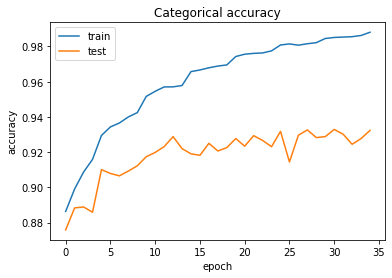

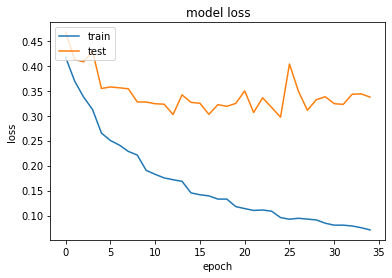

In [ ]:
#9.show results matlabpy
print(results.history)
# summarize history for categorical accuracy
plt.plot(results.history['sparse_categorical_accuracy'])
plt.plot(results.history['val_sparse_categorical_accuracy'])
plt.title('Categorical accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.00016
    drop = 0.4
    epochs_drop = 8.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=16, verbose=1)
checkpointer = ModelCheckpoint('model_Audiotransformer45.h5', monitor='val_sparse_categorical_accuracy', verbose=1,  save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 35, verbose=1, 
callbacks=[earlystopper, checkpointer, lrate ])

Epoch 1/35
Changing learning rate to 0.00016
3184/3184 [==============================] - 494s 155ms/step - loss: 0.0525 - sparse_categorical_accuracy: 0.9927 - val_loss: 0.3961 - val_sparse_categorical_accuracy: 0.9313

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.93125, saving model to model_Audiotransformer45.h5
Epoch 2/35
Changing learning rate to 0.00016
3184/3184 [==============================] - 495s 156ms/step - loss: 0.0538 - sparse_categorical_accuracy: 0.9925 - val_loss: 0.3914 - val_sparse_categorical_accuracy: 0.9266

Epoch 00002: val_sparse_categorical_accuracy did not improve from 0.93125
Epoch 3/35
Changing learning rate to 0.00016
3184/3184 [==============================] - 491s 154ms/step - loss: 0.0532 - sparse_categorical_accuracy: 0.9930 - val_loss: 0.4156 - val_sparse_categorical_accuracy: 0.9272

Epoch 00003: val_sparse_categorical_accuracy did not improve from 0.93125
Epoch 4/35
Changing learning rate to 0.00016
3184/3184 [=============

# Exp model 46

In [ ]:

from keras.models import Model, load_model
from keras.layers import Input, Activation, Concatenate, Permute, Reshape, Flatten, Lambda, Dot, Softmax
from keras.layers import Add, Dropout, BatchNormalization, Conv2D, Reshape, MaxPooling2D, Dense, LSTM, Bidirectional, Concatenate
from keras import backend as K
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from keras import backend as K
from keras import optimizers
from kapre.time_frequency import Melspectrogram, Spectrogram
import keras
# Importing the important libraries
from keras.layers import Dense, GlobalAveragePooling2D, GlobalAveragePooling1D
from keras.models import Model
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from kapre.utils import Normalization2D
from kapre.augmentation import AdditiveNoise
nCategories=36
samplingrate = 16000
inputLength = 16000
"""
Base fully convolutional model for speech recognition
"""
"""
        %%%%%%%%%%%%%%%%transformer_depth = 8
        block = TransformerBlock('Transformer', num_heads=8)
        act_layer = TransformerACT()
        next_input = input  # (batch_size, sequence_length, input_size)
        for i in range(transformer_depth):
            next_input = block(next_input, step=i)
            next_input, act_weighted_output = act_layer(next_input)
        act_layer.finalize()  # adds loss
        result = act_weighted_output
"""
inputs = Input((16000,))

x1 = Reshape((1, -1)) (inputs)

x = Melspectrogram(n_dft=1024, n_hop=128, input_shape=(1, 16000),
                          padding='same', sr=samplingrate, n_mels=128,
                          fmin=40.0, fmax=samplingrate/2, power_melgram=1.0,
                          return_decibel_melgram=True, trainable_fb=False,
                          trainable_kernel=False,
                          name='mel_stft') (x1)

x = Normalization2D(int_axis=0)(x)
x = Conv2D(32, (3,3) ,  padding='same') (x)
x = BatchNormalization() (x)
x= Activation('relu')(x)
x = Conv2D(64, (3,3) ,  padding='same') (x)
x = BatchNormalization() (x)
x= Activation('relu')(x)
x = Conv2D(1, (3,3) ,  padding='same') (x)
x = BatchNormalization() (x)
x= Activation('relu')(x)
x = Permute((2,1,3)) (x) #this is strange - but now we have (batch_size, sequence, vec_dim)
print((x.shape))
zee = Lambda(lambda q: K.squeeze(q, -1), name='squeeze_last_dim') (x) #keras.backend.squeeze(x, axis)



y = Melspectrogram(n_dft=512, n_hop=256, input_shape=(1, 16000),
                          padding='same', sr=samplingrate, n_mels=128,
                          fmin=40.0, fmax=6000, power_melgram=1.0,
                          return_decibel_melgram=False, trainable_fb=False,
                          trainable_kernel=False,
                          name='mel_stfto') (x1)

y = AdditiveNoise(power=0.2)(y)
y = Normalization2D(int_axis=0)(y)
y = Conv2D(32, (3,3) ,  padding='same') (y)
y = BatchNormalization() (y)
y= Activation('relu')(y)
y = Conv2D(64, (3,3) ,  padding='same') (y)
y = BatchNormalization() (y)
y= Activation('relu')(y)
y = Conv2D(1, (3,3) ,  padding='same') (y)
y = BatchNormalization() (y)
y= Activation('relu')(y)
y = Permute((2,1,3)) (y) #this is strange - but now we have (batch_size, sequence, vec_dim)
print((x.shape))
zey = Lambda(lambda q: K.squeeze(q, -1), name='squeeze_last_dim1') (y) #keras.backend.squeeze(x, axis)

zee = Concatenate(axis=1)([zee, zey])






transformer_depth = 6
block = TransformerBlock('Transformer', num_heads=4)
act_layer = TransformerACT()
print((zee.shape))
next_input = zee  # (batch_size, sequence_length, input_size)
for i in range(transformer_depth):
    next_input = block(next_input,)  # adds loss
    print((next_input.shape))
    next_input = Dropout(0.25)(next_input)
    next_input, act_weighted_output = act_layer(next_input)
    print((next_input.shape),'1')
    print((act_weighted_output.shape),'2')
act_layer.finalize()  # adds loss
result = act_weighted_output
x = result
print((x.shape))
#x = Lambda(lambda q: q[:,64]) (x) 
x= GlobalAveragePooling1D()(x)
print((x.shape))
output = Dense(36, activation = 'softmax')(x)
print((output.shape))
model = Model(inputs=[inputs], outputs=[output])

model.compile(optimizer='adam', loss=['sparse_categorical_crossentropy'], metrics=['sparse_categorical_accuracy'])
keras.utils.print_summary(model, line_length=None, positions=None, print_fn=None)


tracking <tf.Variable 'mel_stft/real_kernels:0' shape=(1024, 1, 1, 513) dtype=float32> dft_real_kernels
tracking <tf.Variable 'mel_stft/imag_kernels:0' shape=(1024, 1, 1, 513) dtype=float32> dft_imag_kernels
tracking <tf.Variable 'mel_stft/Variable:0' shape=(513, 128) dtype=float32> freq2mel
(None, None, 128, 1)
tracking <tf.Variable 'mel_stfto/real_kernels:0' shape=(512, 1, 1, 257) dtype=float32> dft_real_kernels
tracking <tf.Variable 'mel_stfto/imag_kernels:0' shape=(512, 1, 1, 257) dtype=float32> dft_imag_kernels
tracking <tf.Variable 'mel_stfto/Variable:0' shape=(257, 128) dtype=float32> freq2mel
(None, None, 128, 1)
(None, None, 128)
(None, 188, 128)
(None, 188, 128) 1
(None, 188, 128) 2
(None, 188, 128)
(None, 188, 128) 1
(None, 188, 128) 2
(None, 188, 128)
(None, 188, 128) 1
(None, 188, 128) 2
(None, 188, 128)
(None, 188, 128) 1
(None, 188, 128) 2
(None, 188, 128)
(None, 188, 128) 1
(None, 188, 128) 2
(None, 188, 128)
(None, 188, 128) 1
(None, 188, 128) 2
(None, 188, 128)
(None,

In [ ]:
pip install tensorflow==1.14

In [ ]:
model.save('model_Audiotransformer47.h5')

In [ ]:
model.load_weights('model_Audiotransformer46.h5')

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.001
    drop = 0.8
    epochs_drop = 5.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=10, verbose=1)
checkpointer = ModelCheckpoint('model_Audiotransformer47.h5', monitor='val_sparse_categorical_accuracy', verbose=1,  save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 35, verbose=1,  use_multiprocessing=True, workers= 60, 
callbacks=[earlystopper, checkpointer, lrate ])

Epoch 1/35
Changing learning rate to 0.001
3184/3184 [==============================] - 4009s 1s/step - loss: 1.5944 - sparse_categorical_accuracy: 0.5516 - val_loss: 1.1406 - val_sparse_categorical_accuracy: 0.6649

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.66495, saving model to model_Audiotransformer47.h5
Changing learning rate to 0.001
Epoch 2/35
Changing learning rate to 0.001
3184/3184 [==============================] - 1045s 328ms/step - loss: 0.9931 - sparse_categorical_accuracy: 0.7204 - val_loss: 0.9317 - val_sparse_categorical_accuracy: 0.6976

Epoch 00002: val_sparse_categorical_accuracy improved from 0.66495 to 0.69755, saving model to model_Audiotransformer47.h5


OSError: ignored

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.001
    drop = 0.6
    epochs_drop = 4.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=15, verbose=1)
checkpointer = ModelCheckpoint('model_Audiotransformer47.h5', monitor='val_sparse_categorical_accuracy', verbose=1,  save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 45, verbose=1,  
callbacks=[earlystopper, checkpointer, lrate ])

Epoch 1/45
Changing learning rate to 0.001
3184/3184 [==============================] - 1039s 326ms/step - loss: 3.5730 - sparse_categorical_accuracy: 0.0375 - val_loss: 3.5920 - val_sparse_categorical_accuracy: 0.0334

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.03342, saving model to model_Audiotransformer47.h5
Epoch 2/45
Changing learning rate to 0.001
3184/3184 [==============================] - 1039s 326ms/step - loss: 3.5707 - sparse_categorical_accuracy: 0.0373 - val_loss: 3.5673 - val_sparse_categorical_accuracy: 0.0359

Epoch 00002: val_sparse_categorical_accuracy improved from 0.03342 to 0.03587, saving model to model_Audiotransformer47.h5
Epoch 3/45
Changing learning rate to 0.001
1768/3184 [===============>..............] - ETA: 7:36 - loss: 3.5715 - sparse_categorical_accuracy: 0.0379

In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.00016
    drop = 0.8
    epochs_drop = 6.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=15, verbose=1)
checkpointer = ModelCheckpoint('model_Audiotransformer46.h5', monitor='val_sparse_categorical_accuracy', verbose=1,  save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 45, verbose=1,  
callbacks=[earlystopper, checkpointer, lrate ])

Epoch 1/45
Changing learning rate to 0.0004
3184/3184 [==============================] - 718s 226ms/step - loss: 0.1814 - sparse_categorical_accuracy: 0.9609 - val_loss: 0.3857 - val_sparse_categorical_accuracy: 0.9152

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.91522, saving model to model_Audiotransformer46.h5
Epoch 2/45
Changing learning rate to 0.0004
3184/3184 [==============================] - 718s 226ms/step - loss: 0.1769 - sparse_categorical_accuracy: 0.9623 - val_loss: 0.3833 - val_sparse_categorical_accuracy: 0.9141

Epoch 00002: val_sparse_categorical_accuracy did not improve from 0.91522
Epoch 3/45
Changing learning rate to 0.0004
3184/3184 [==============================] - 718s 226ms/step - loss: 0.1741 - sparse_categorical_accuracy: 0.9630 - val_loss: 0.3956 - val_sparse_categorical_accuracy: 0.9125

Epoch 00003: val_sparse_categorical_accuracy did not improve from 0.91522
Epoch 4/45
Changing learning rate to 0.0004
3184/3184 [=================

In [ ]:
model.load_weights('model_Audiotransformer46.h5')


In [ ]:
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
def step_decay(epoch):
    initial_lrate = 0.001
    drop = 0.9
    epochs_drop = 2.0
    lrate = initial_lrate * math.pow(drop,  
            math.floor((1+epoch)/epochs_drop))
    
    if (lrate < 4e-5):
        lrate = 4e-5
      
    print('Changing learning rate to {}'.format(lrate))
    return lrate
lrate = LearningRateScheduler(step_decay)
#8.fir model and Run Epoches on model

from keras.models import Model, load_model

earlystopper = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=15, verbose=1)
checkpointer = ModelCheckpoint('model_Audiotransformer46.h5', monitor='val_sparse_categorical_accuracy', verbose=1,  save_best_only=True)
results = model.fit_generator(trainGen, validation_data = valGen,   epochs = 45, verbose=1,  use_multiprocessing=True, workers= 20,
callbacks=[earlystopper, checkpointer, lrate ])

Epoch 1/45
Changing learning rate to 0.001
   4/3184 [..............................] - ETA: 11:39:37 - loss: nan - sparse_categorical_accuracy: 0.0000e+00

# New Section